## Cargar los datos

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

input_file_smart = '../simulation_results/smart_matrix.json'
input_file_standard = '../simulation_results/standard_matrix.json'

with open(input_file_smart, 'r') as f:
    data_smart = json.load(f)
with open(input_file_standard, 'r') as f:
    data_standard = json.load(f)
    
df_smart = []
for i in data_smart: 
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphore_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphore_delay": i['walkers_semaphore_delay']})
    df_smart.append([df_cars, df_walkers])

df_standard = []
for i in data_standard: 
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphore_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphore_delay": i['walkers_semaphore_delay']})
    df_standard.append([df_cars, df_walkers])

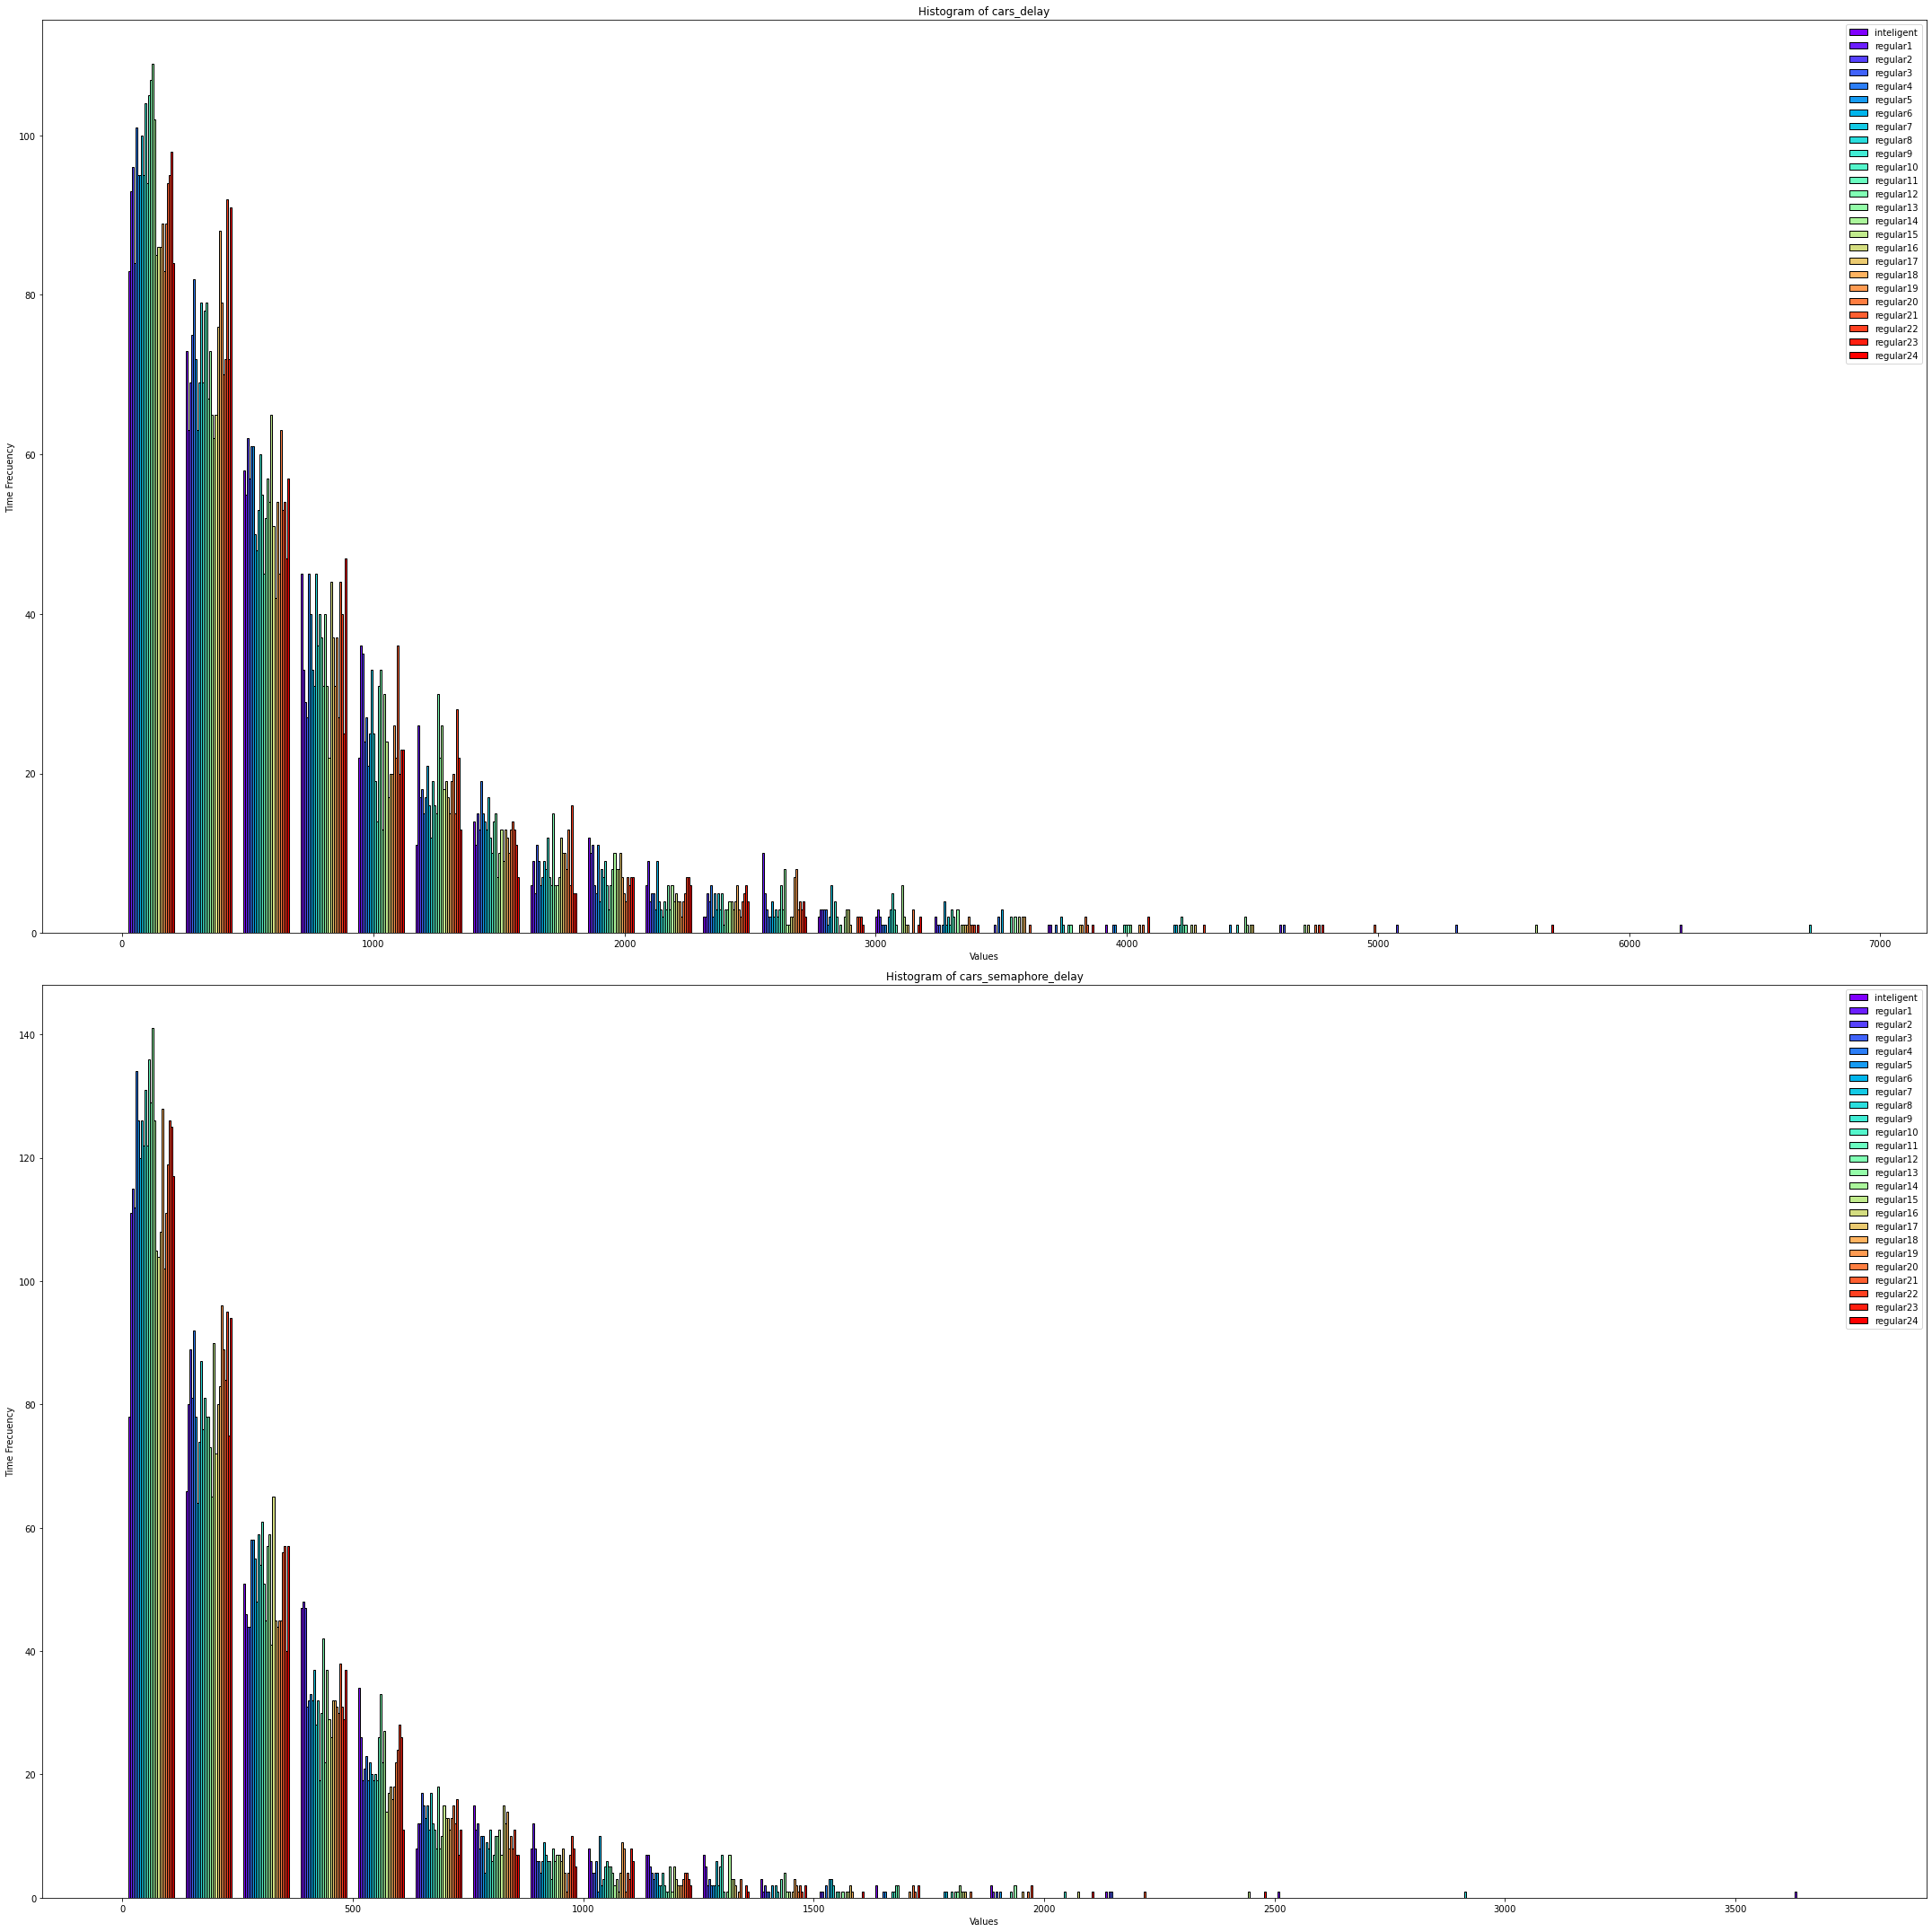

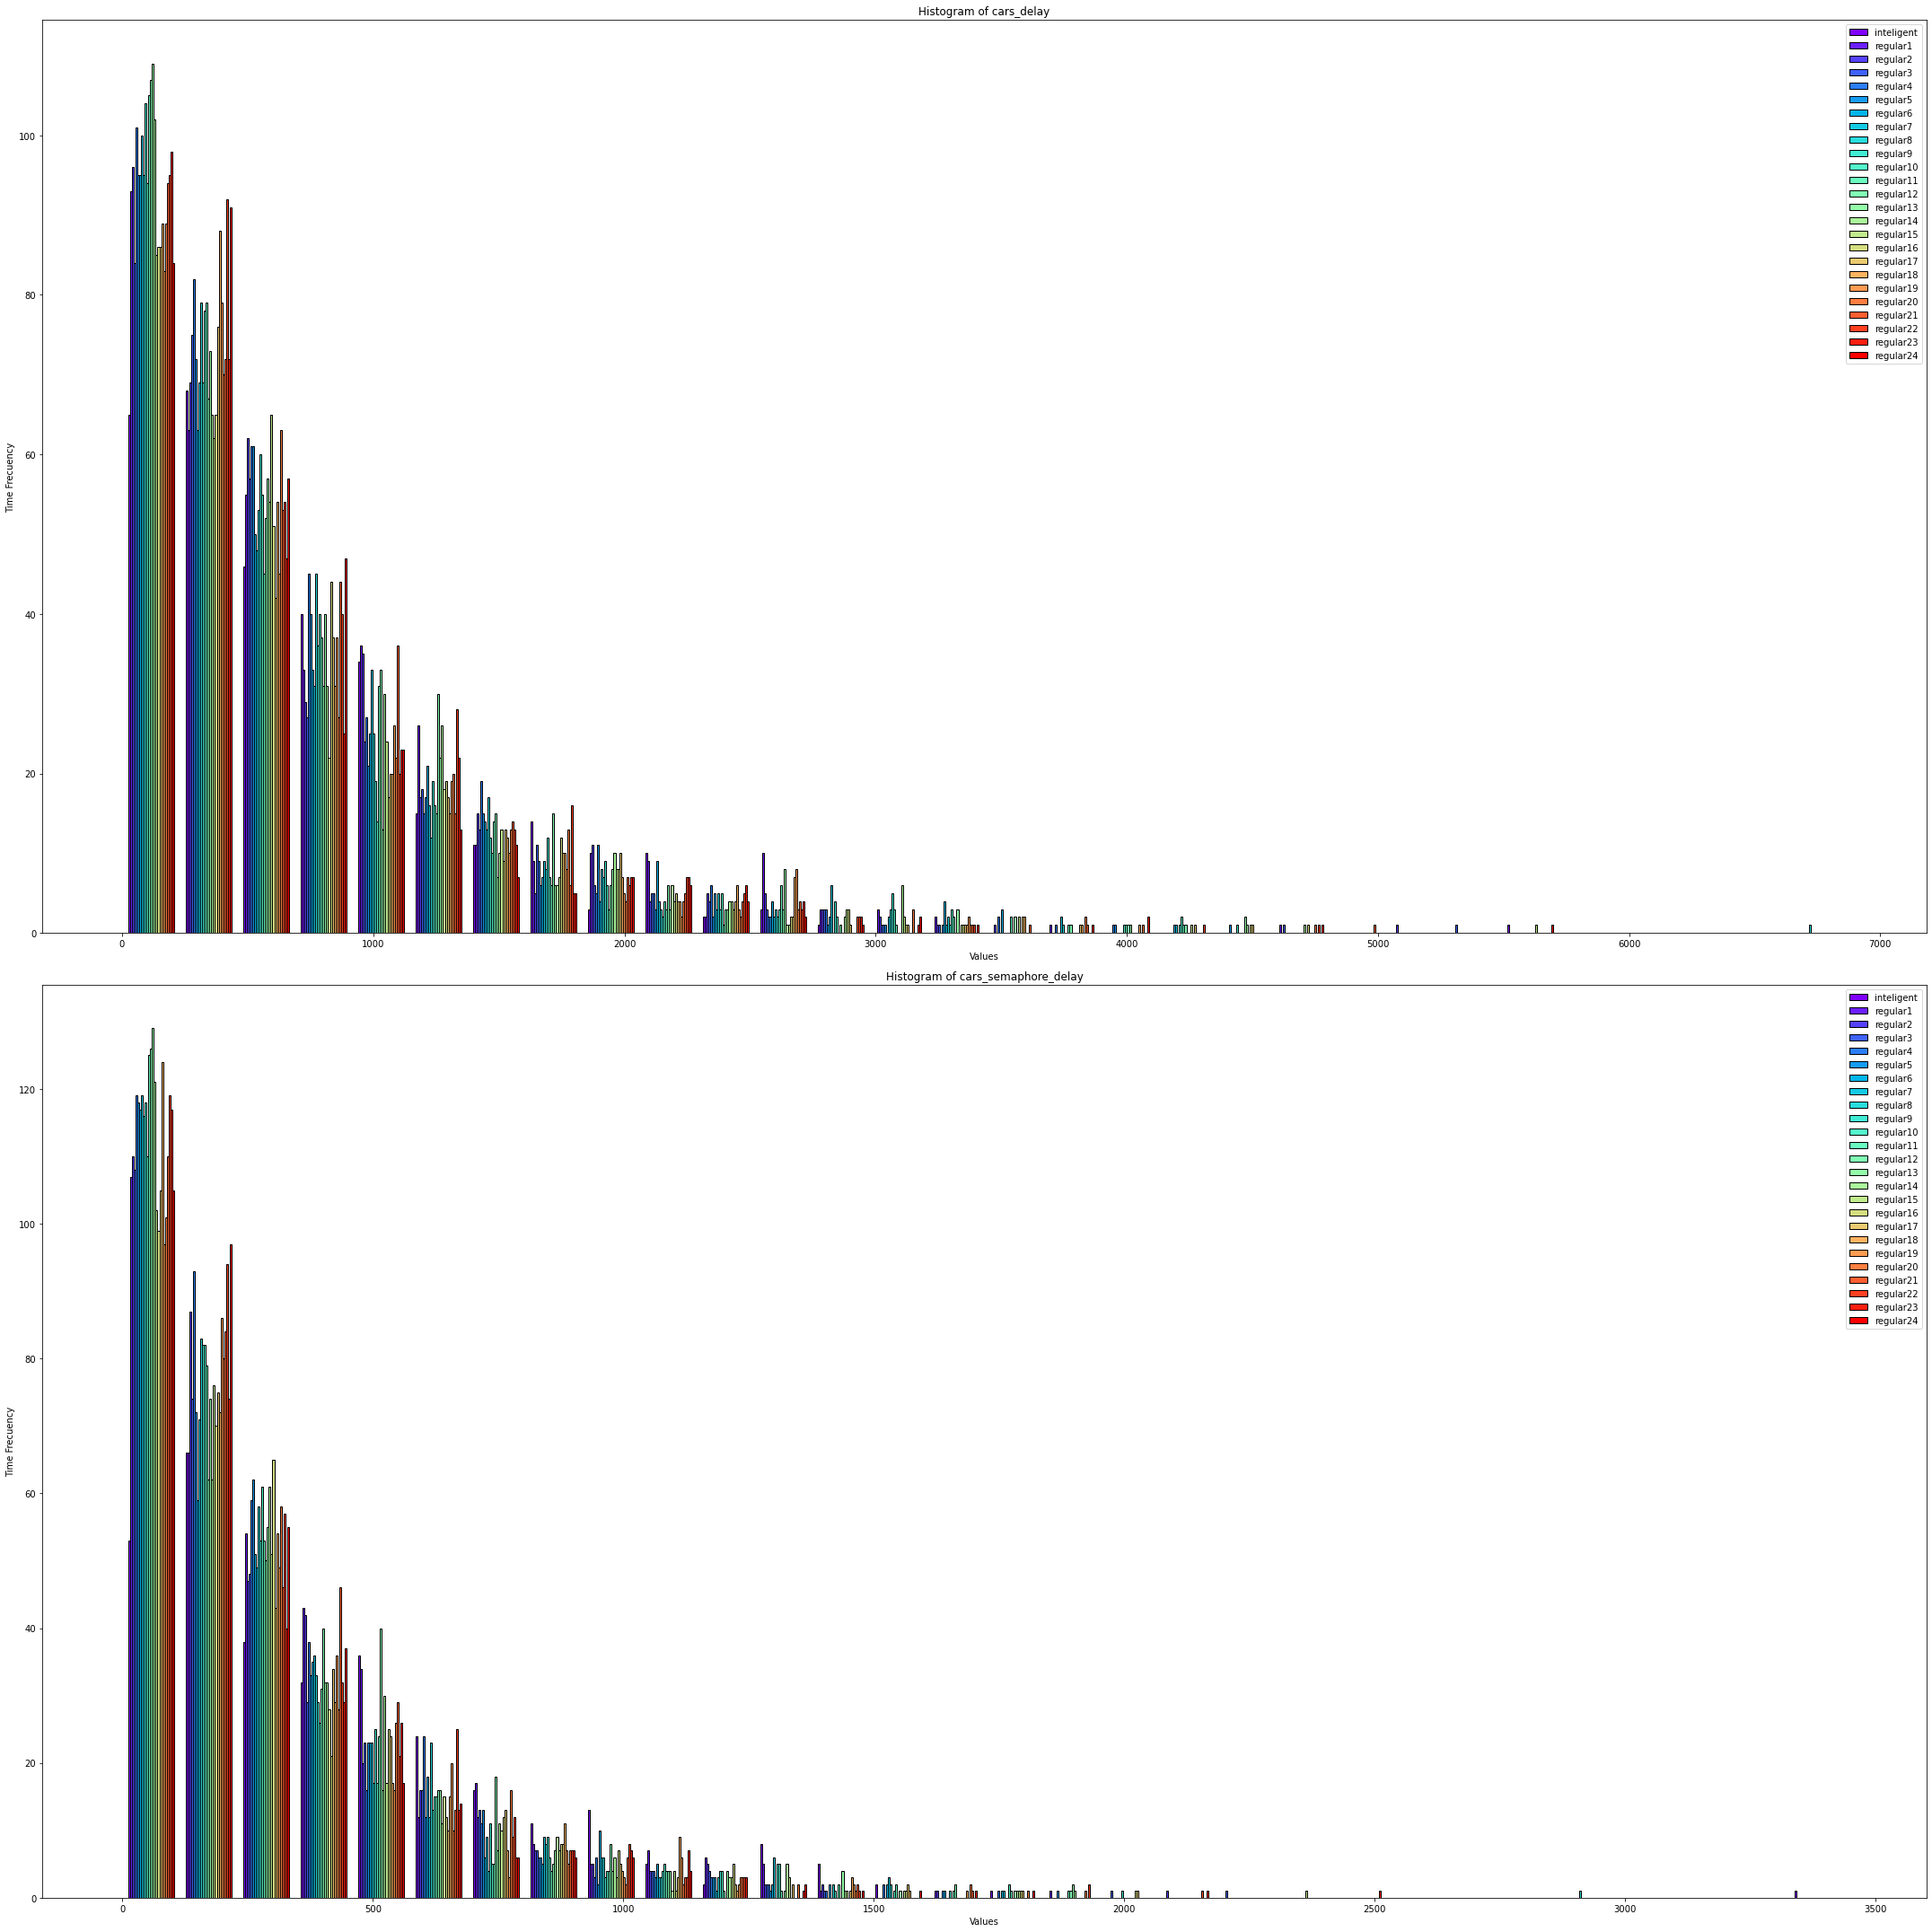

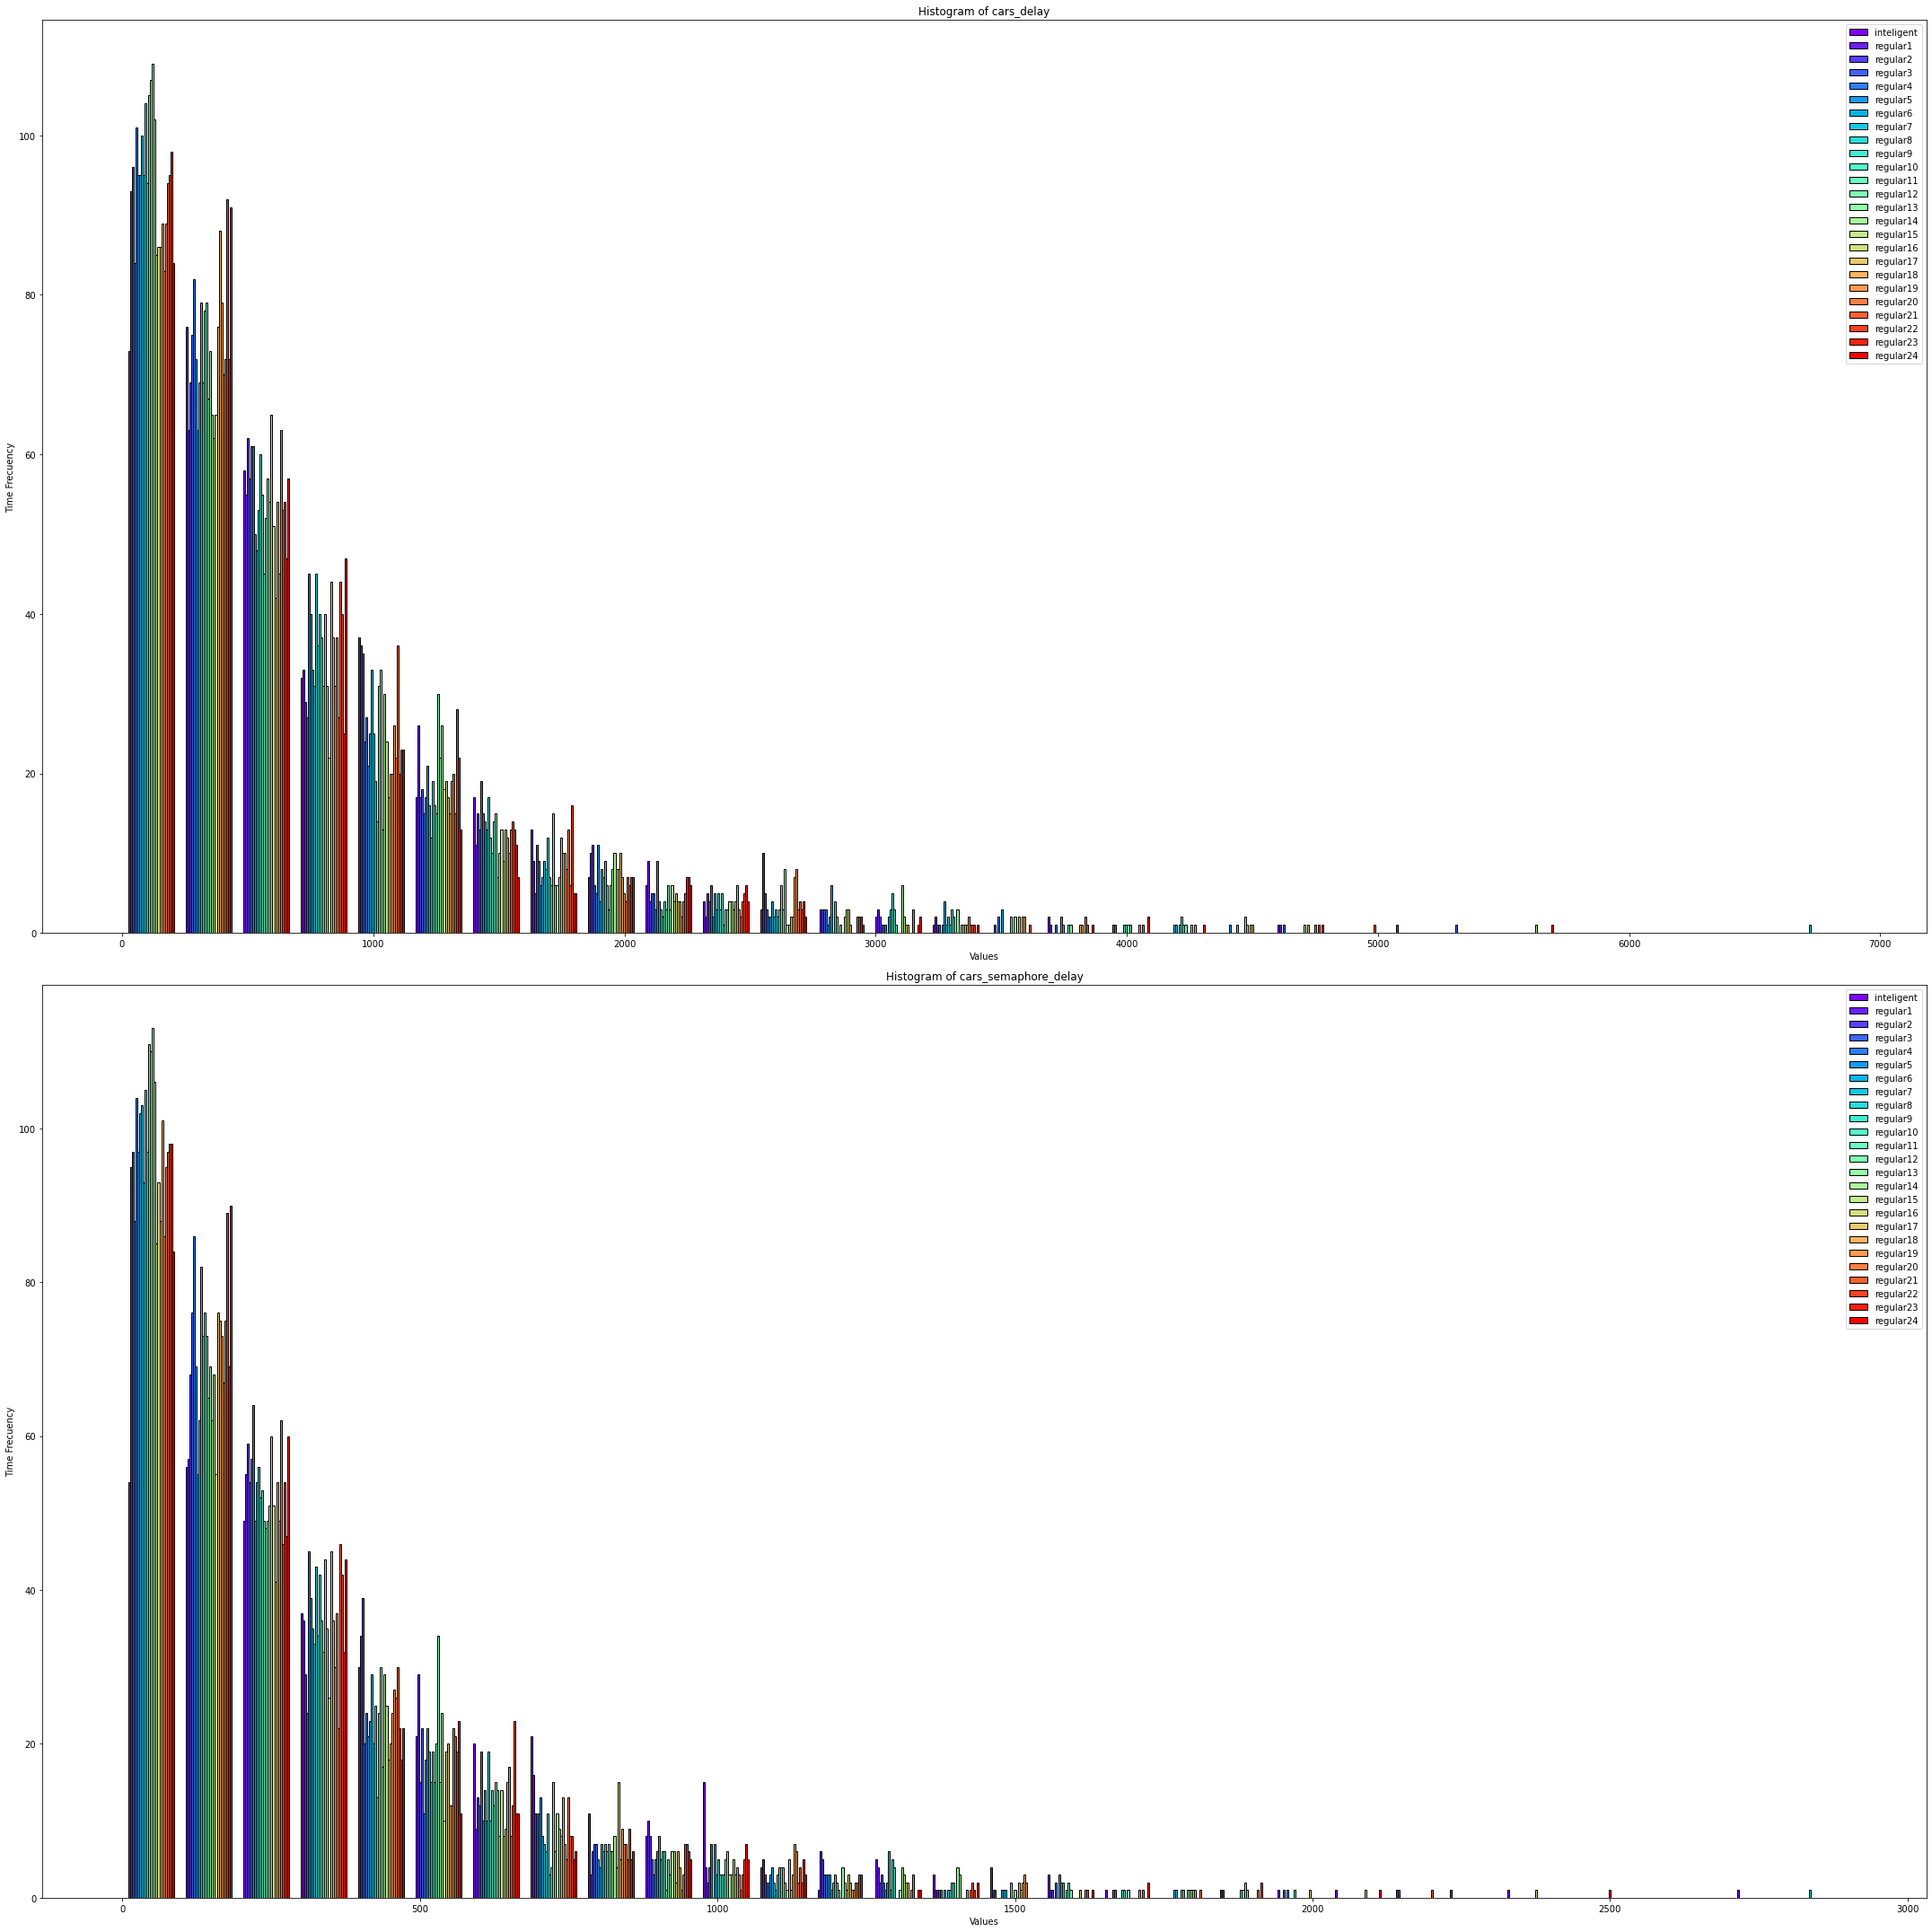

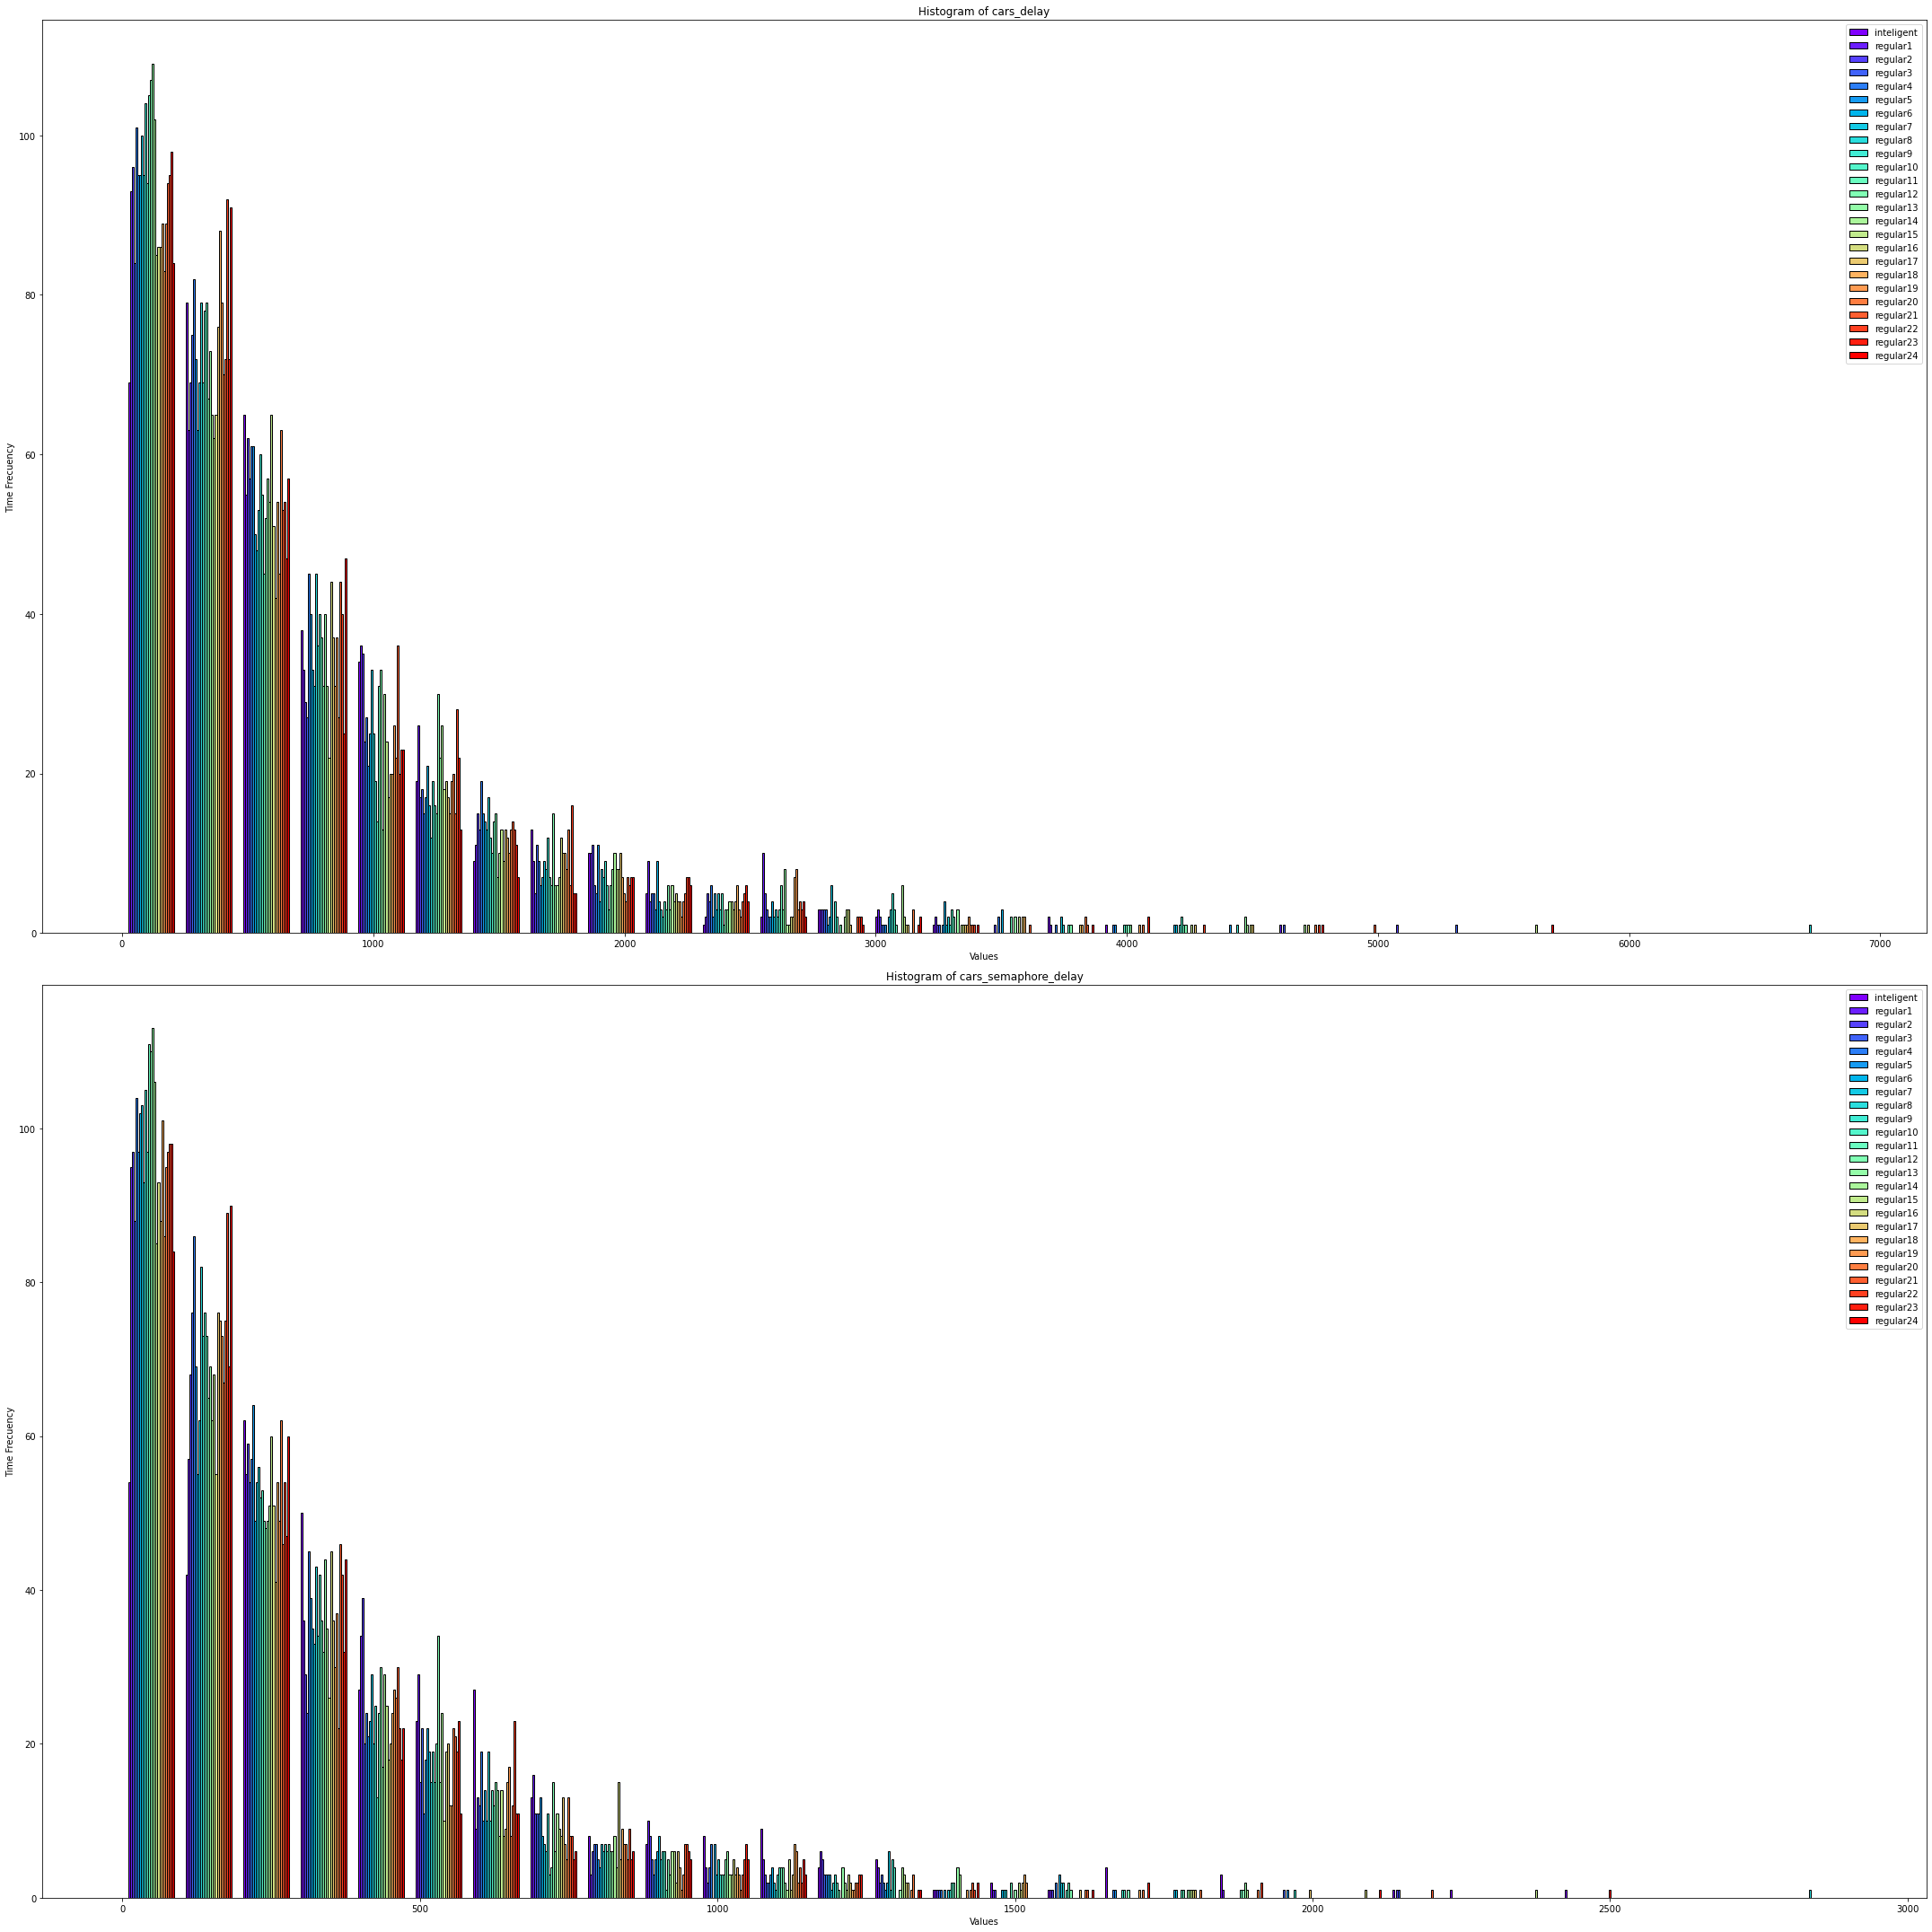

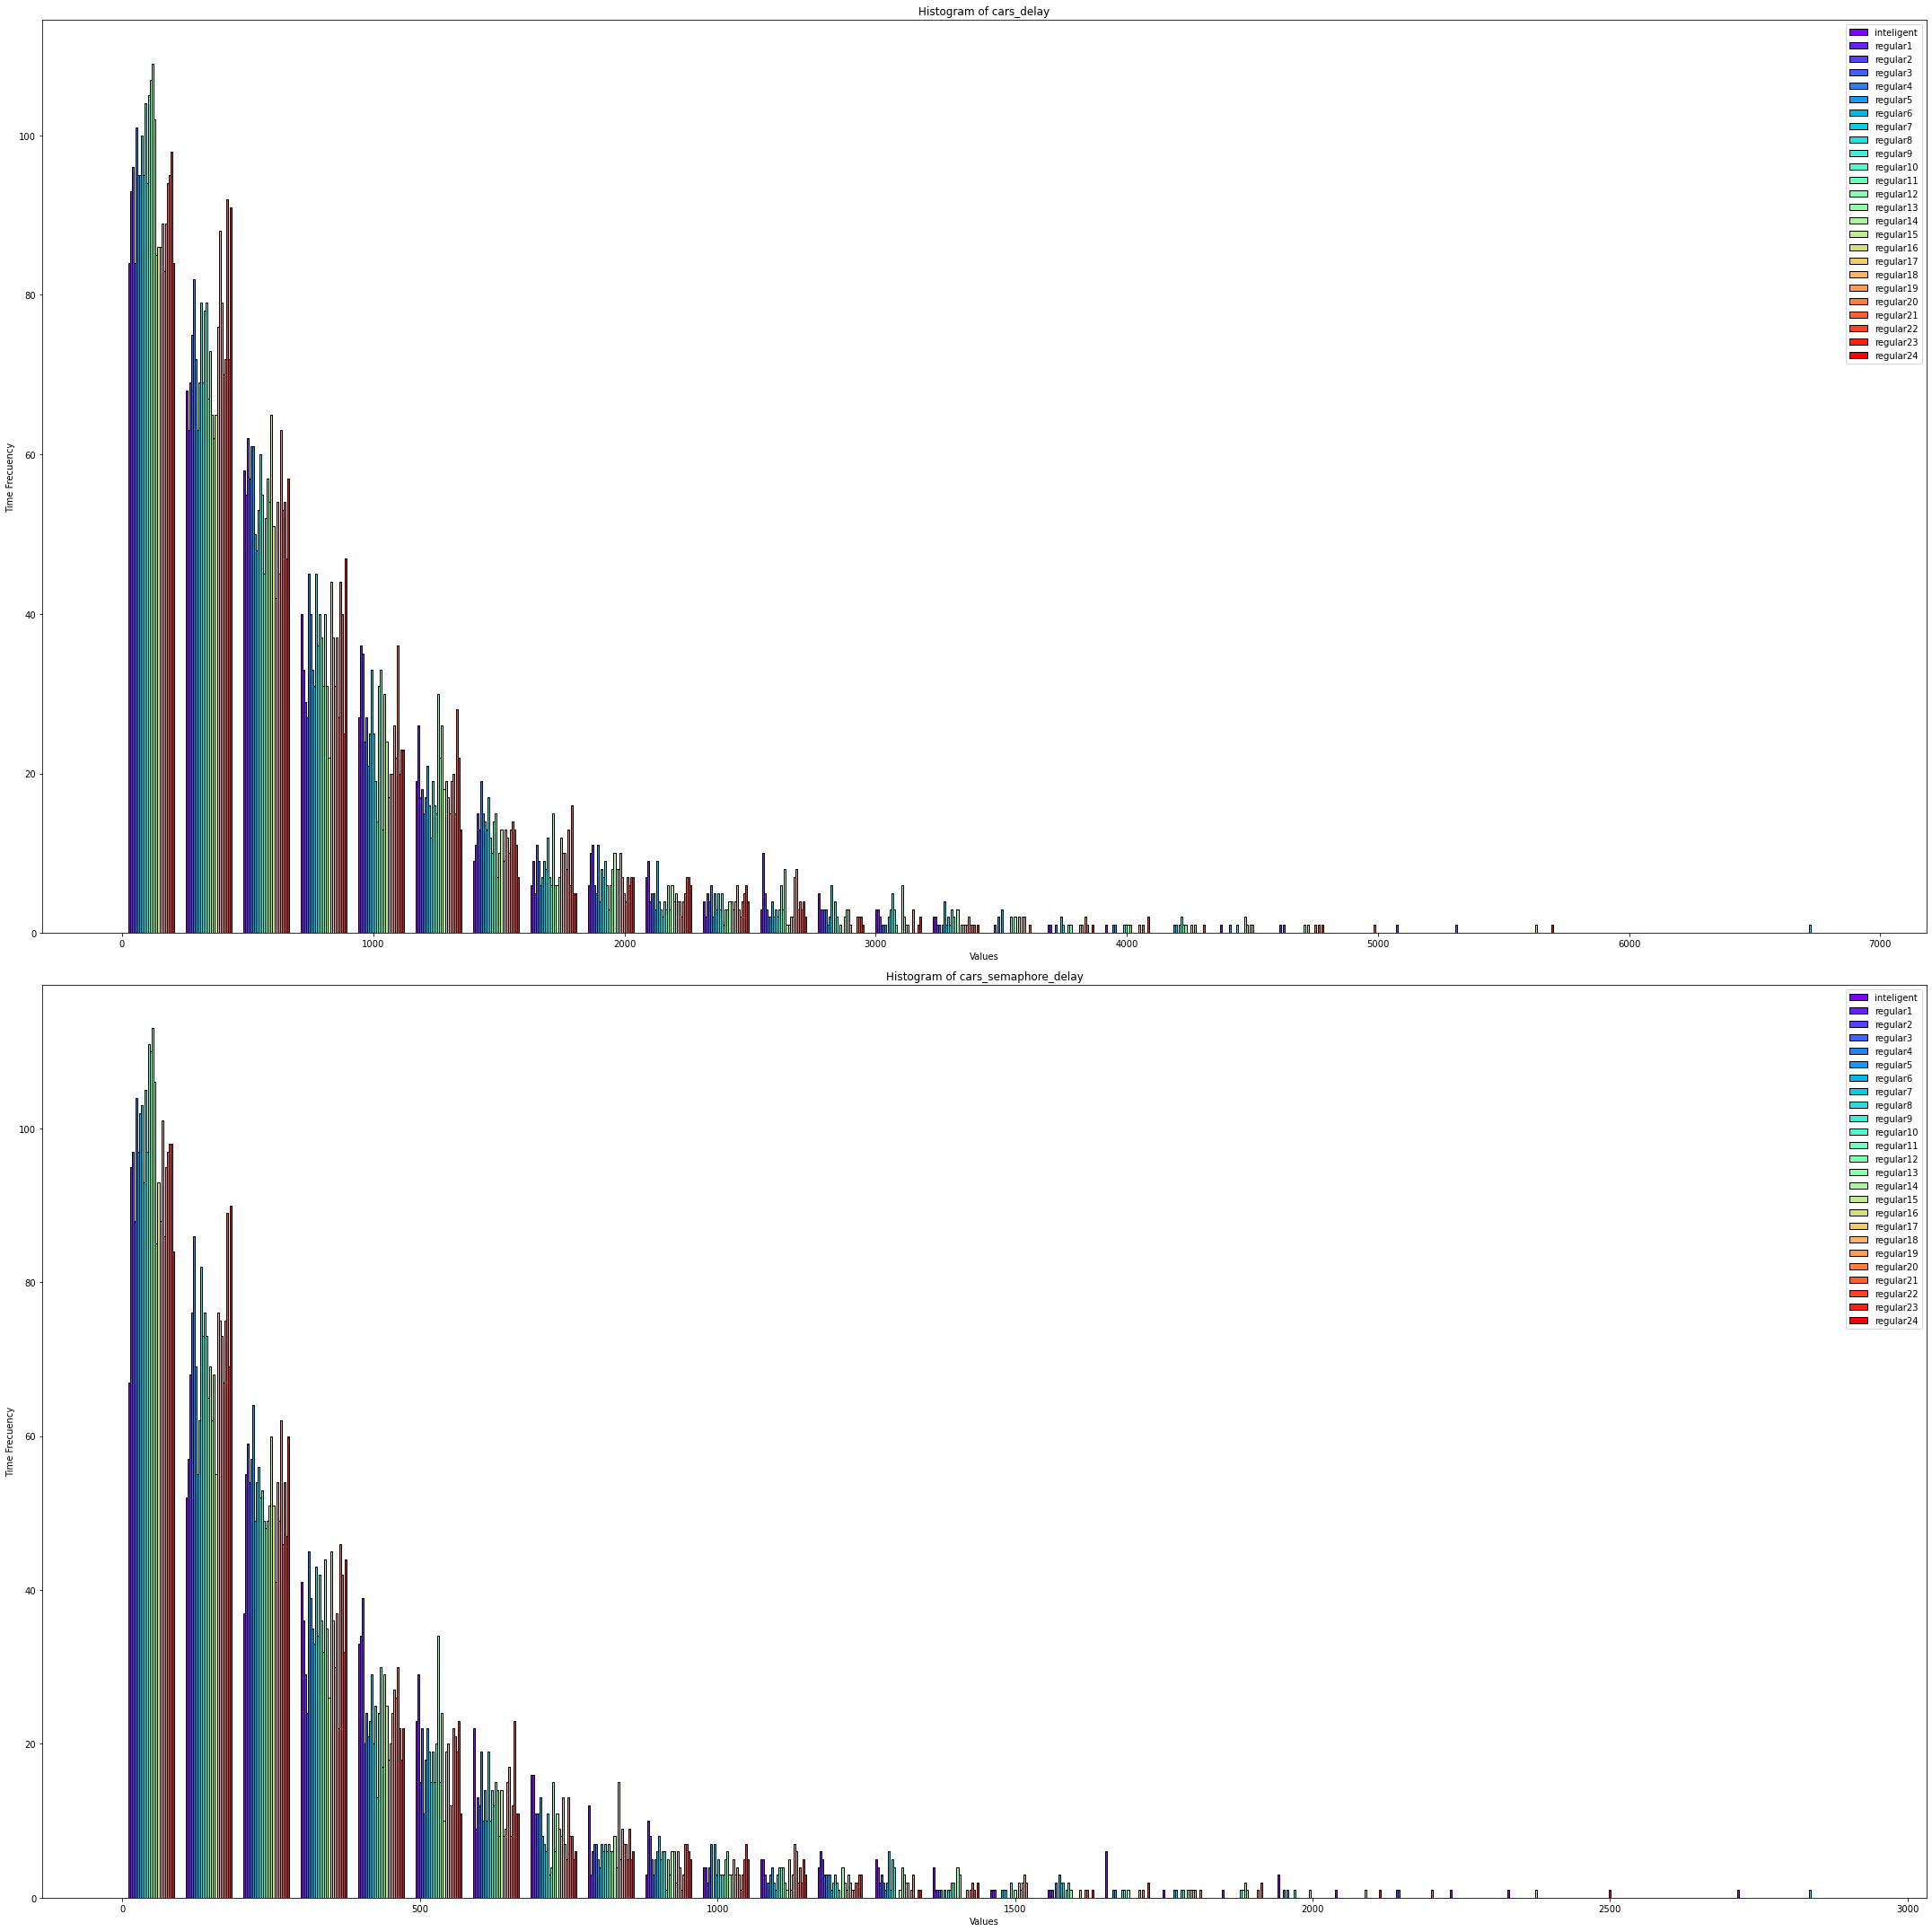

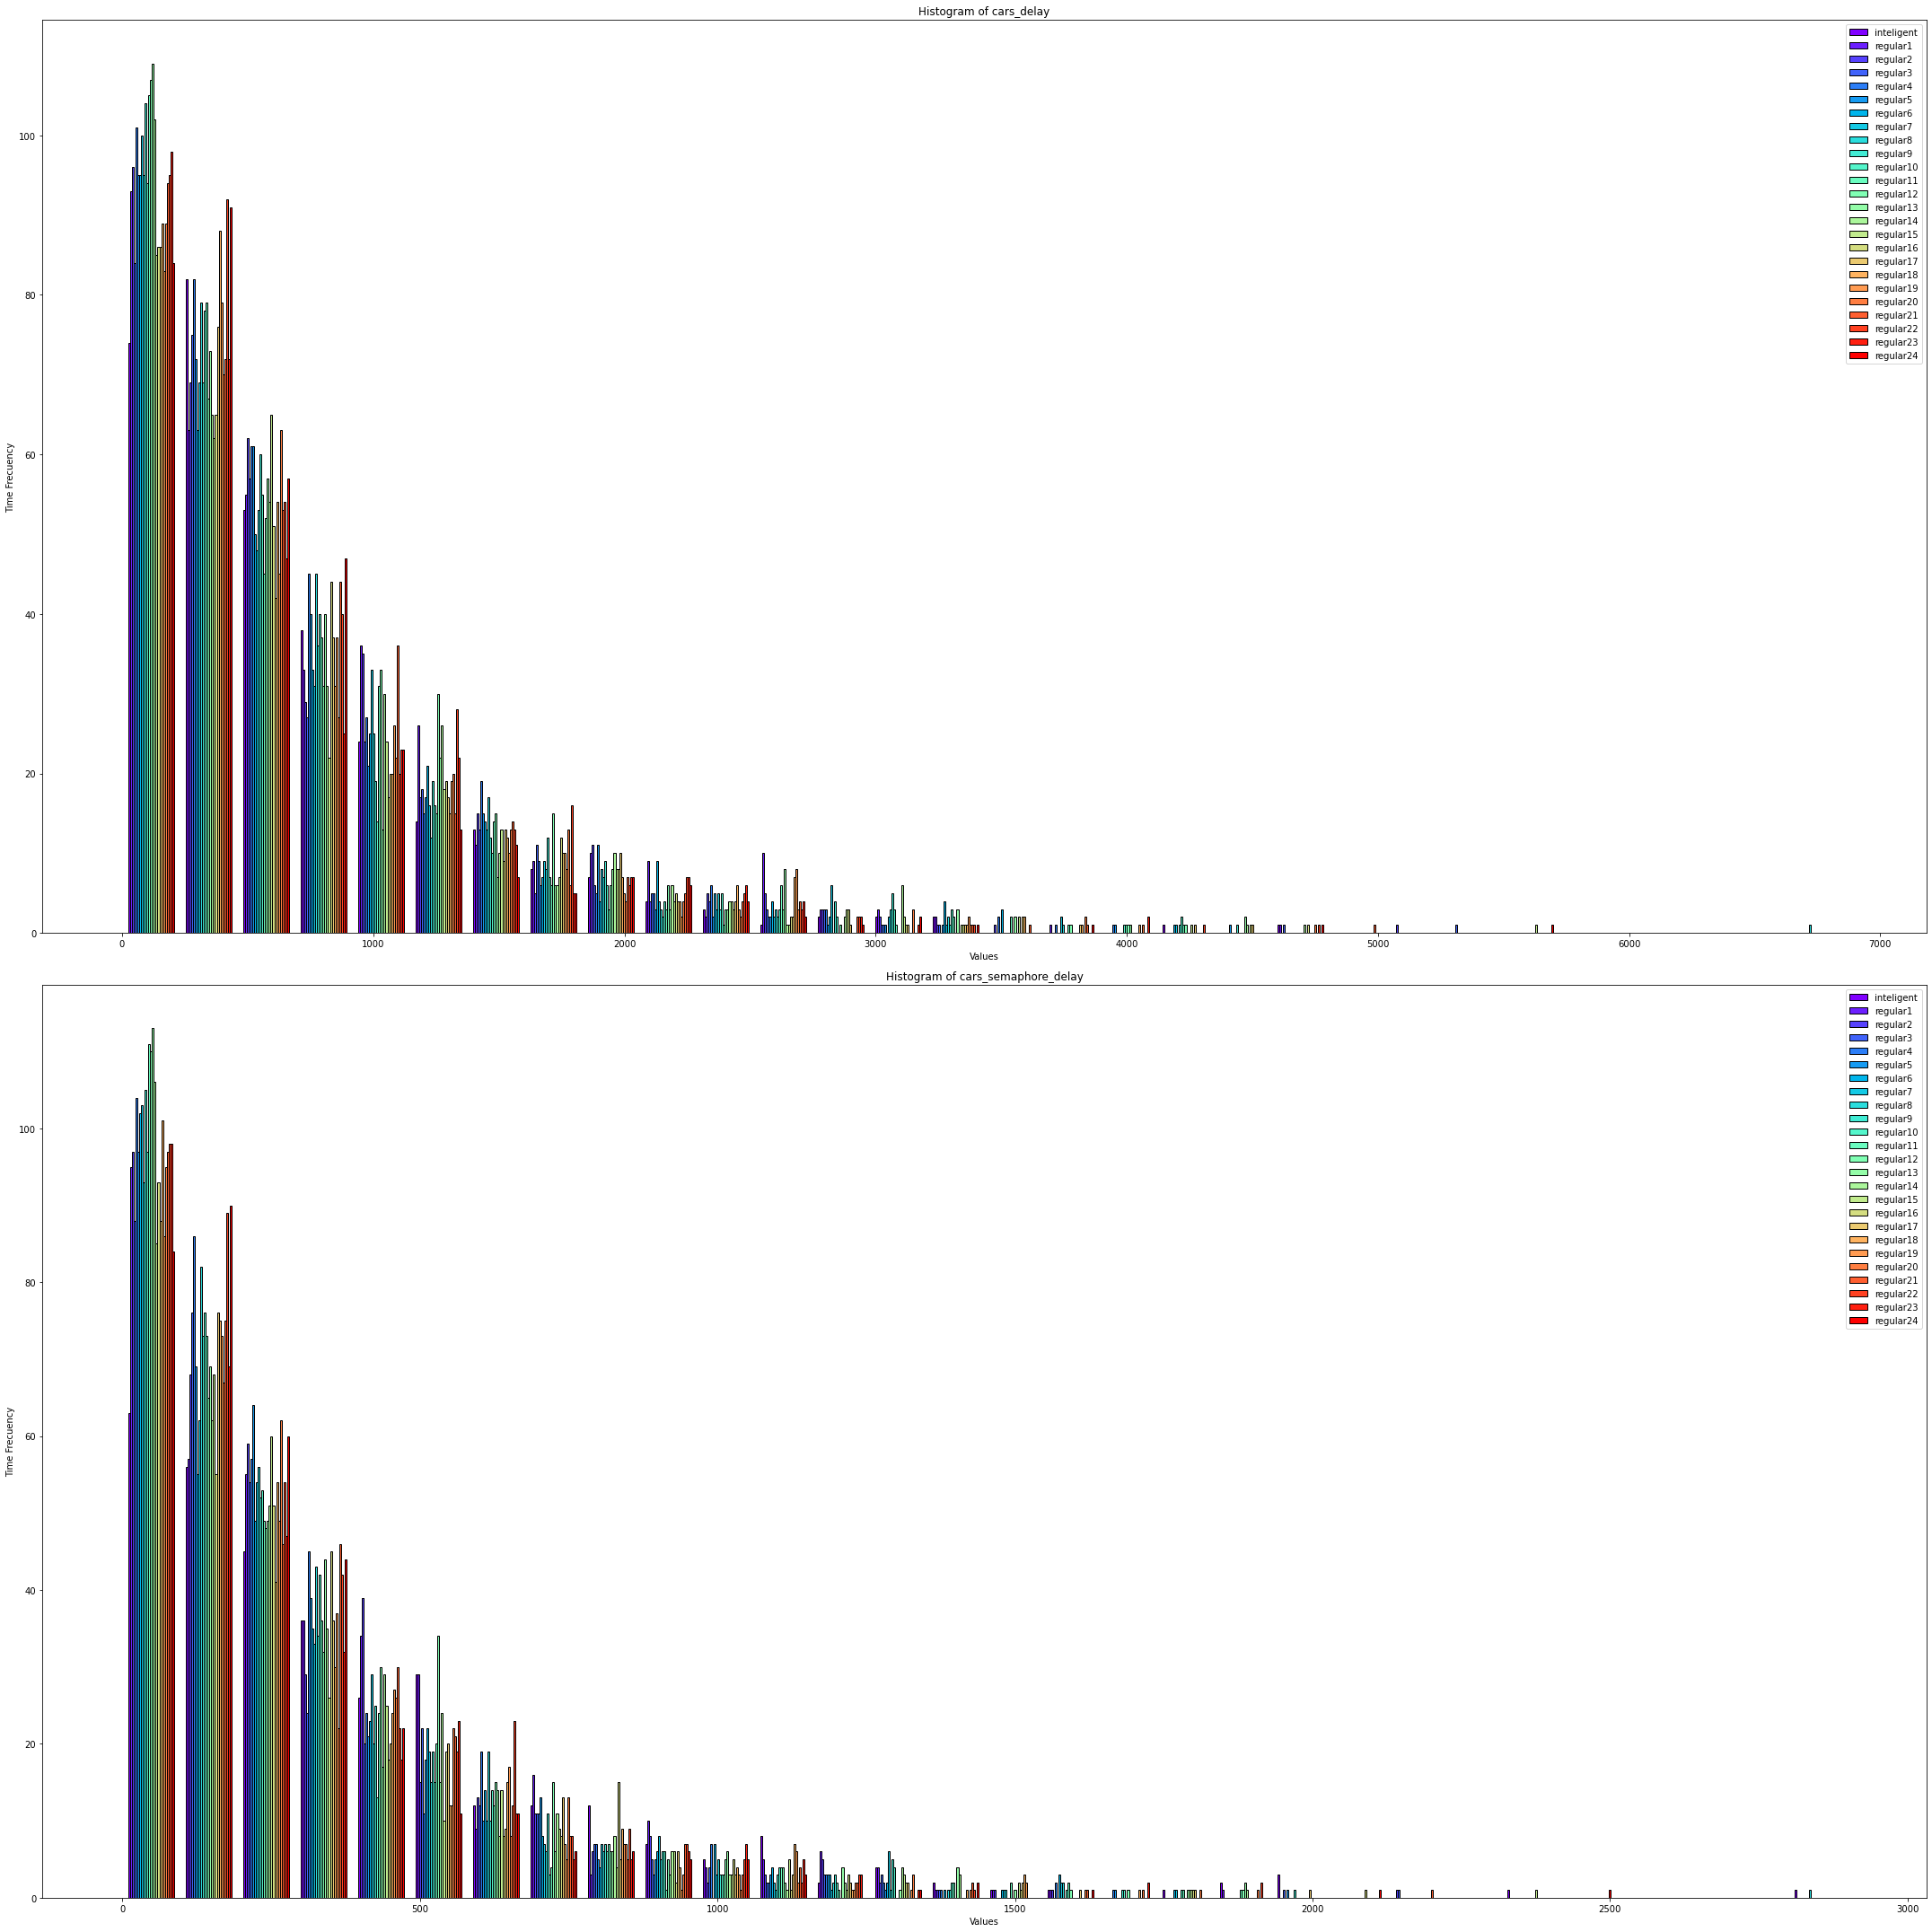

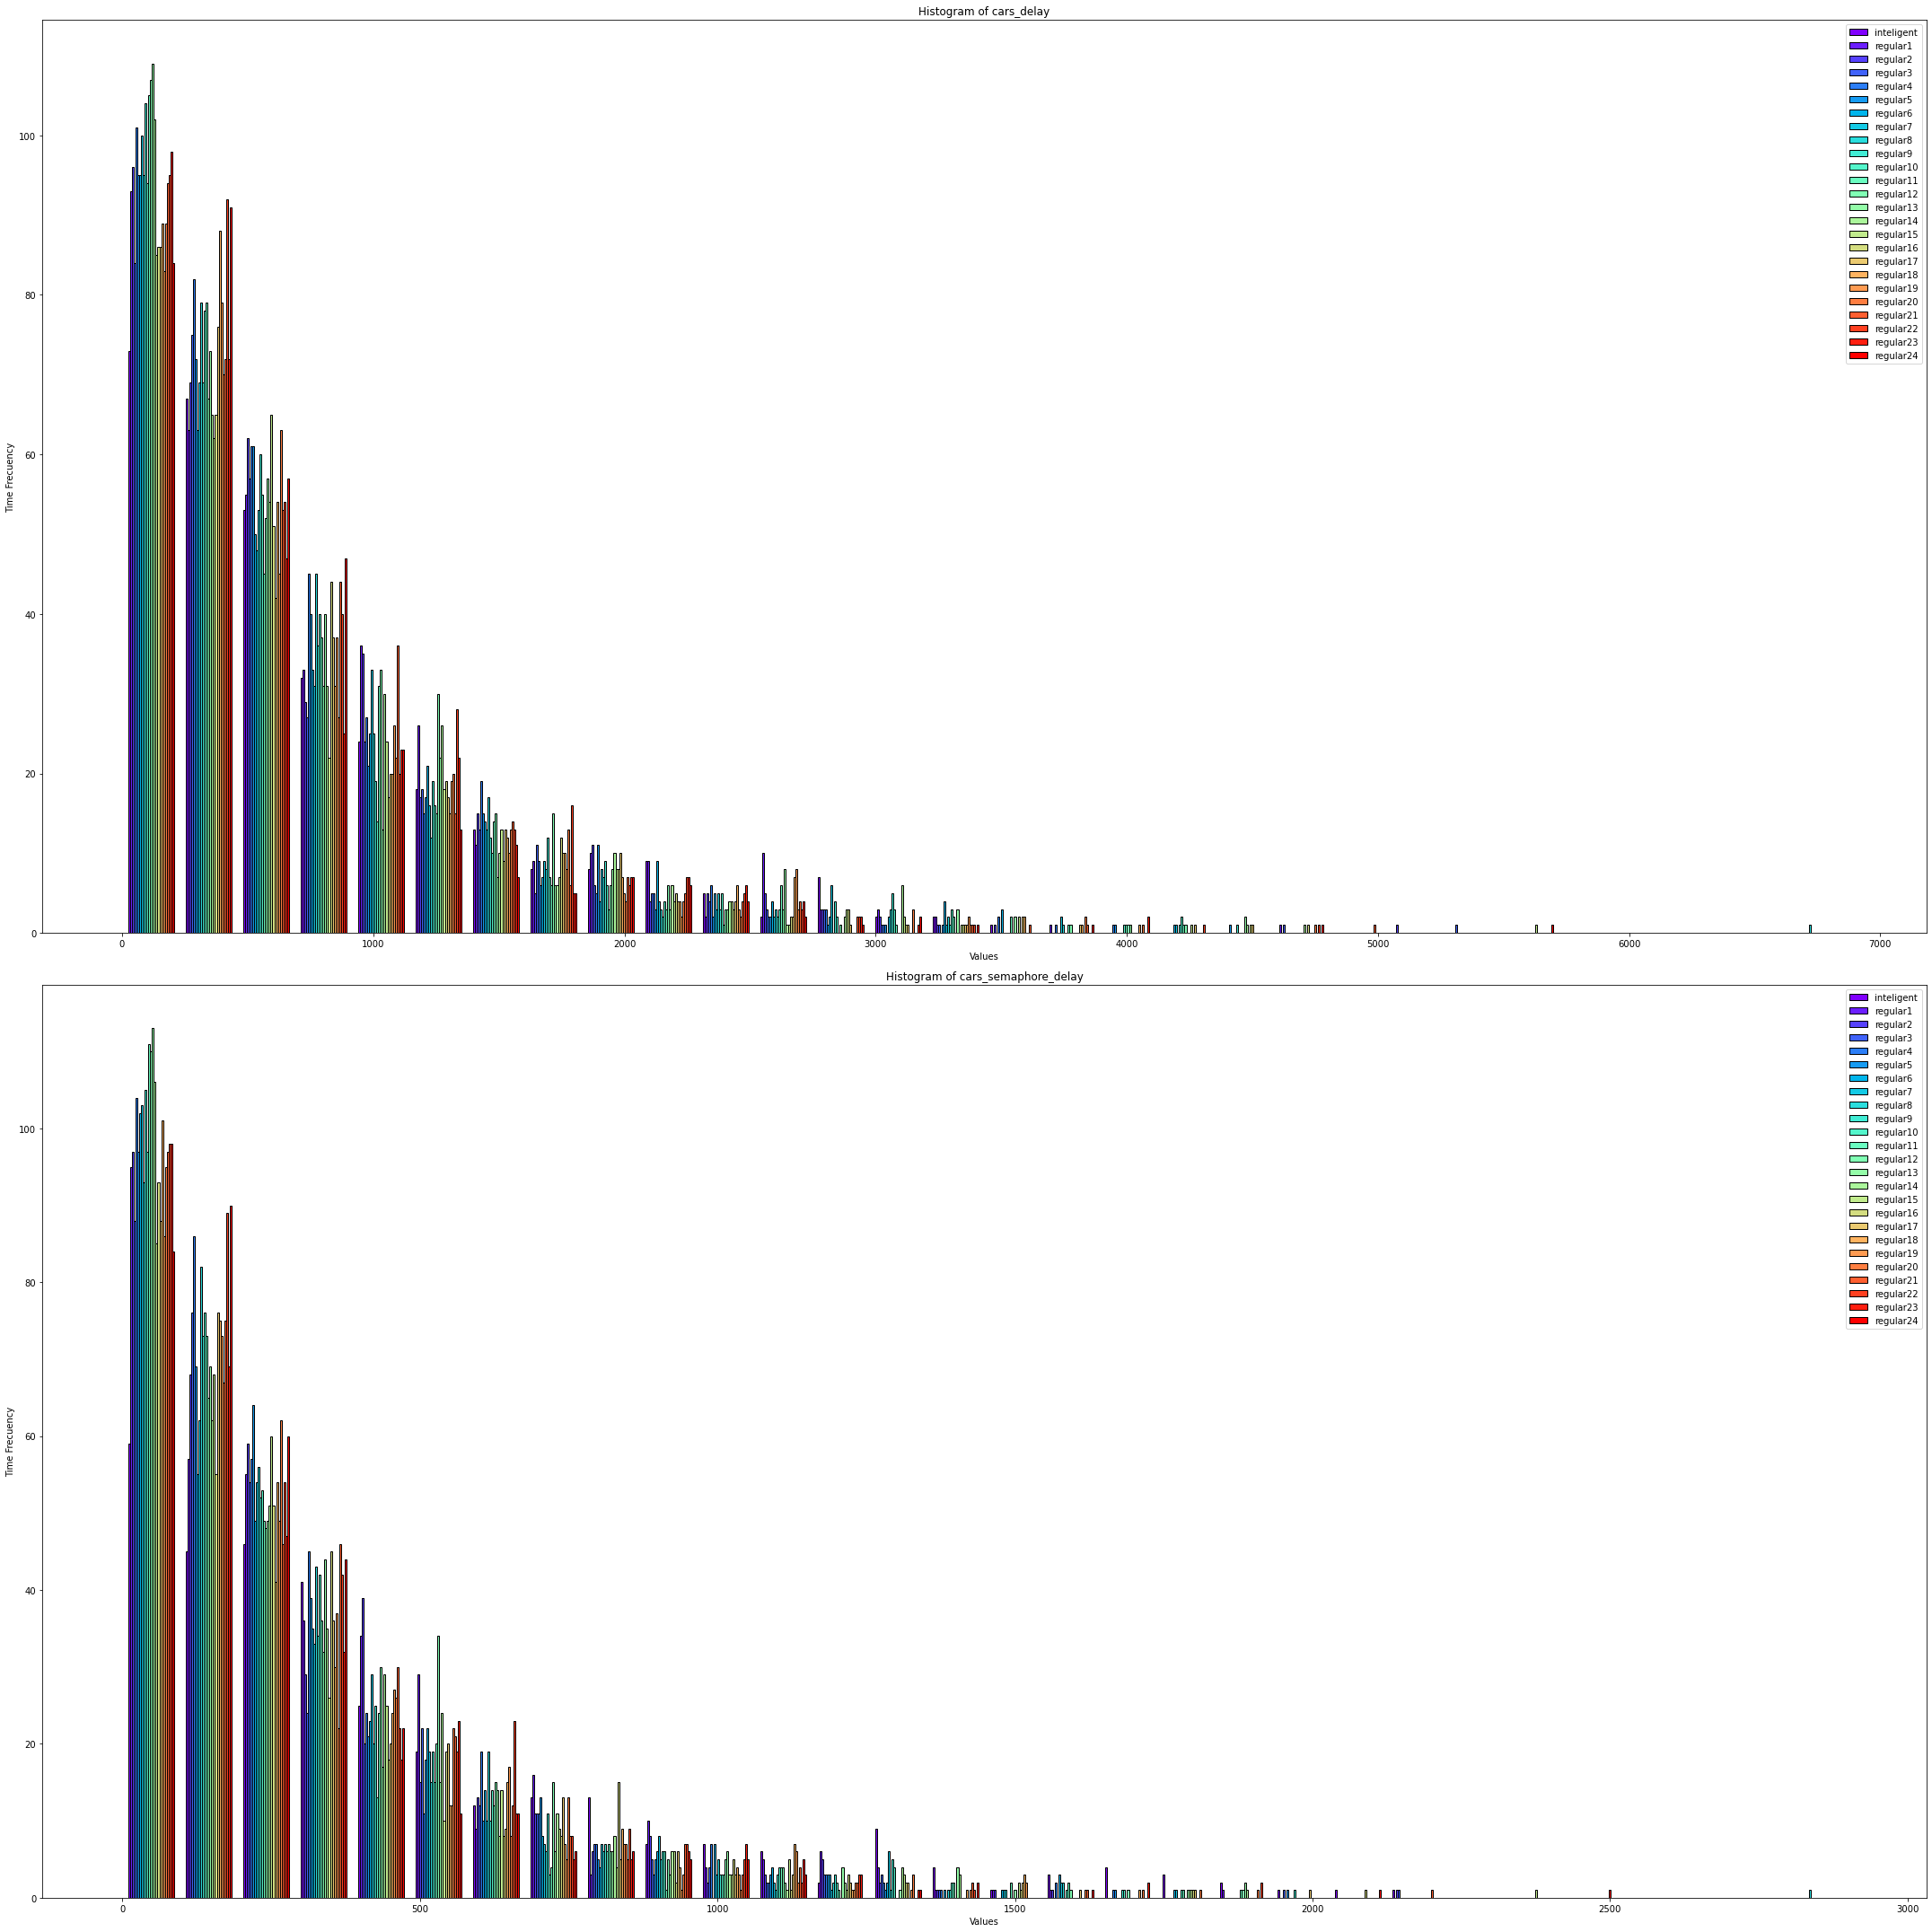

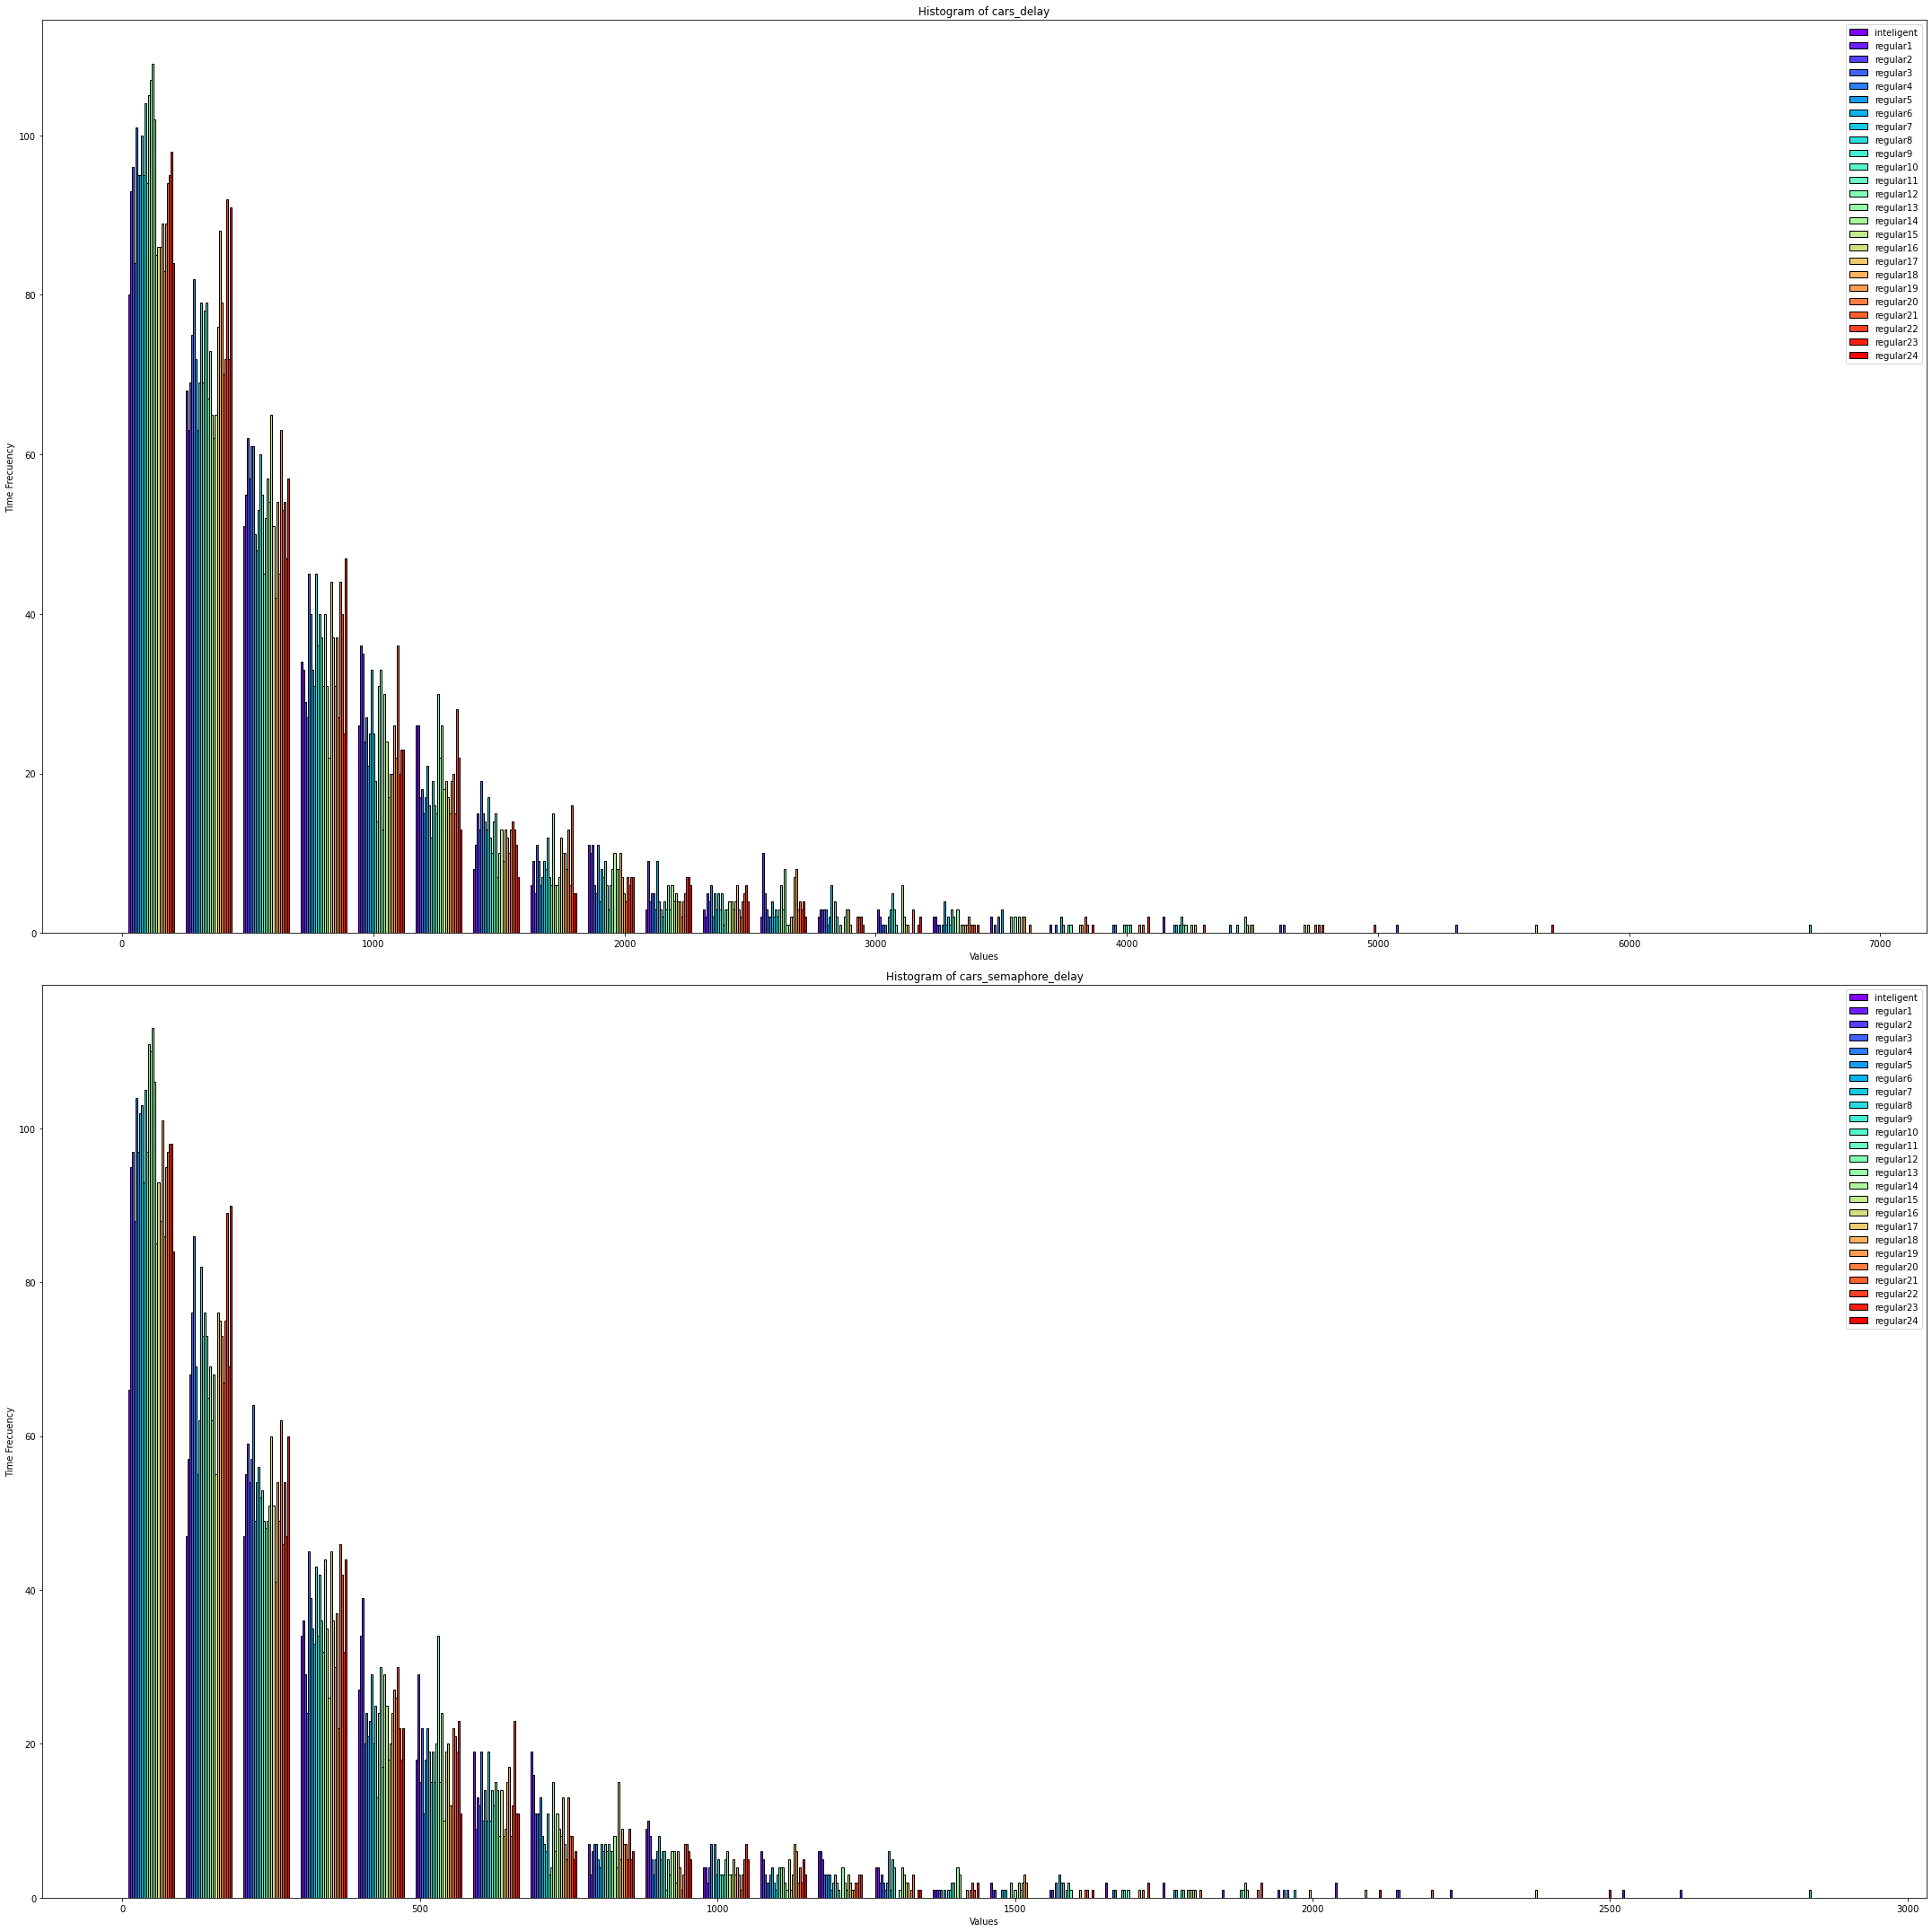

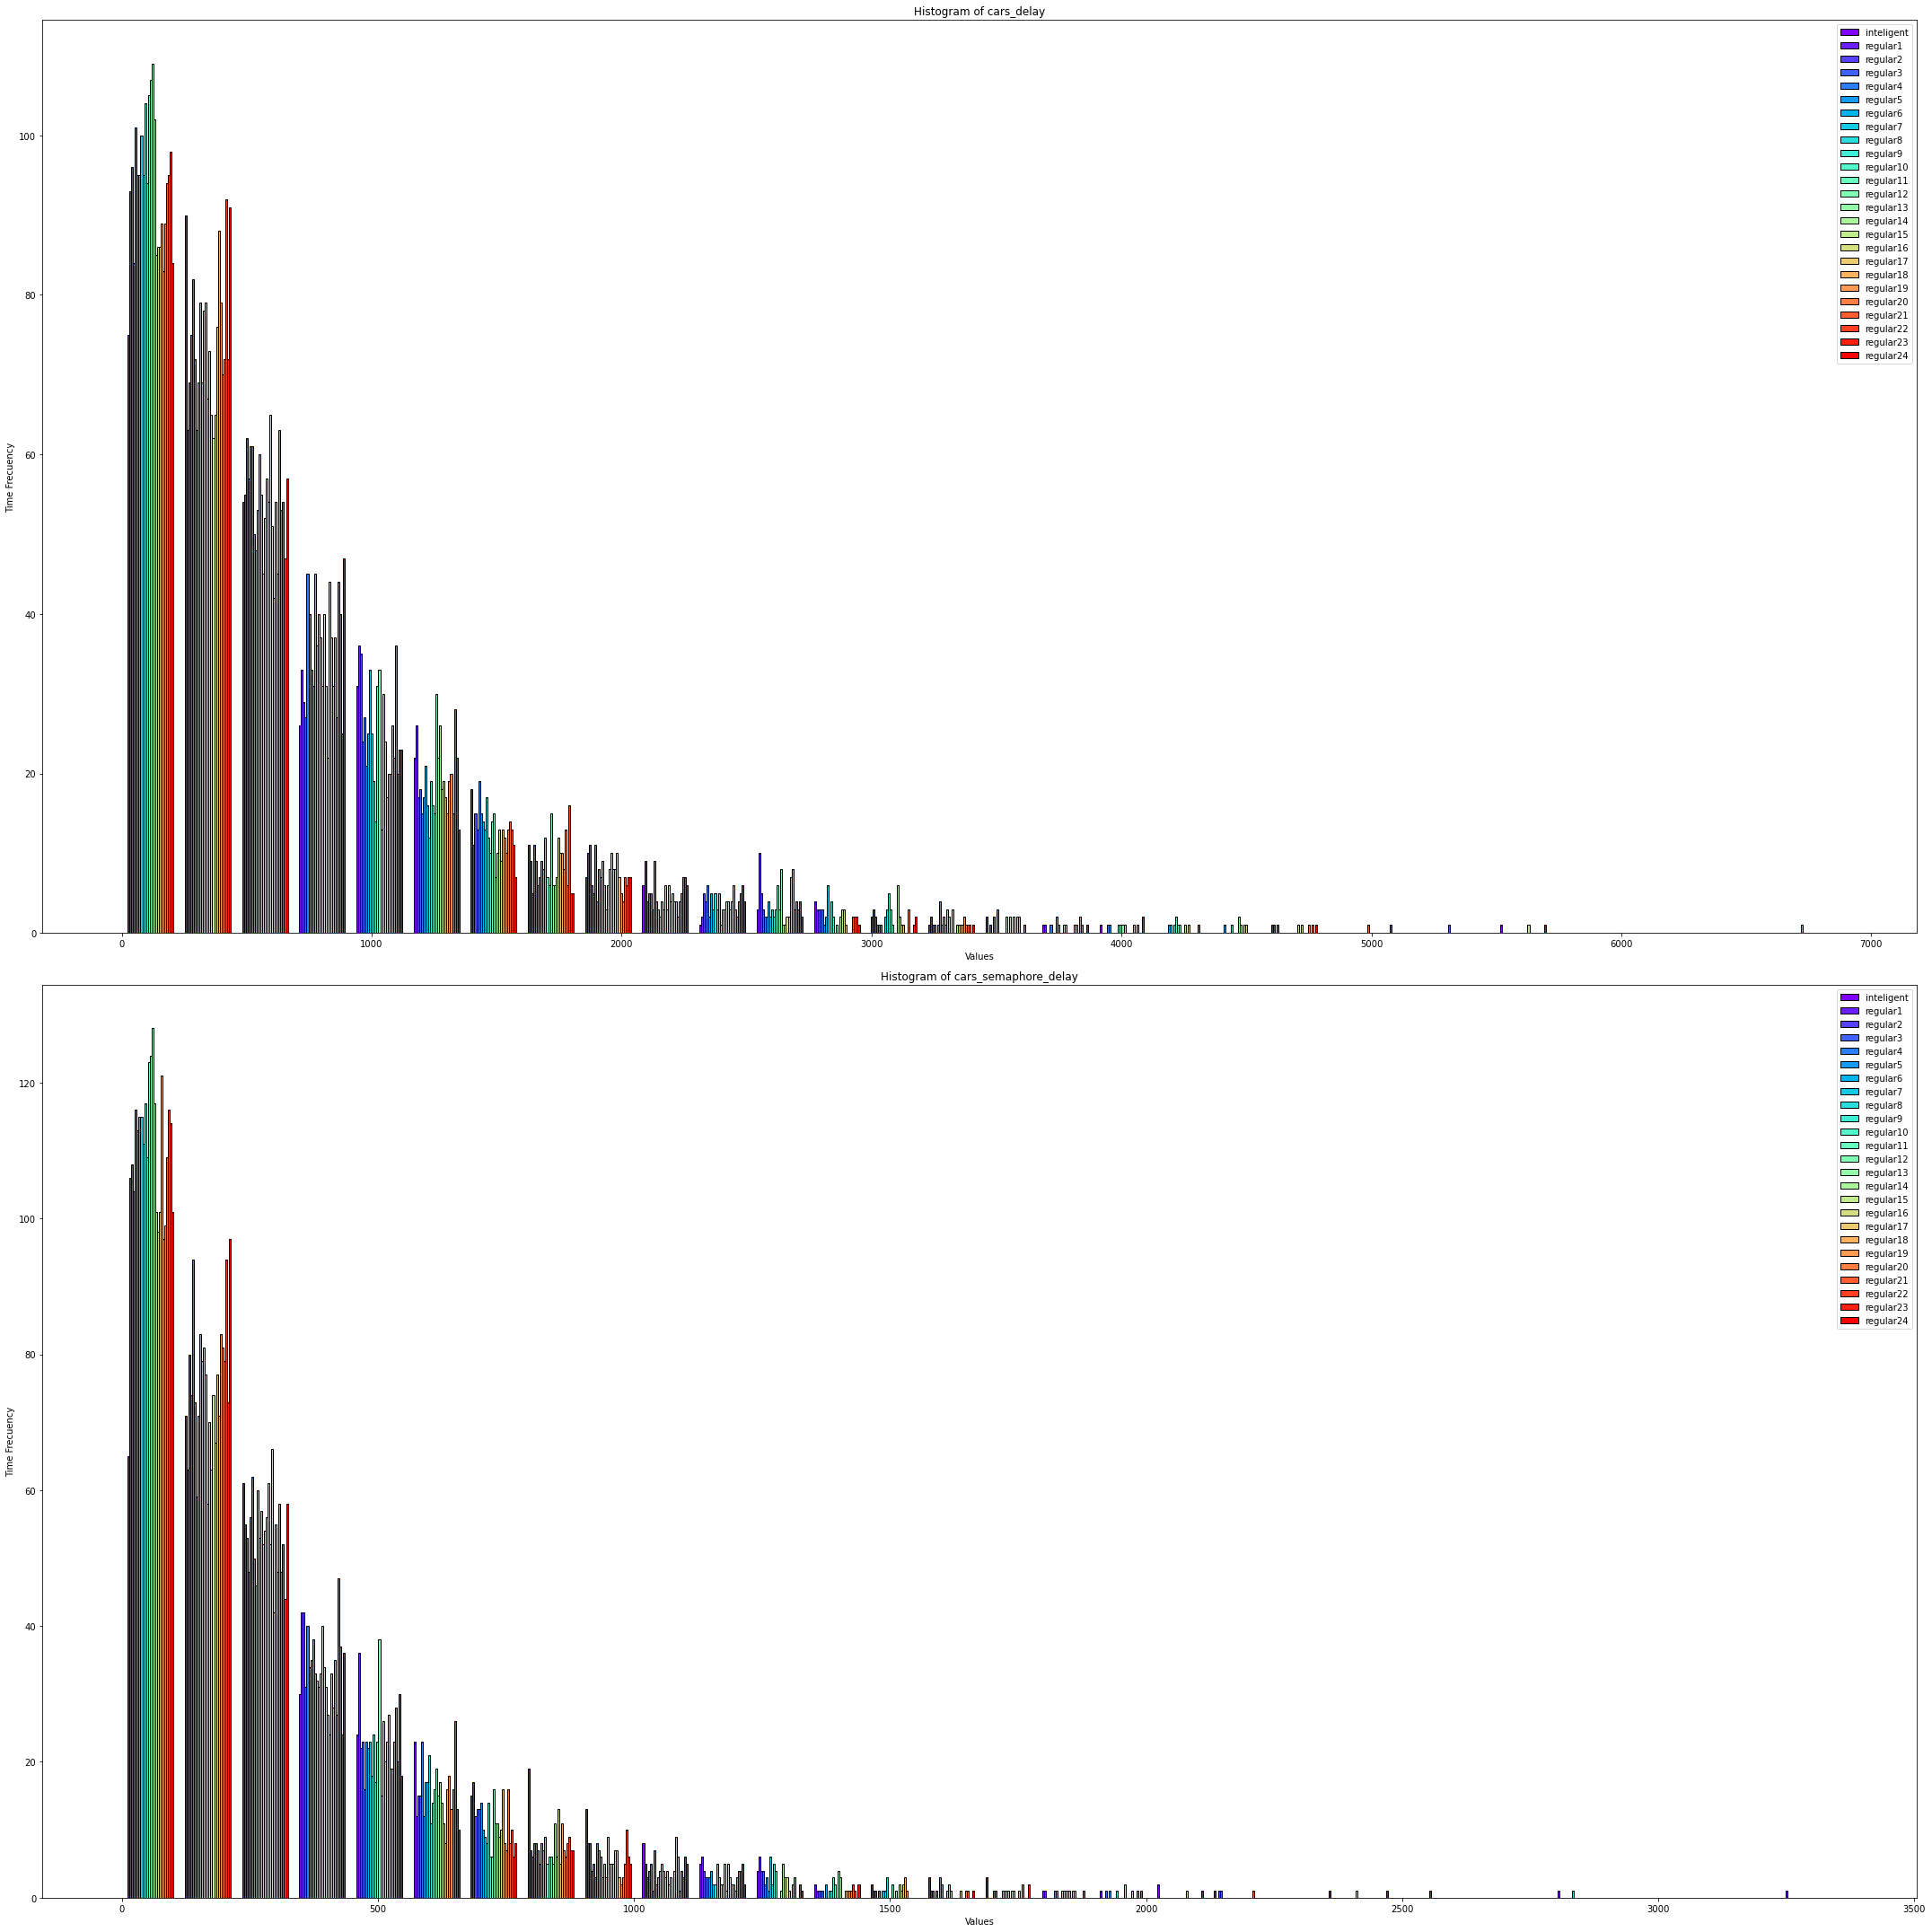

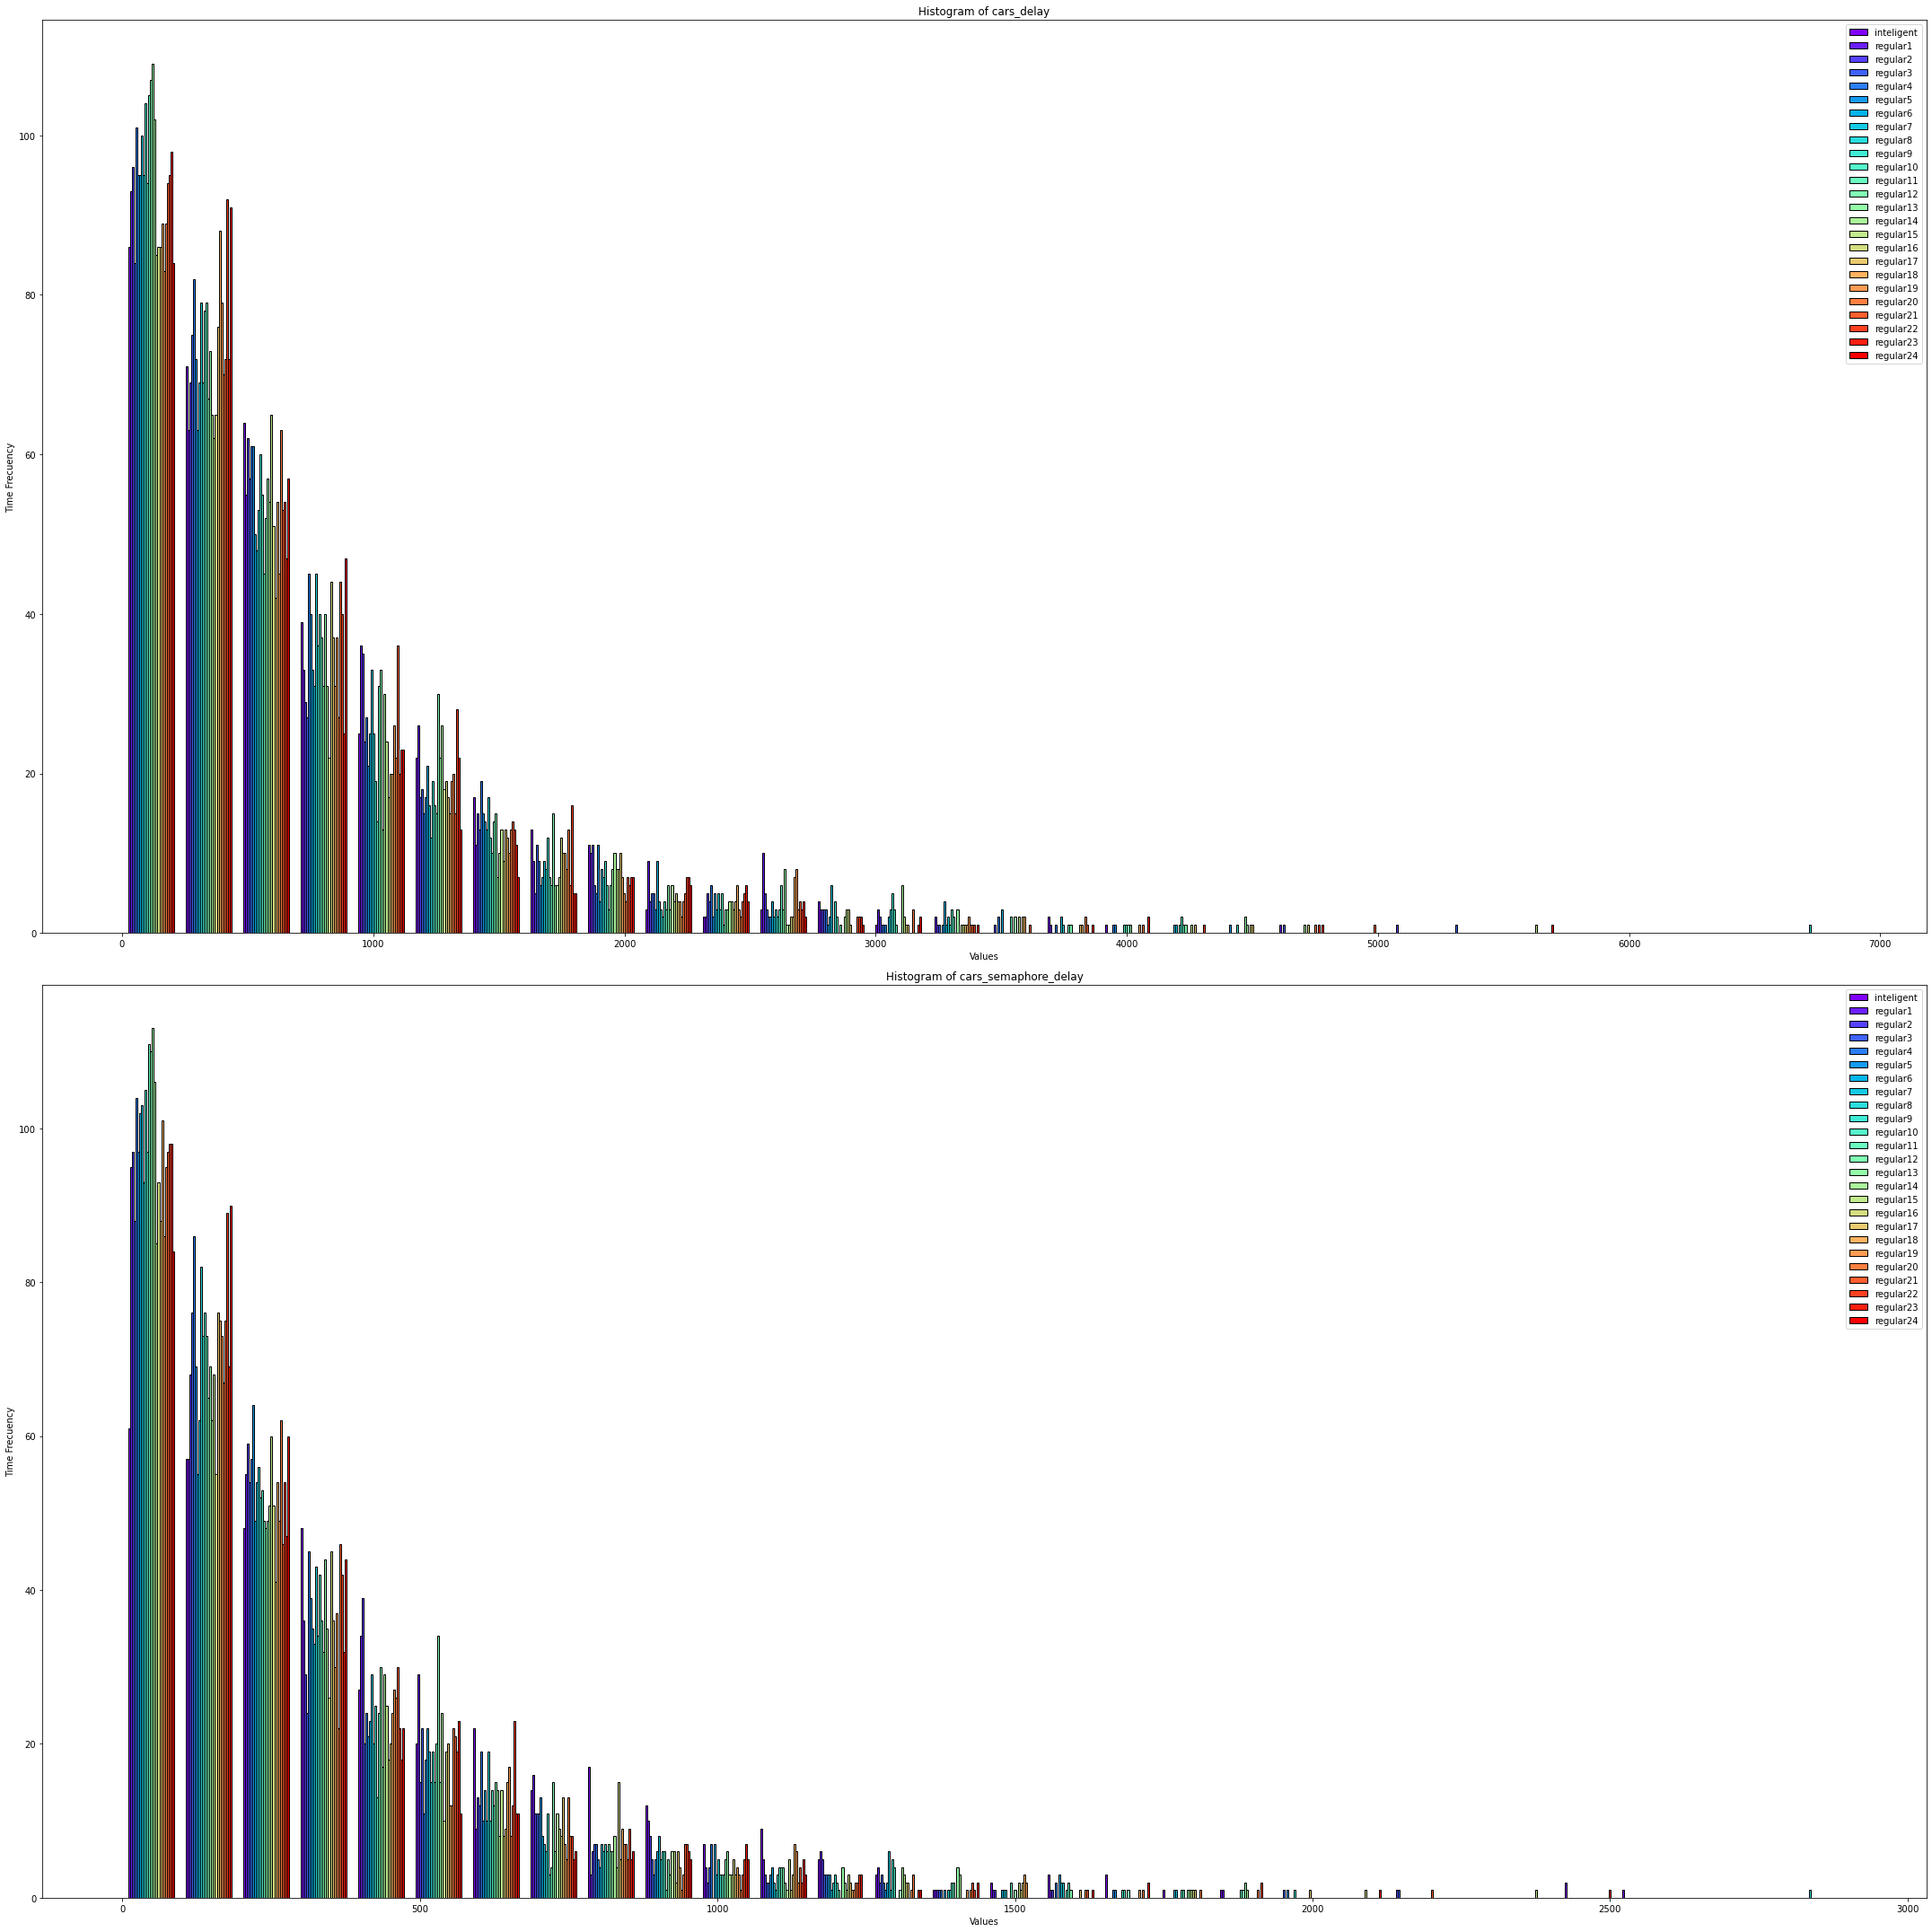

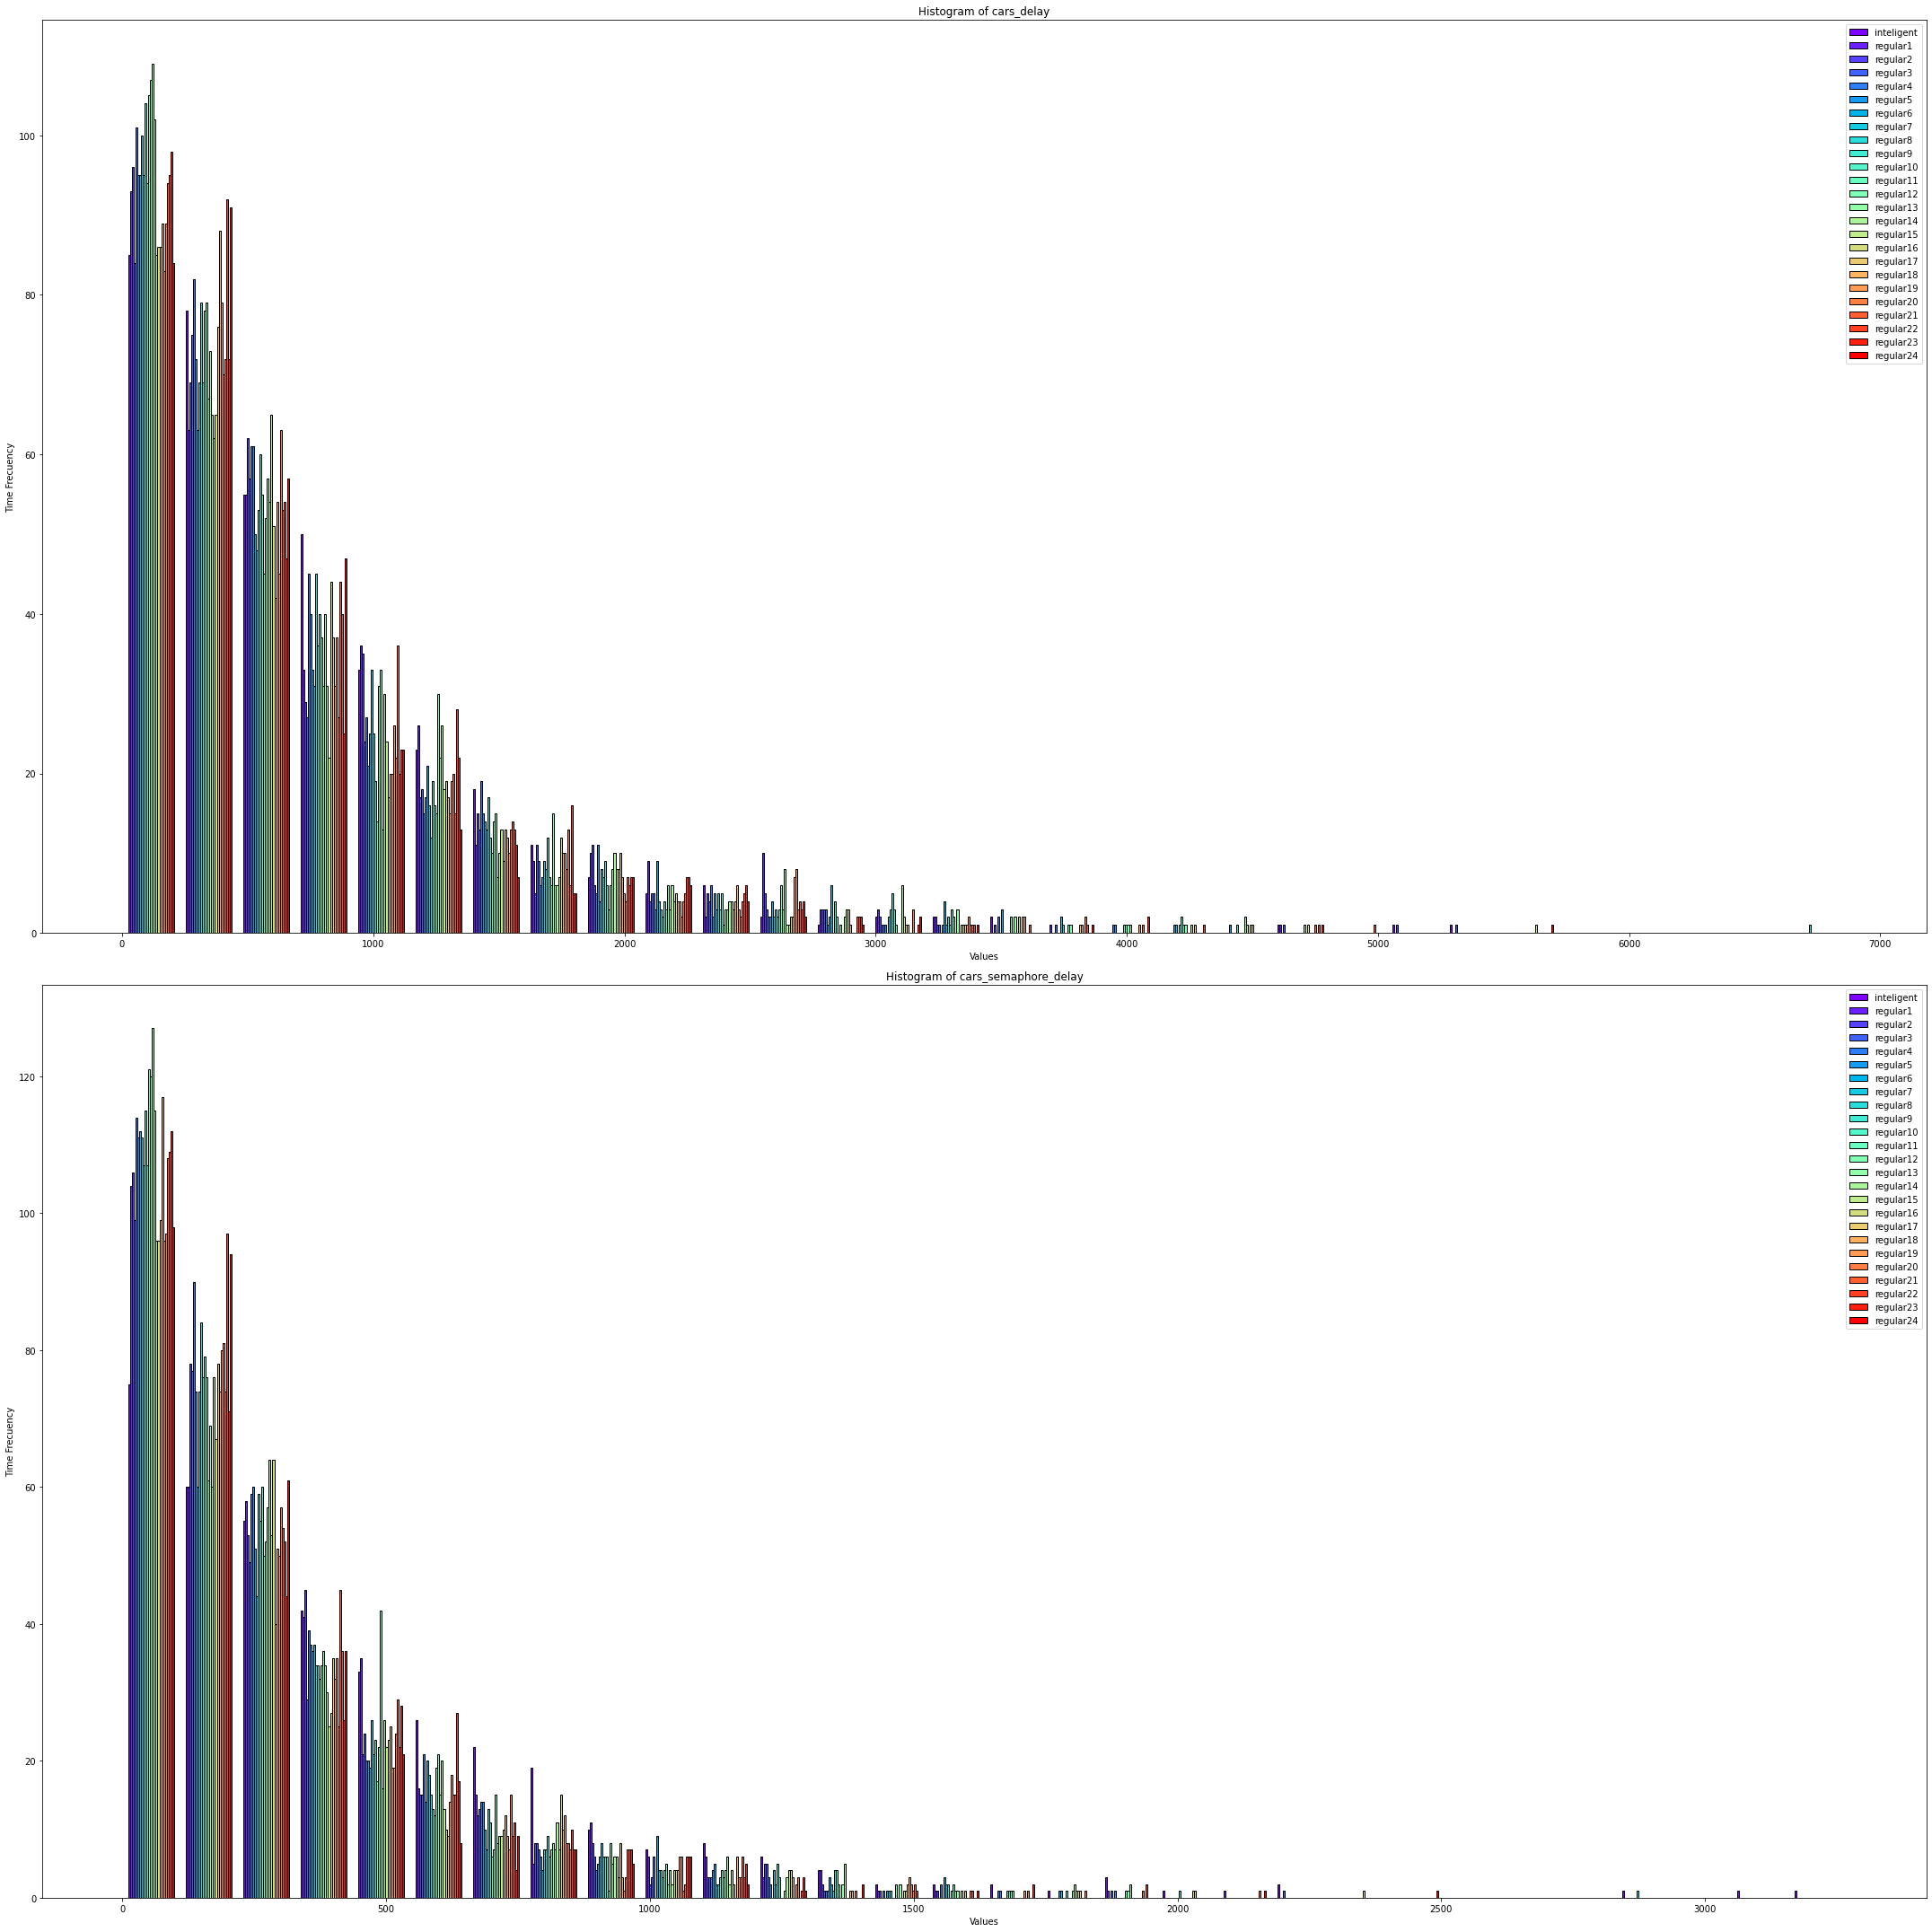

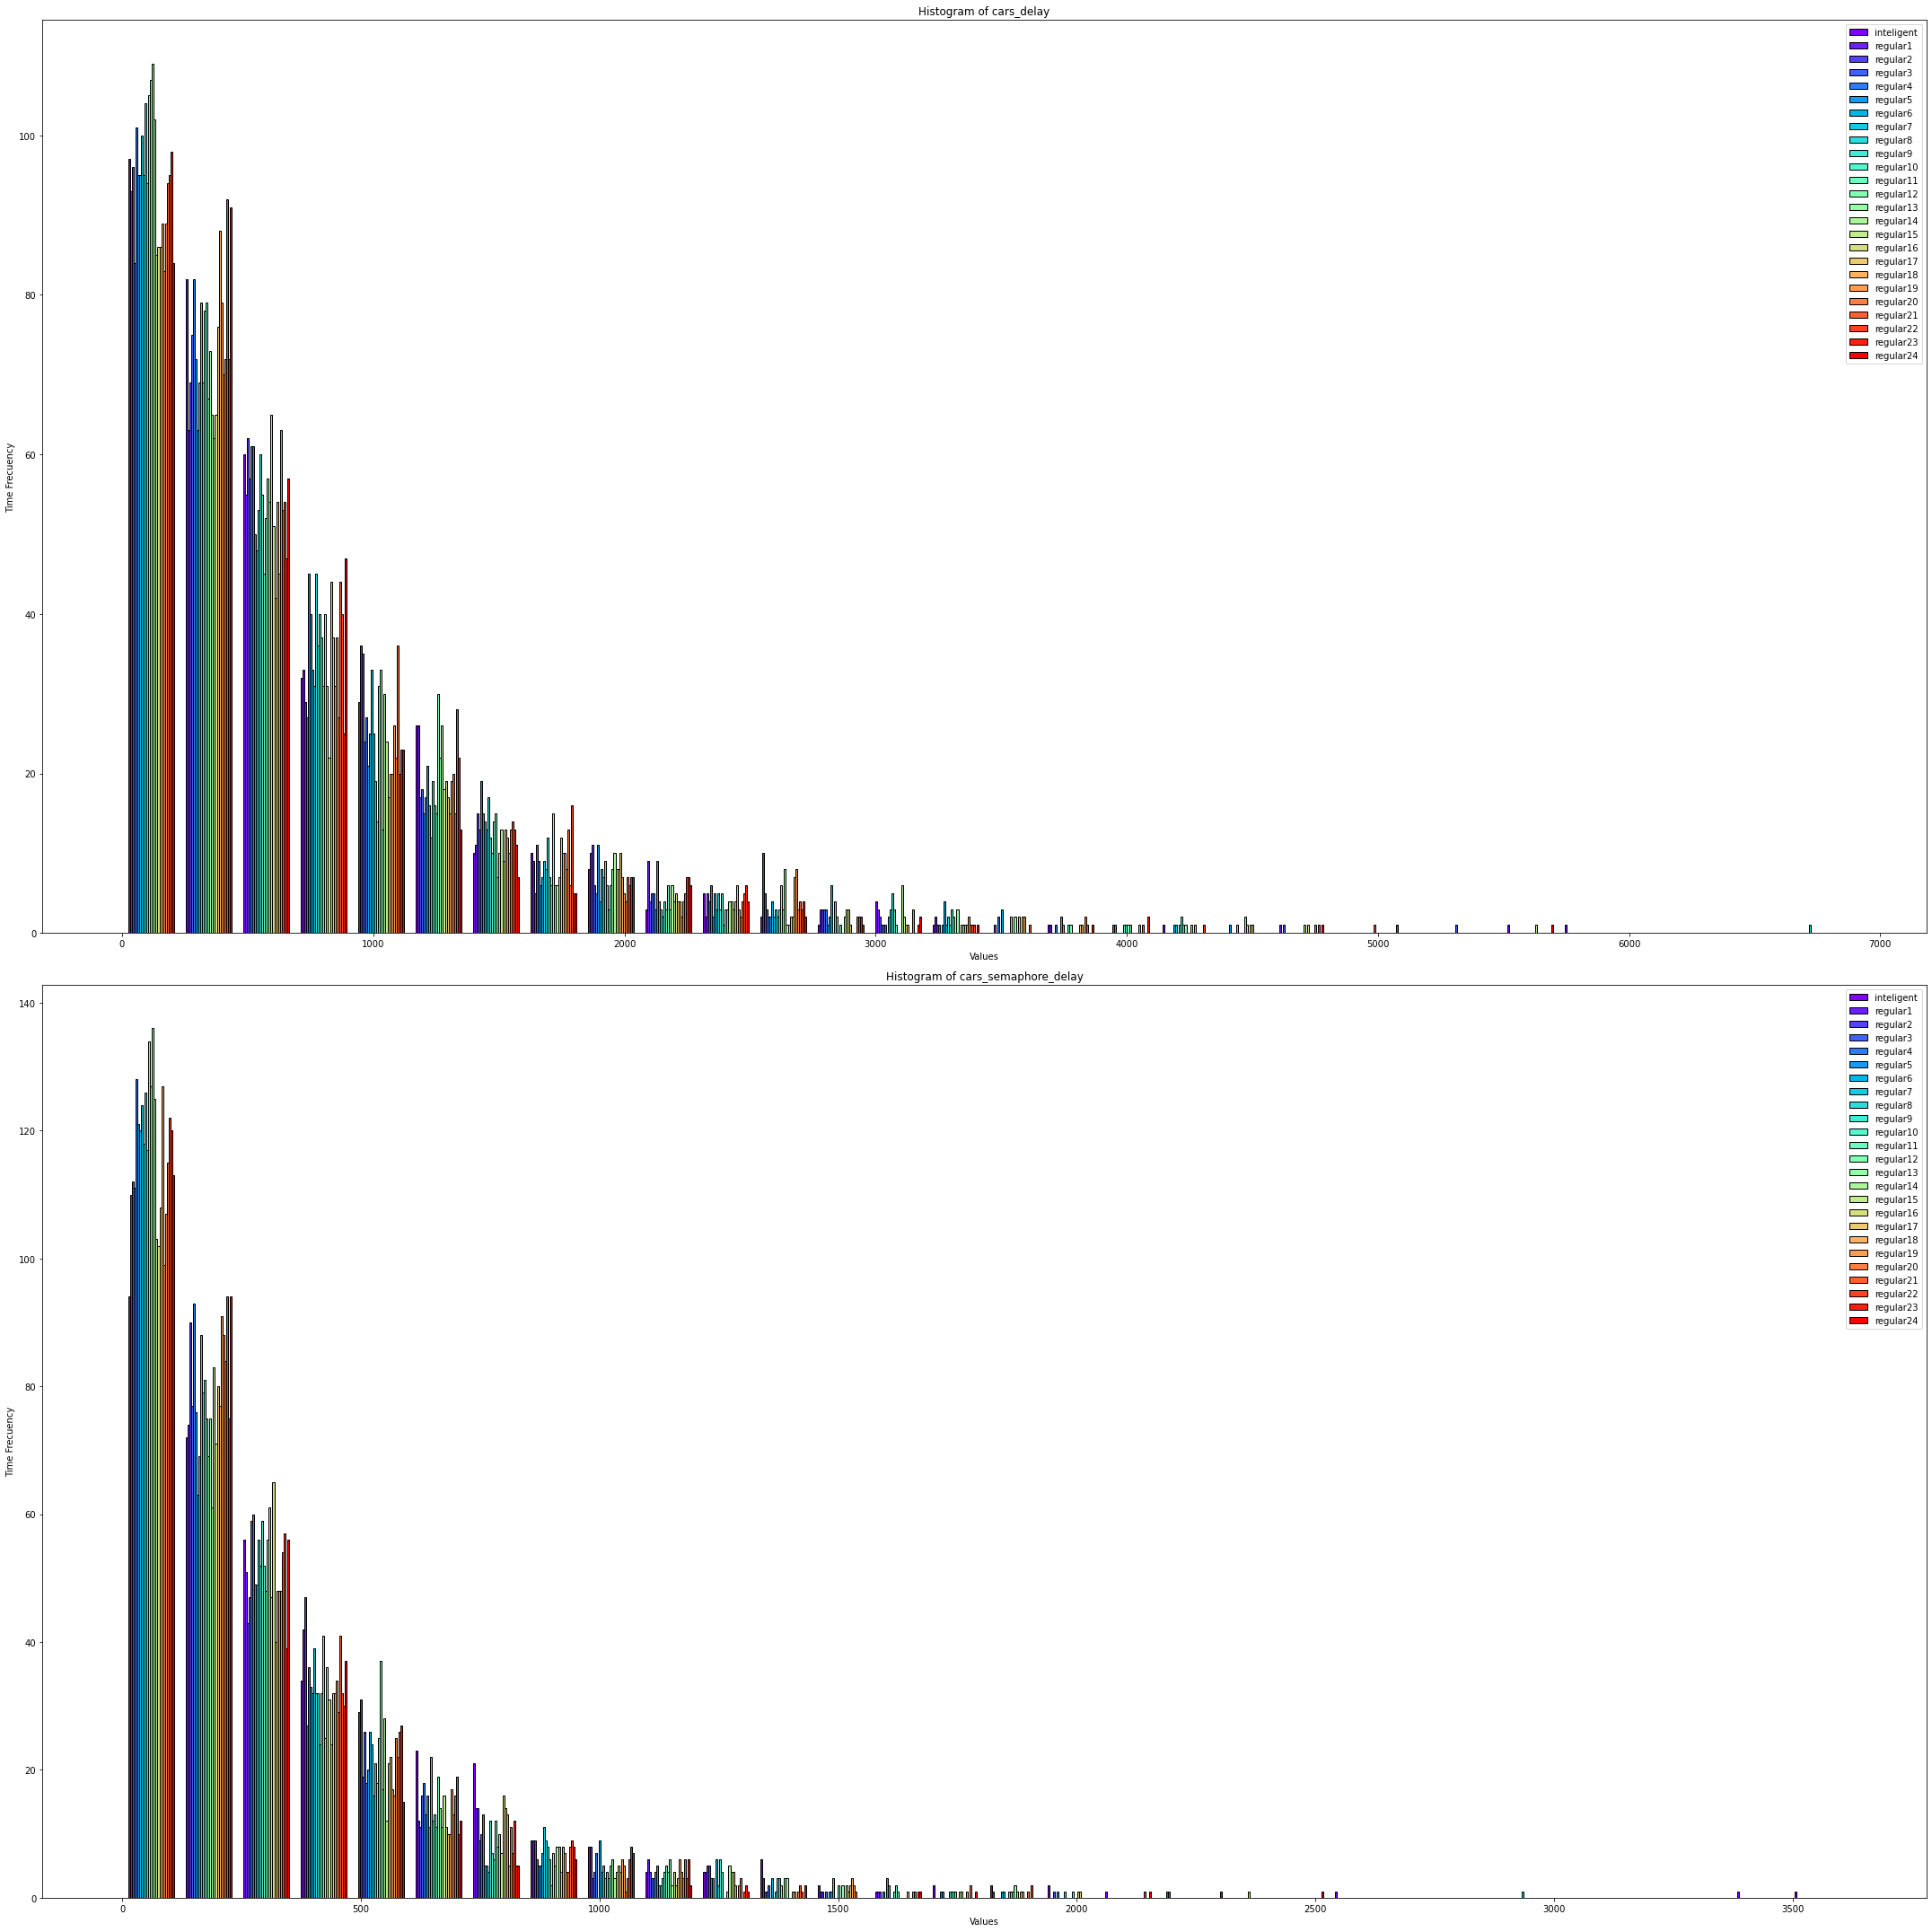

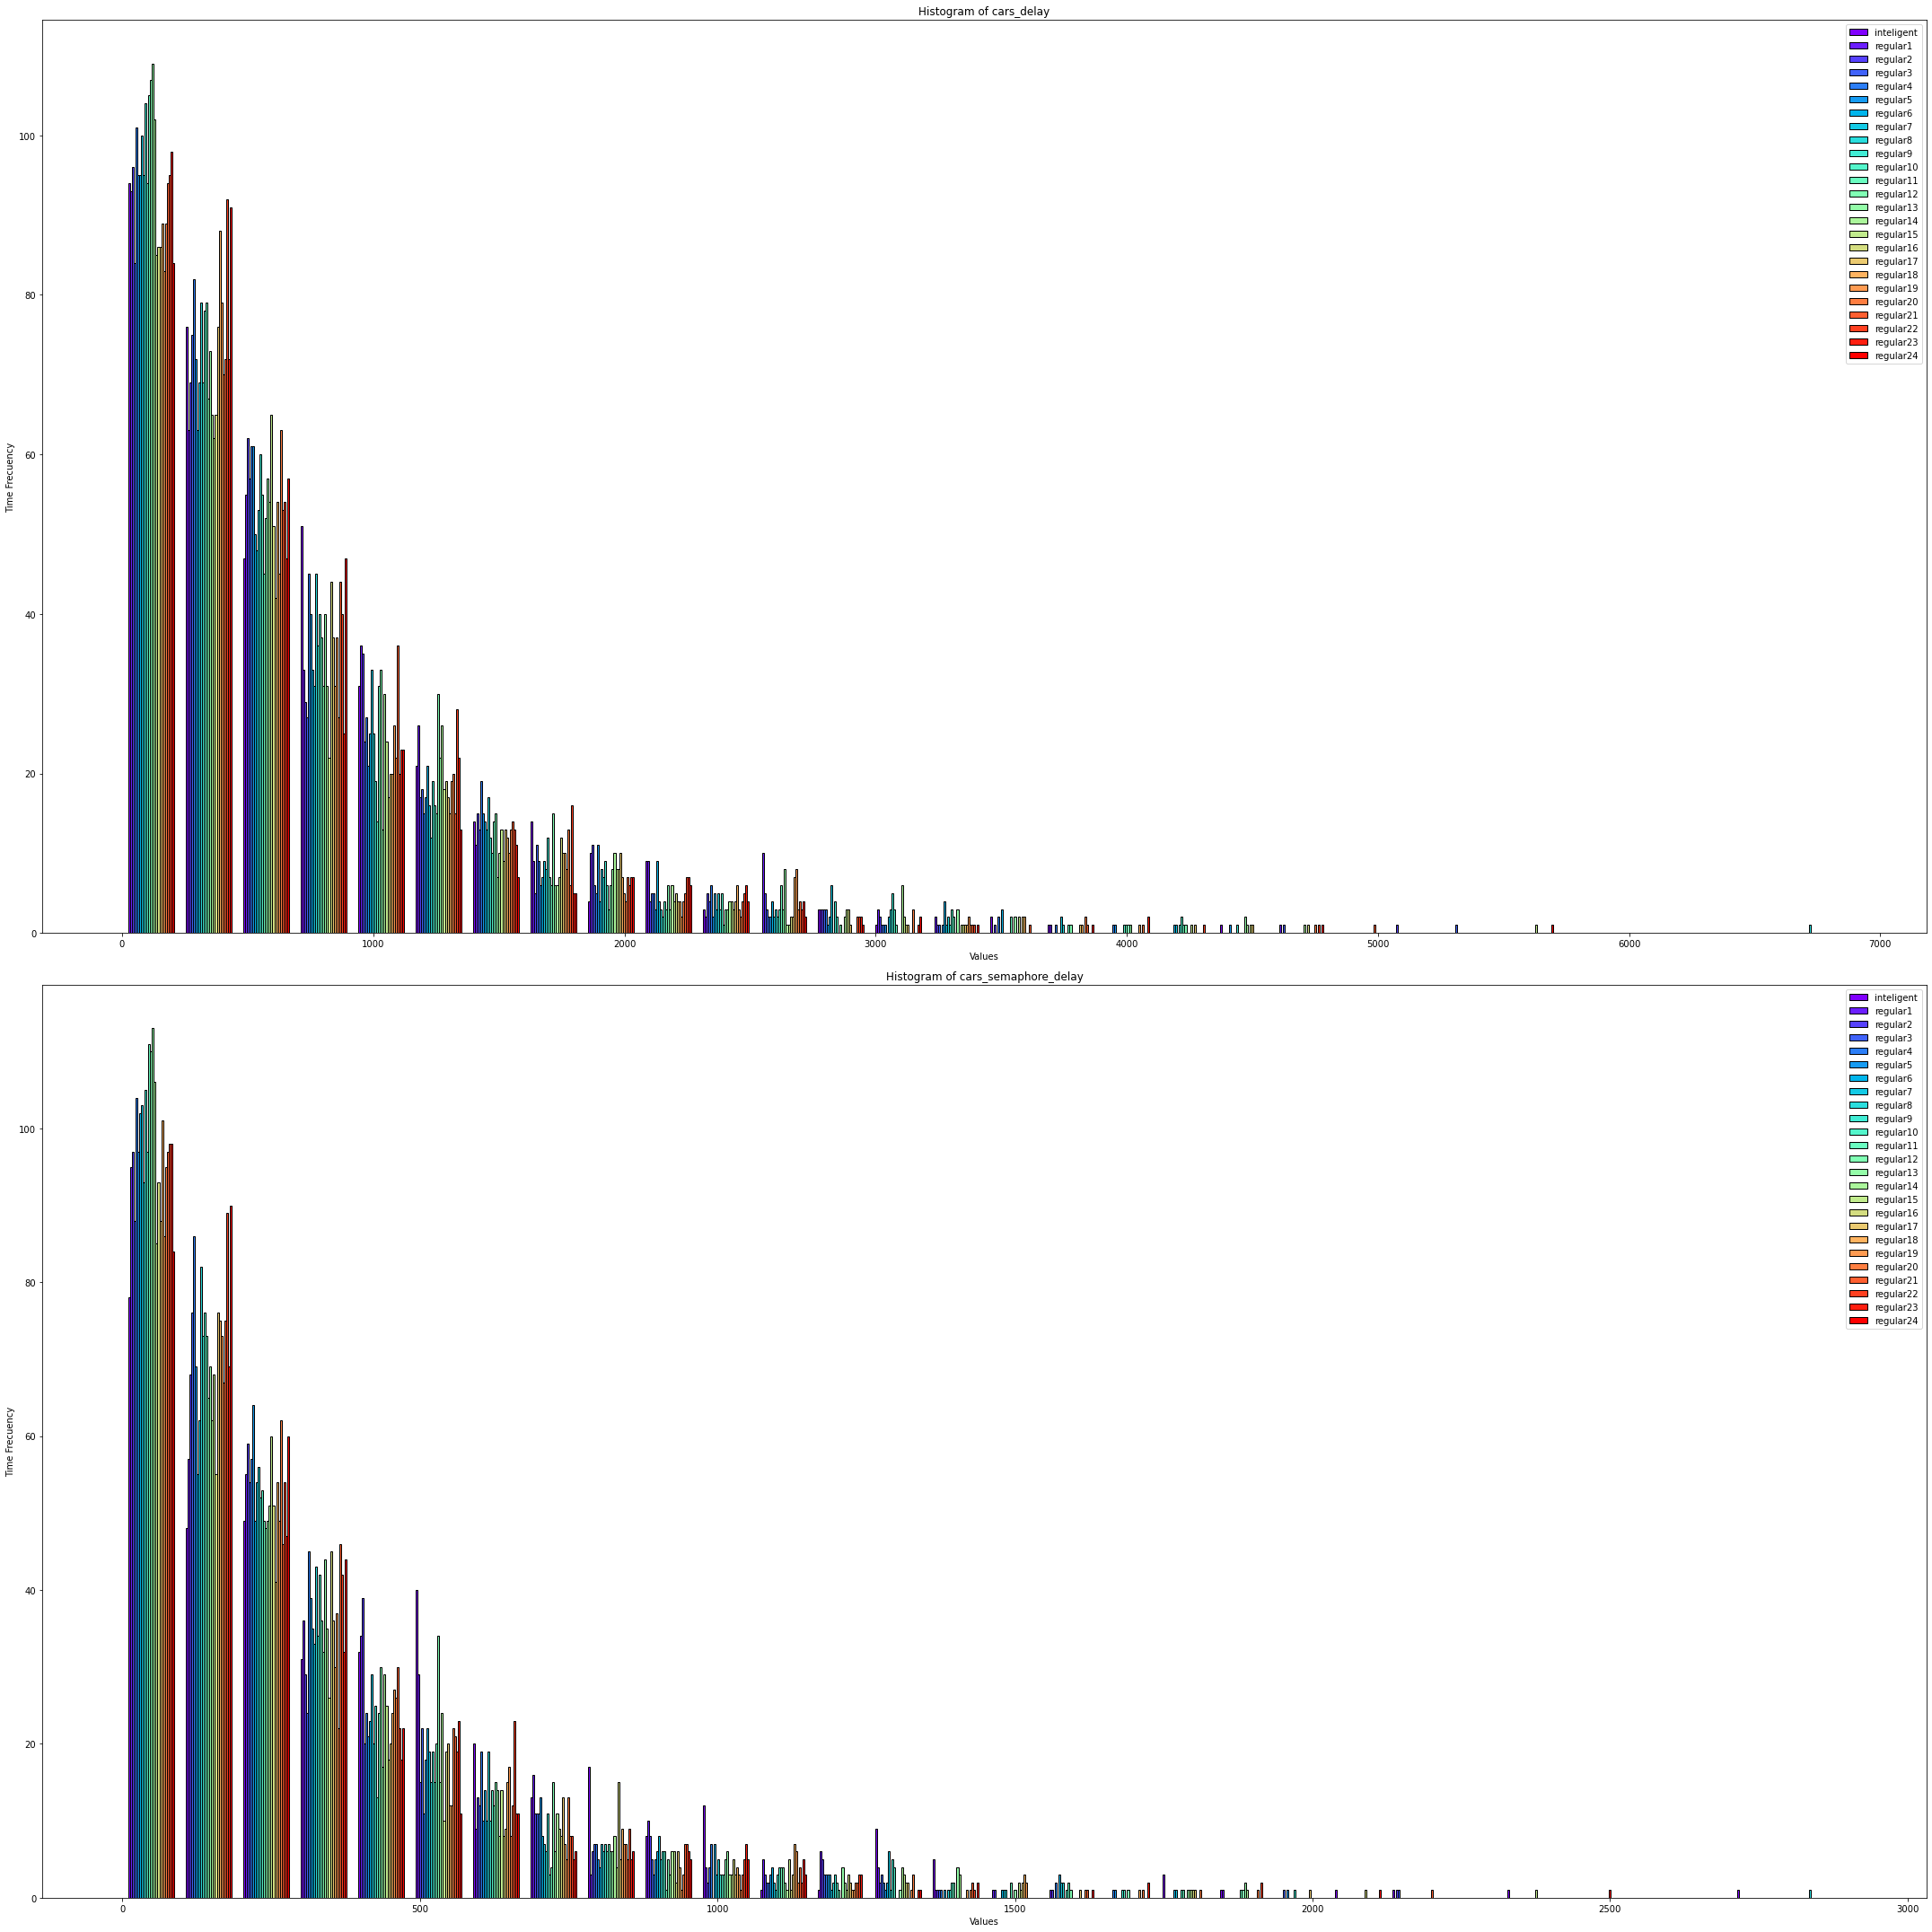

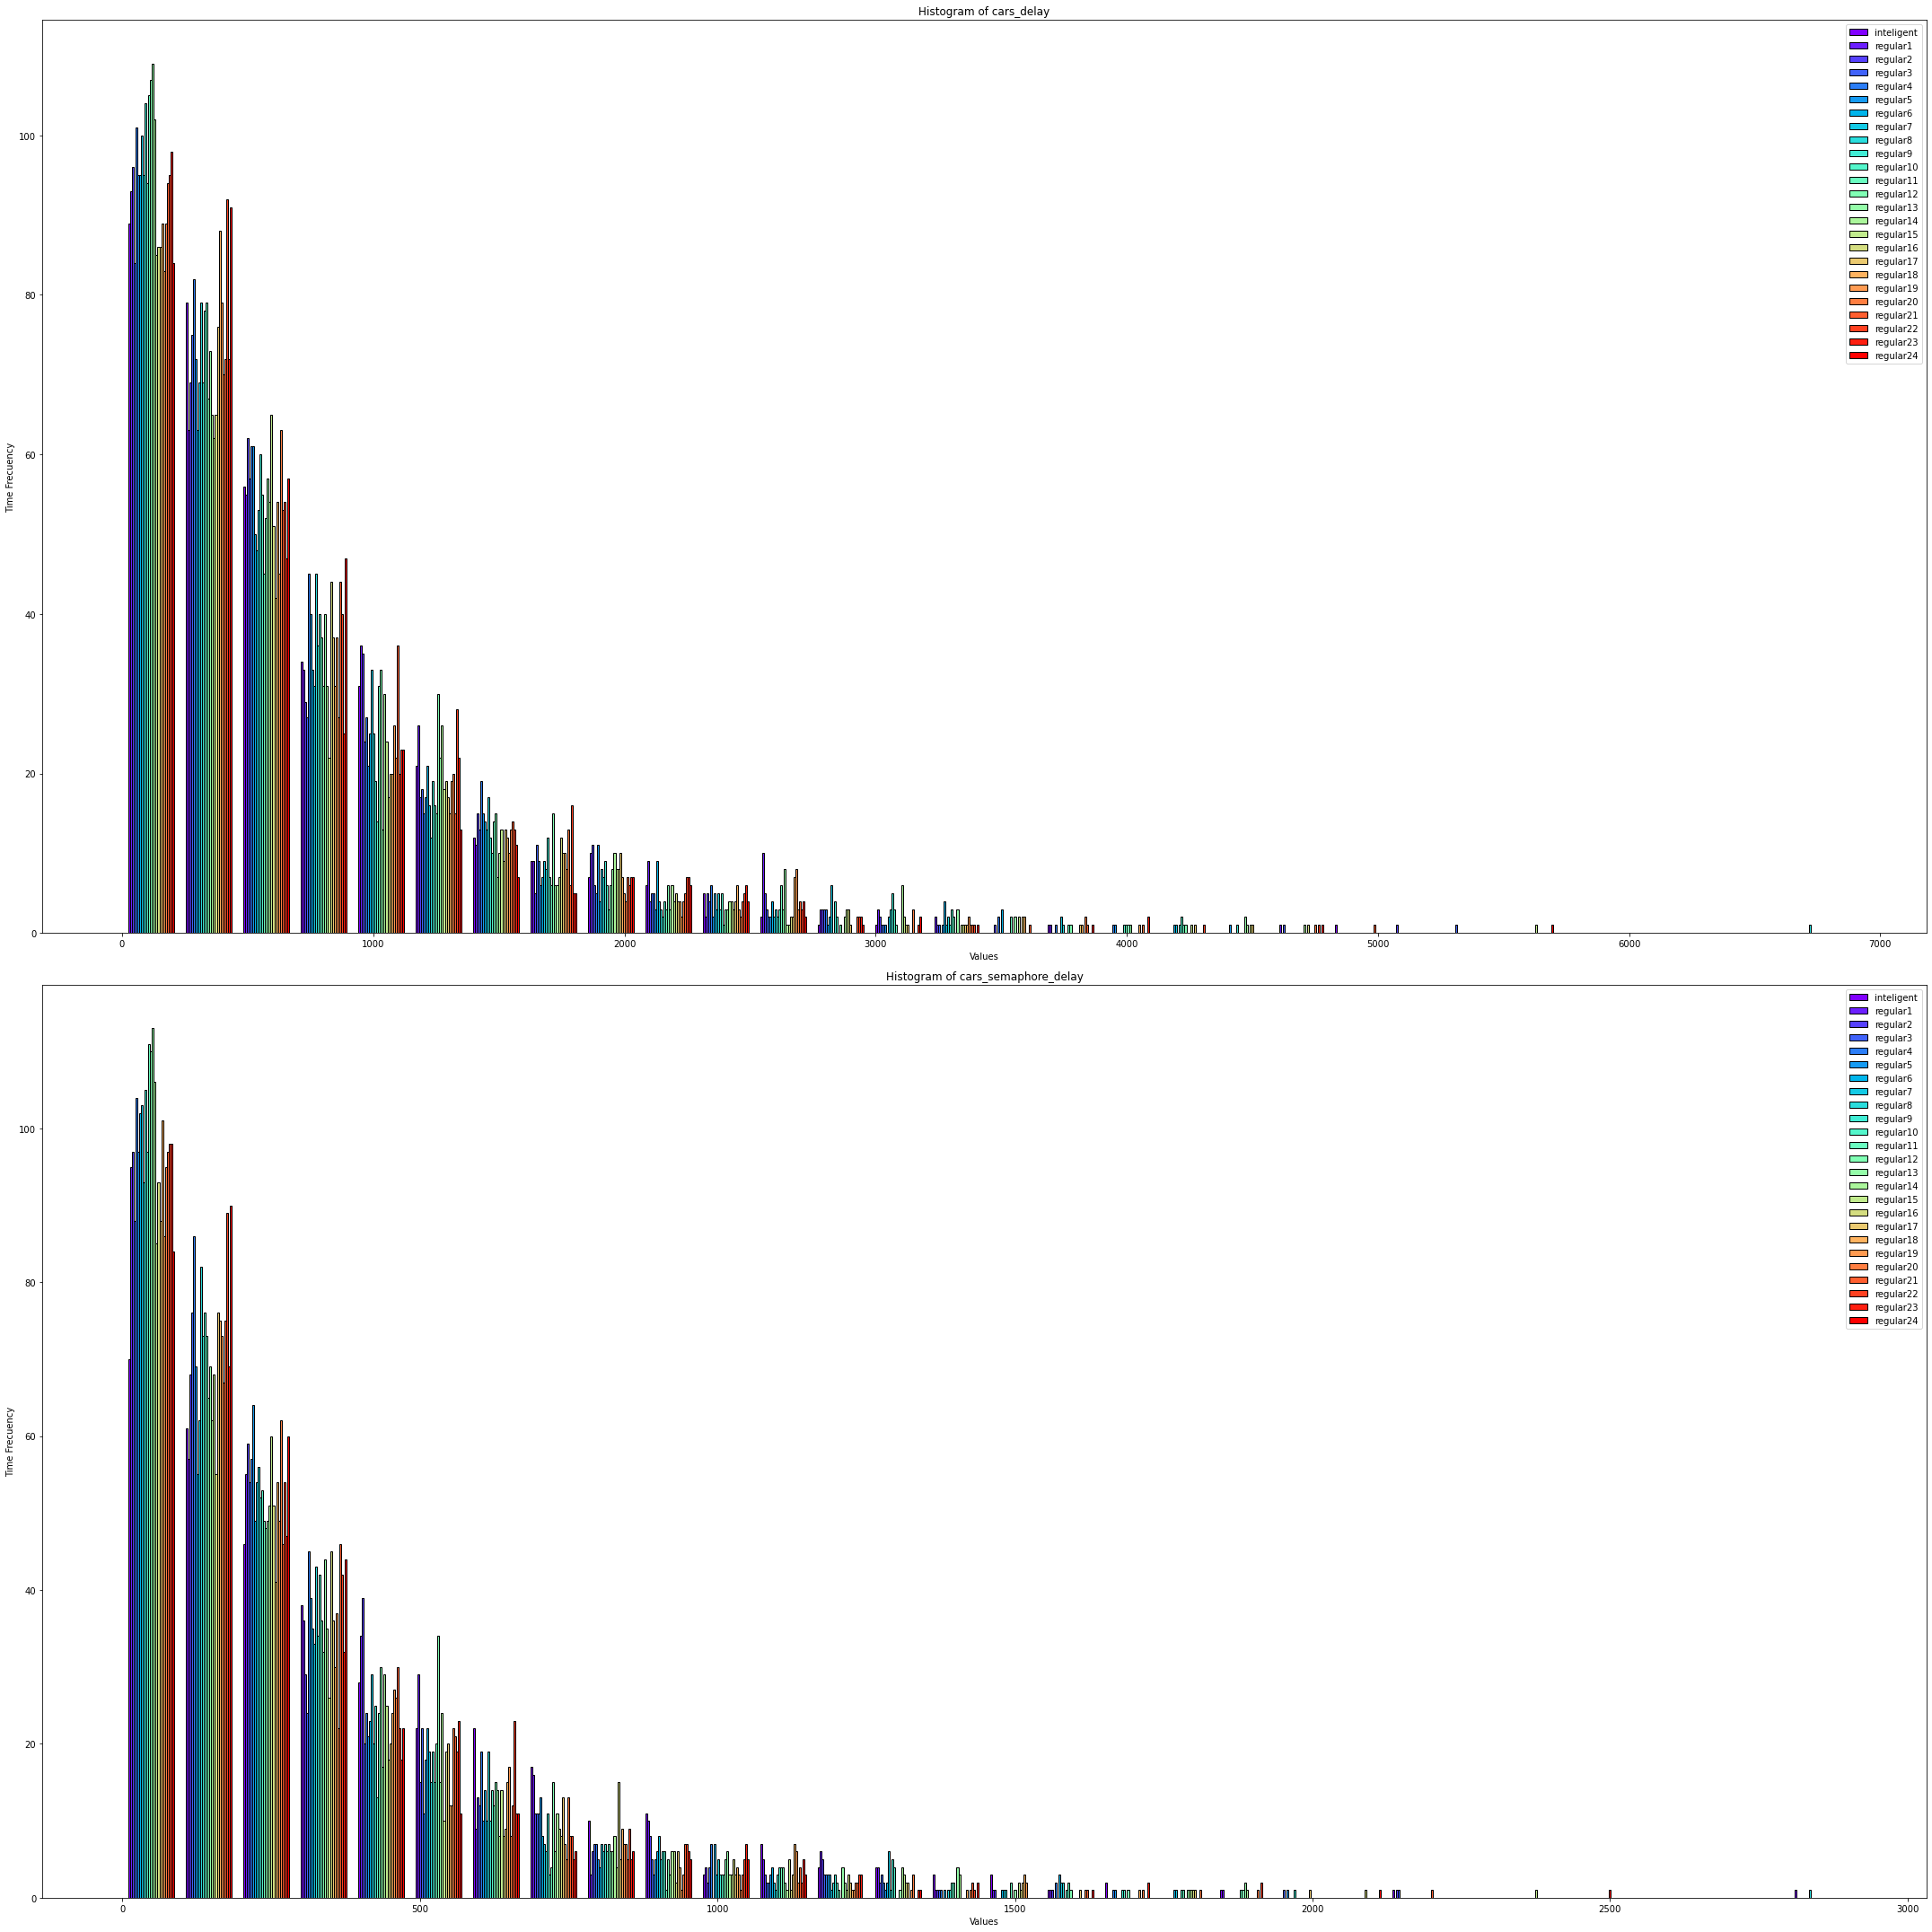

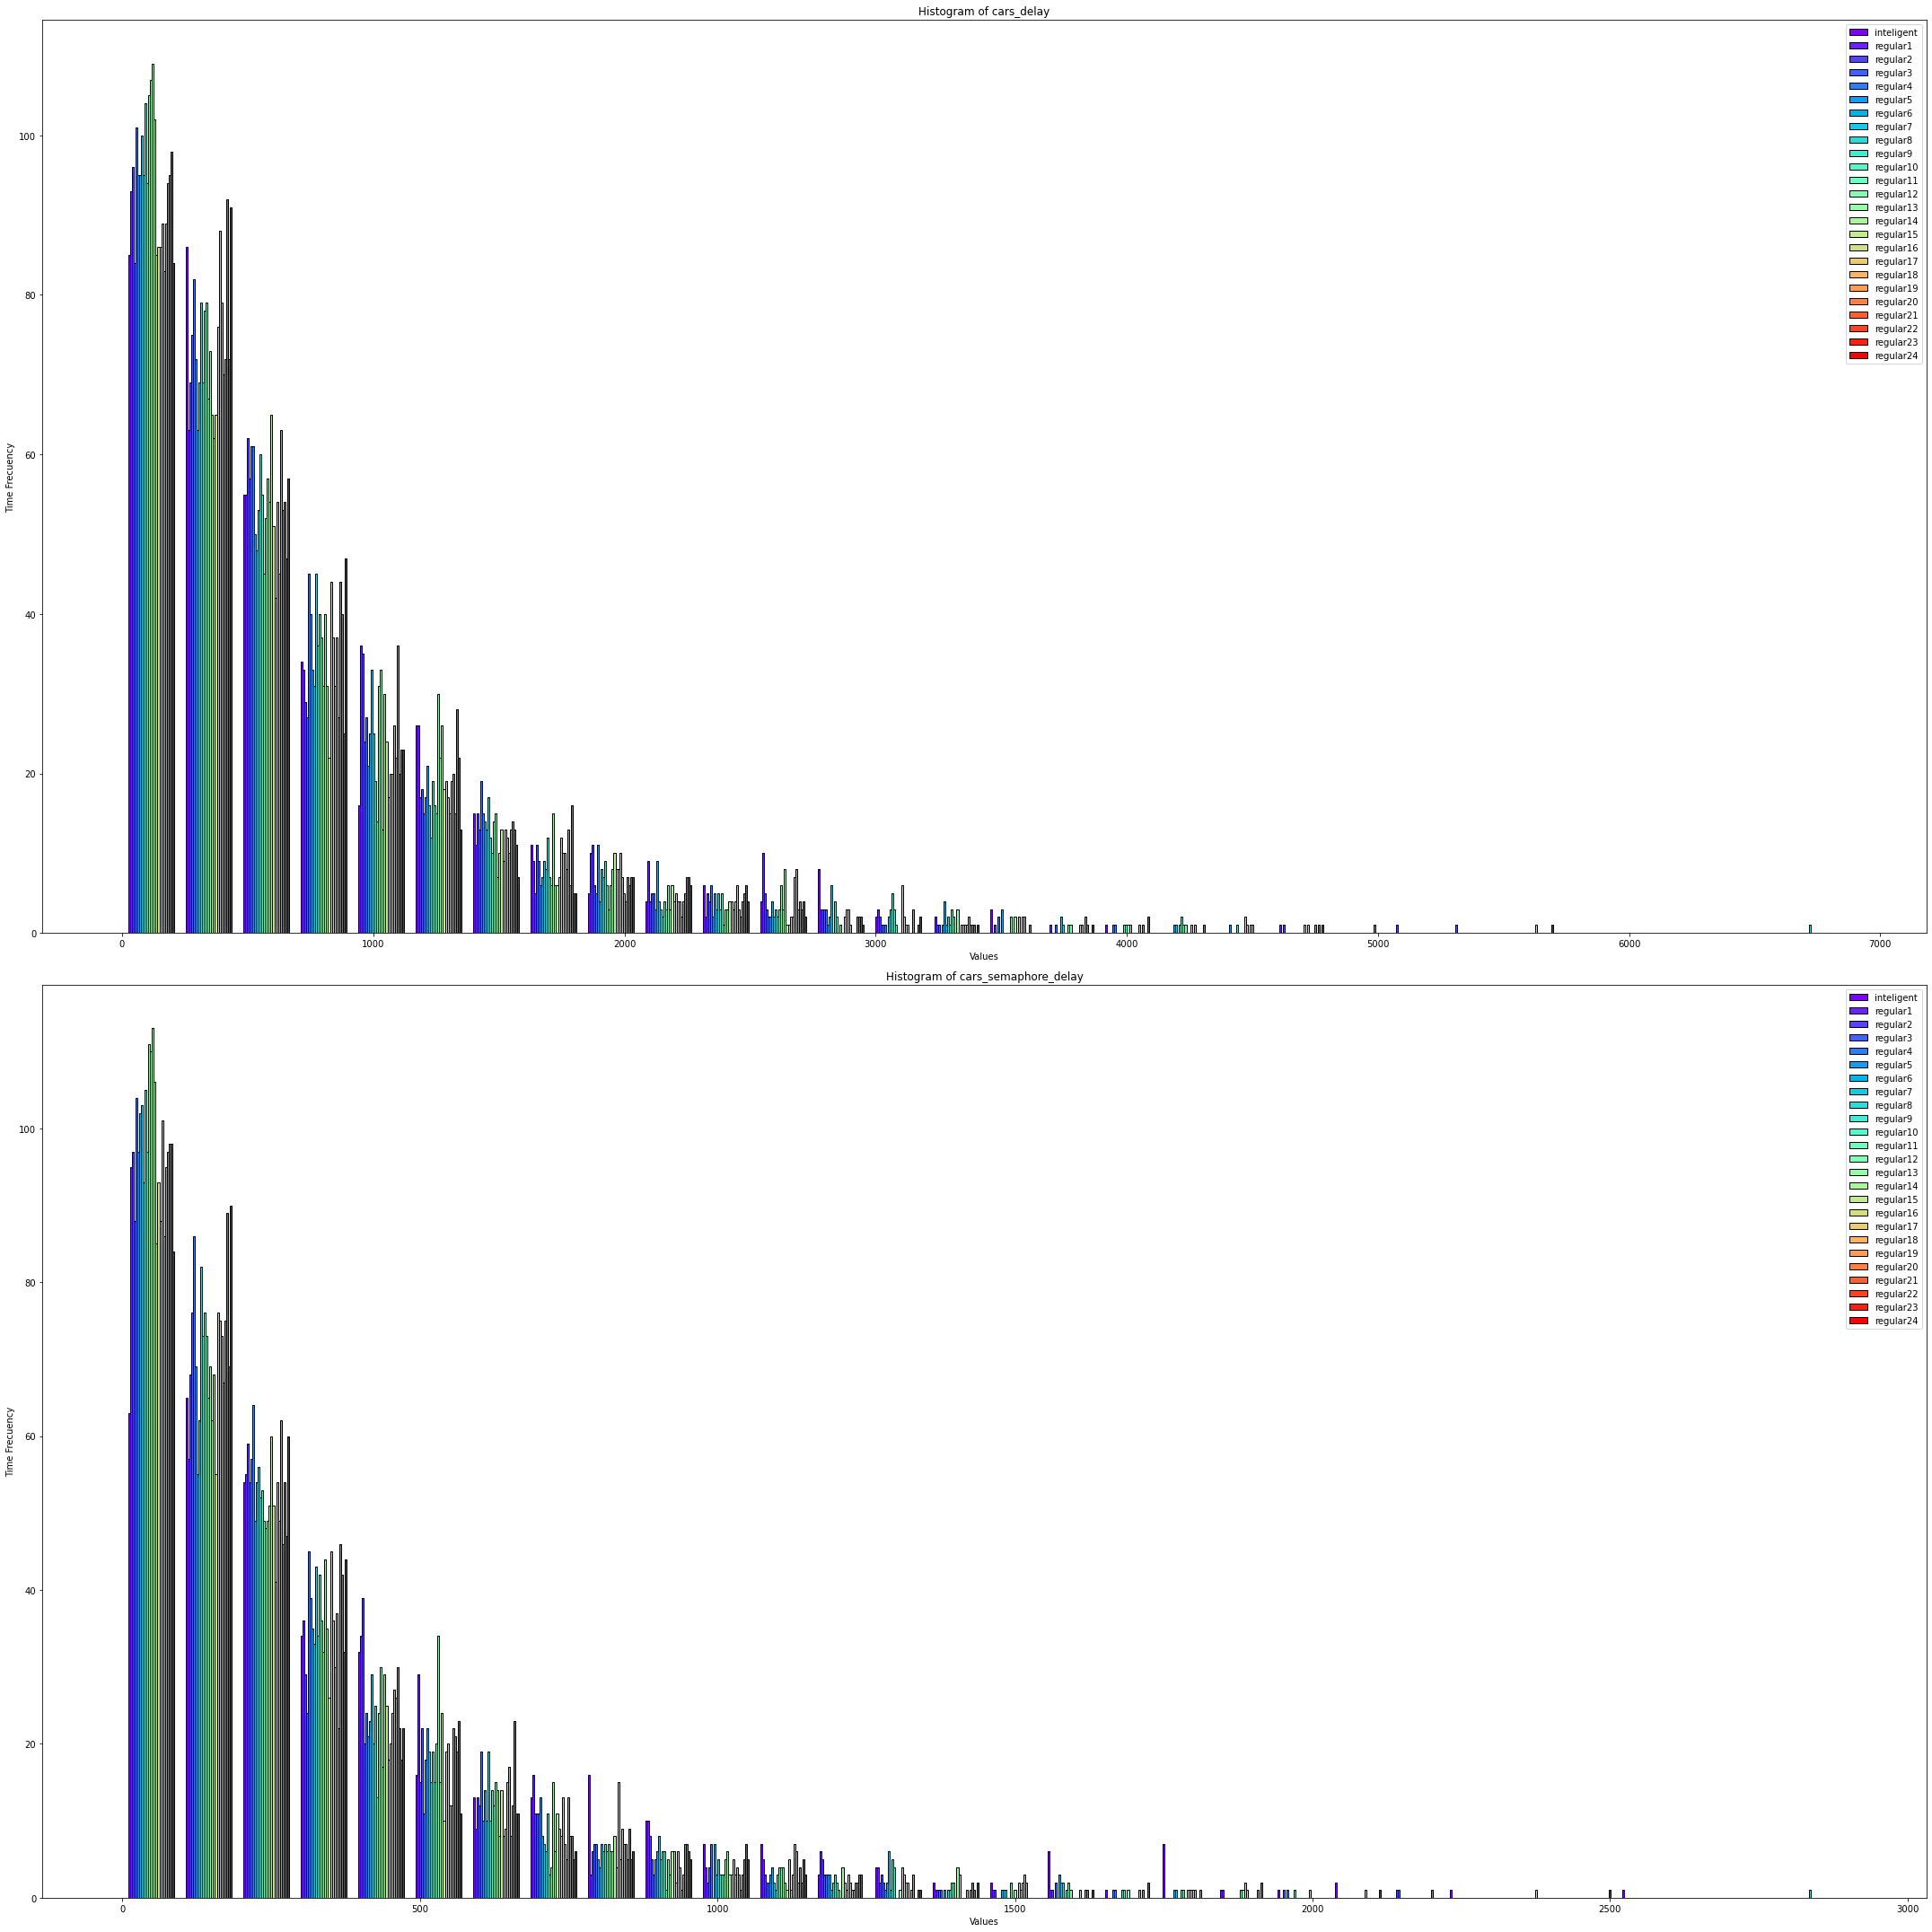

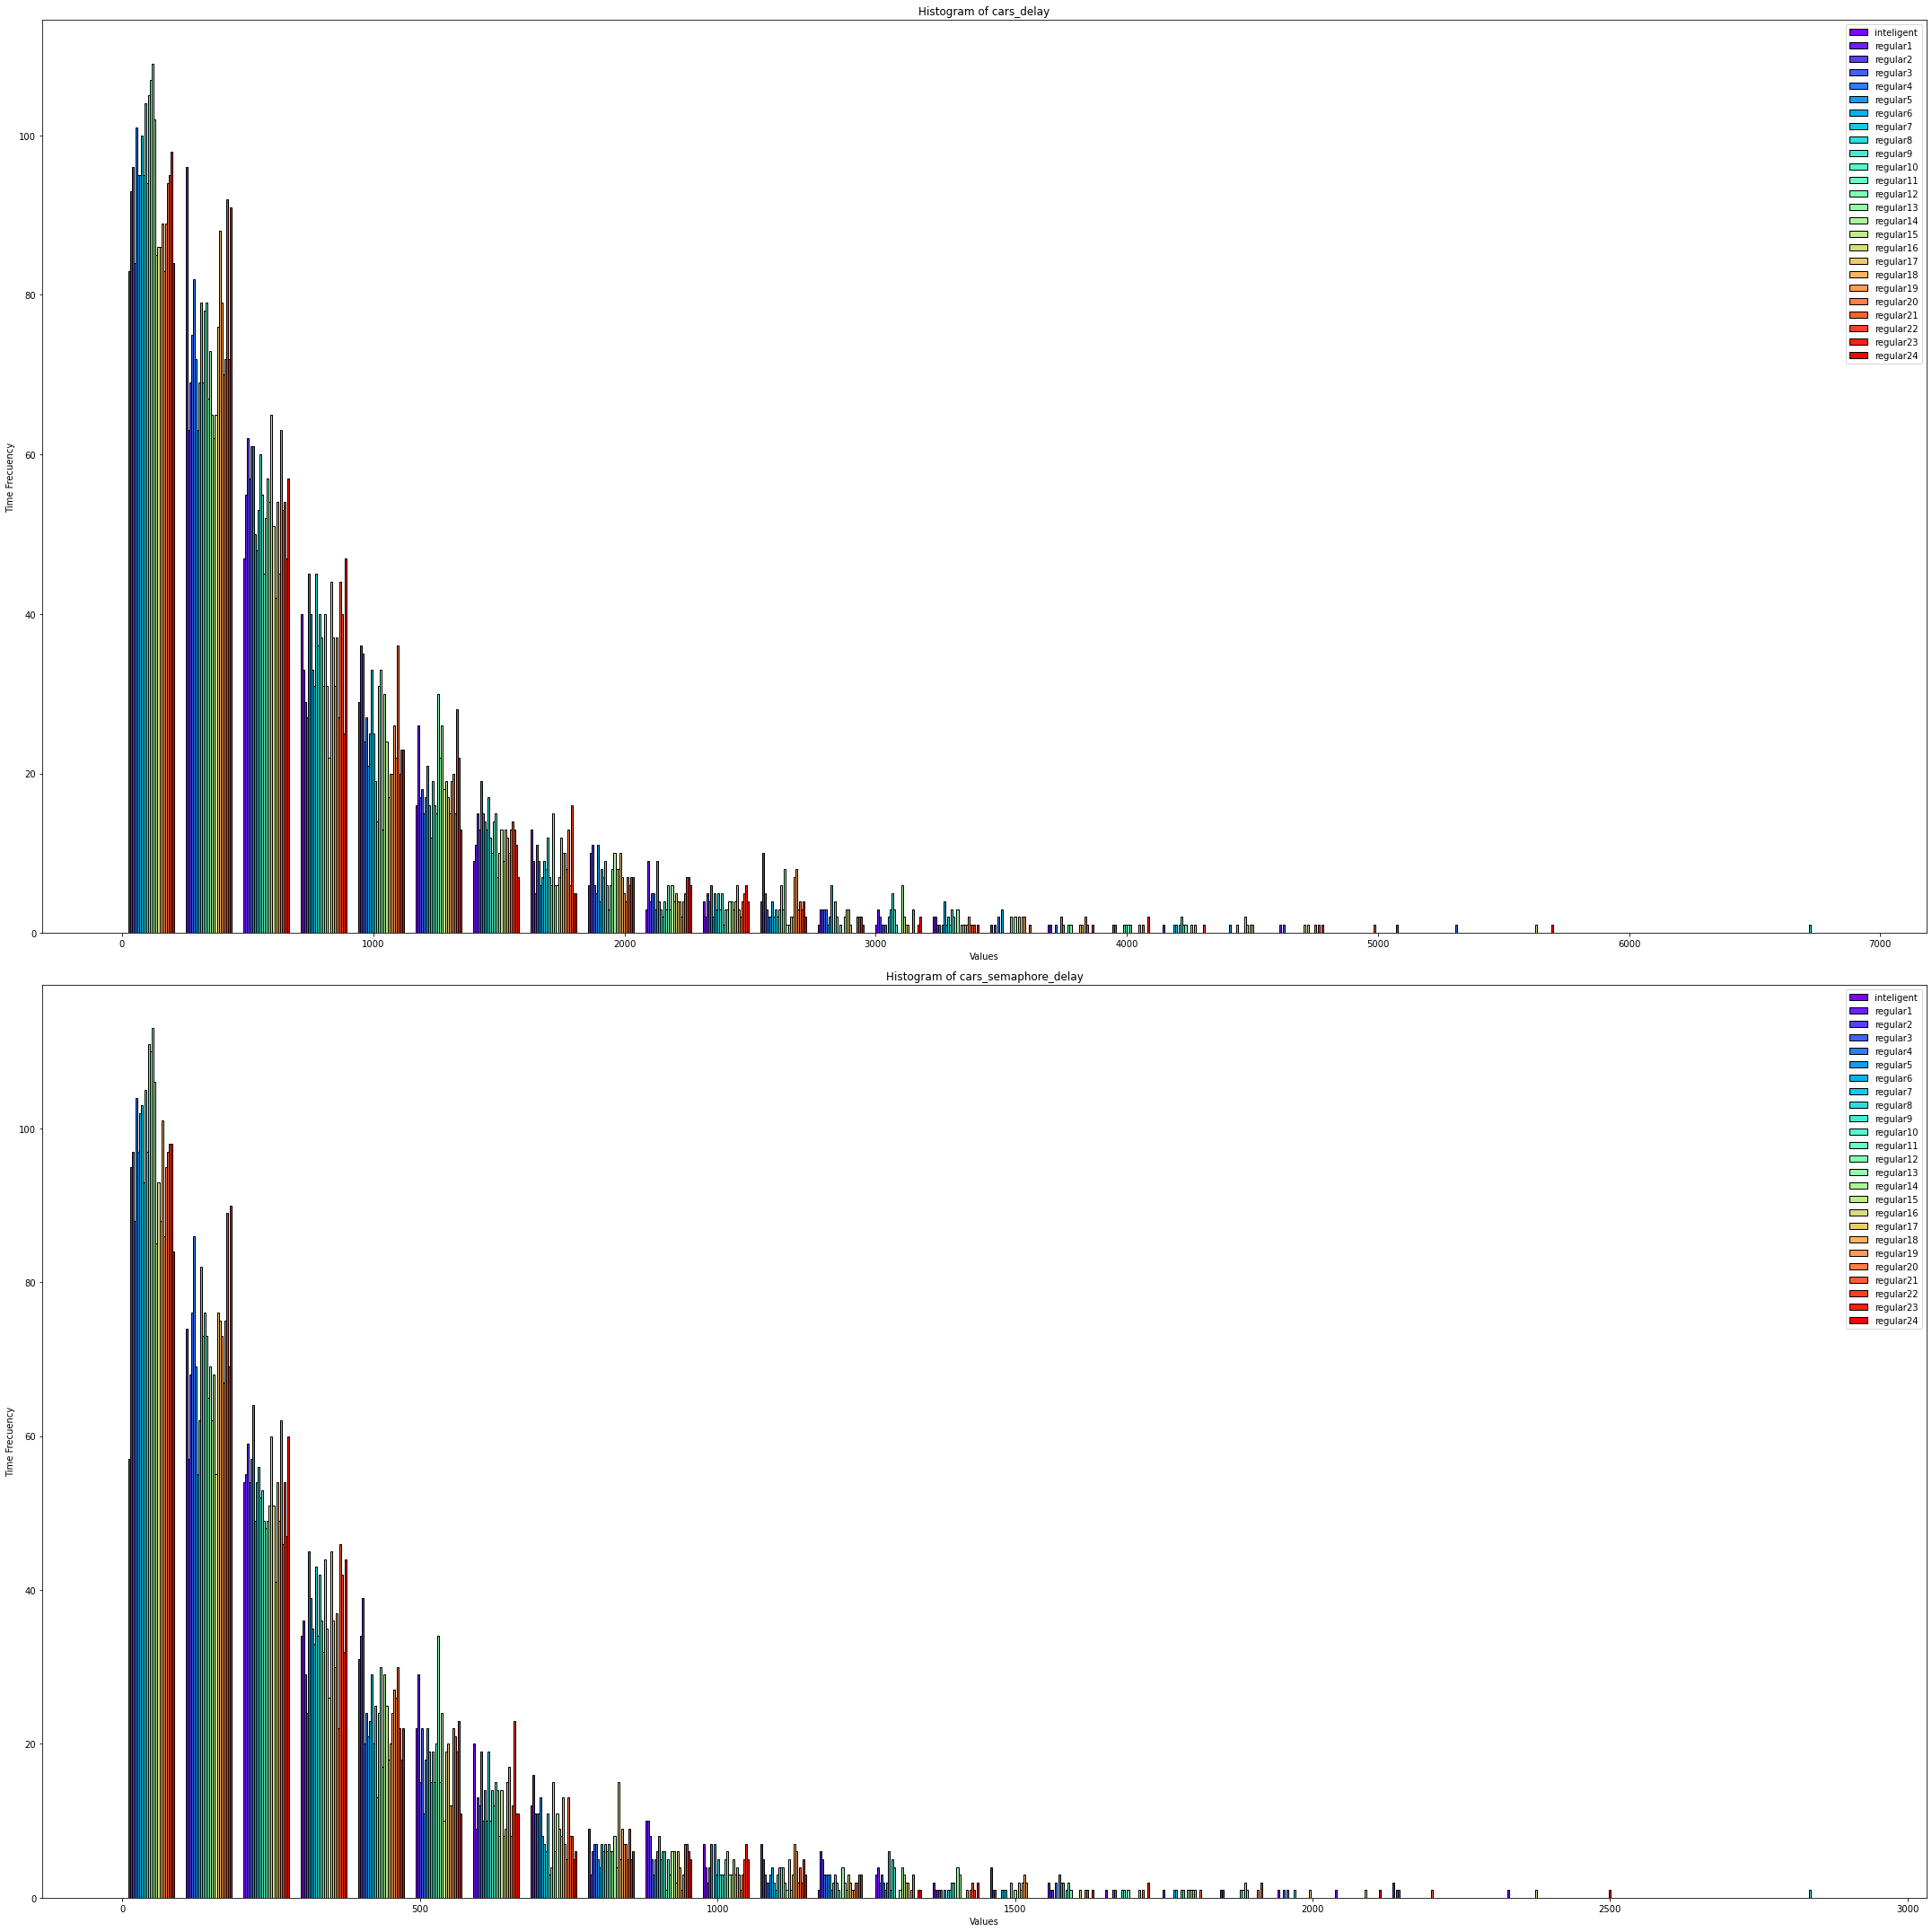

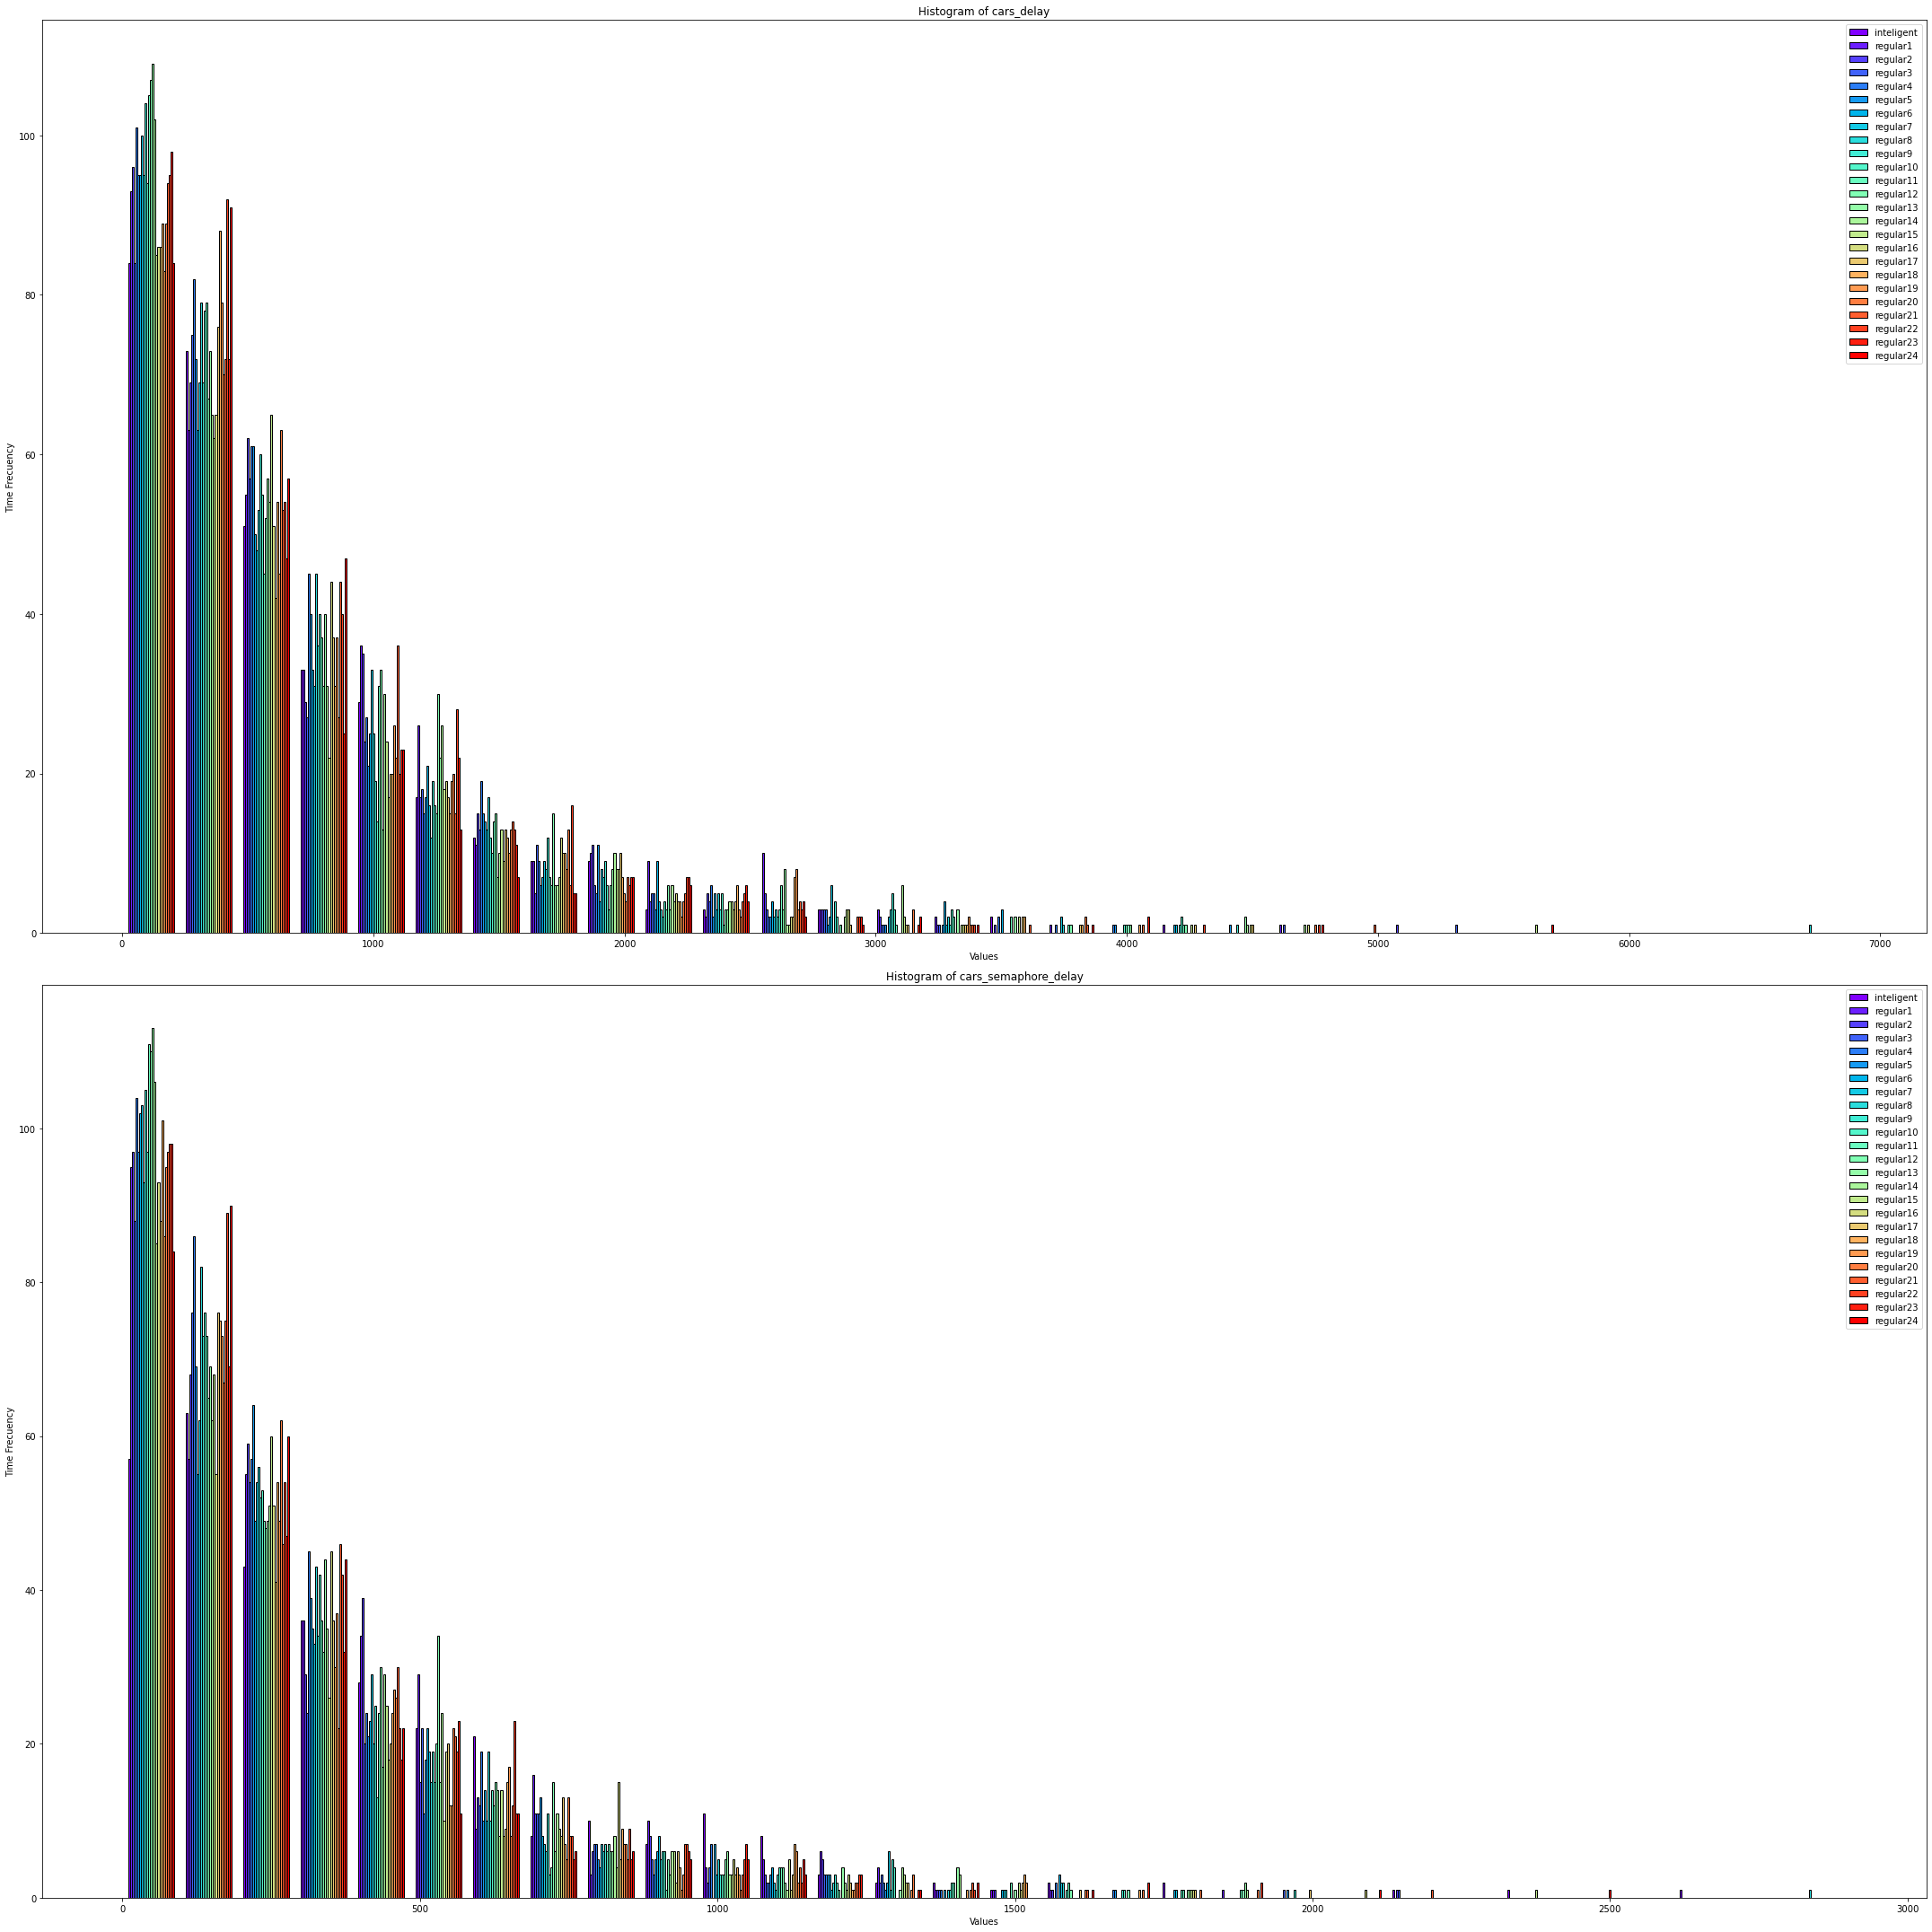

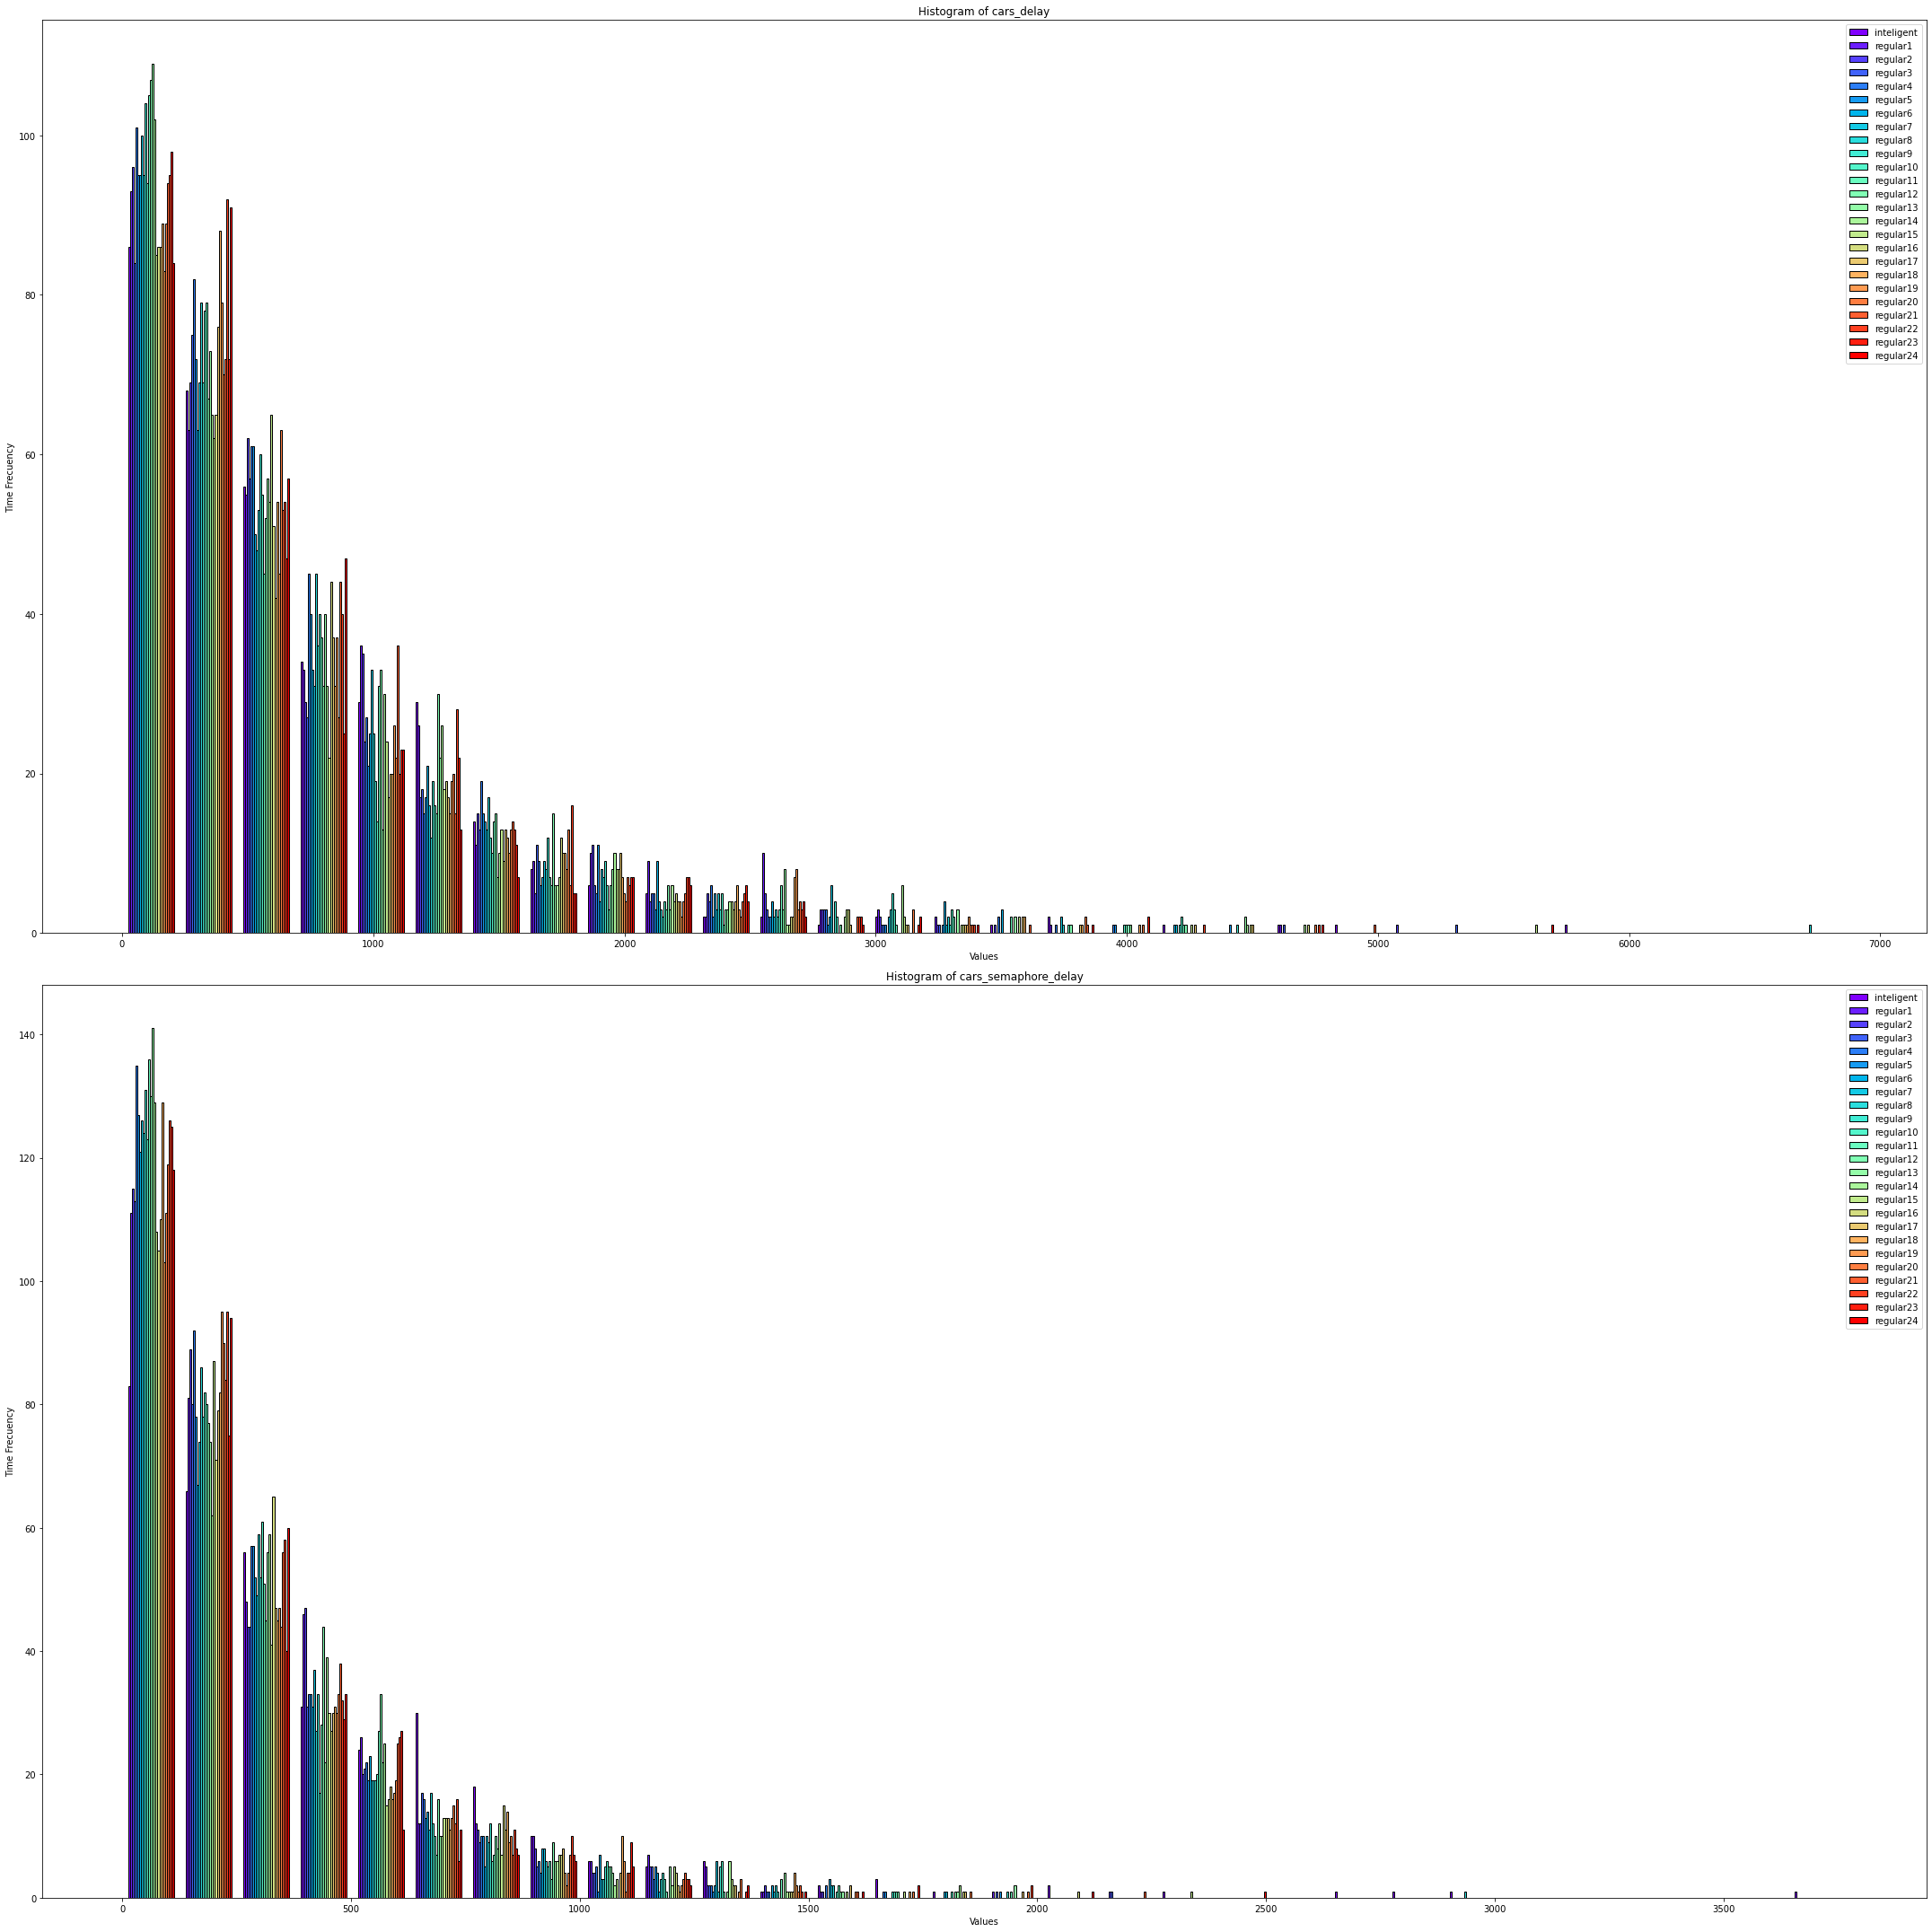

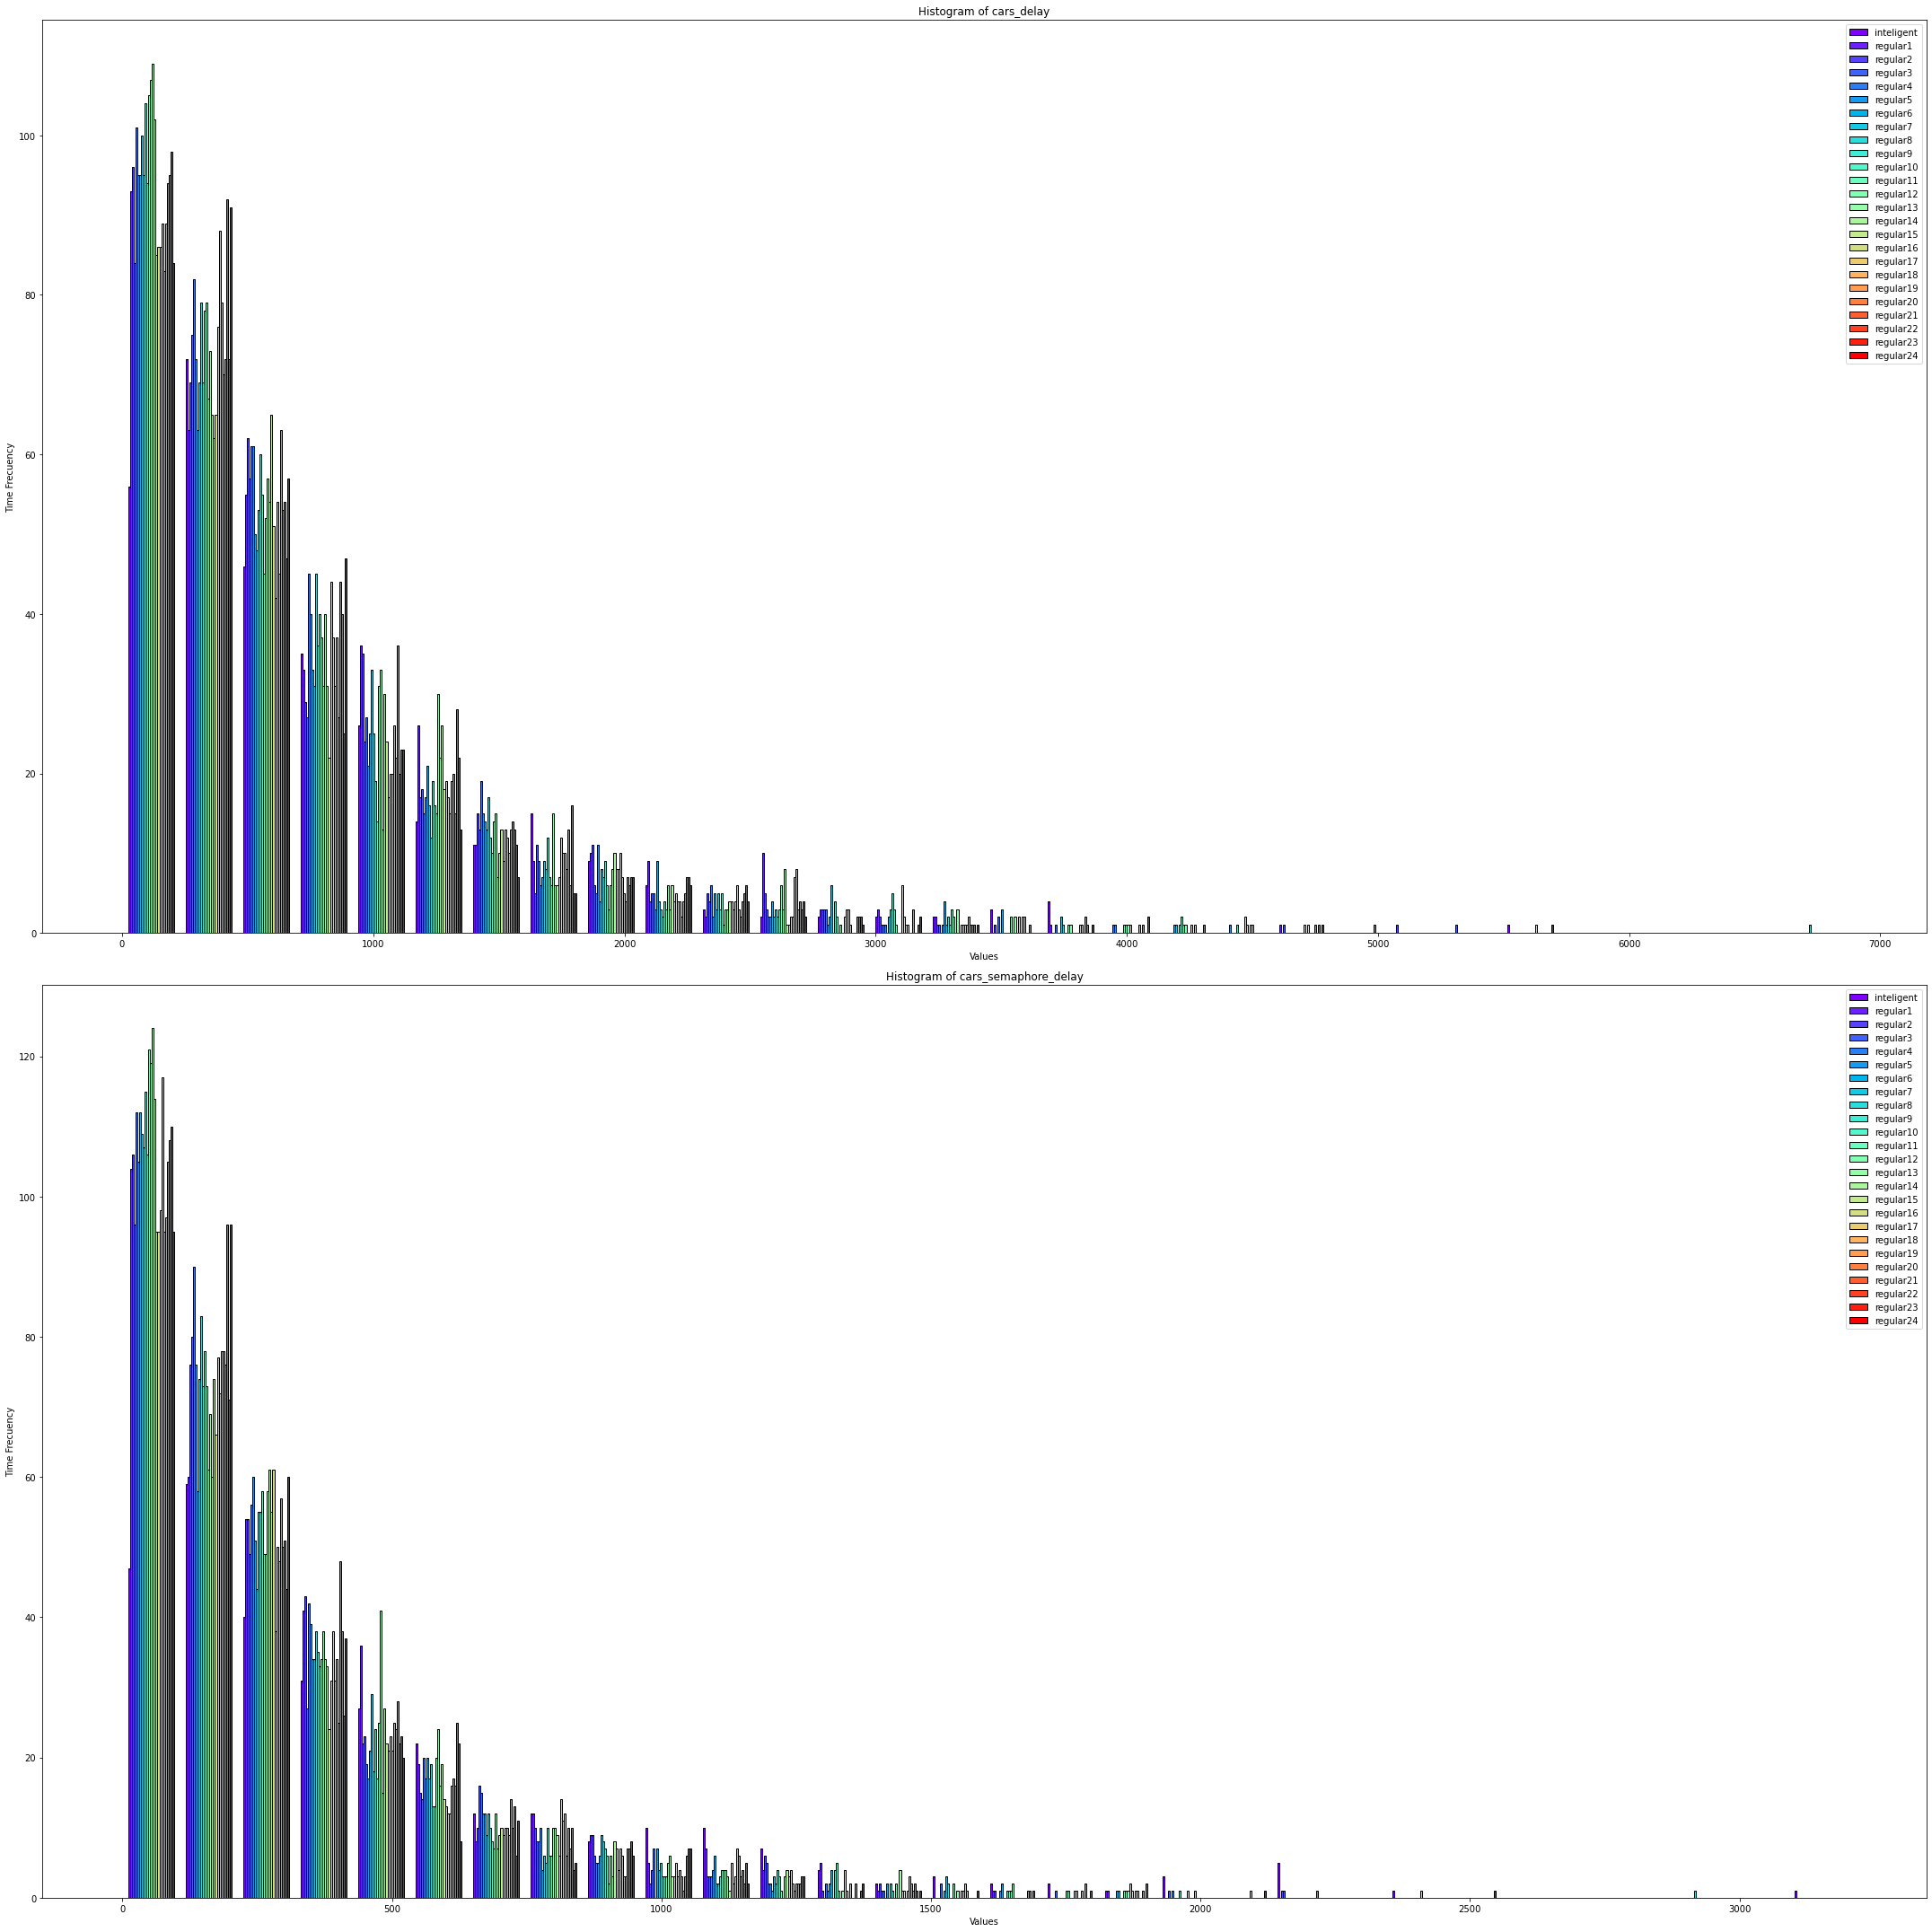

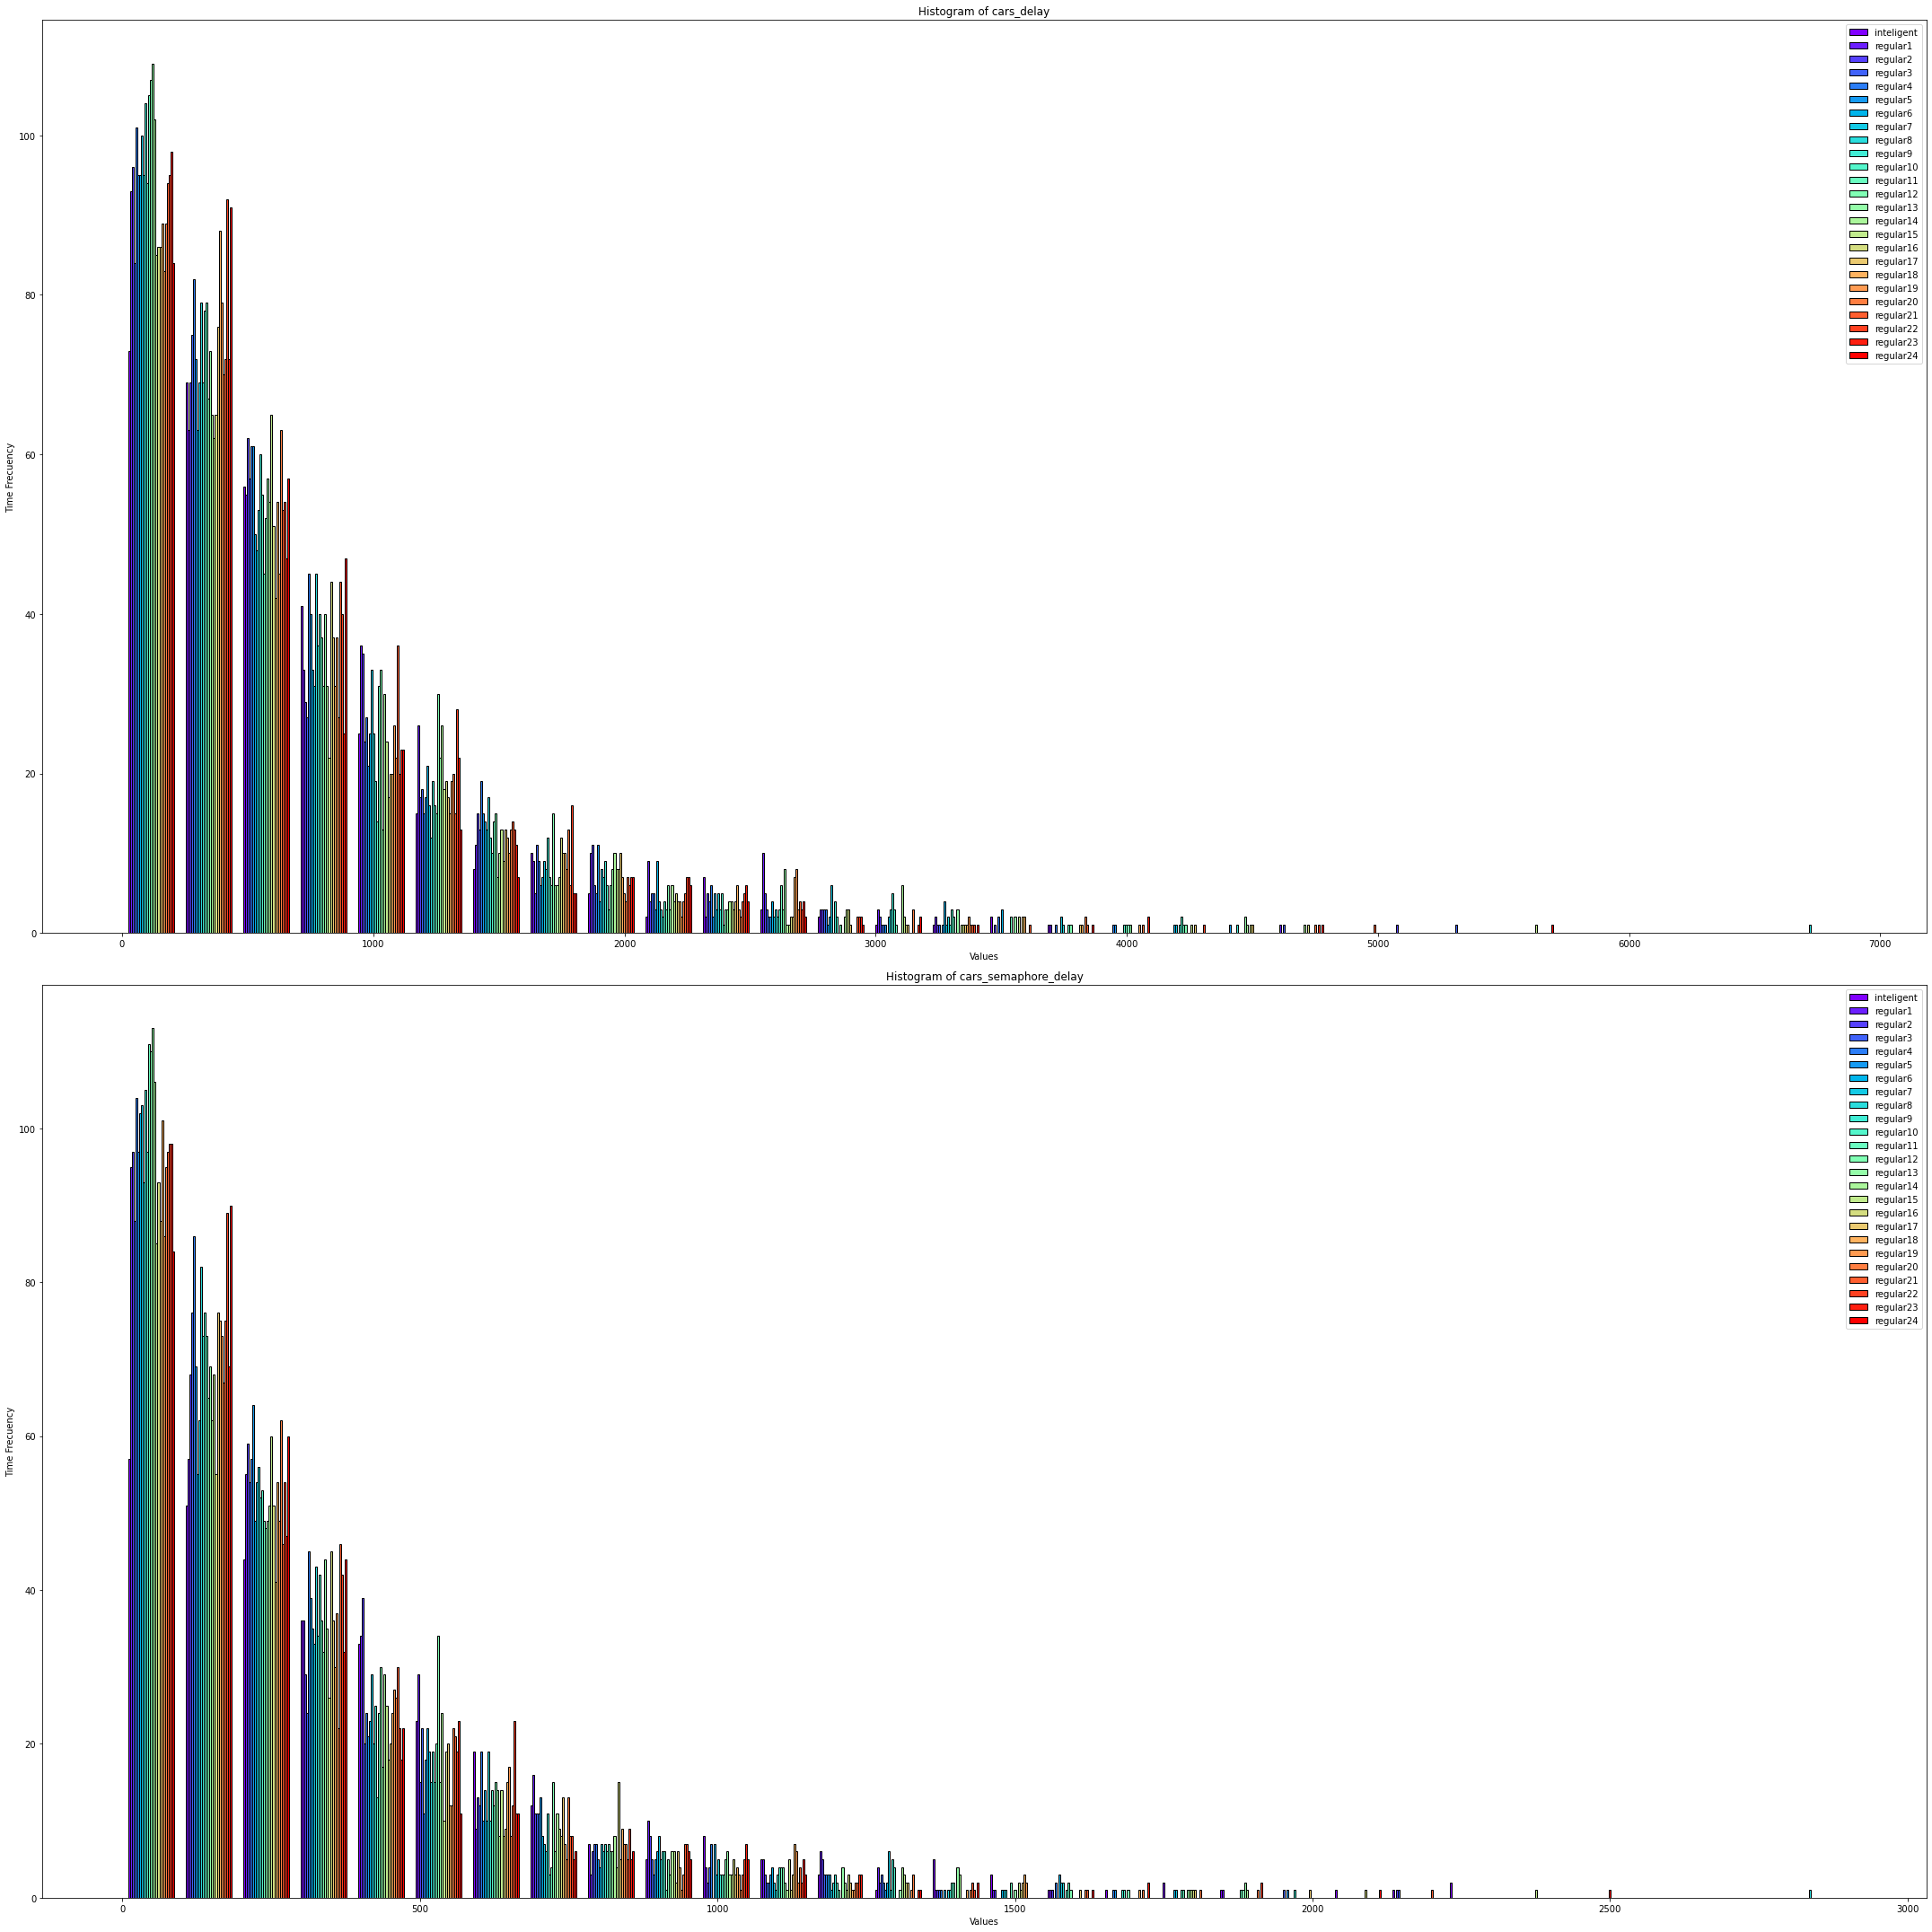

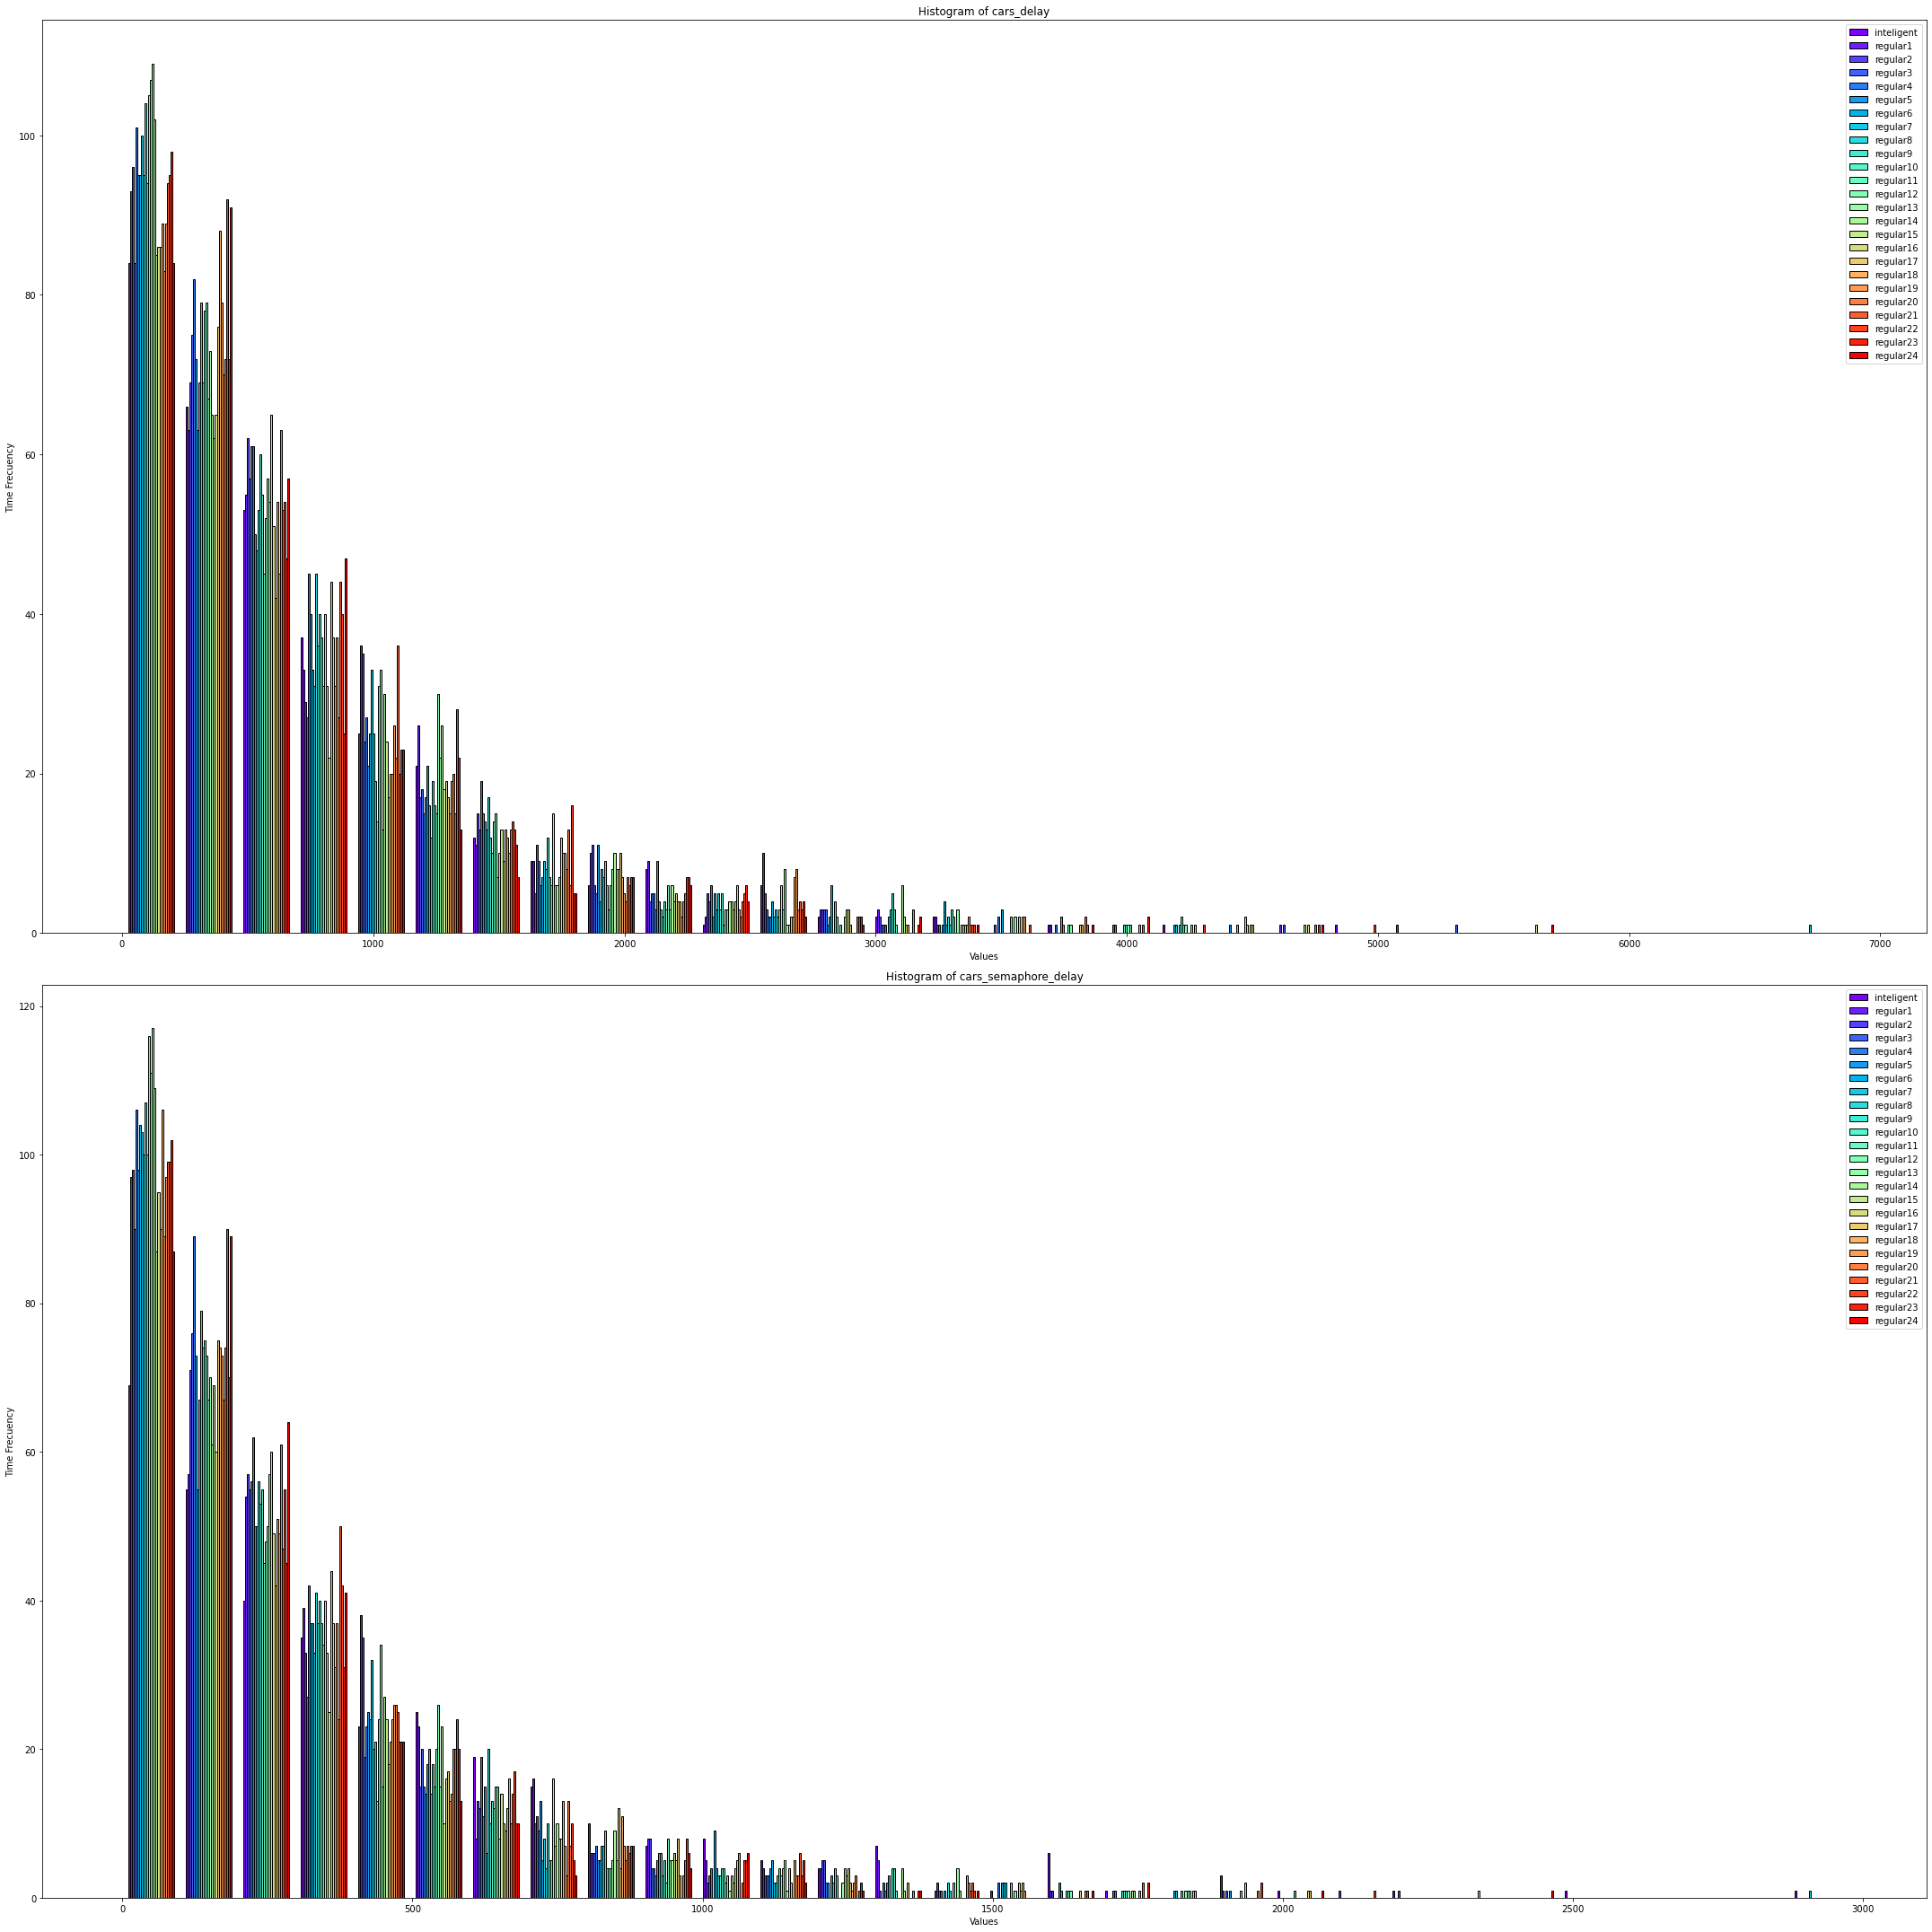

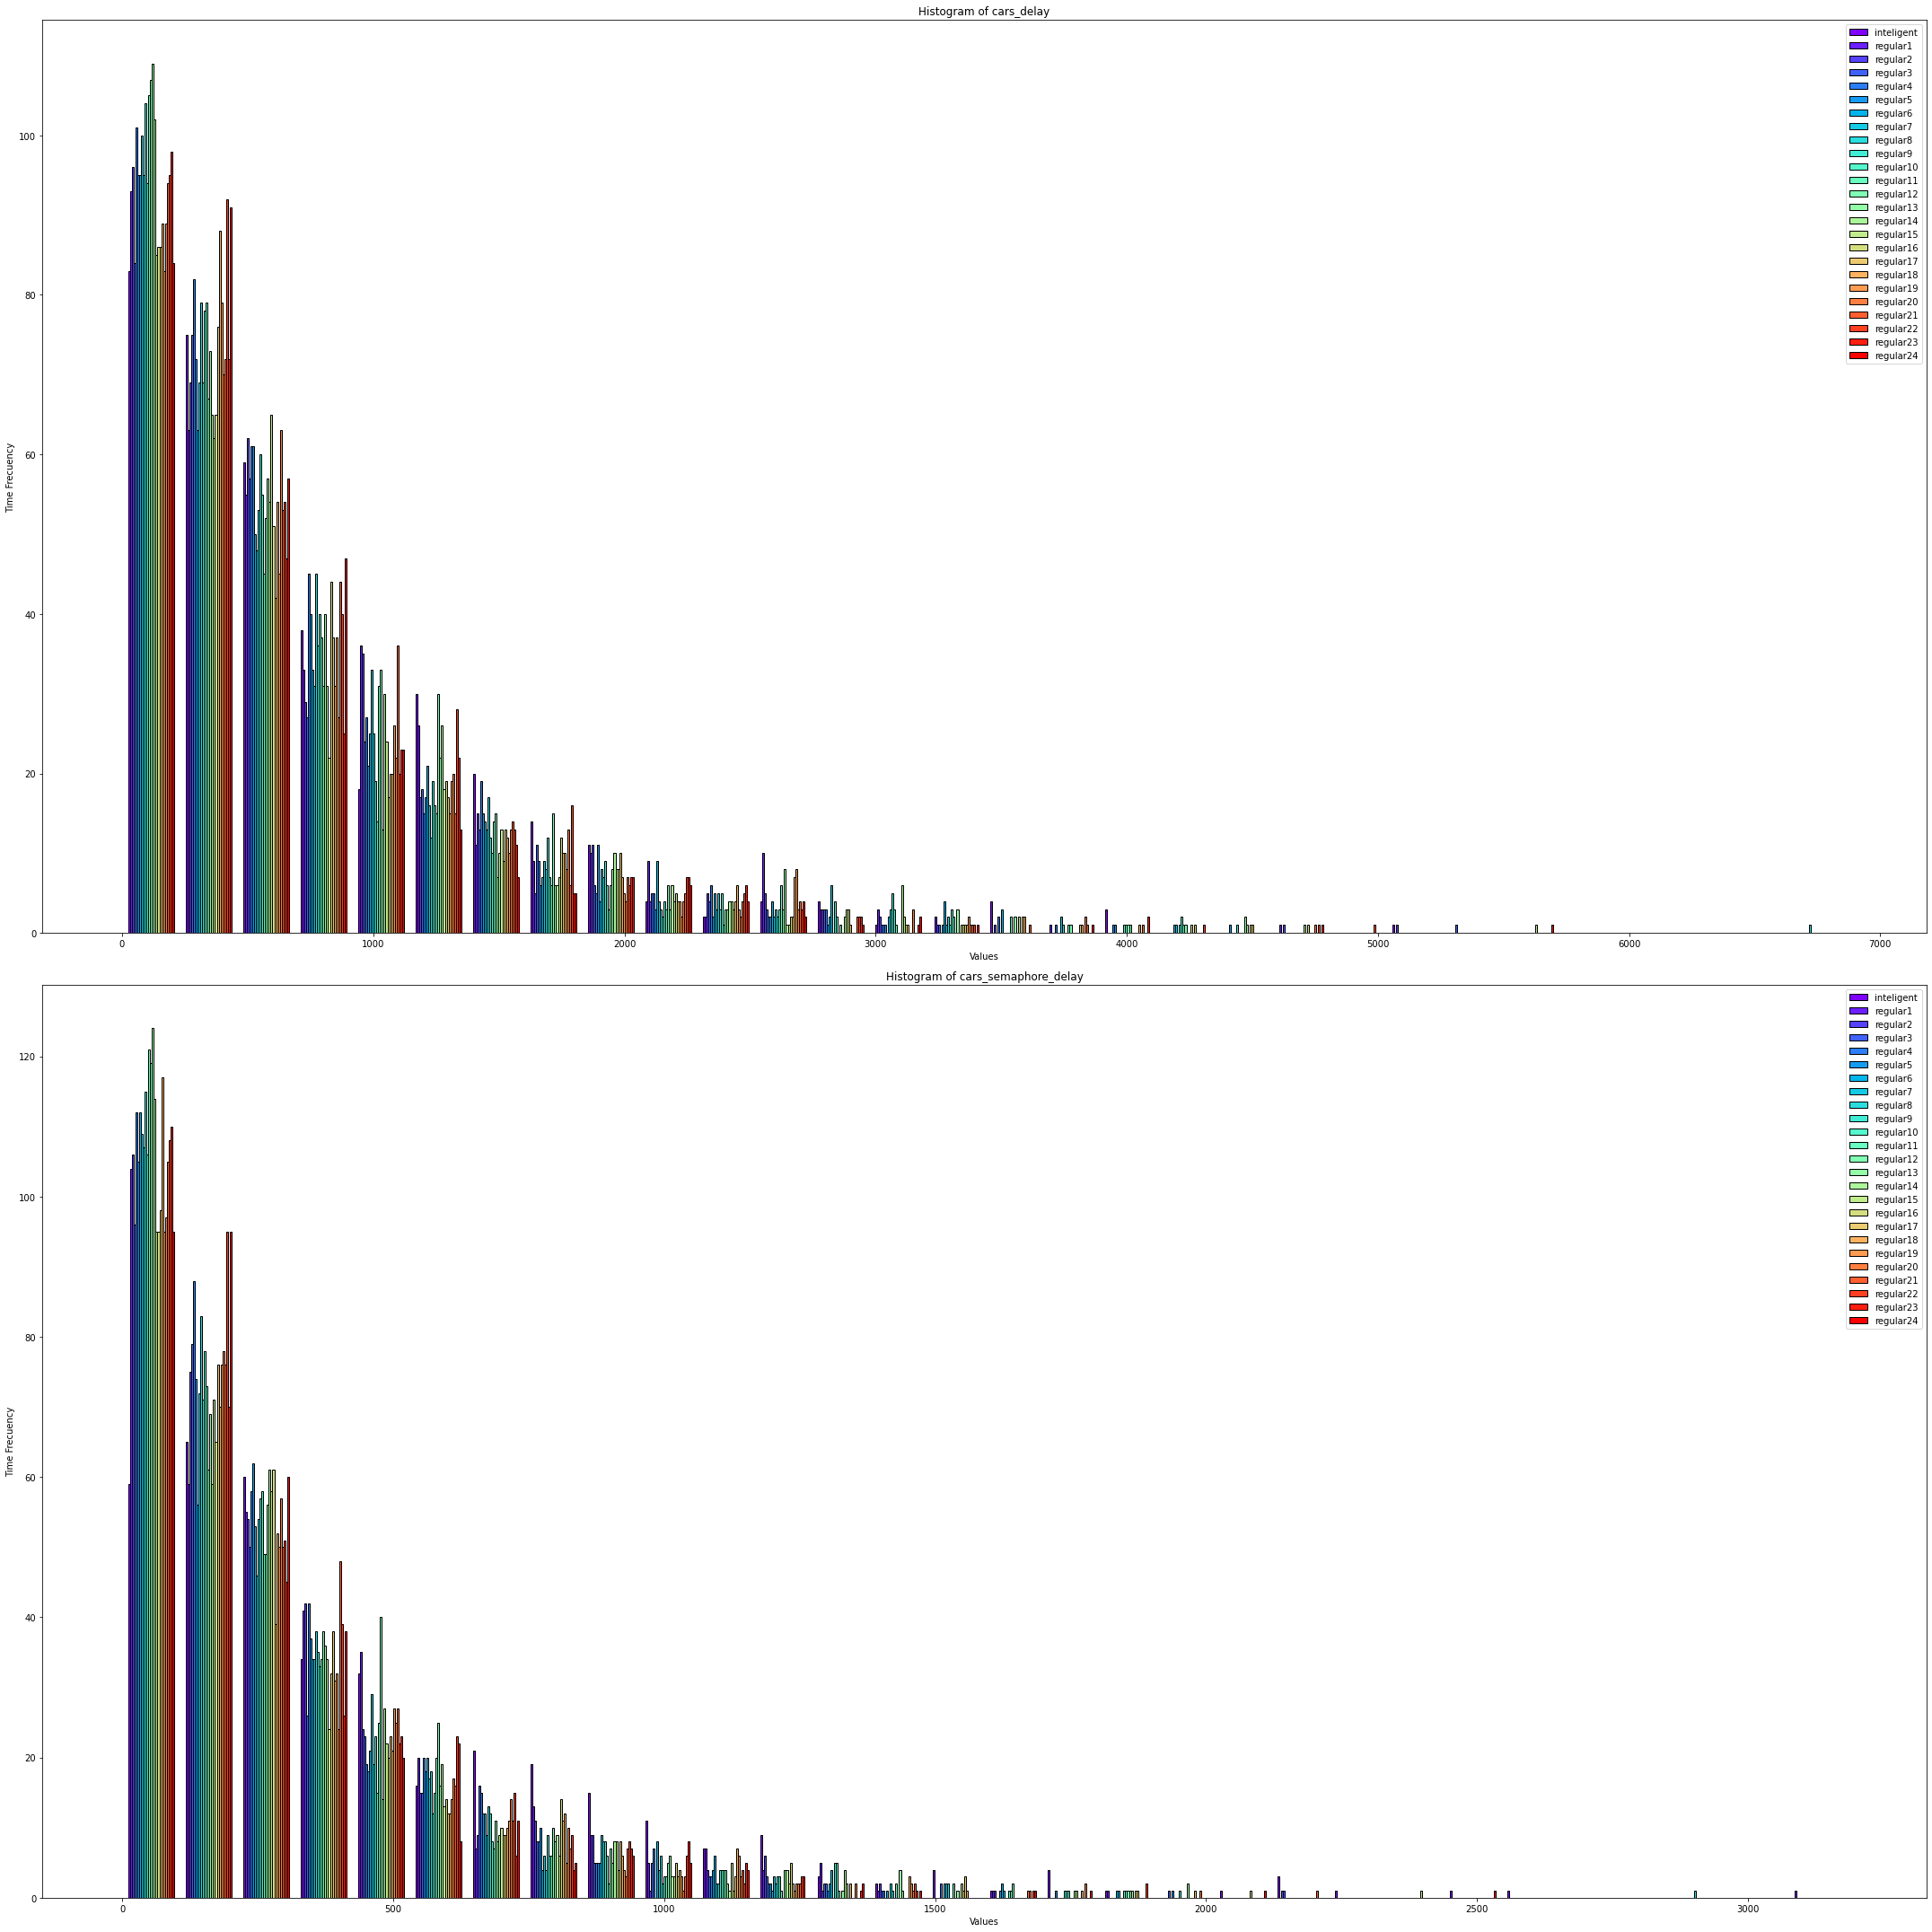

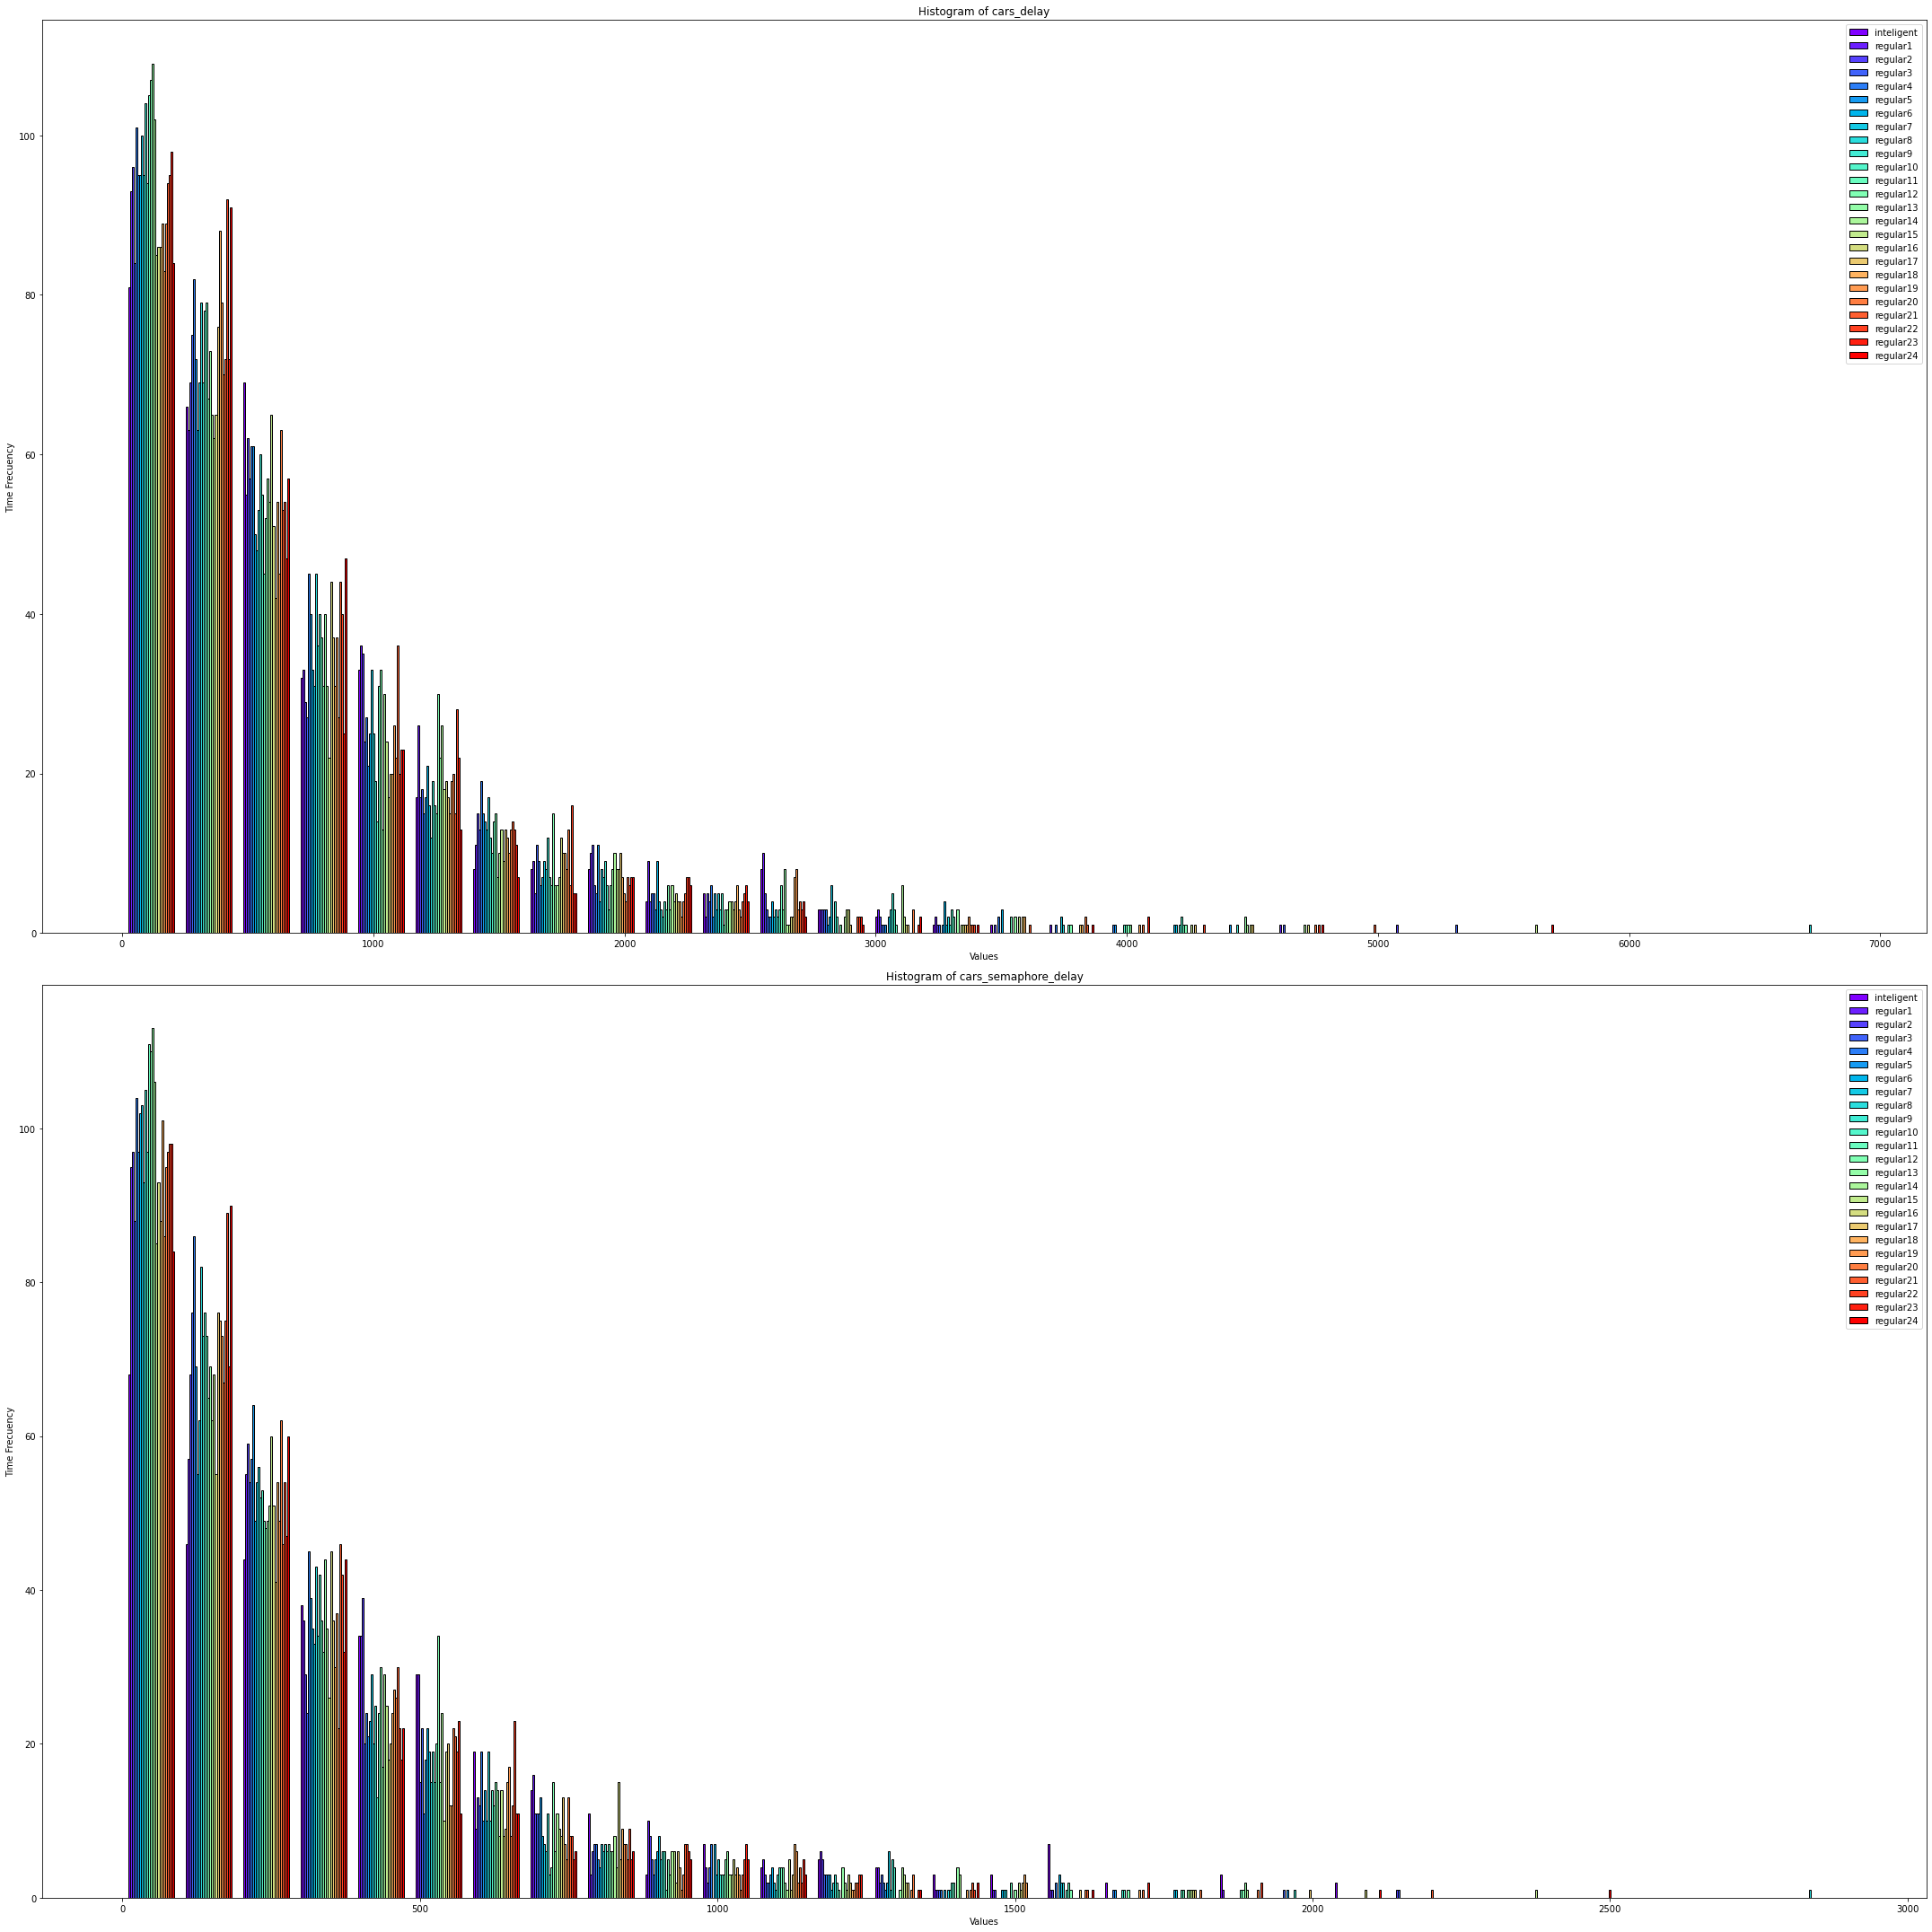

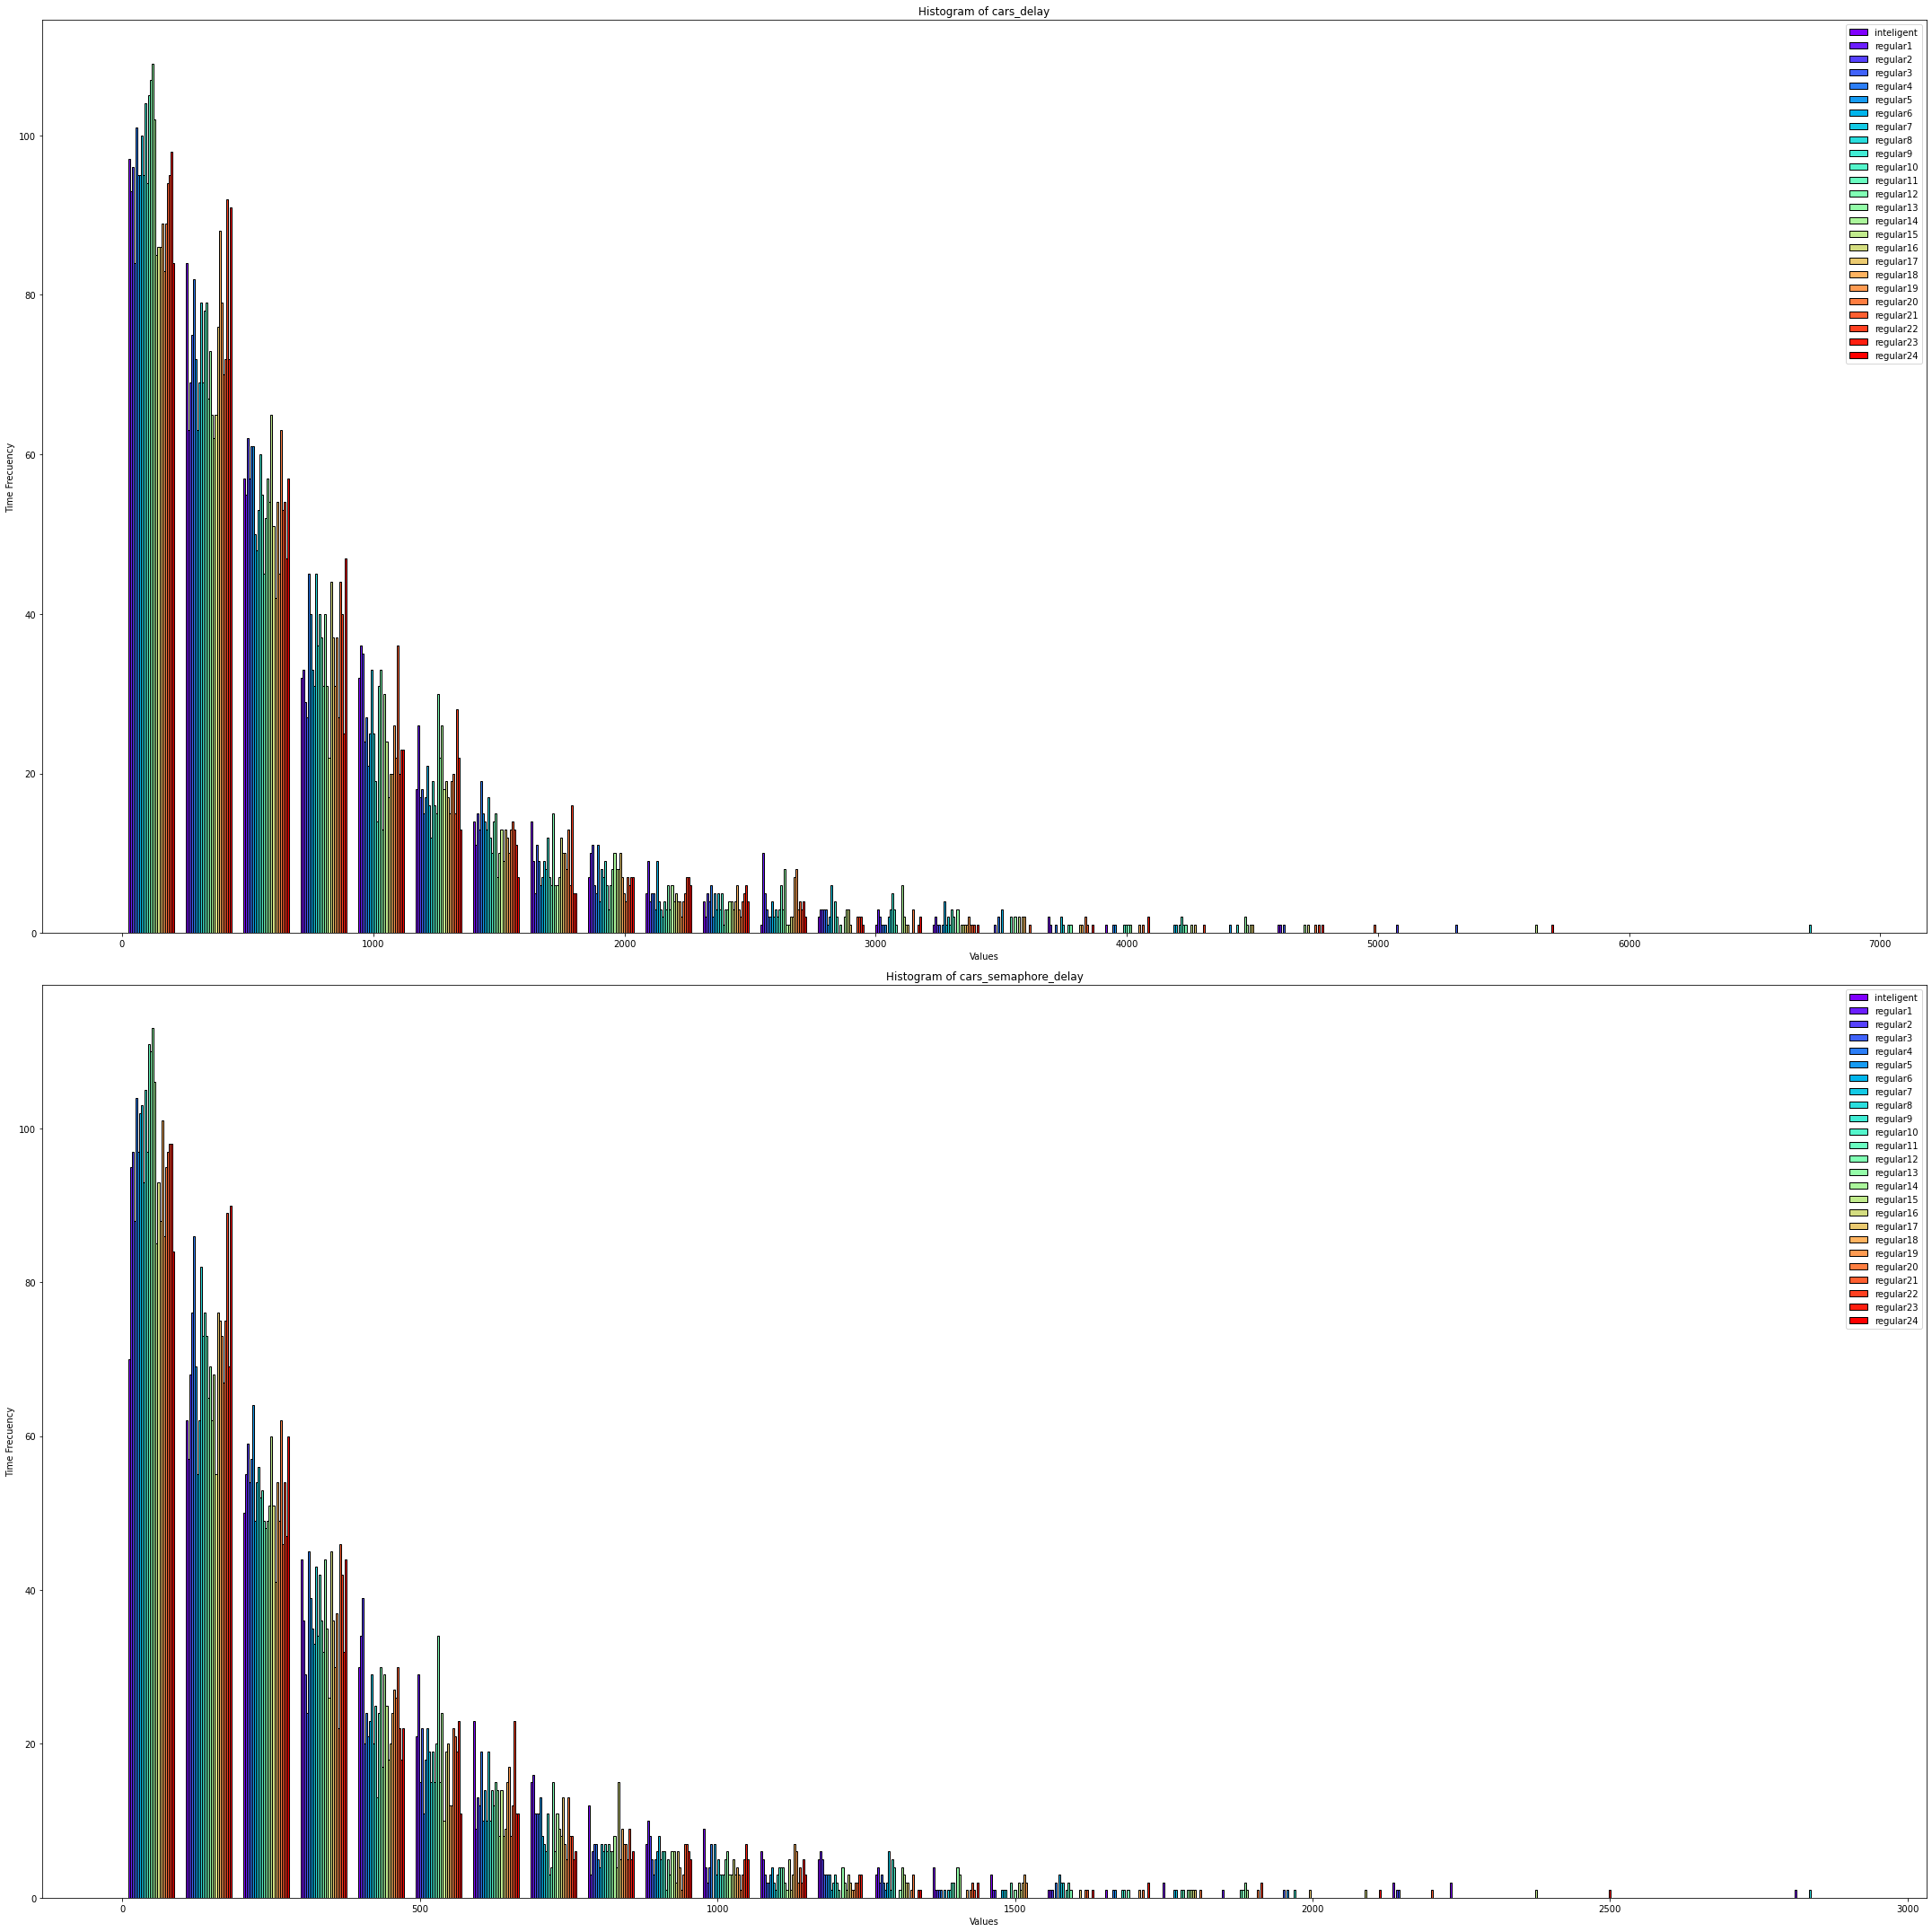

In [7]:
for i in range(len(df_smart)):
    df_cars_smart = df_smart[i][0]
    df_cars_standard = df_standard[i][0]
    columns_to_plot = [col for col in df_cars.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(30, 30))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df_standard) + 1))
    leyends = ["inteligent"]
    for j in range(len(df_standard)):
        leyends.append("regular{}".format(j + 1))
    for index, col in enumerate(columns_to_plot):
        plots = [df_cars_smart[col]]
        for j in df_standard:
            plots.append(j[0][col])
        axes[index].hist(plots, bins=30, color=colors, edgecolor='black')
        axes[index].set_title(f'Histogram of {col}')
        axes[index].legend(leyends)
        axes[index].set_xlabel('Values')
        axes[index].set_ylabel('Time Frecuency')
        plt.savefig("./images/hist_cars_{}.png".format(i))

    plt.tight_layout()
    plt.show()

plt.show()

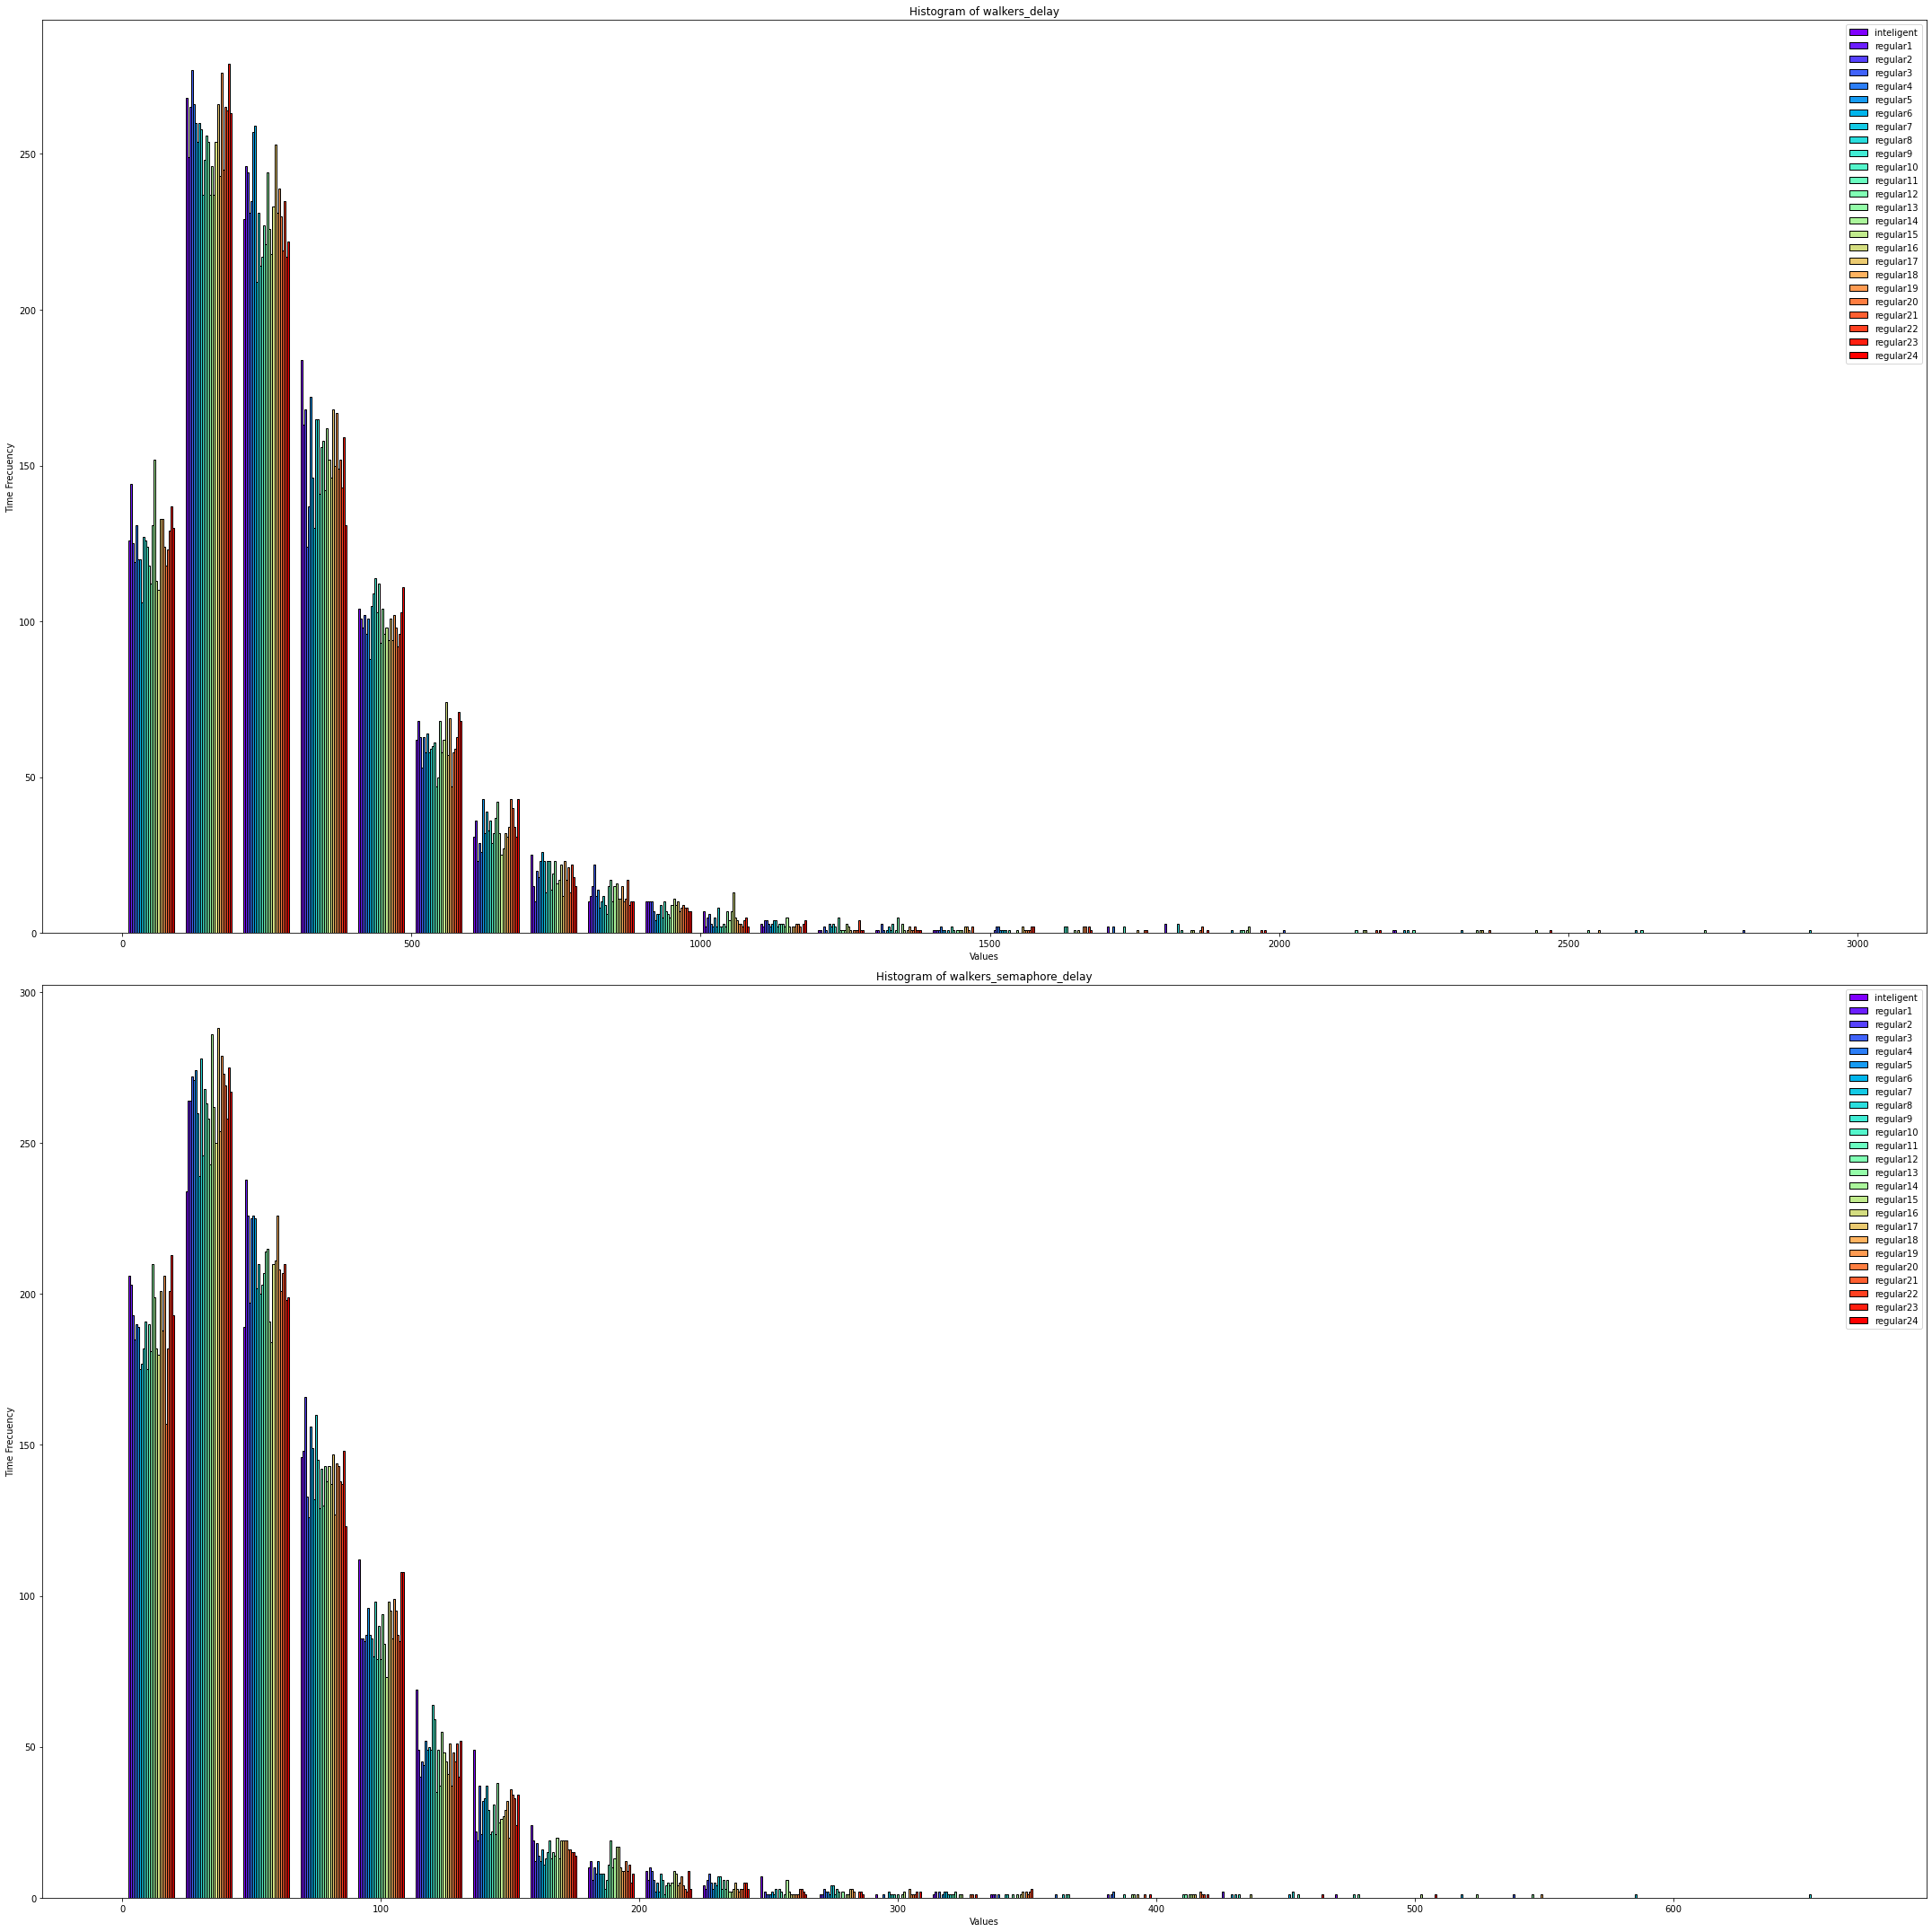

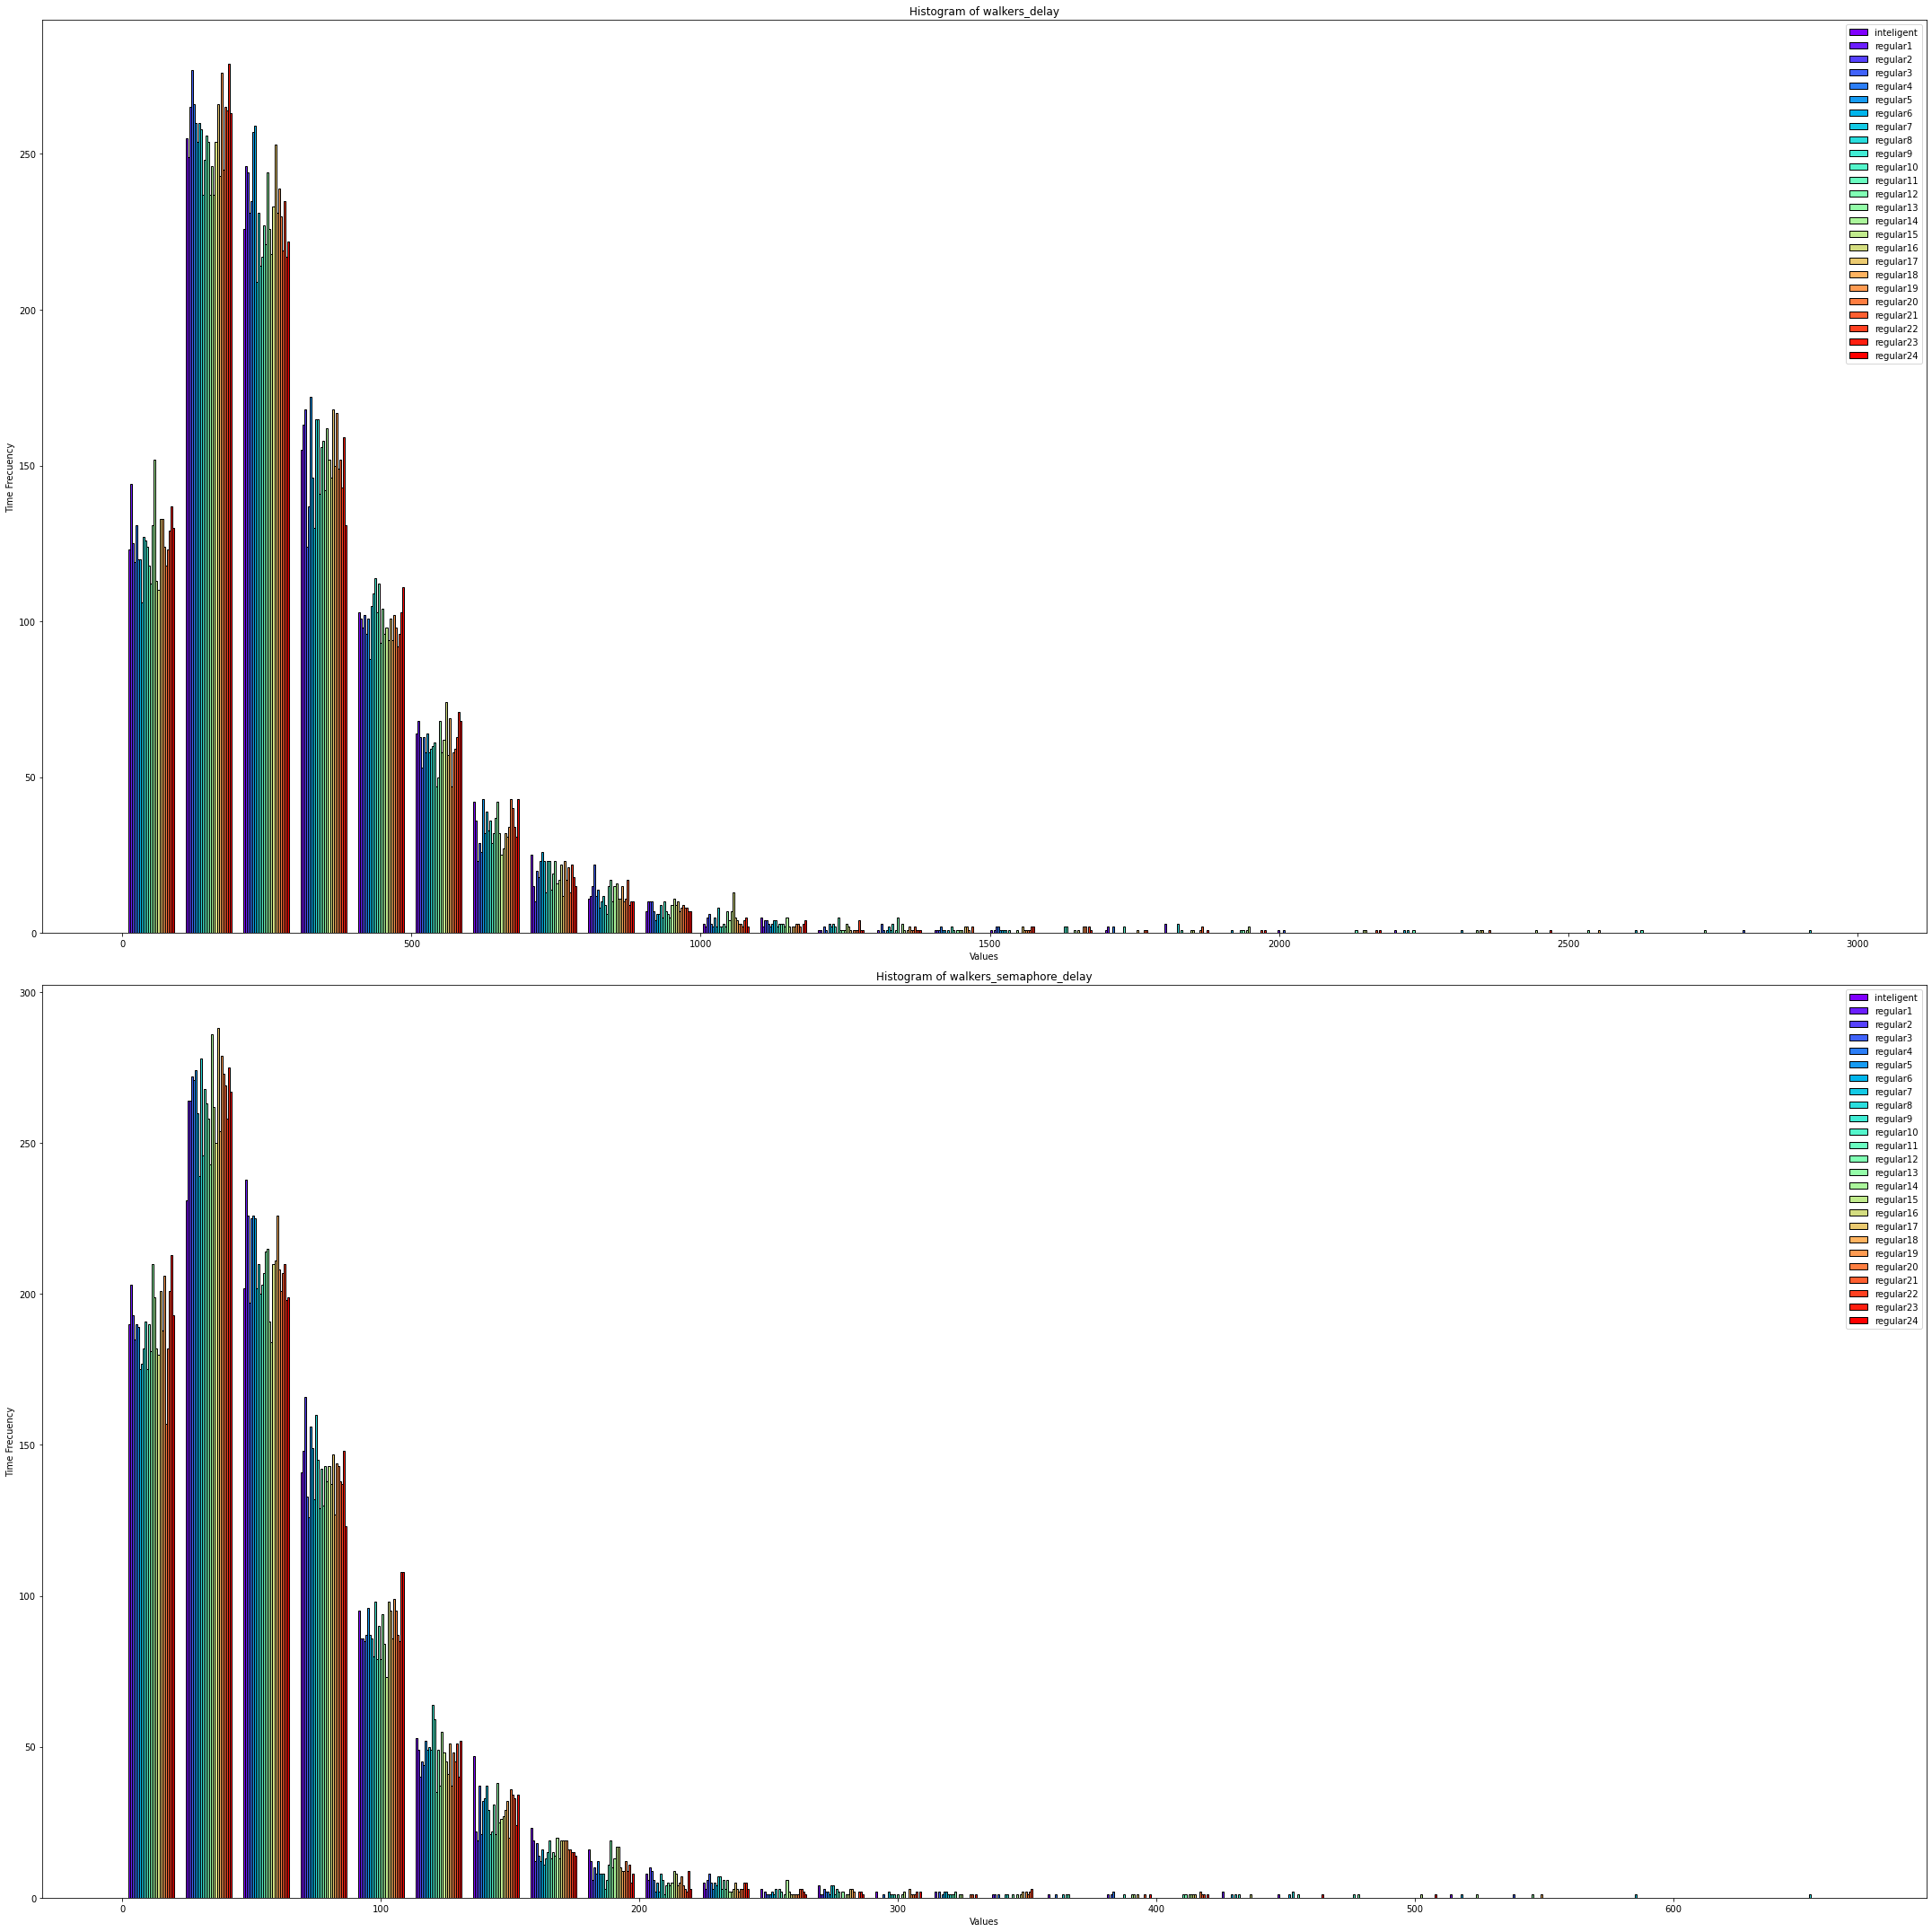

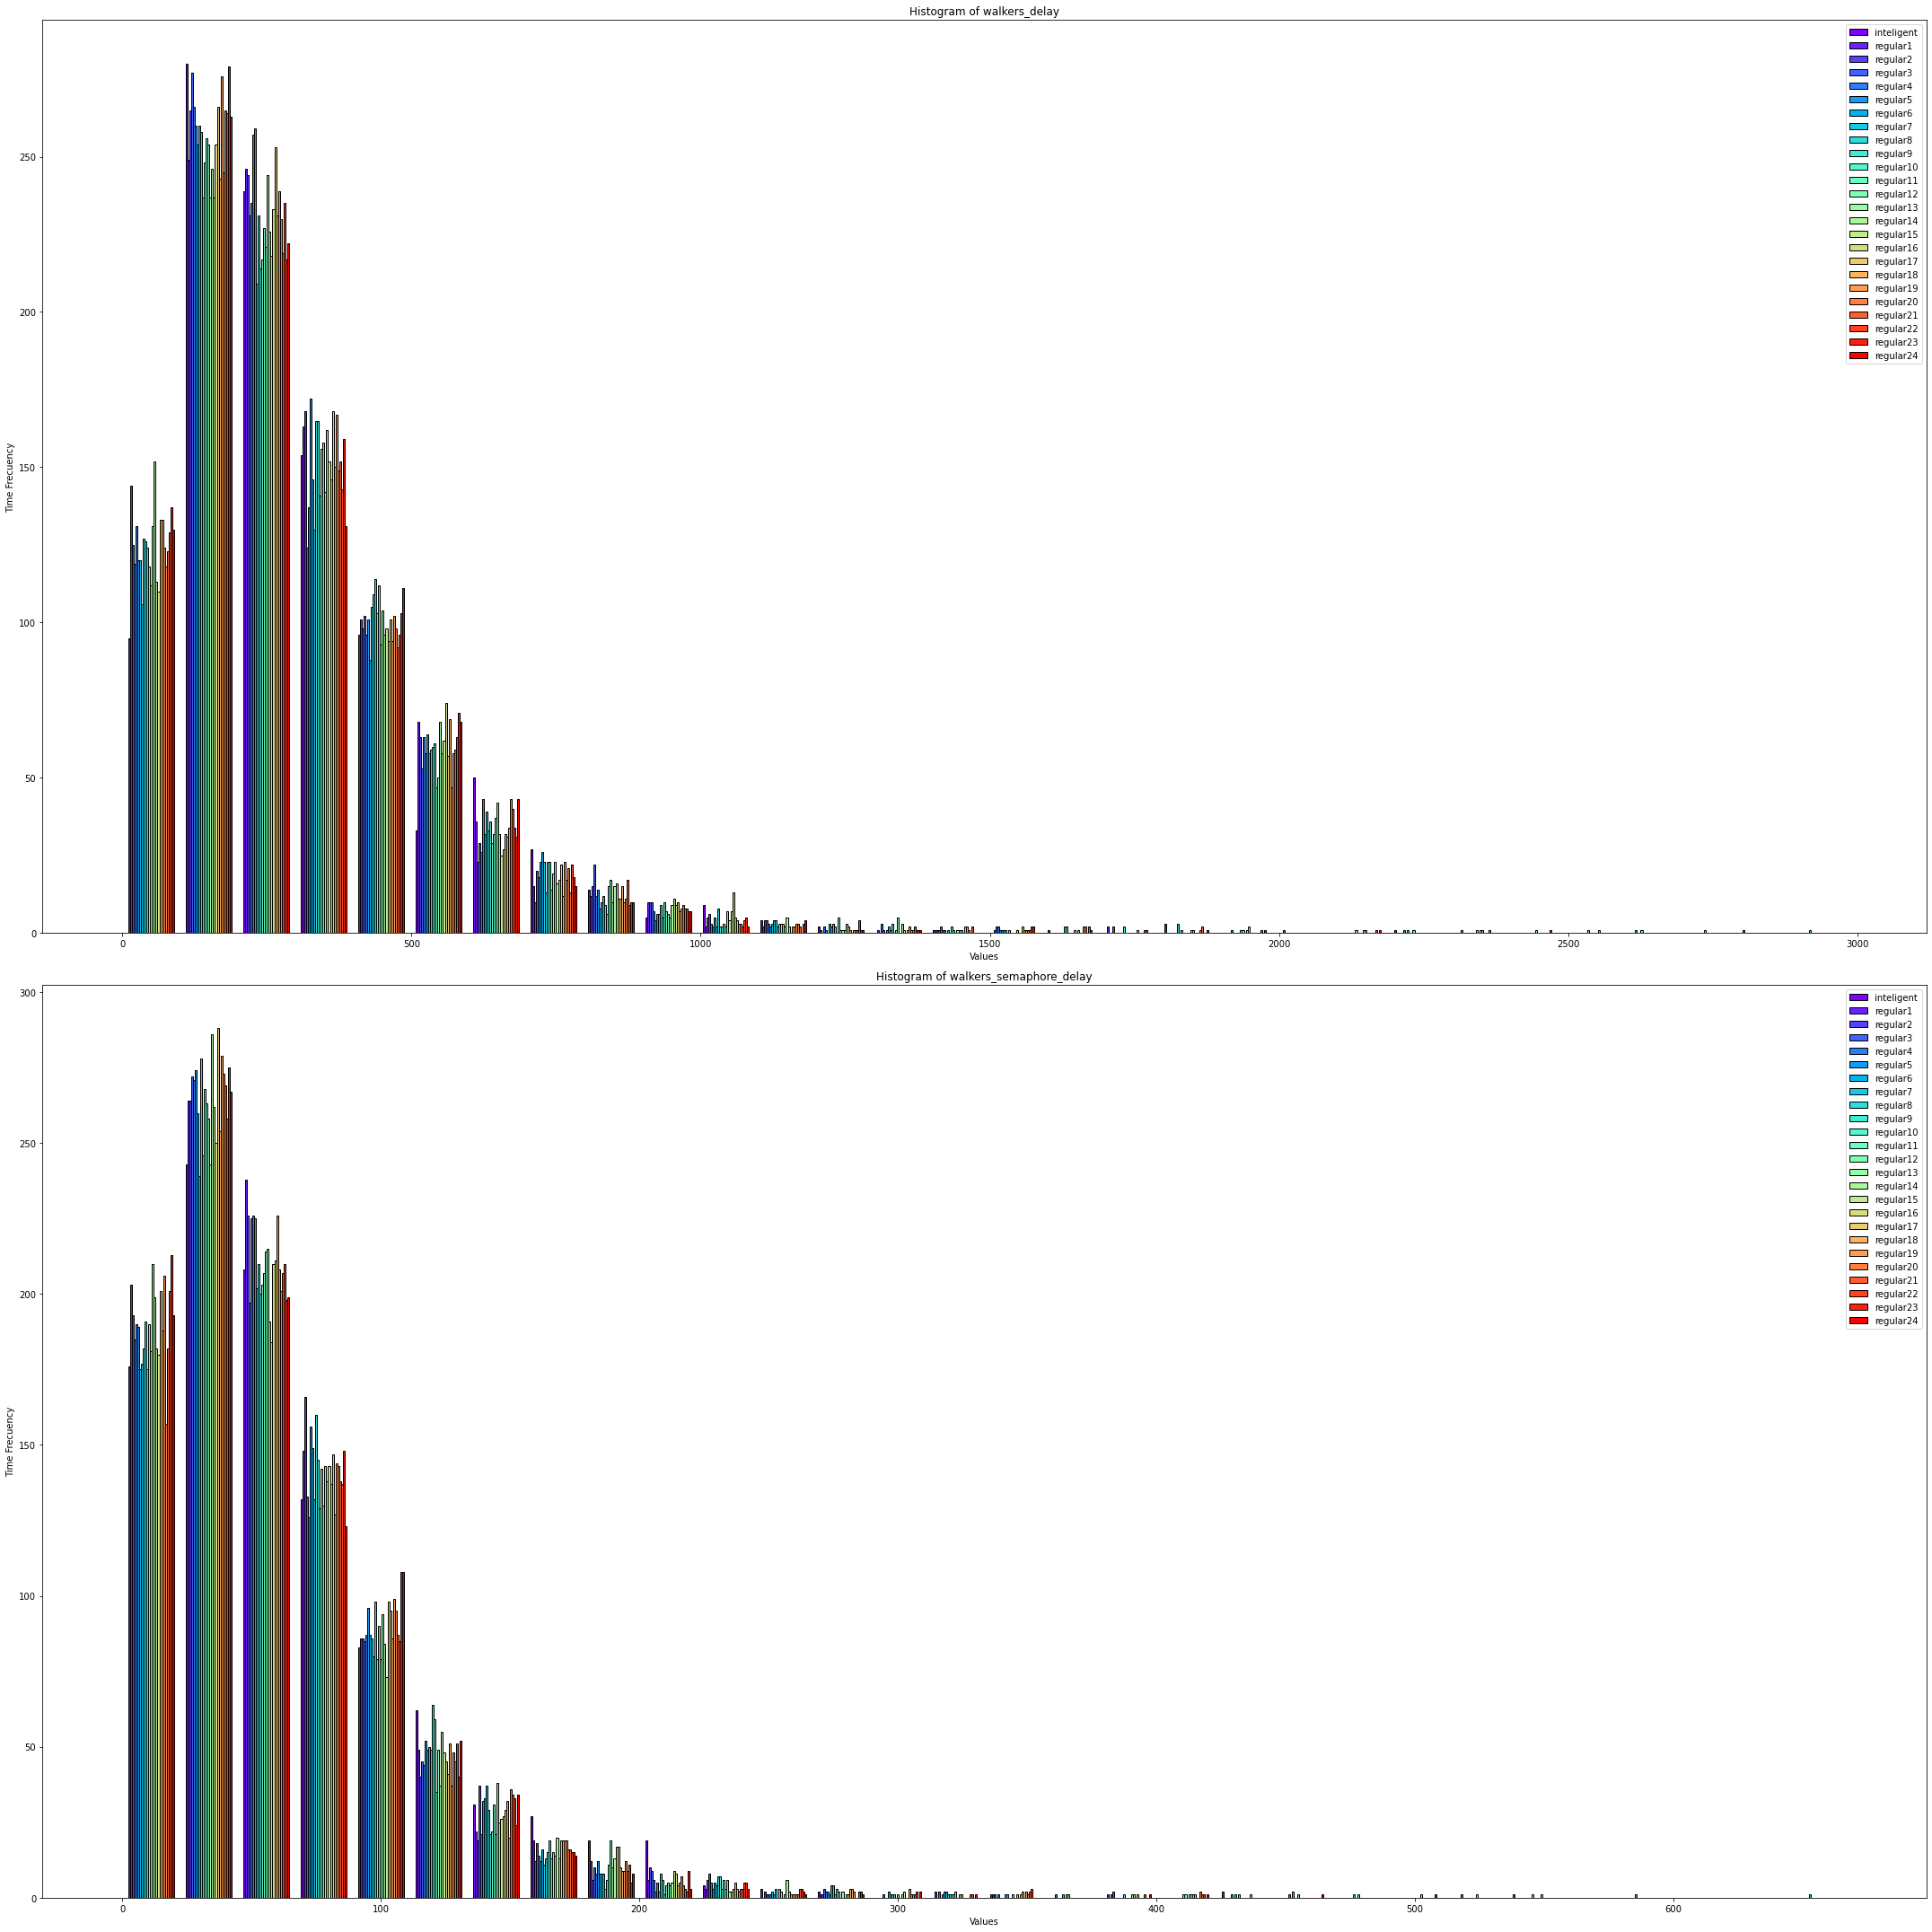

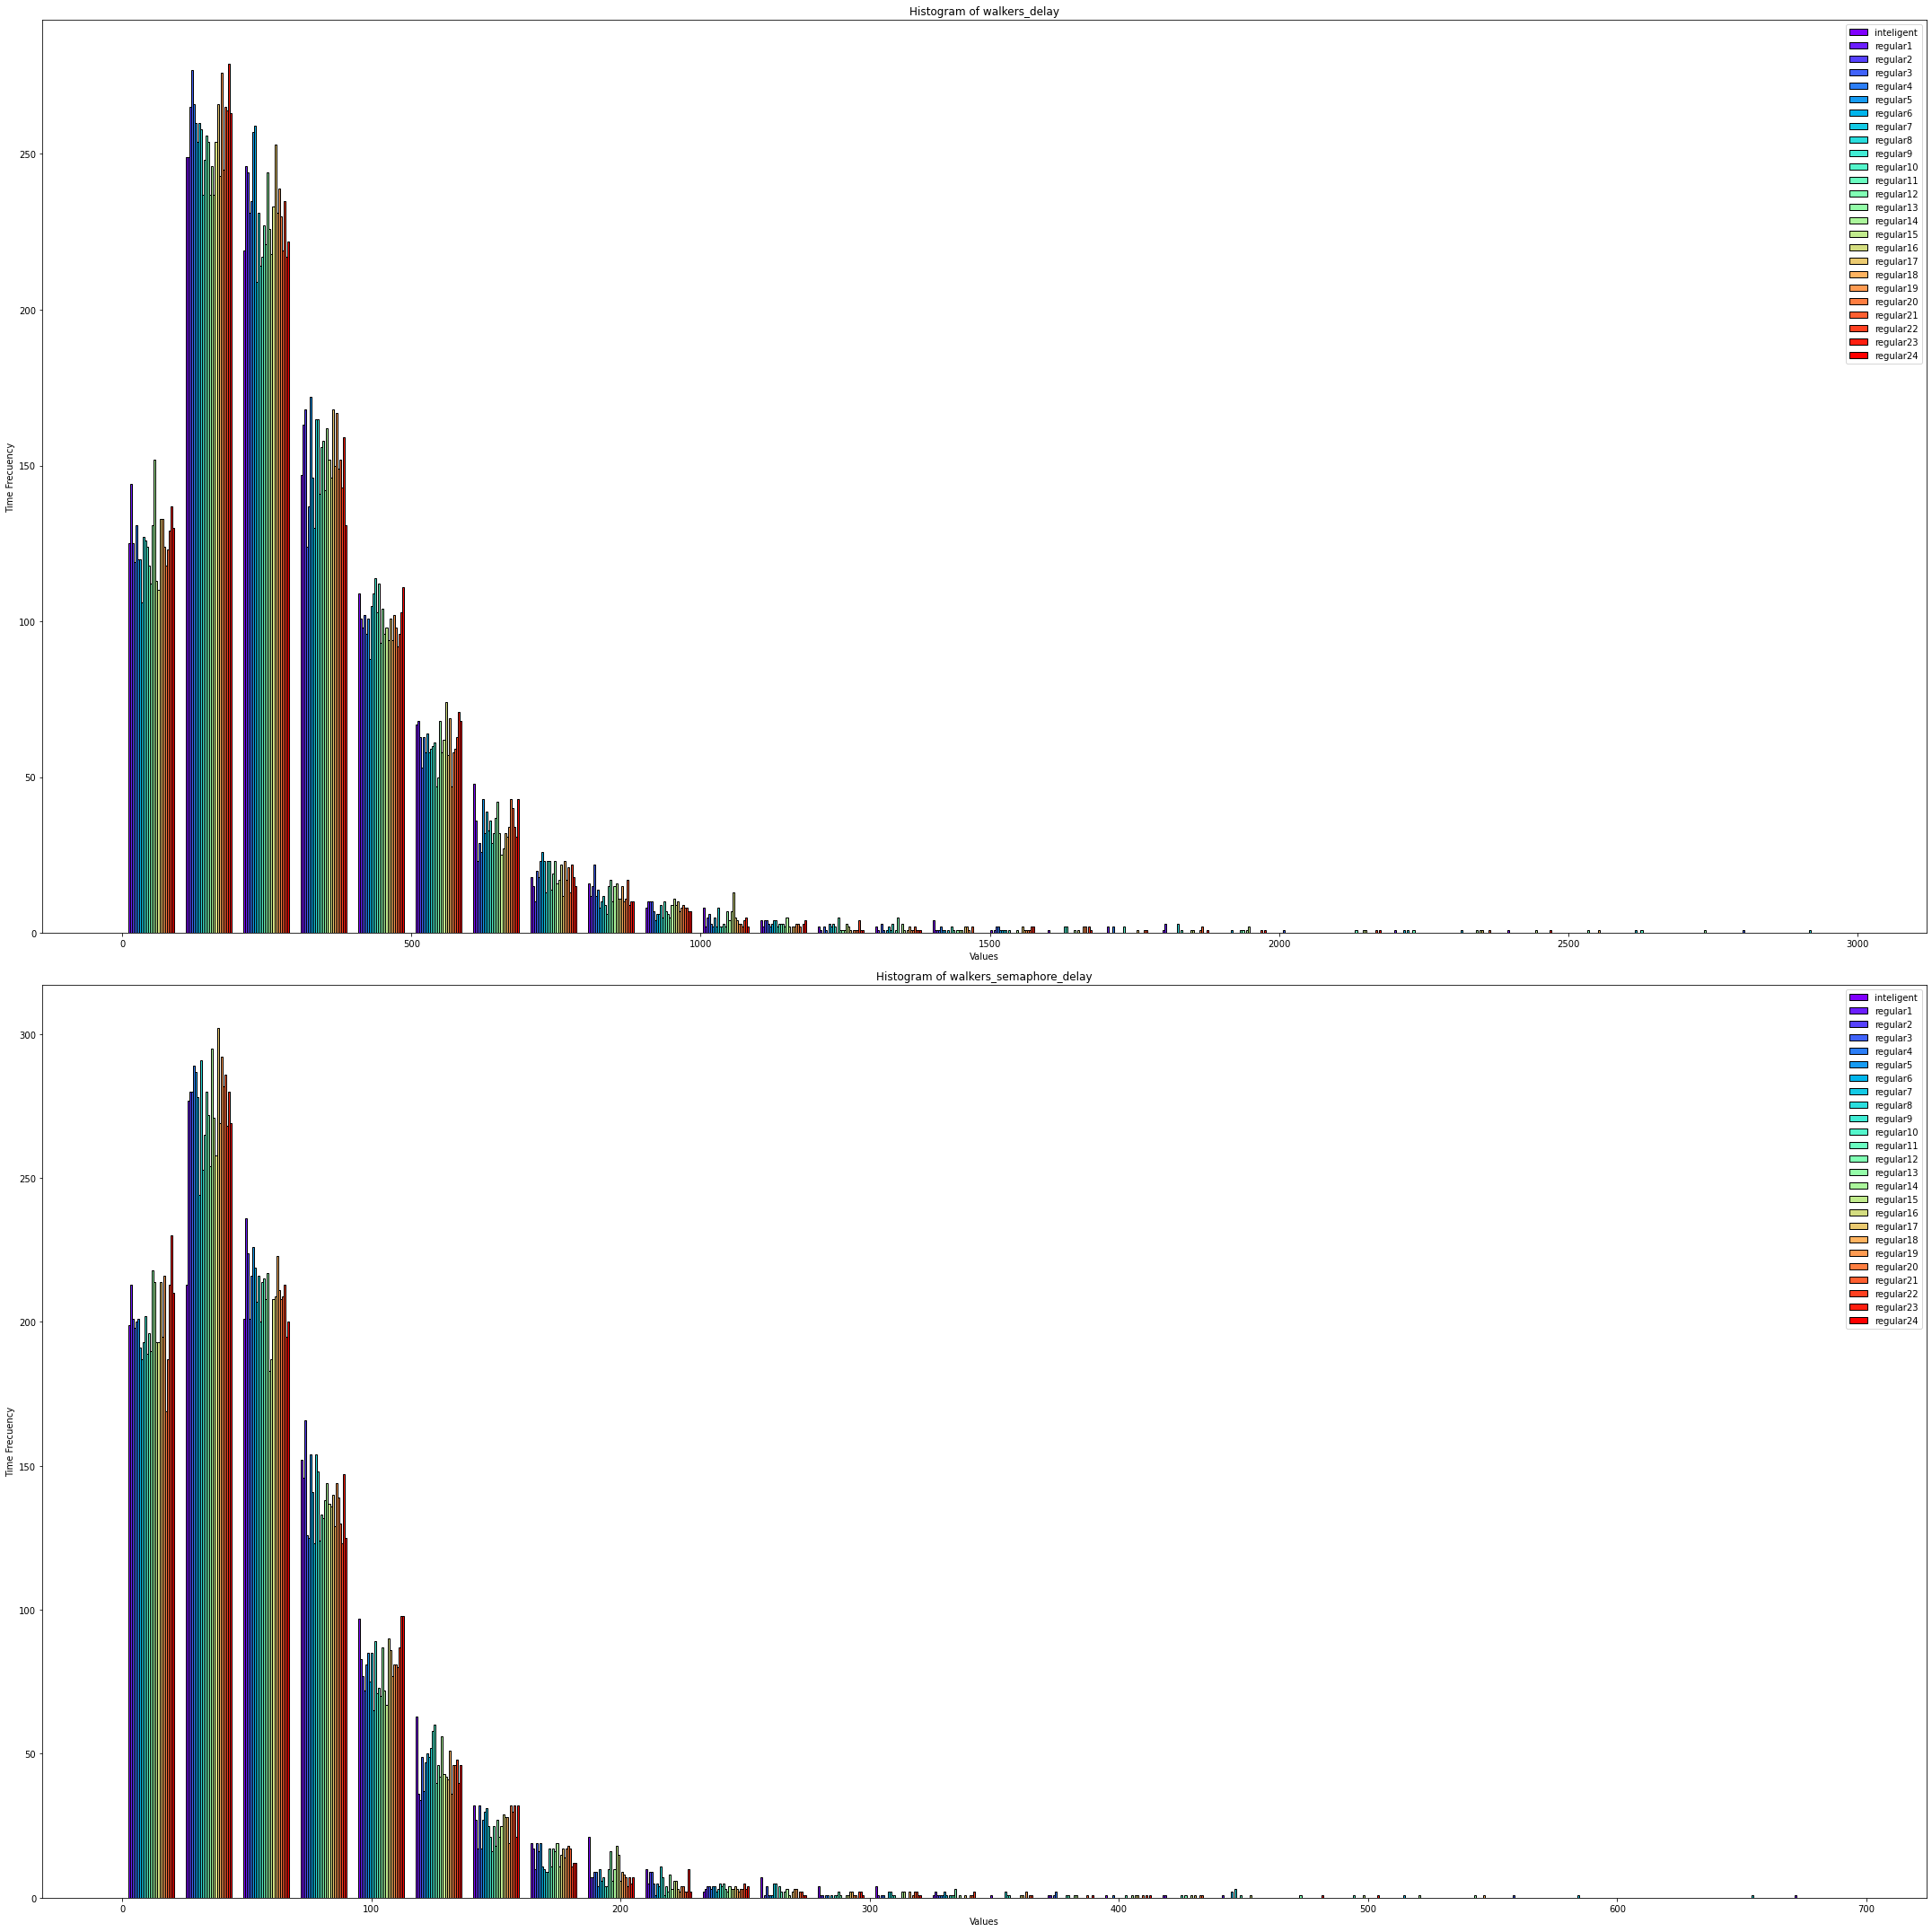

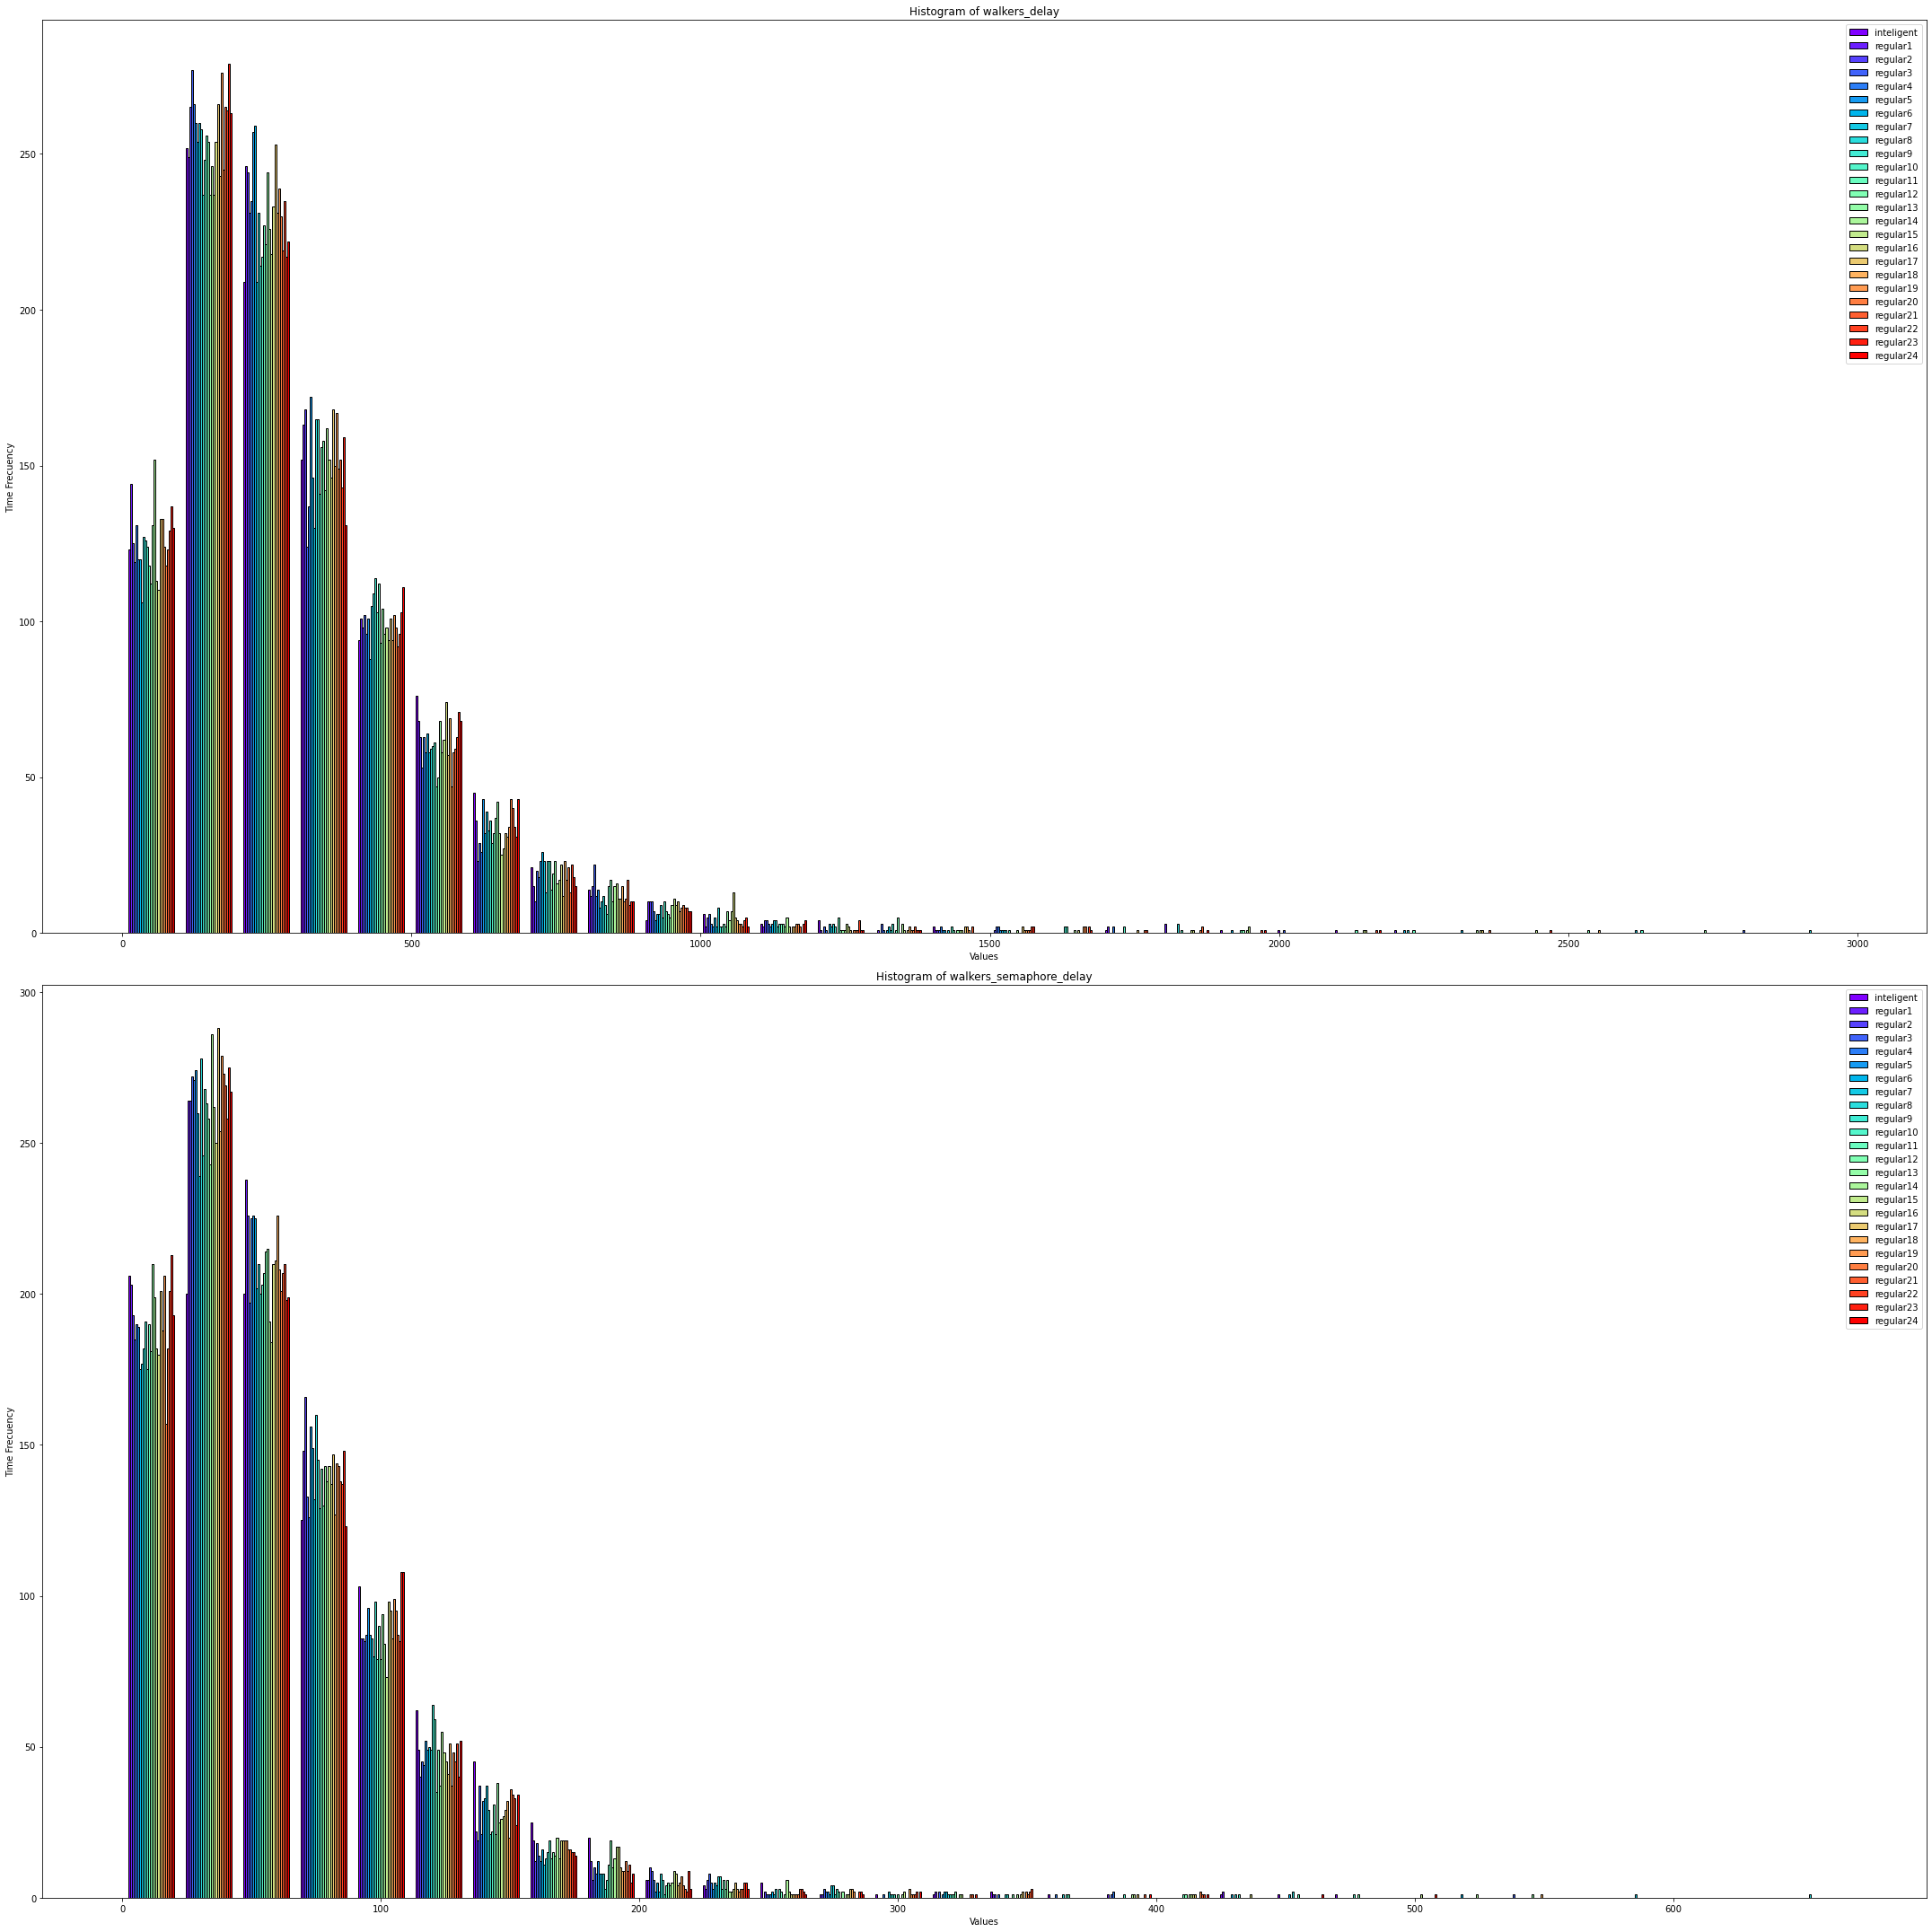

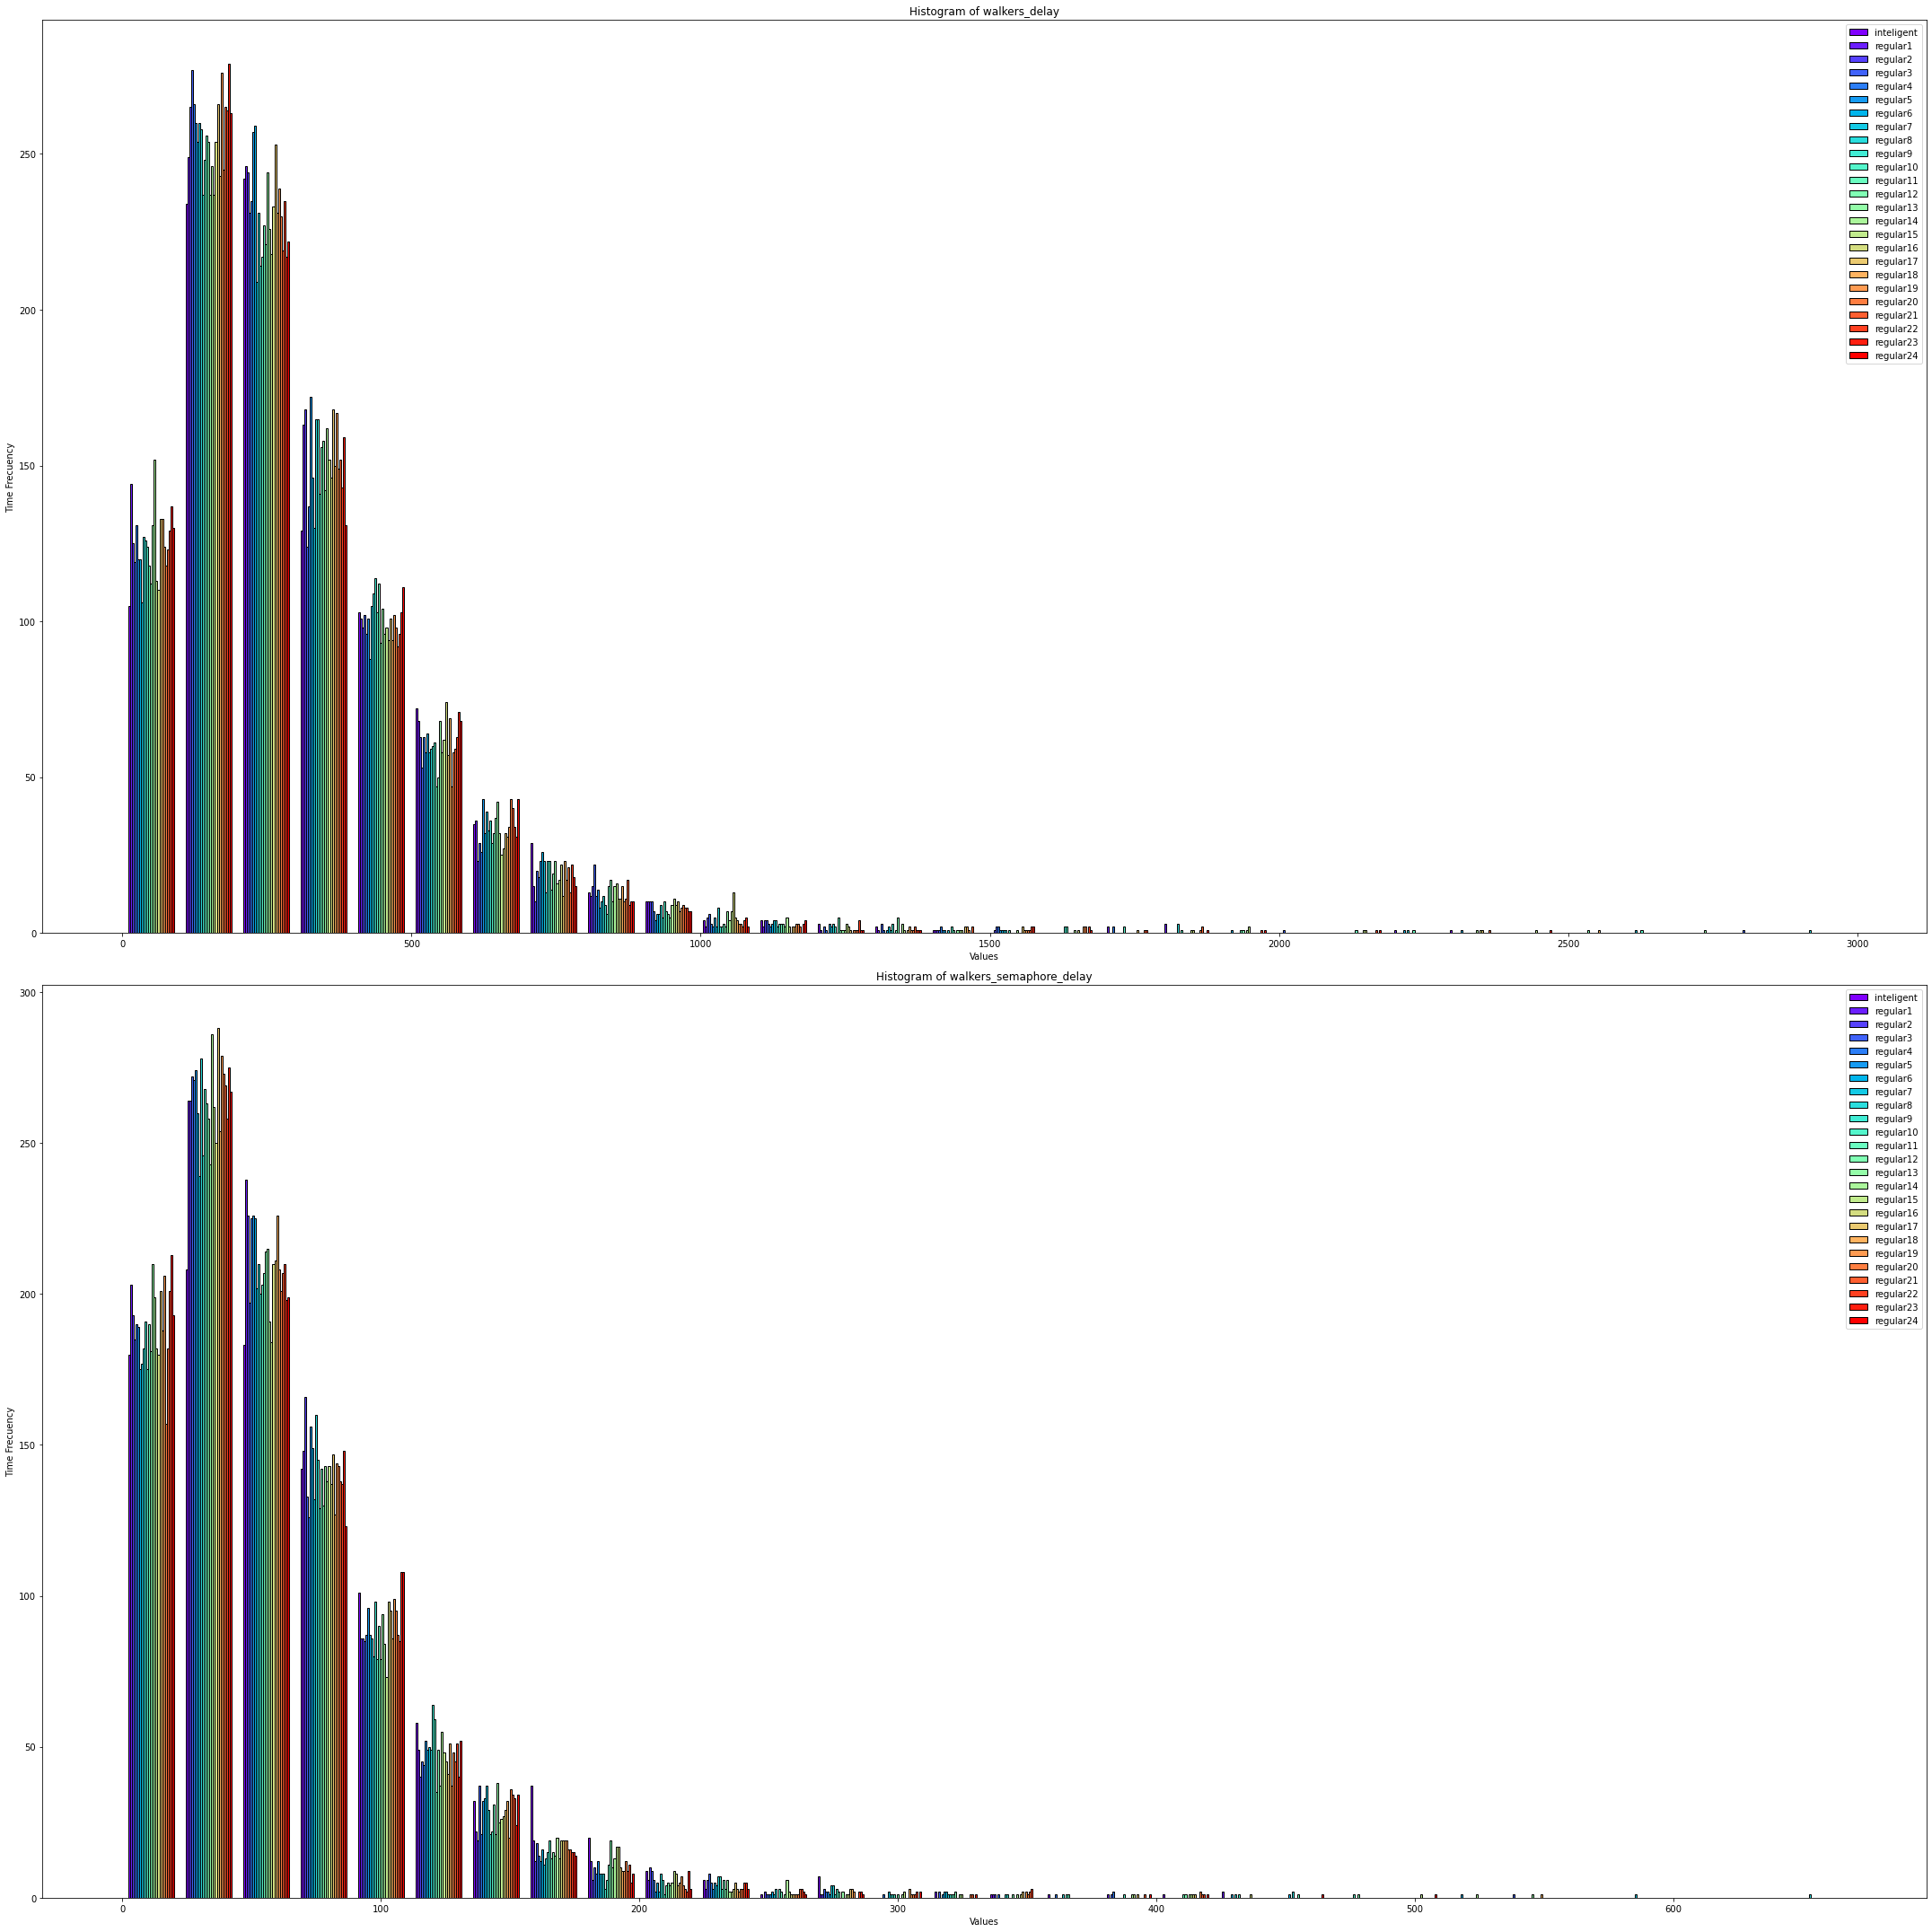

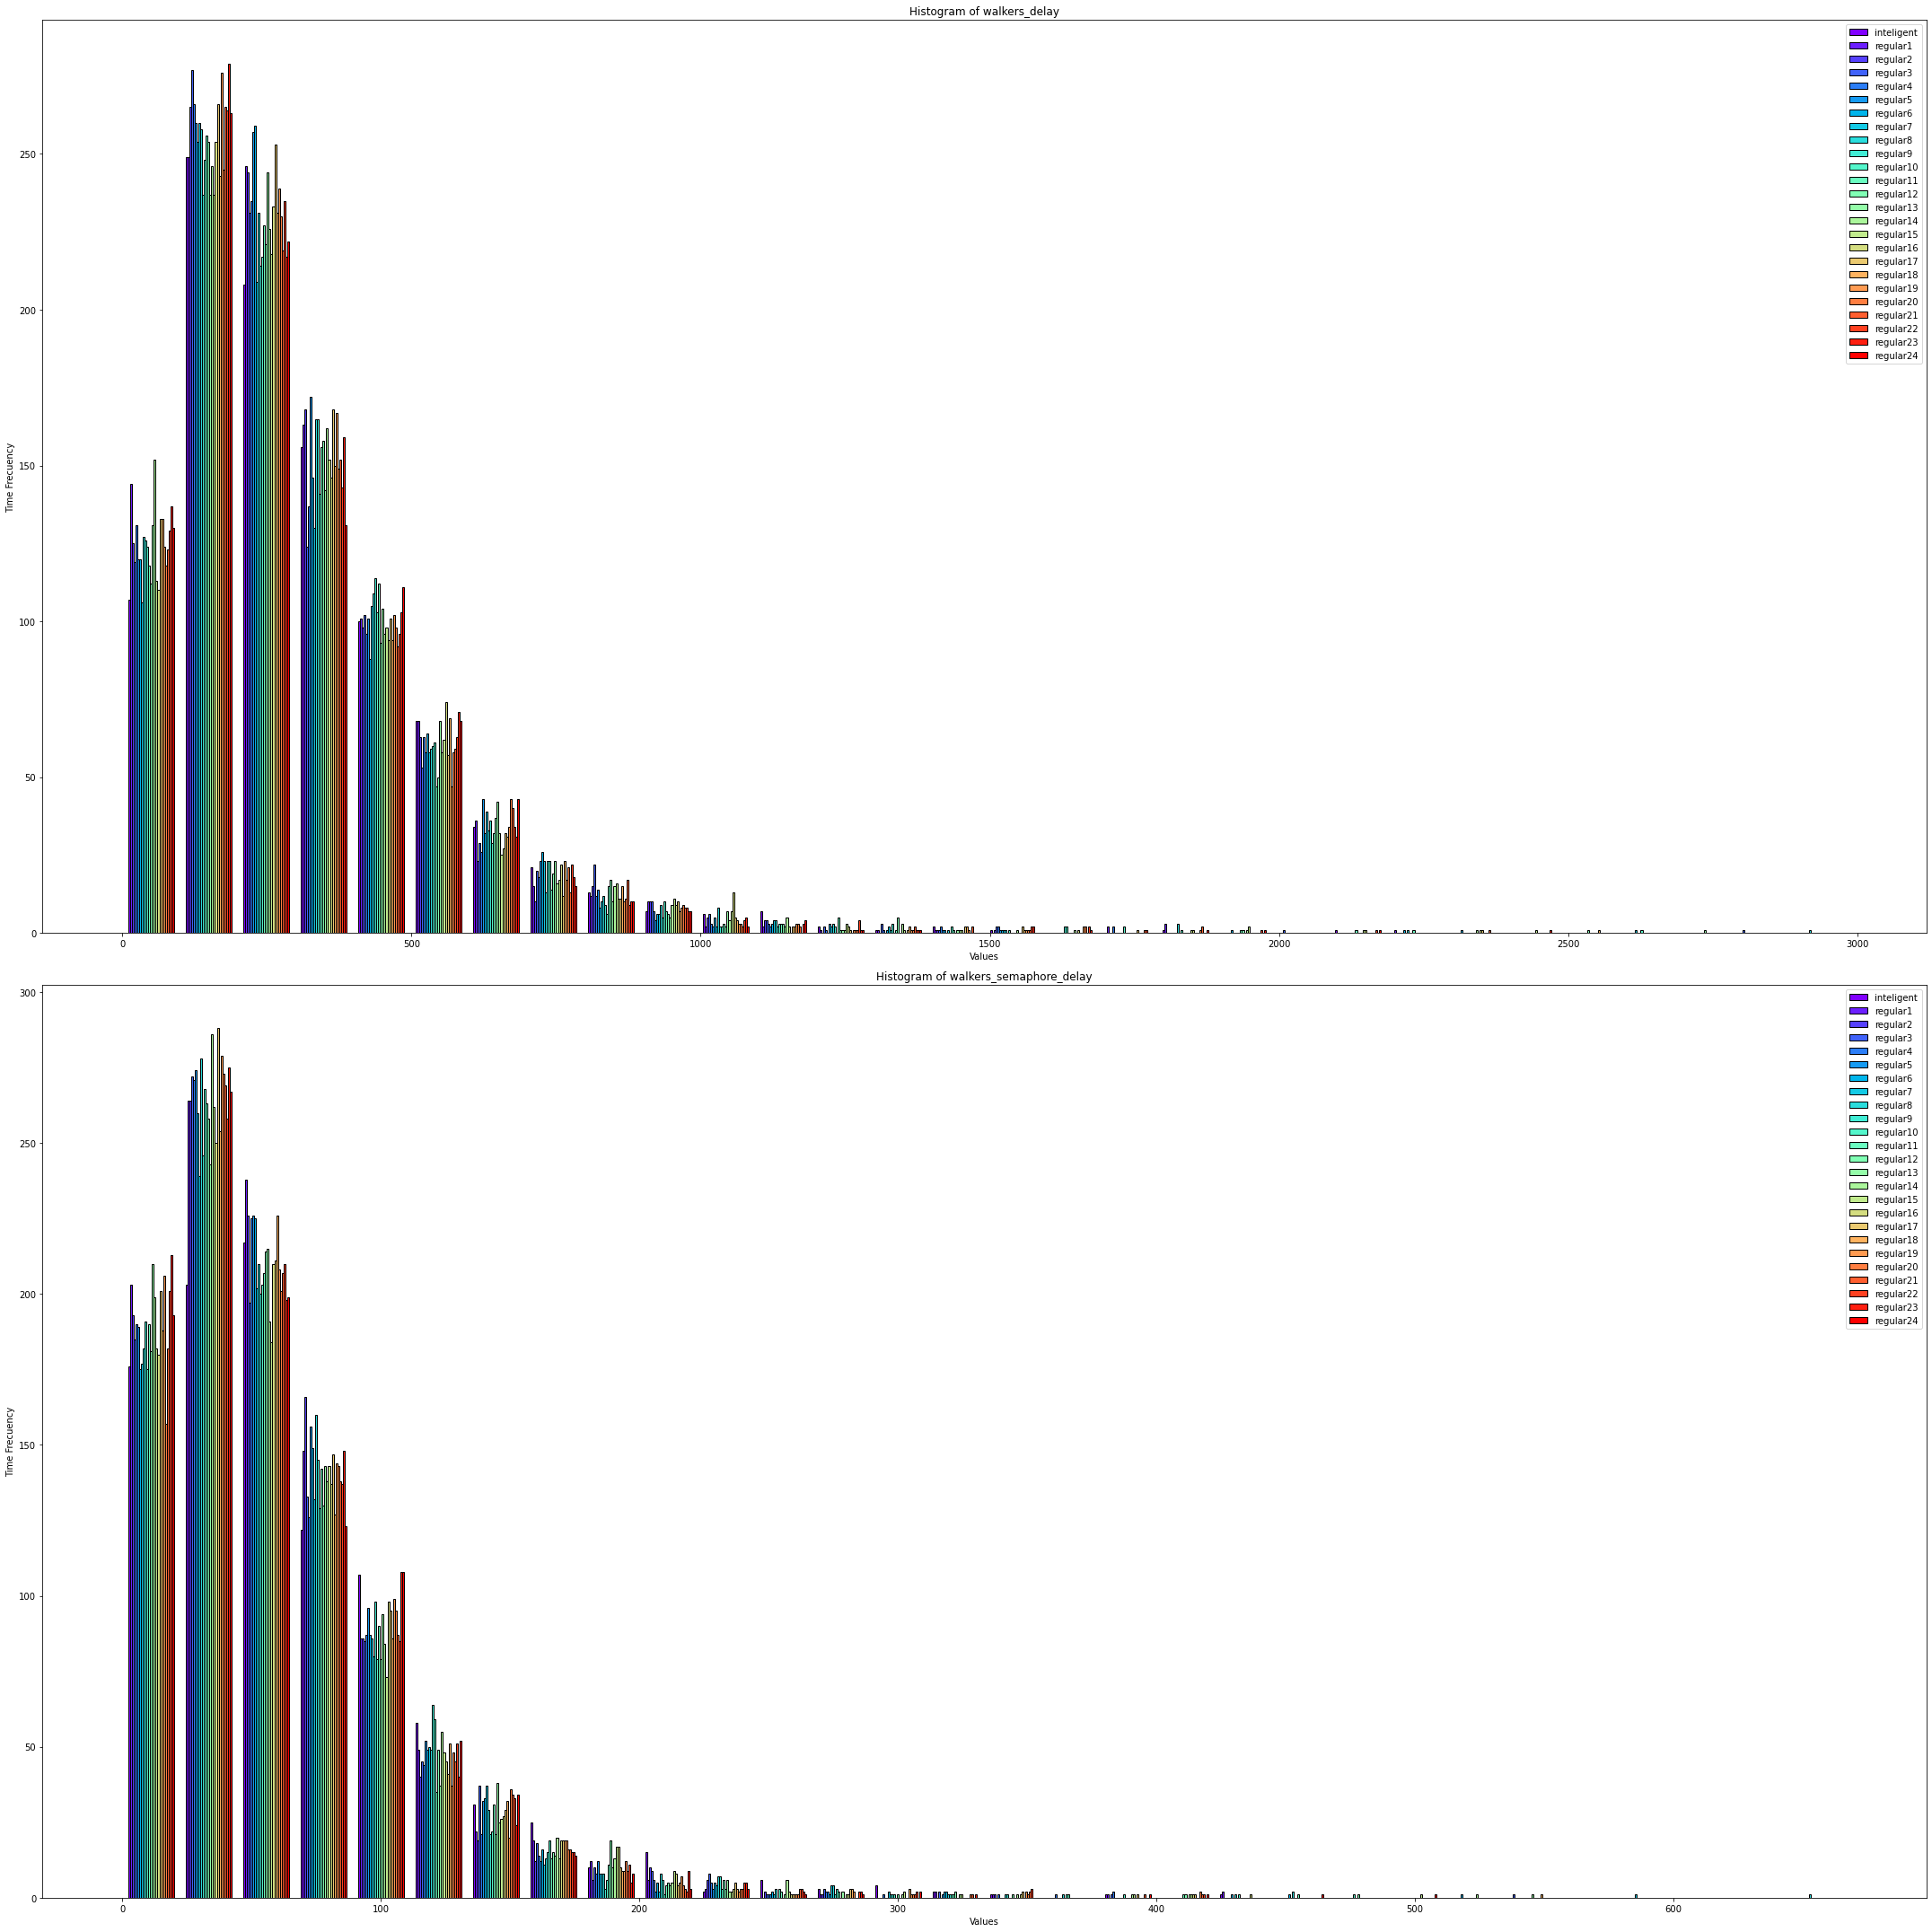

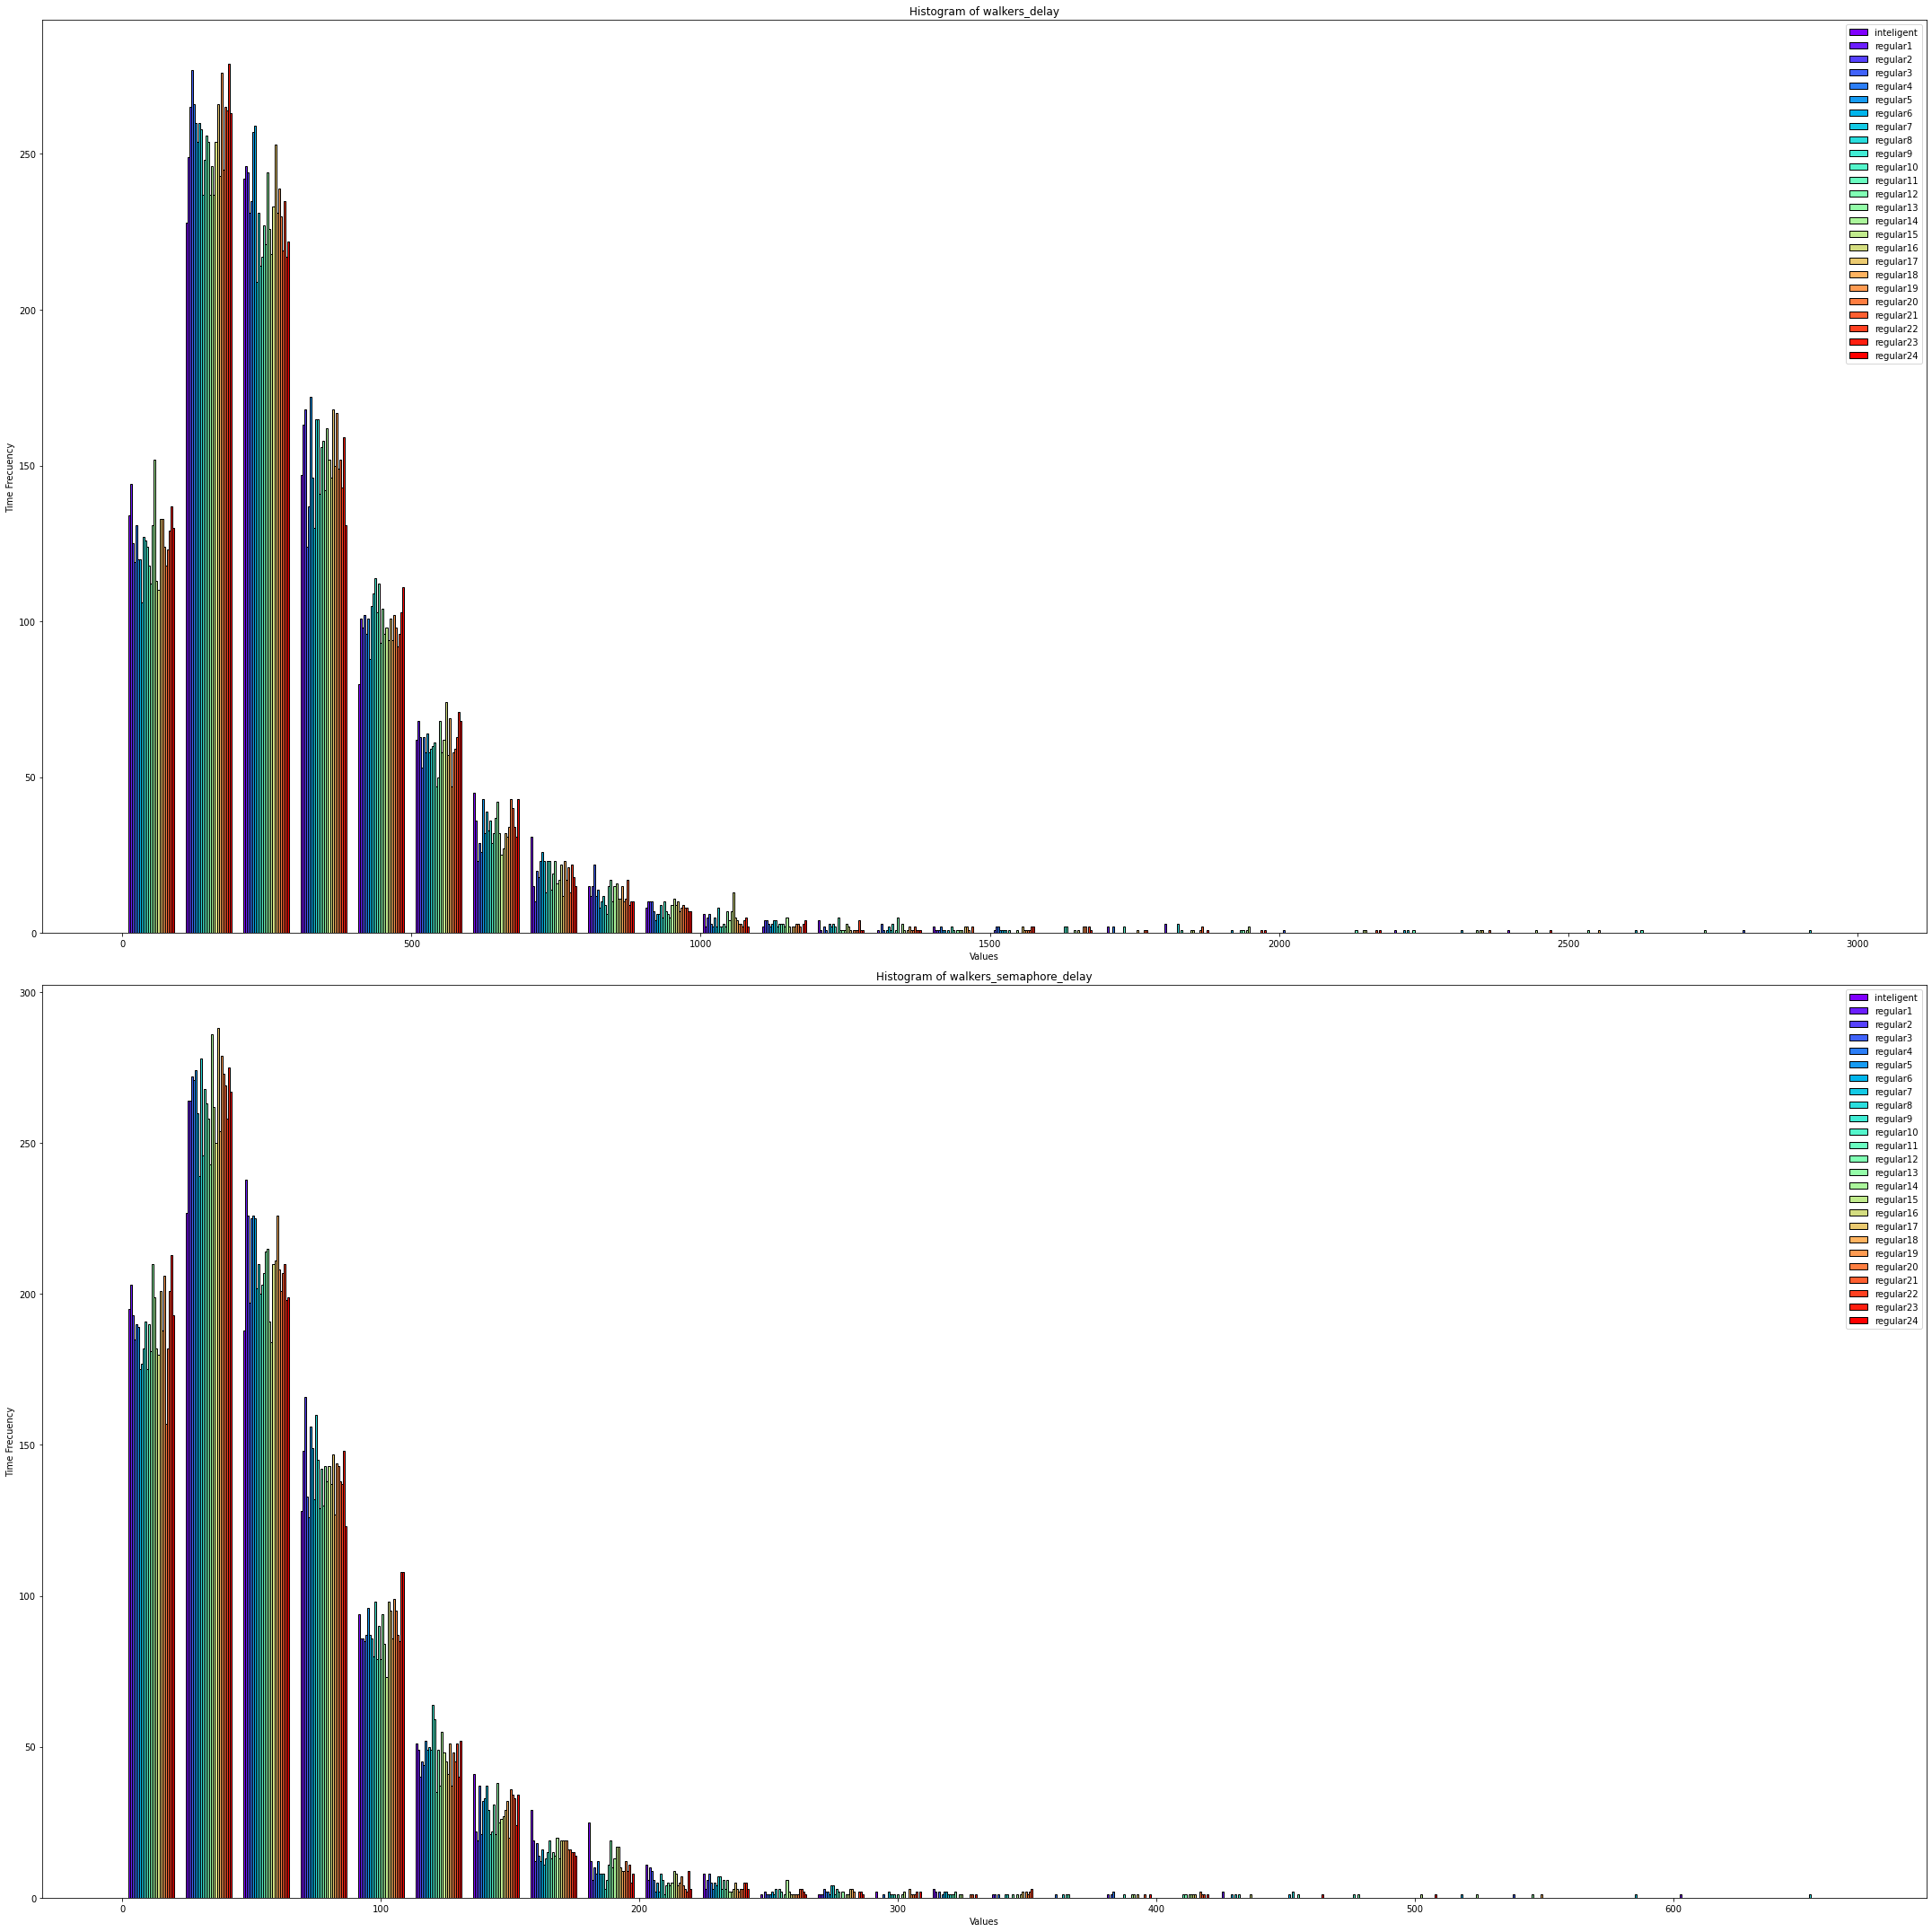

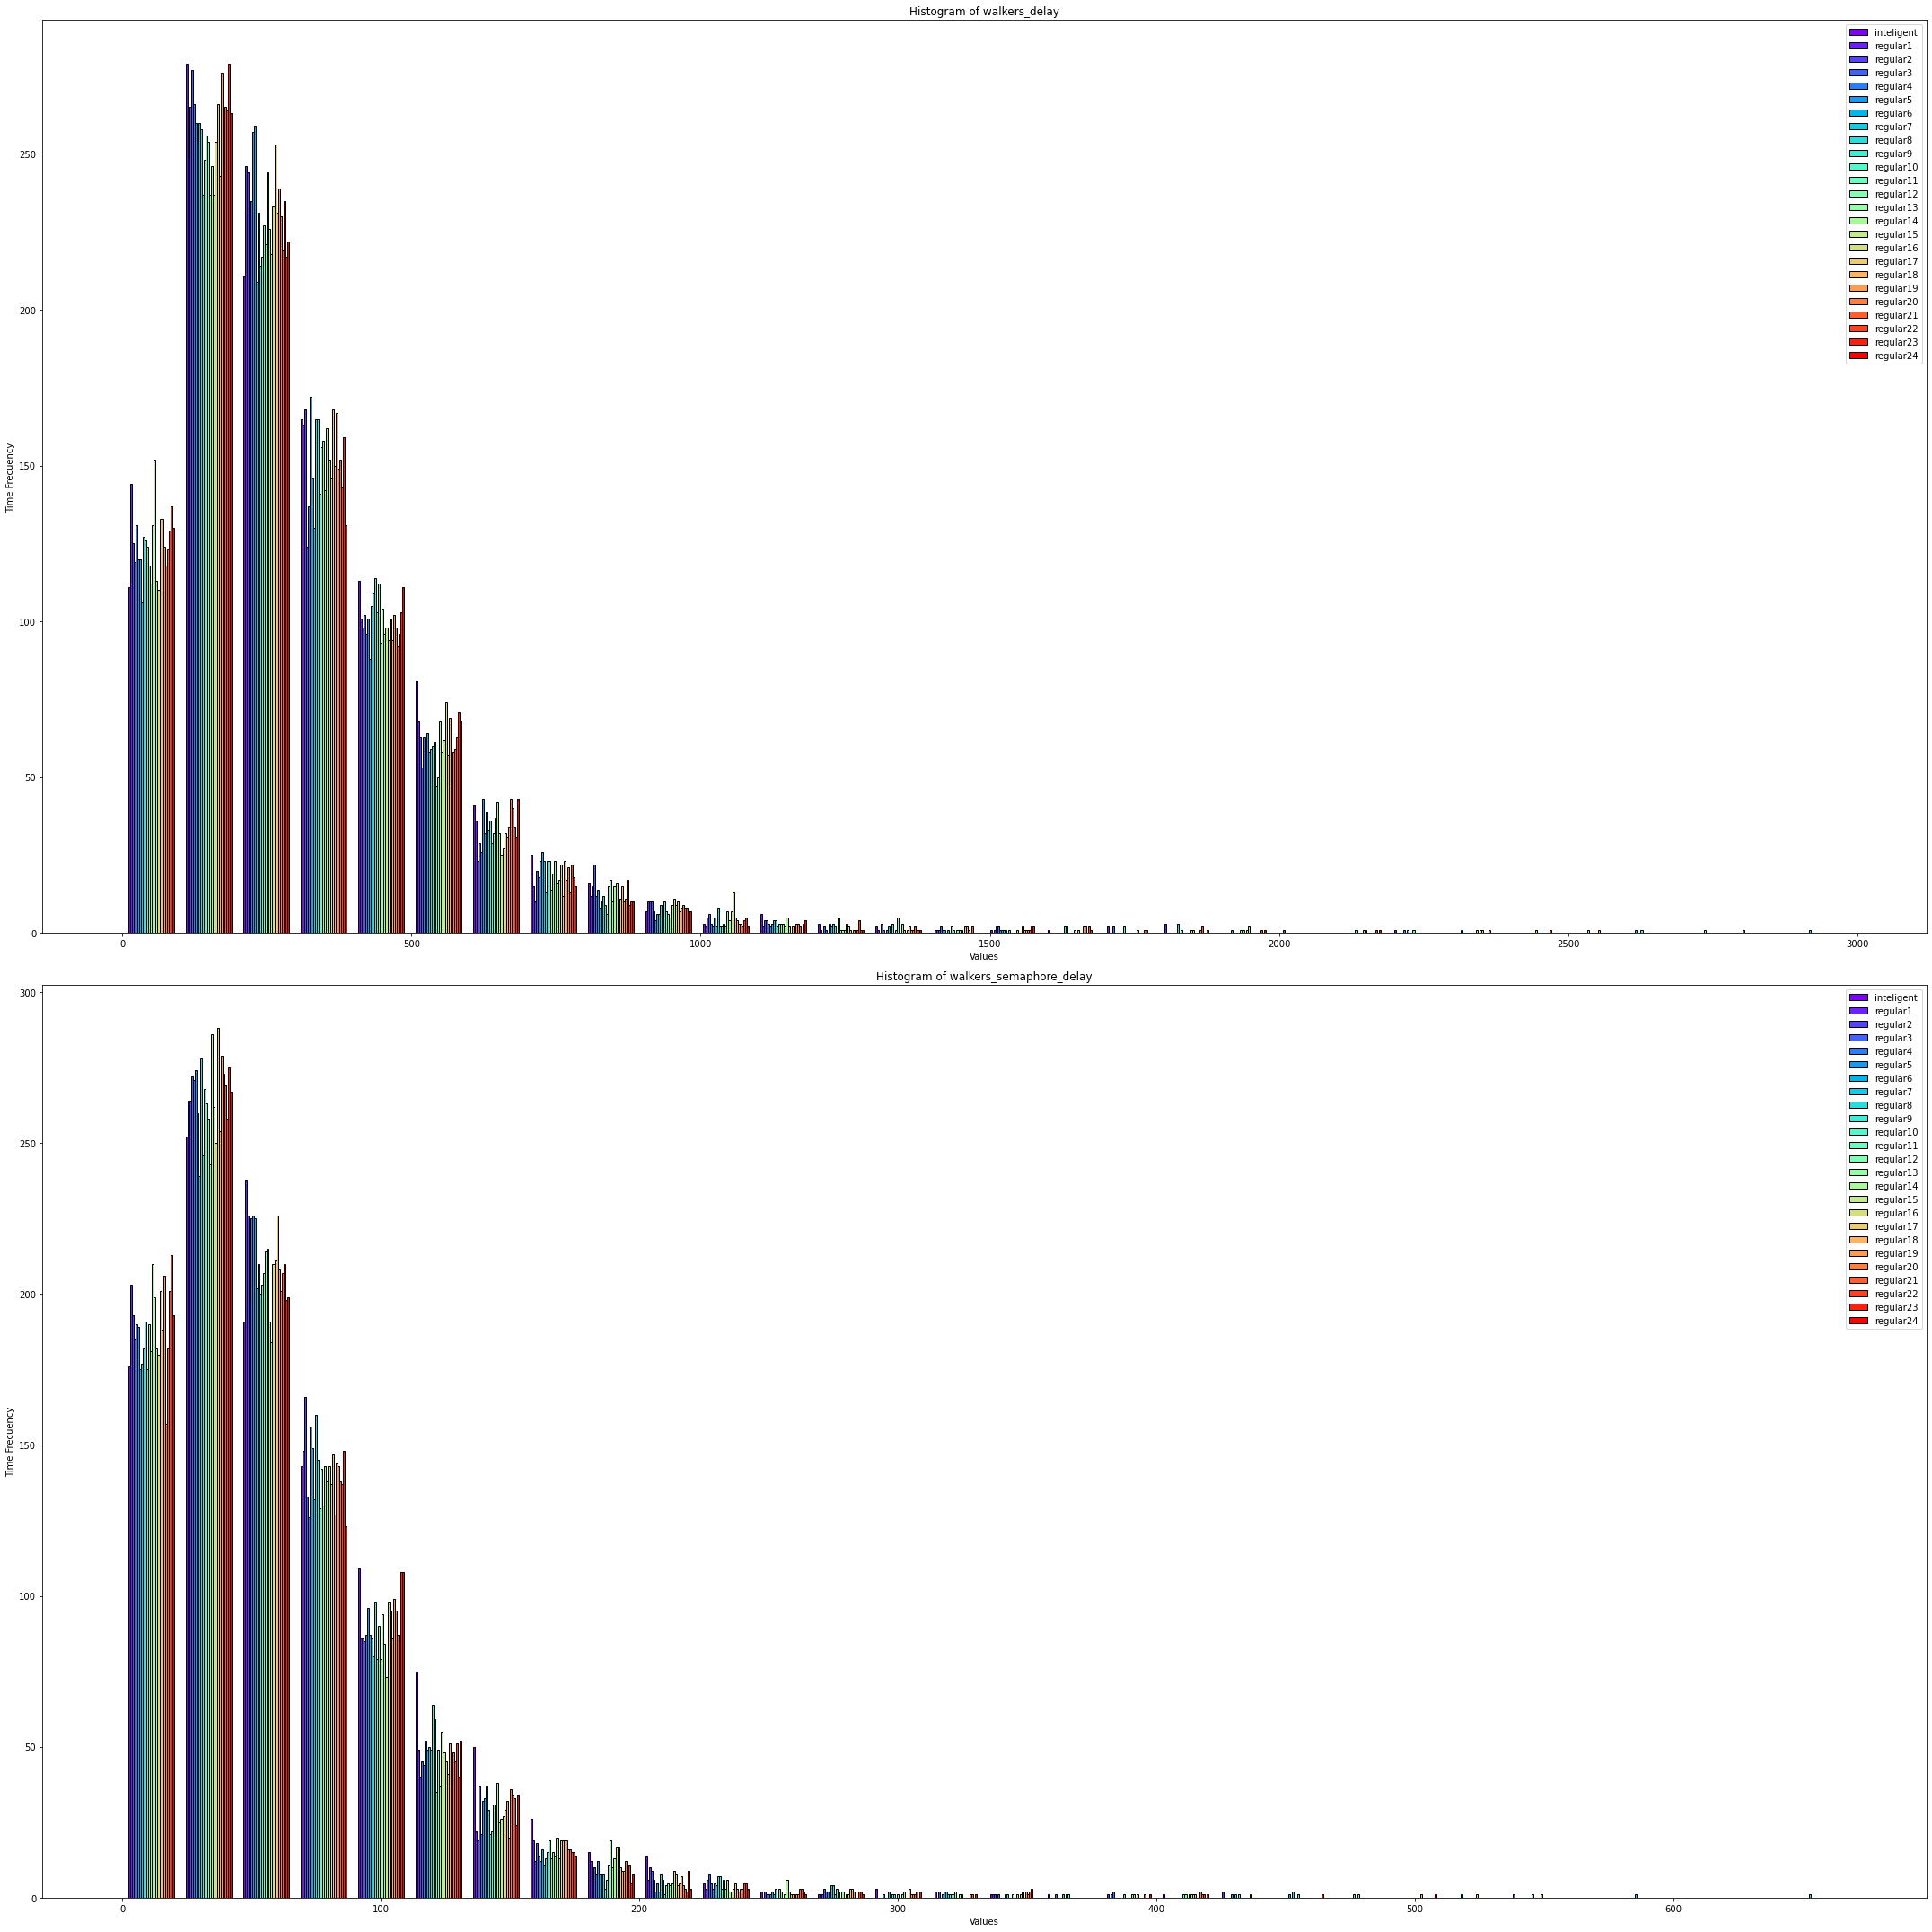

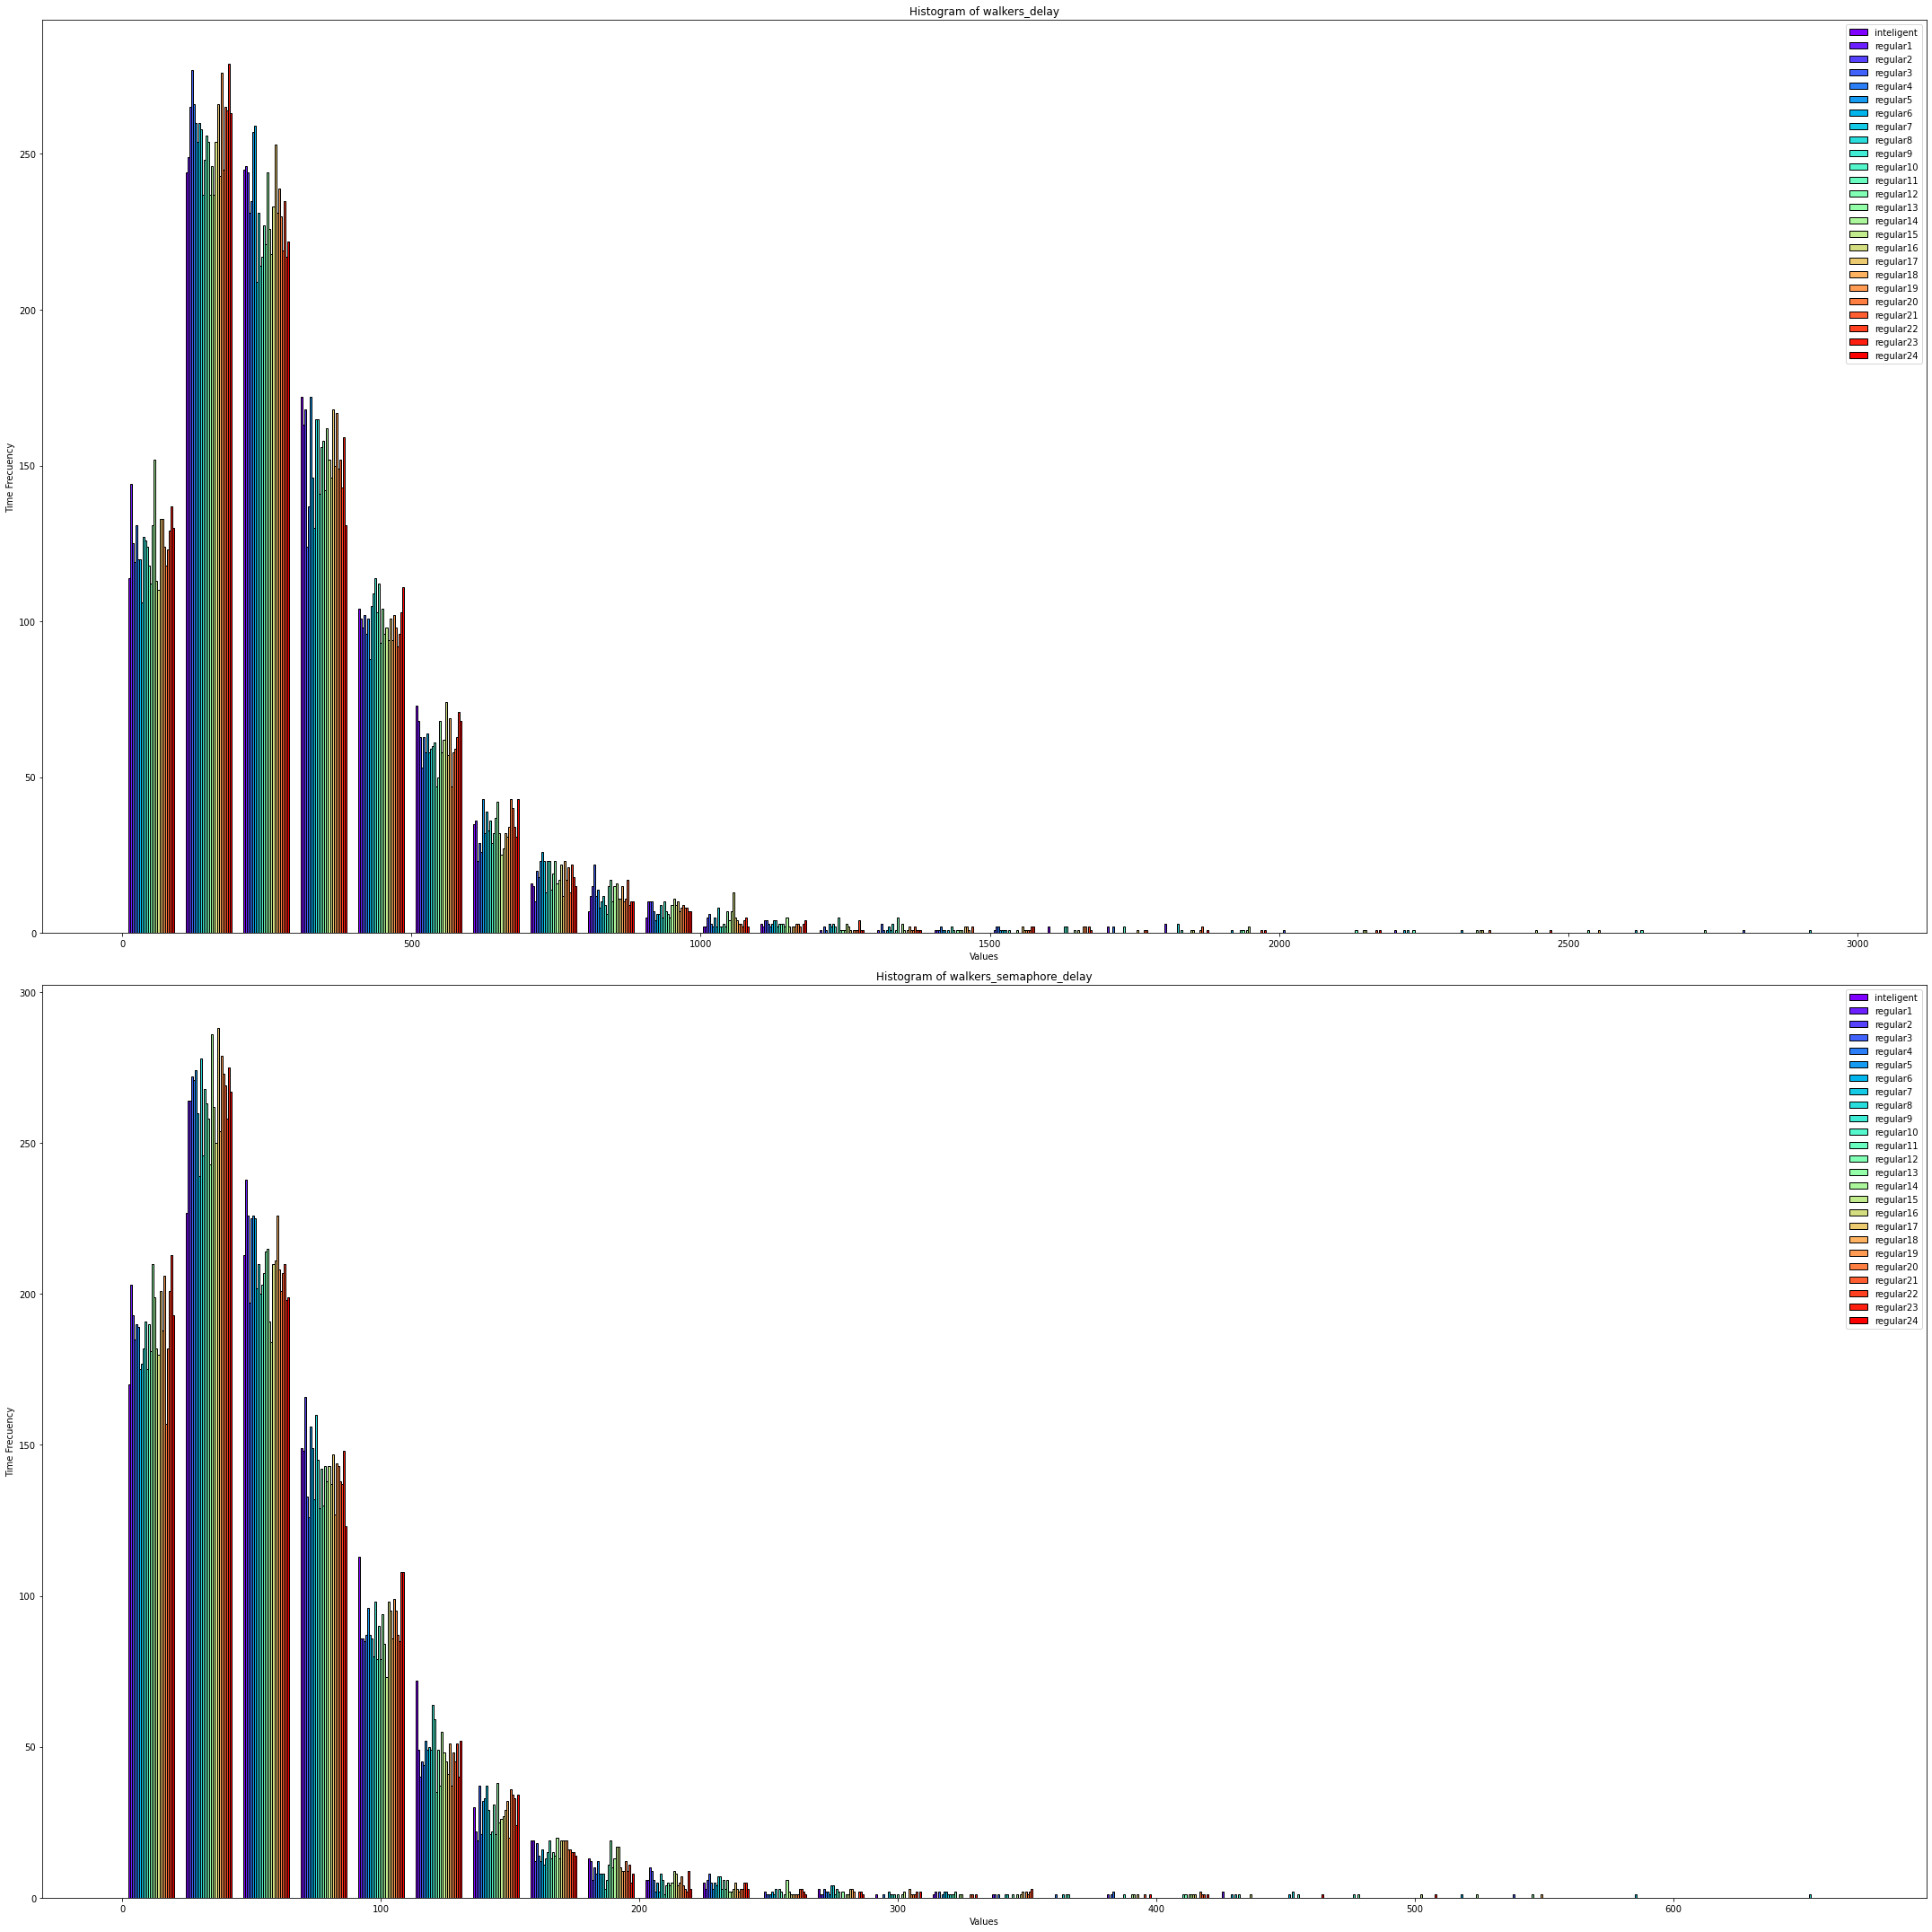

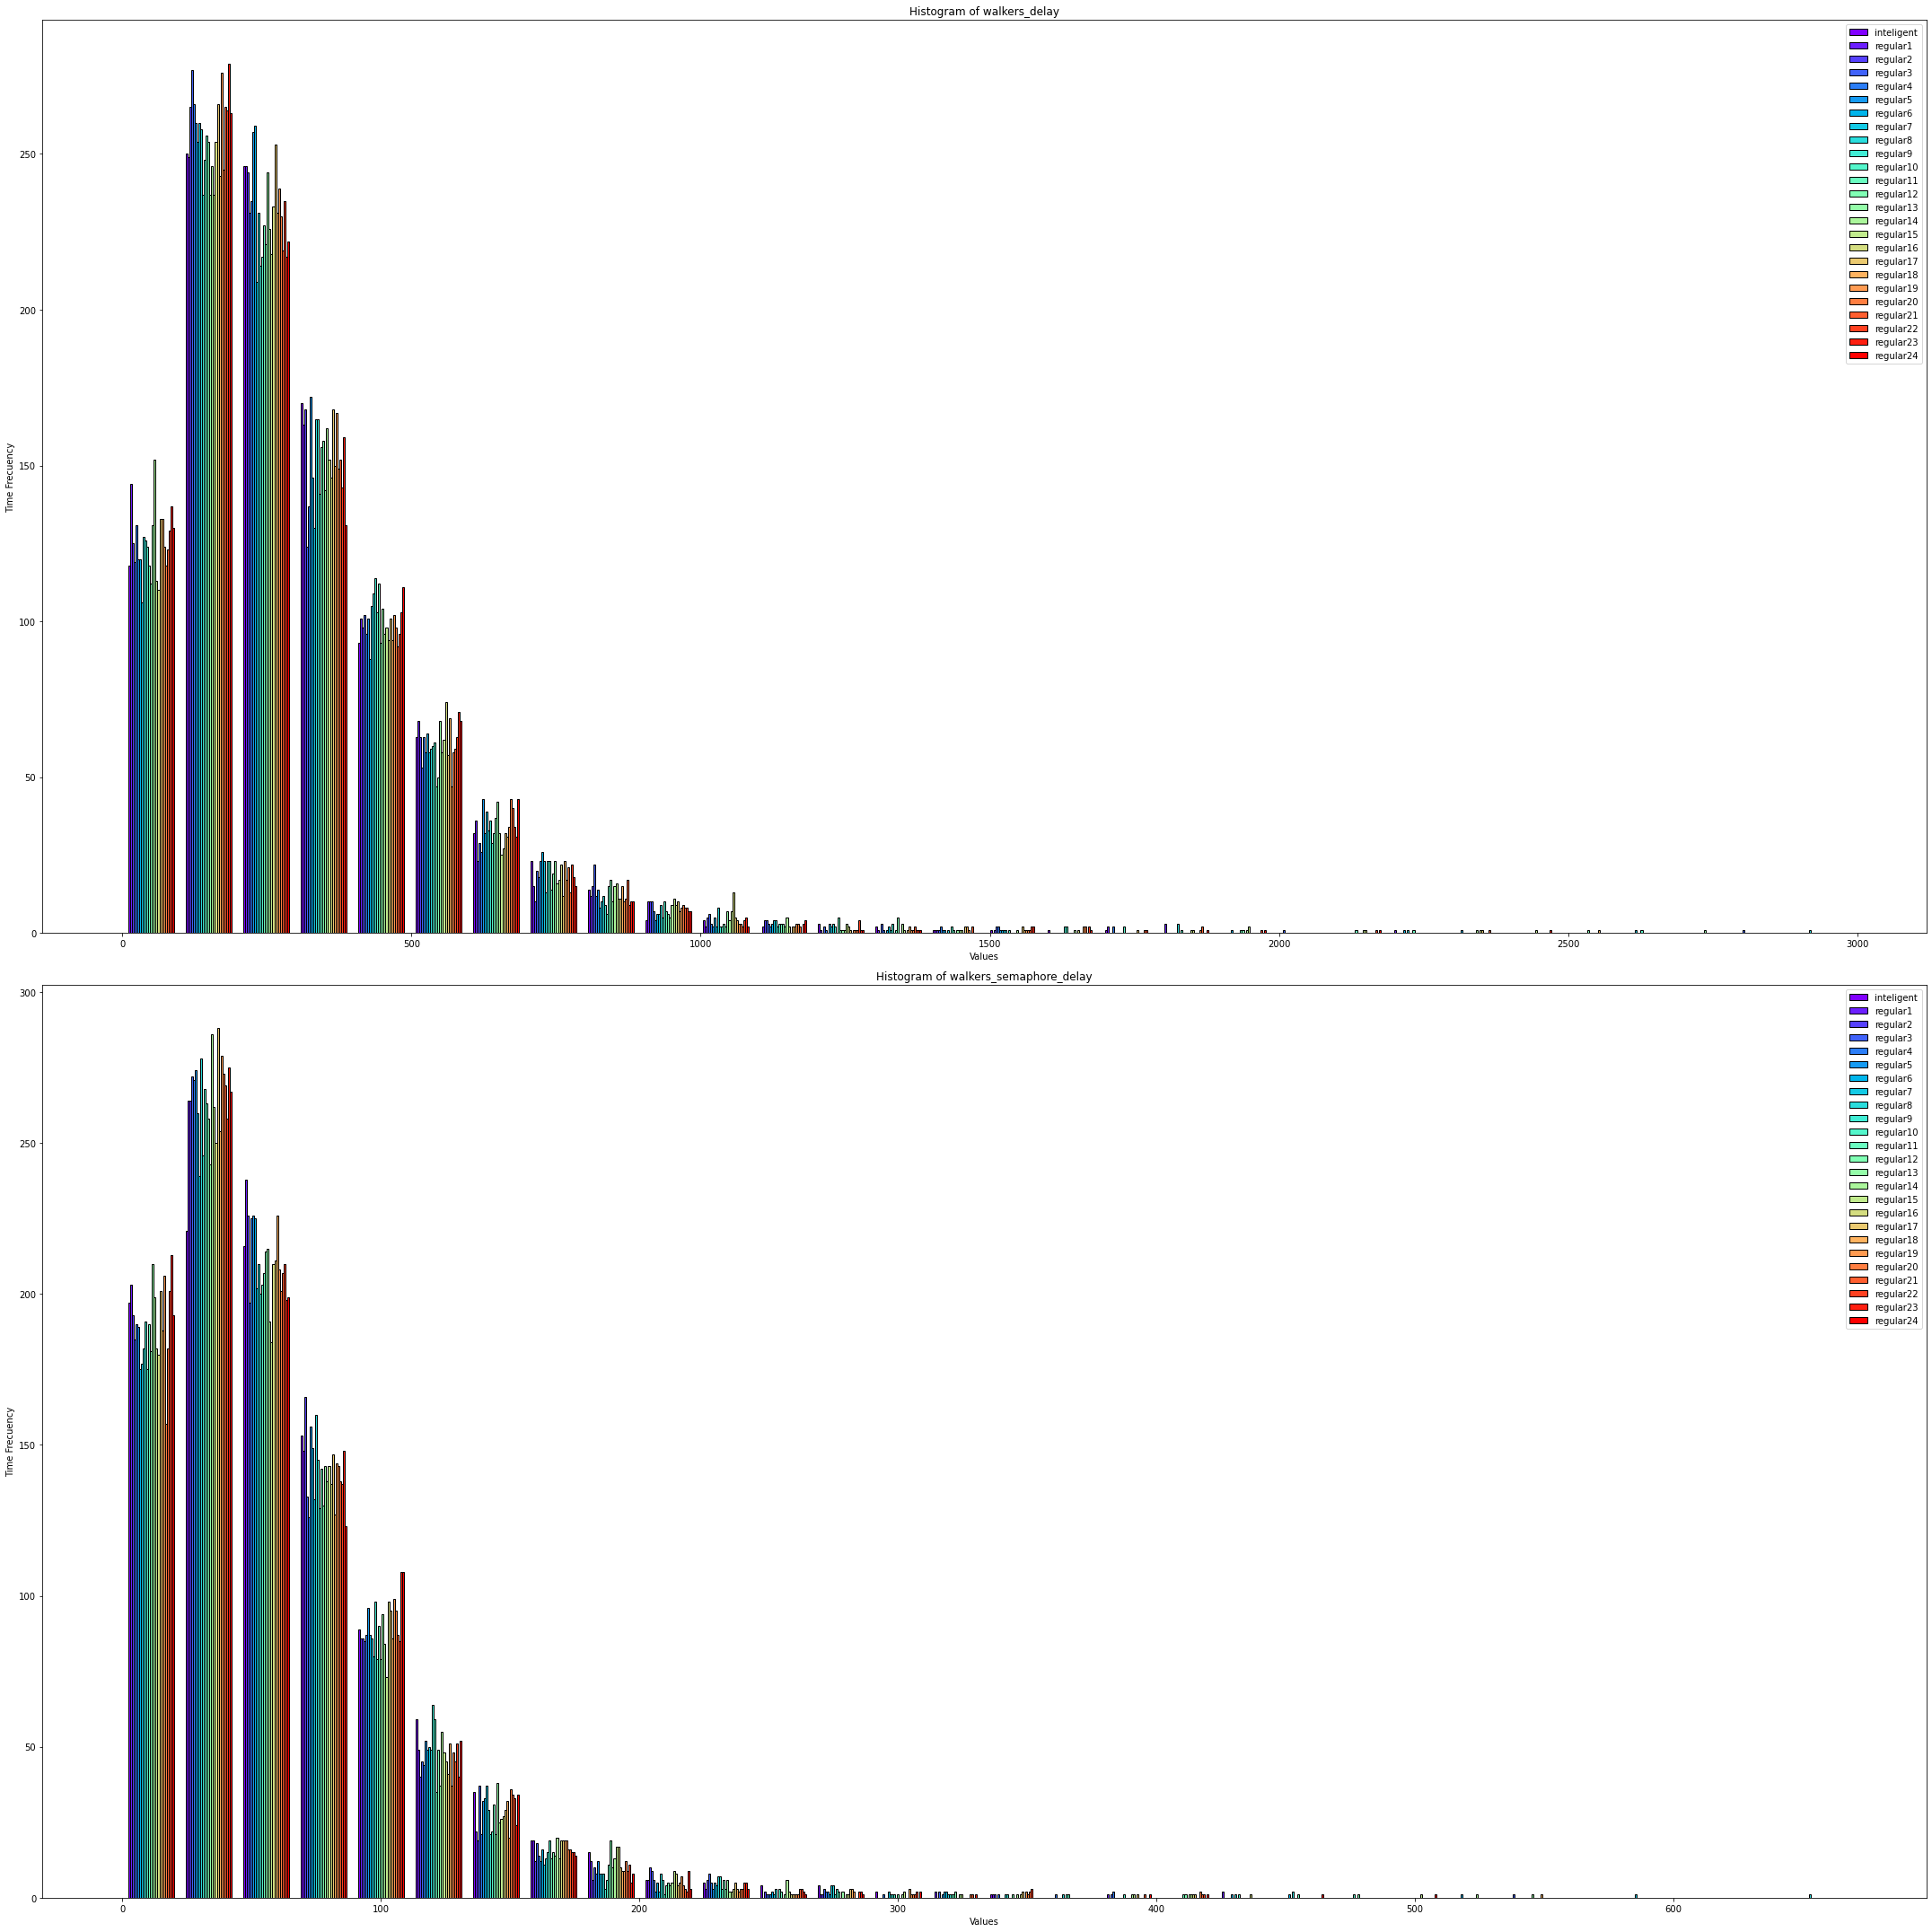

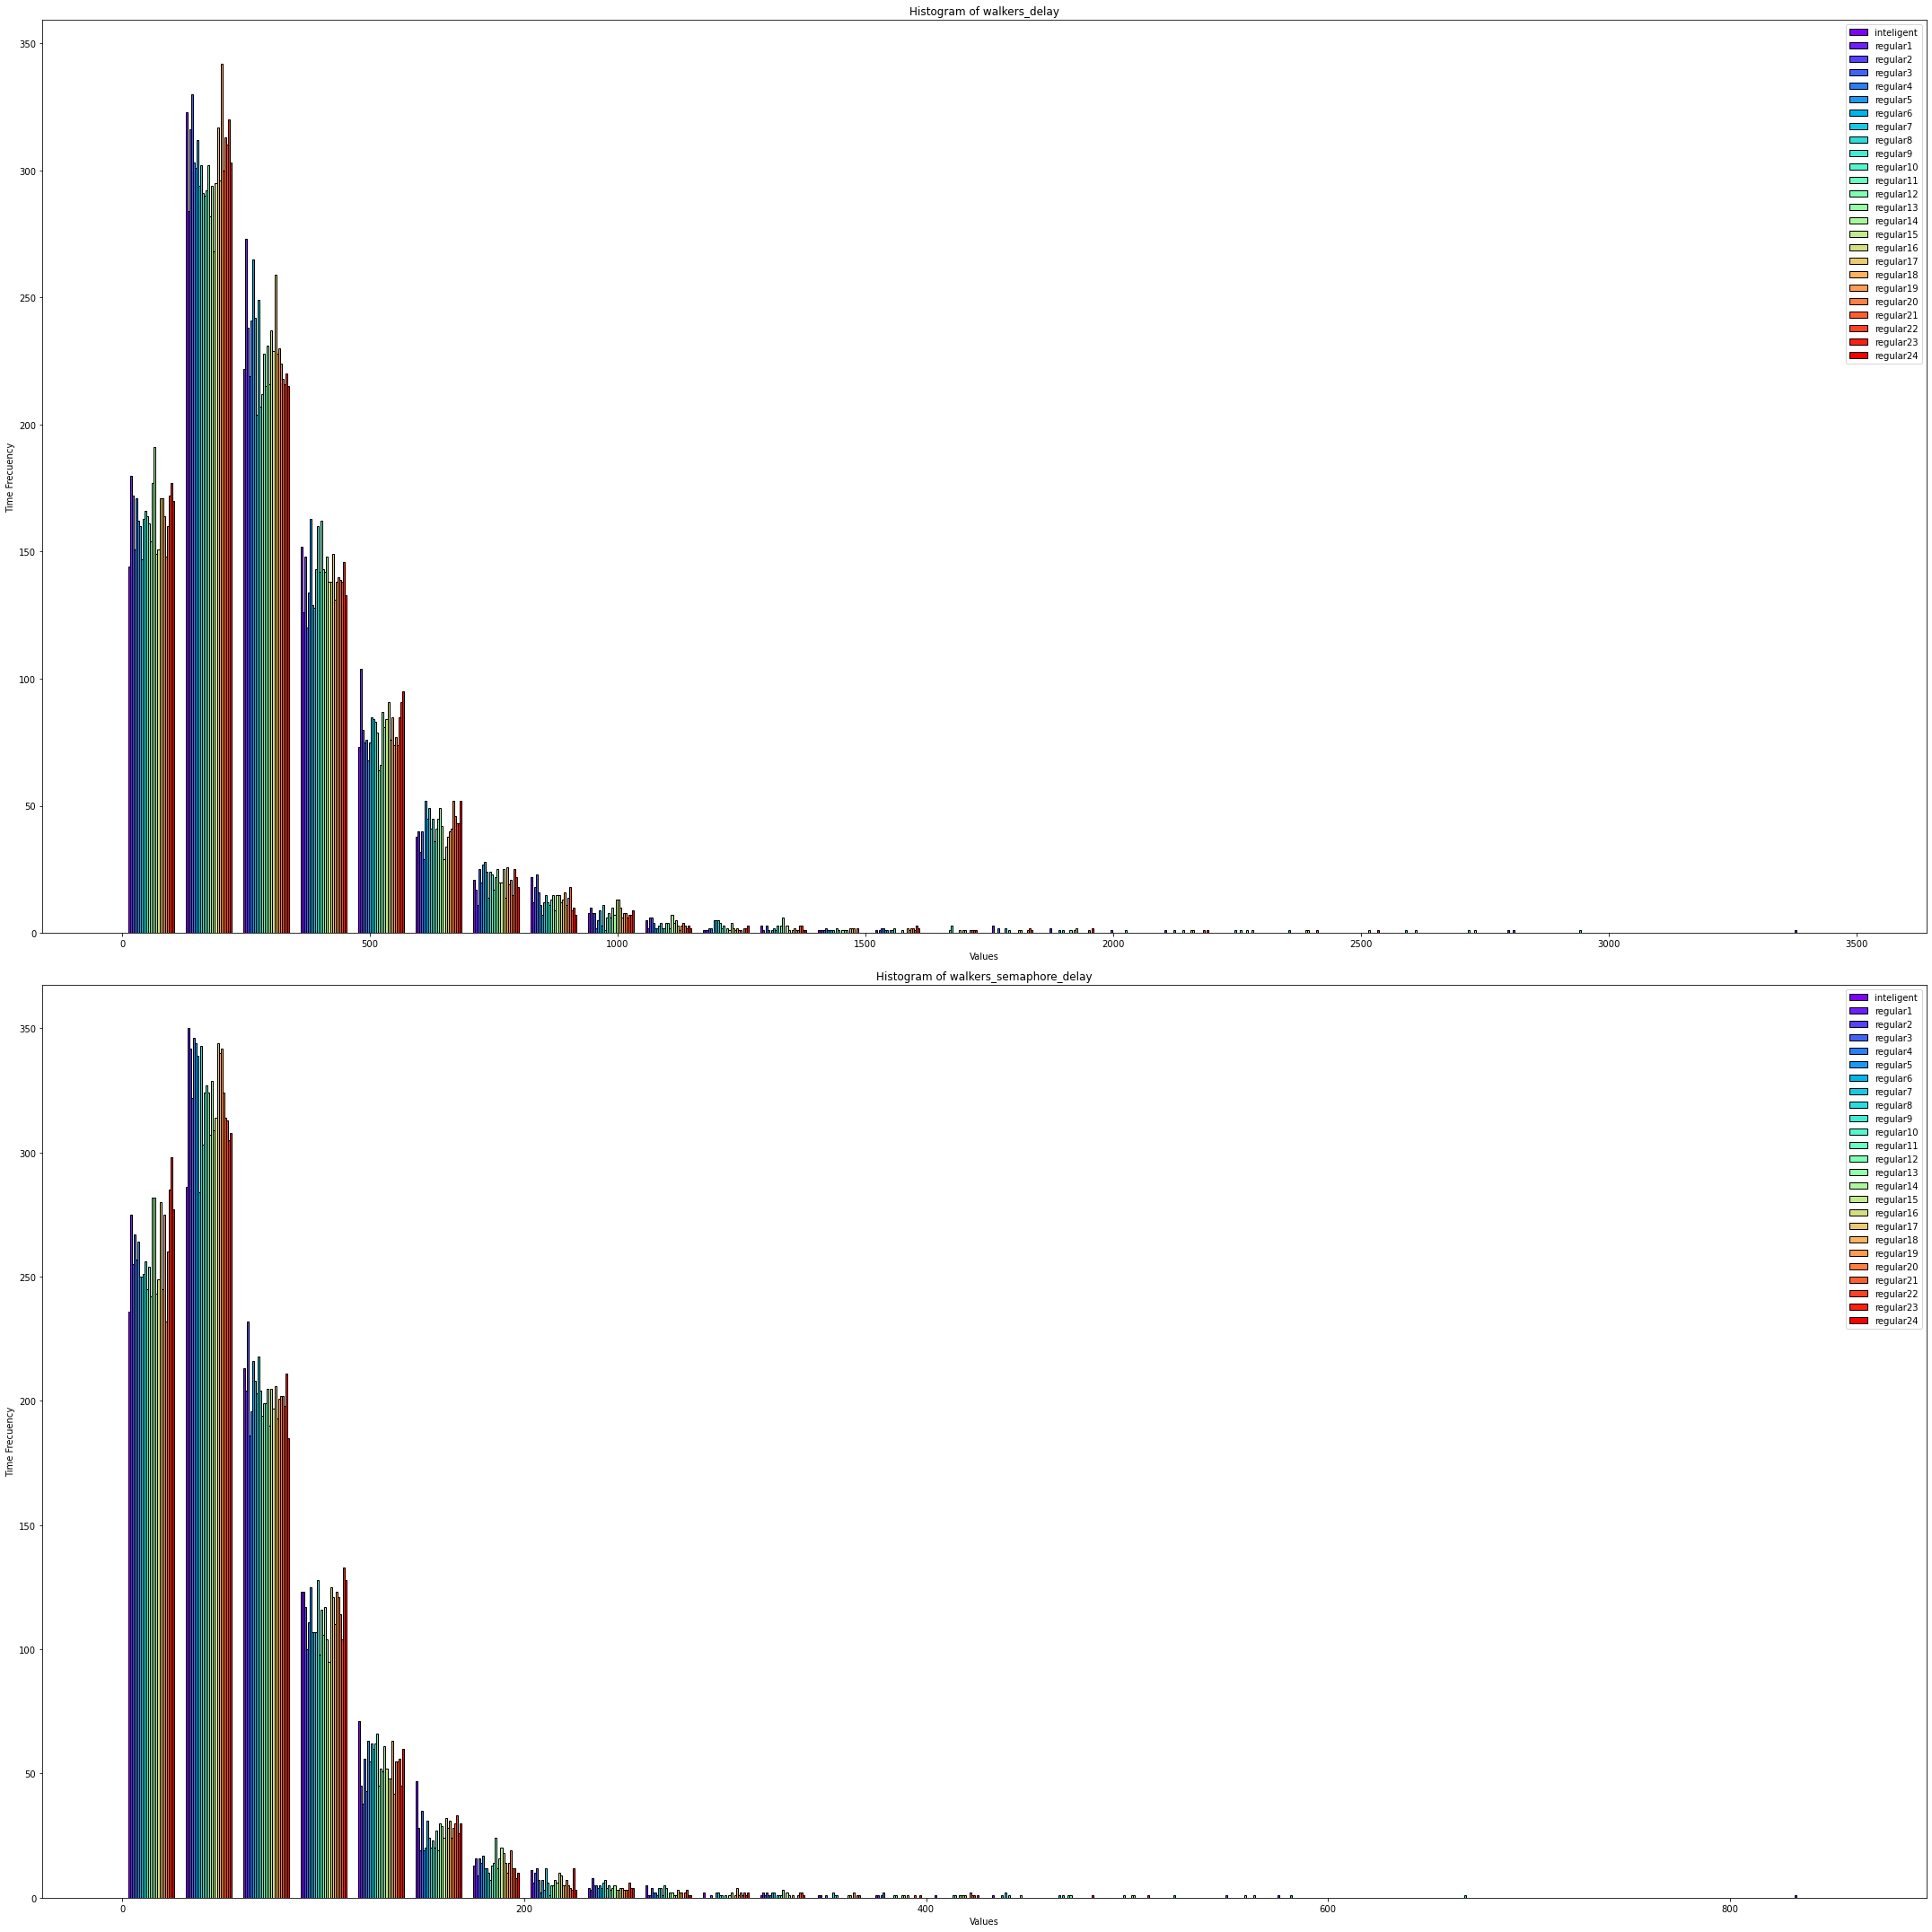

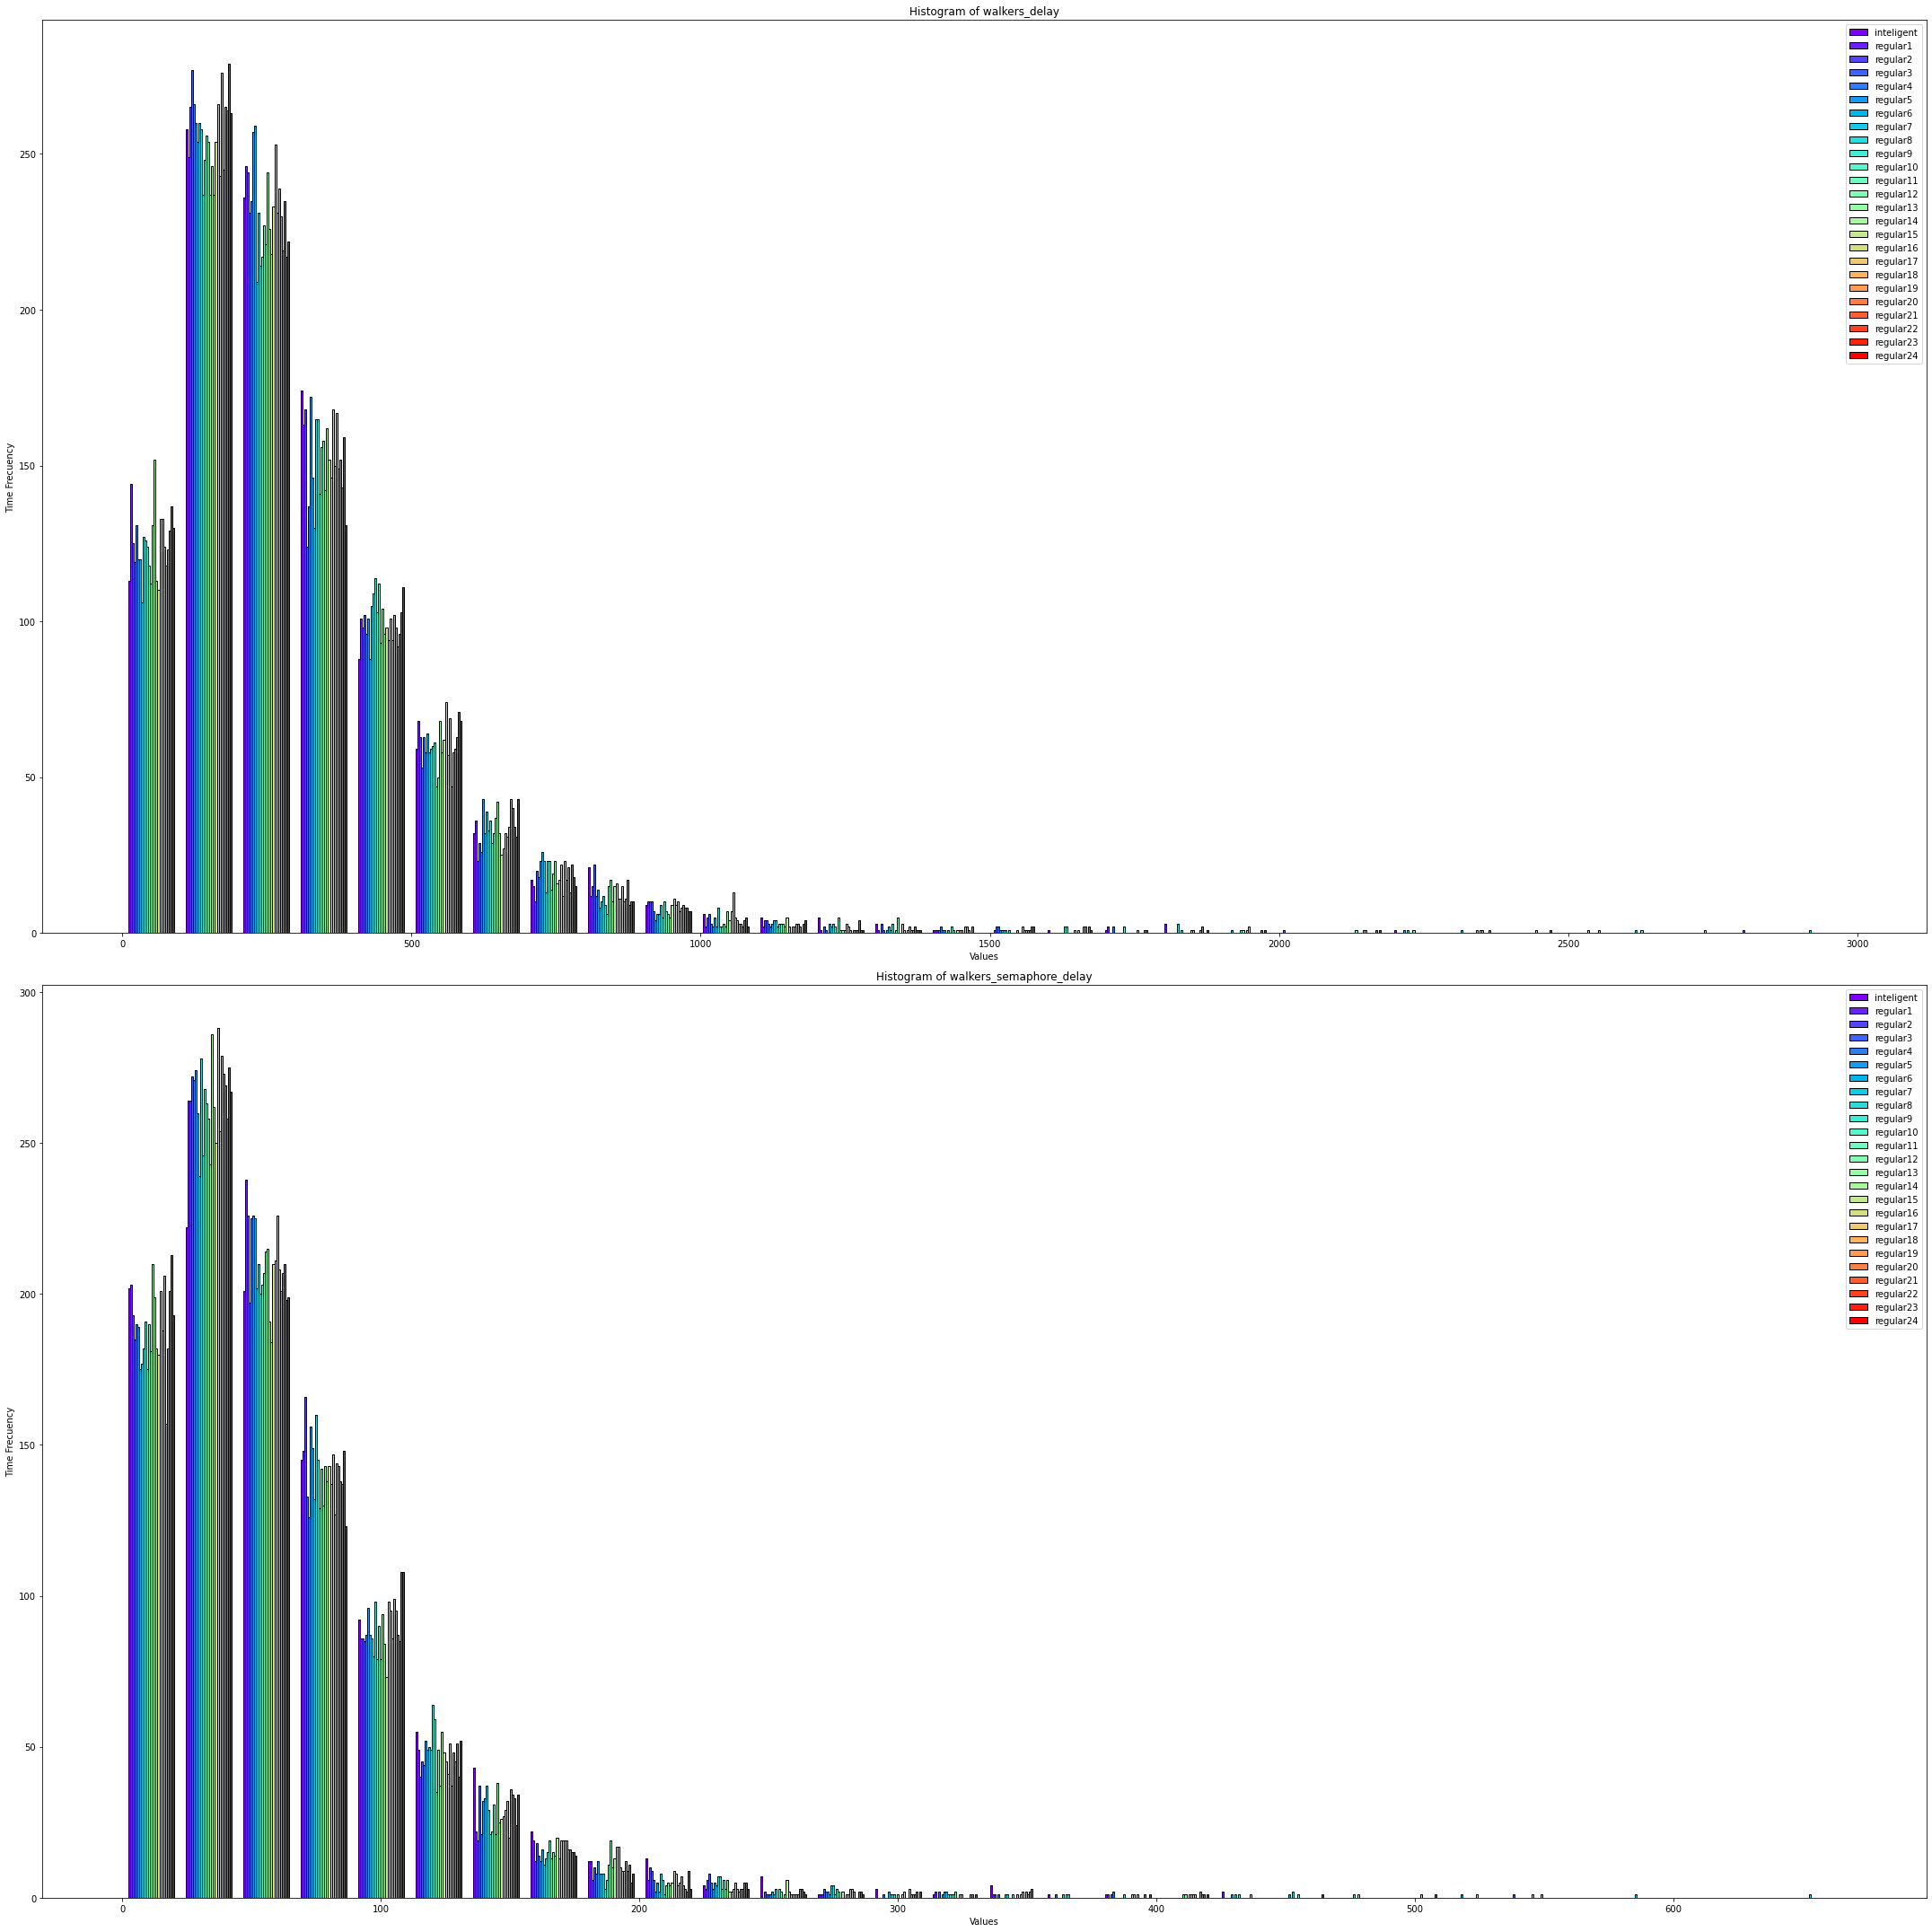

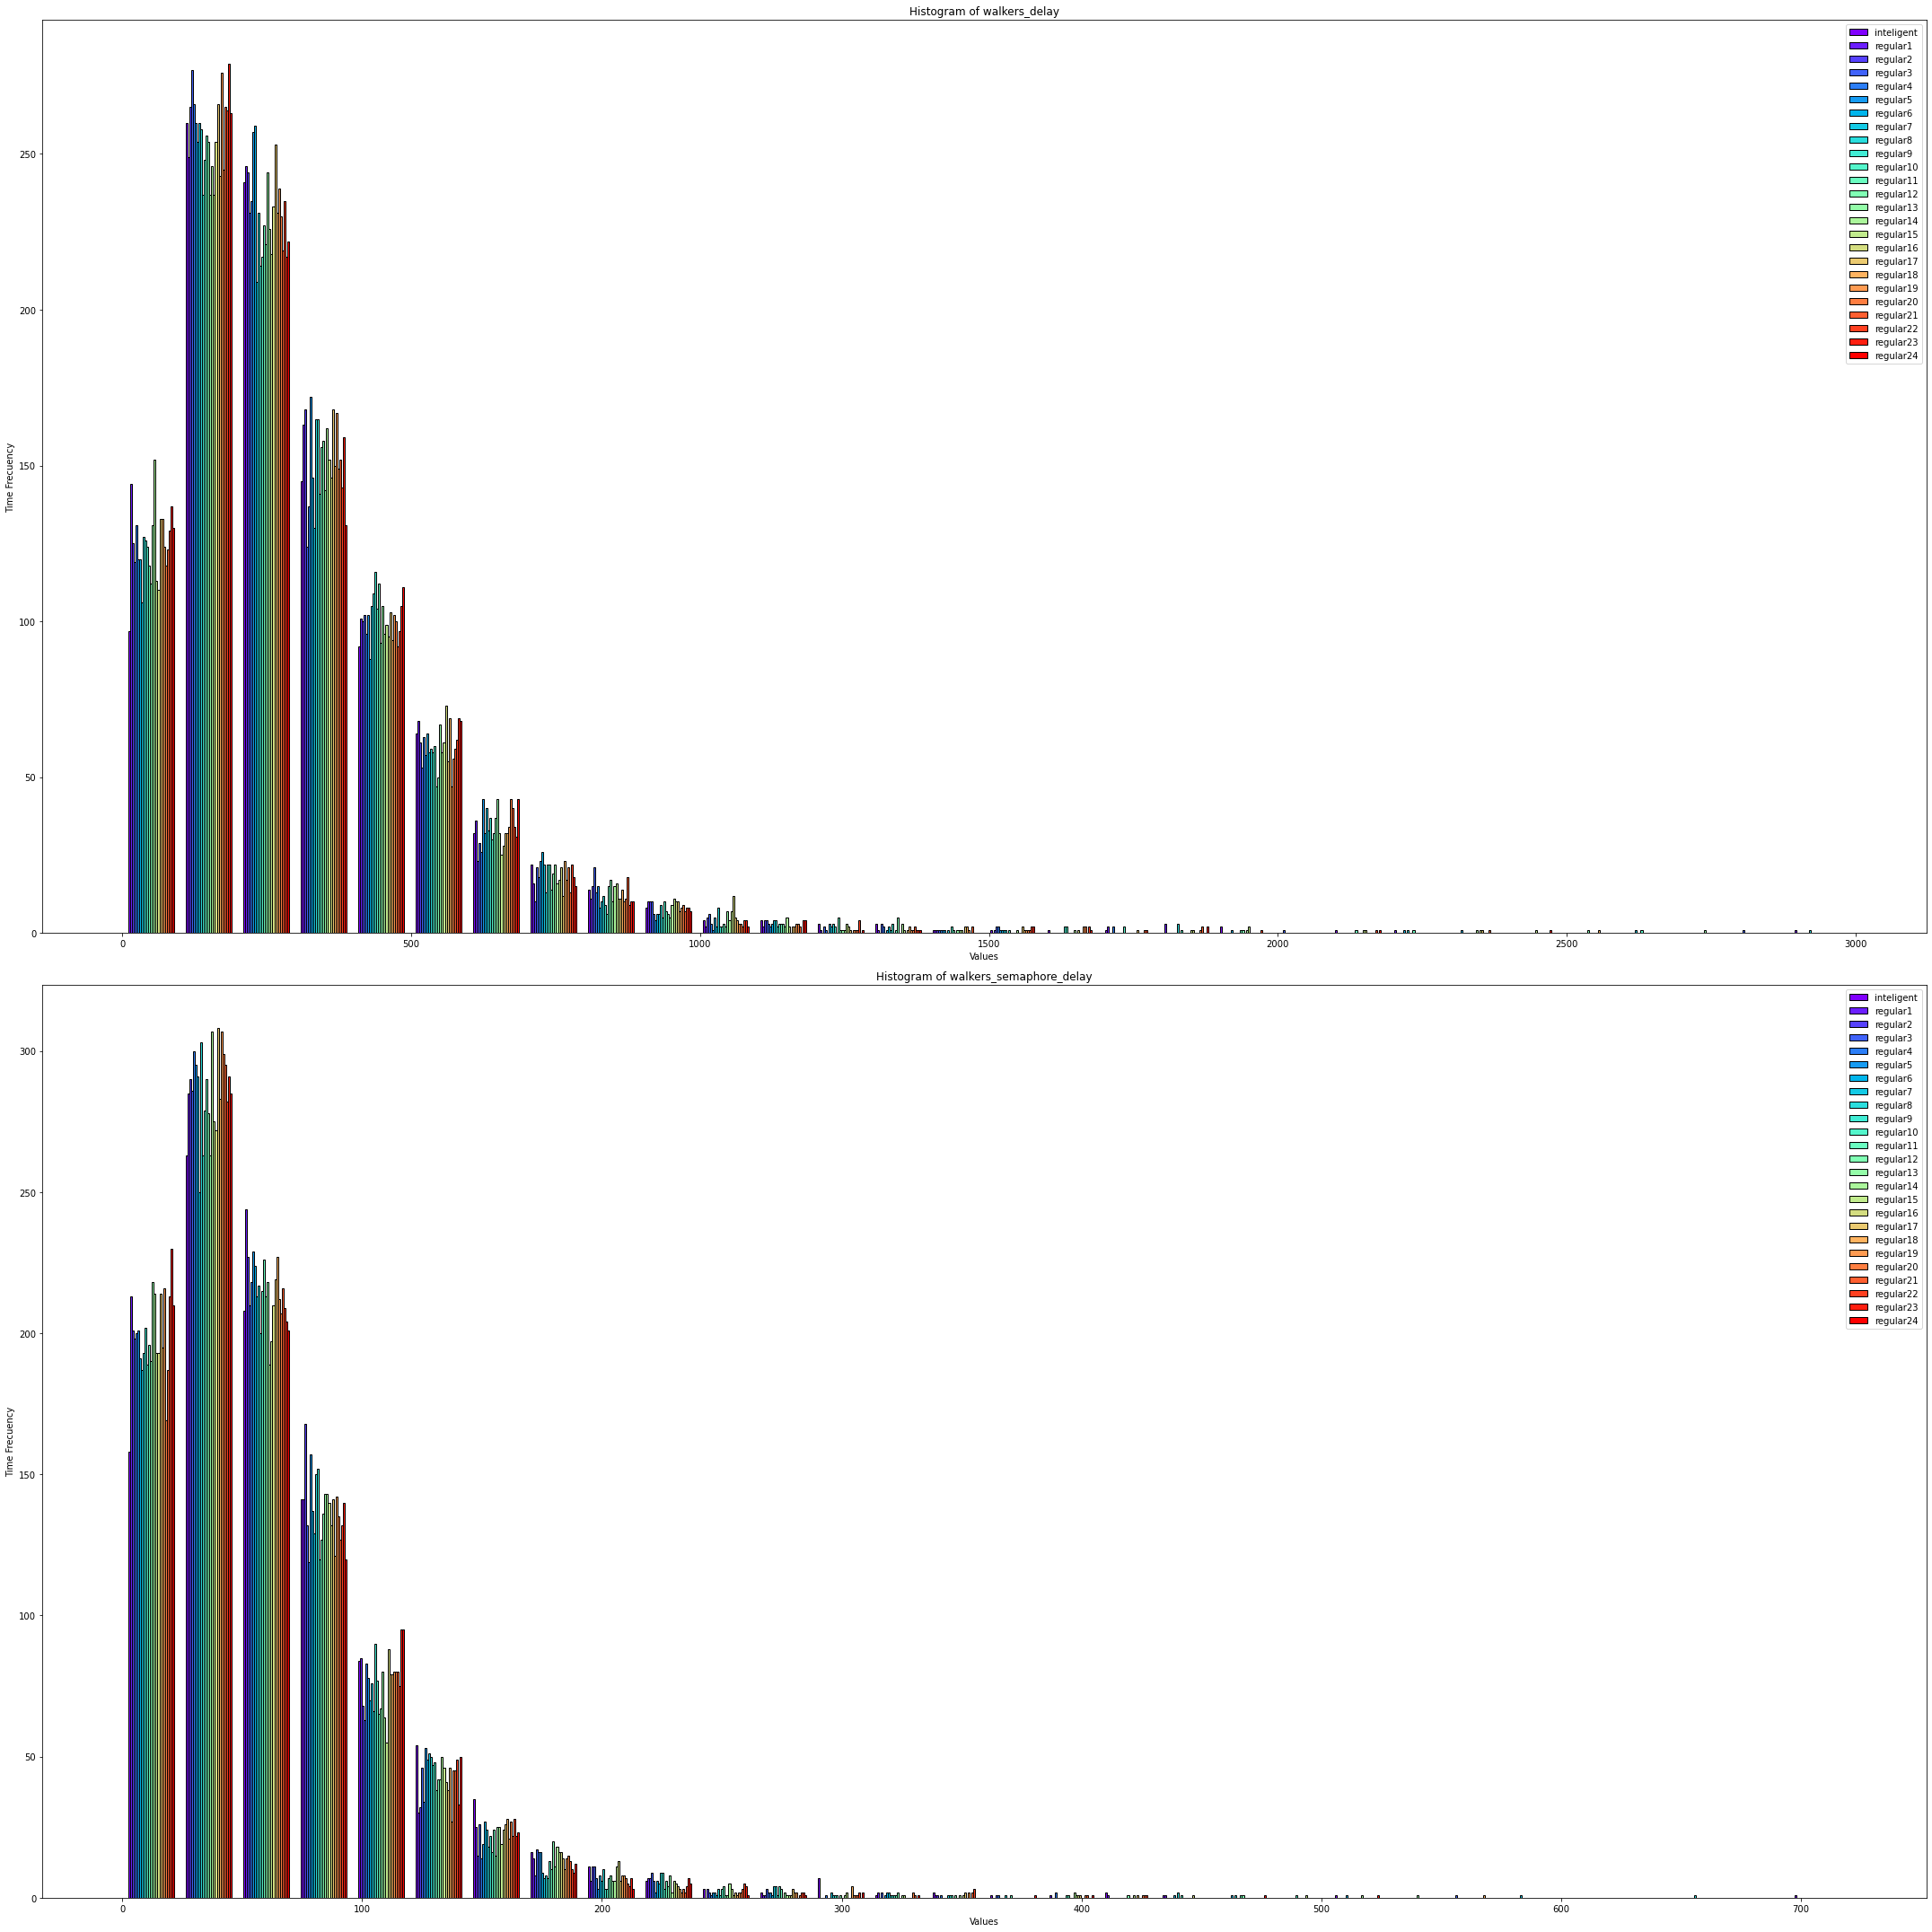

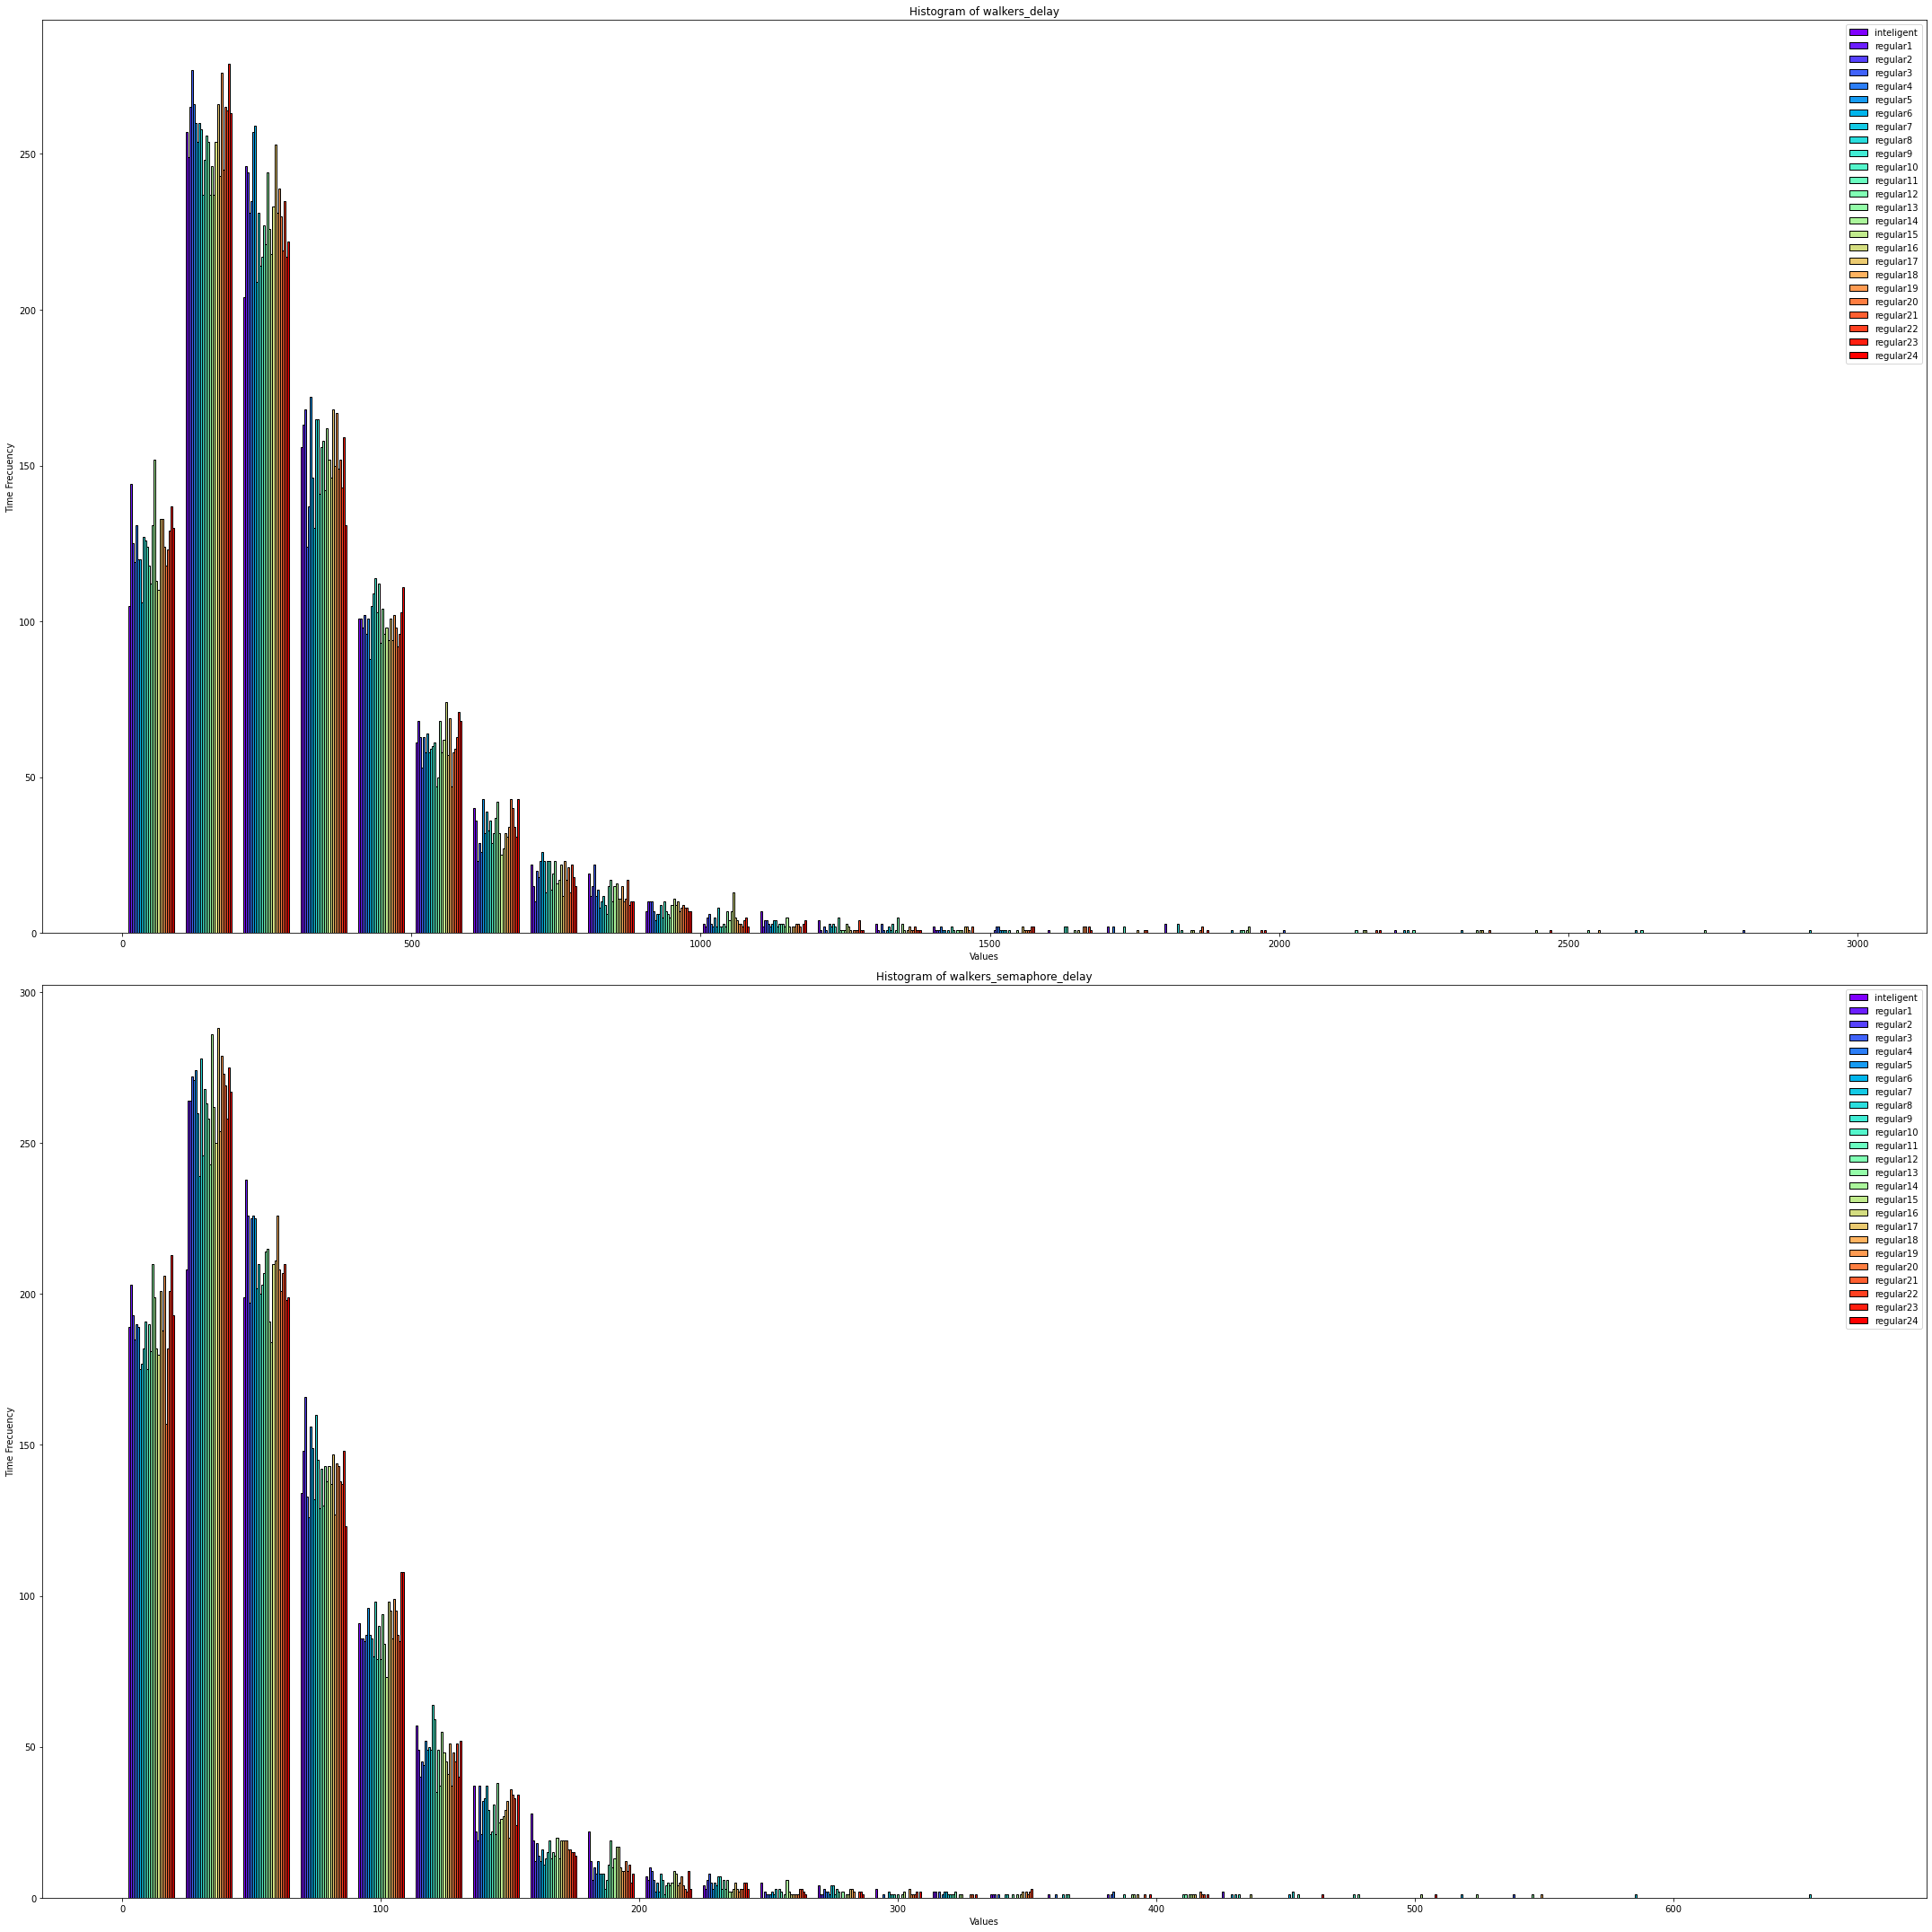

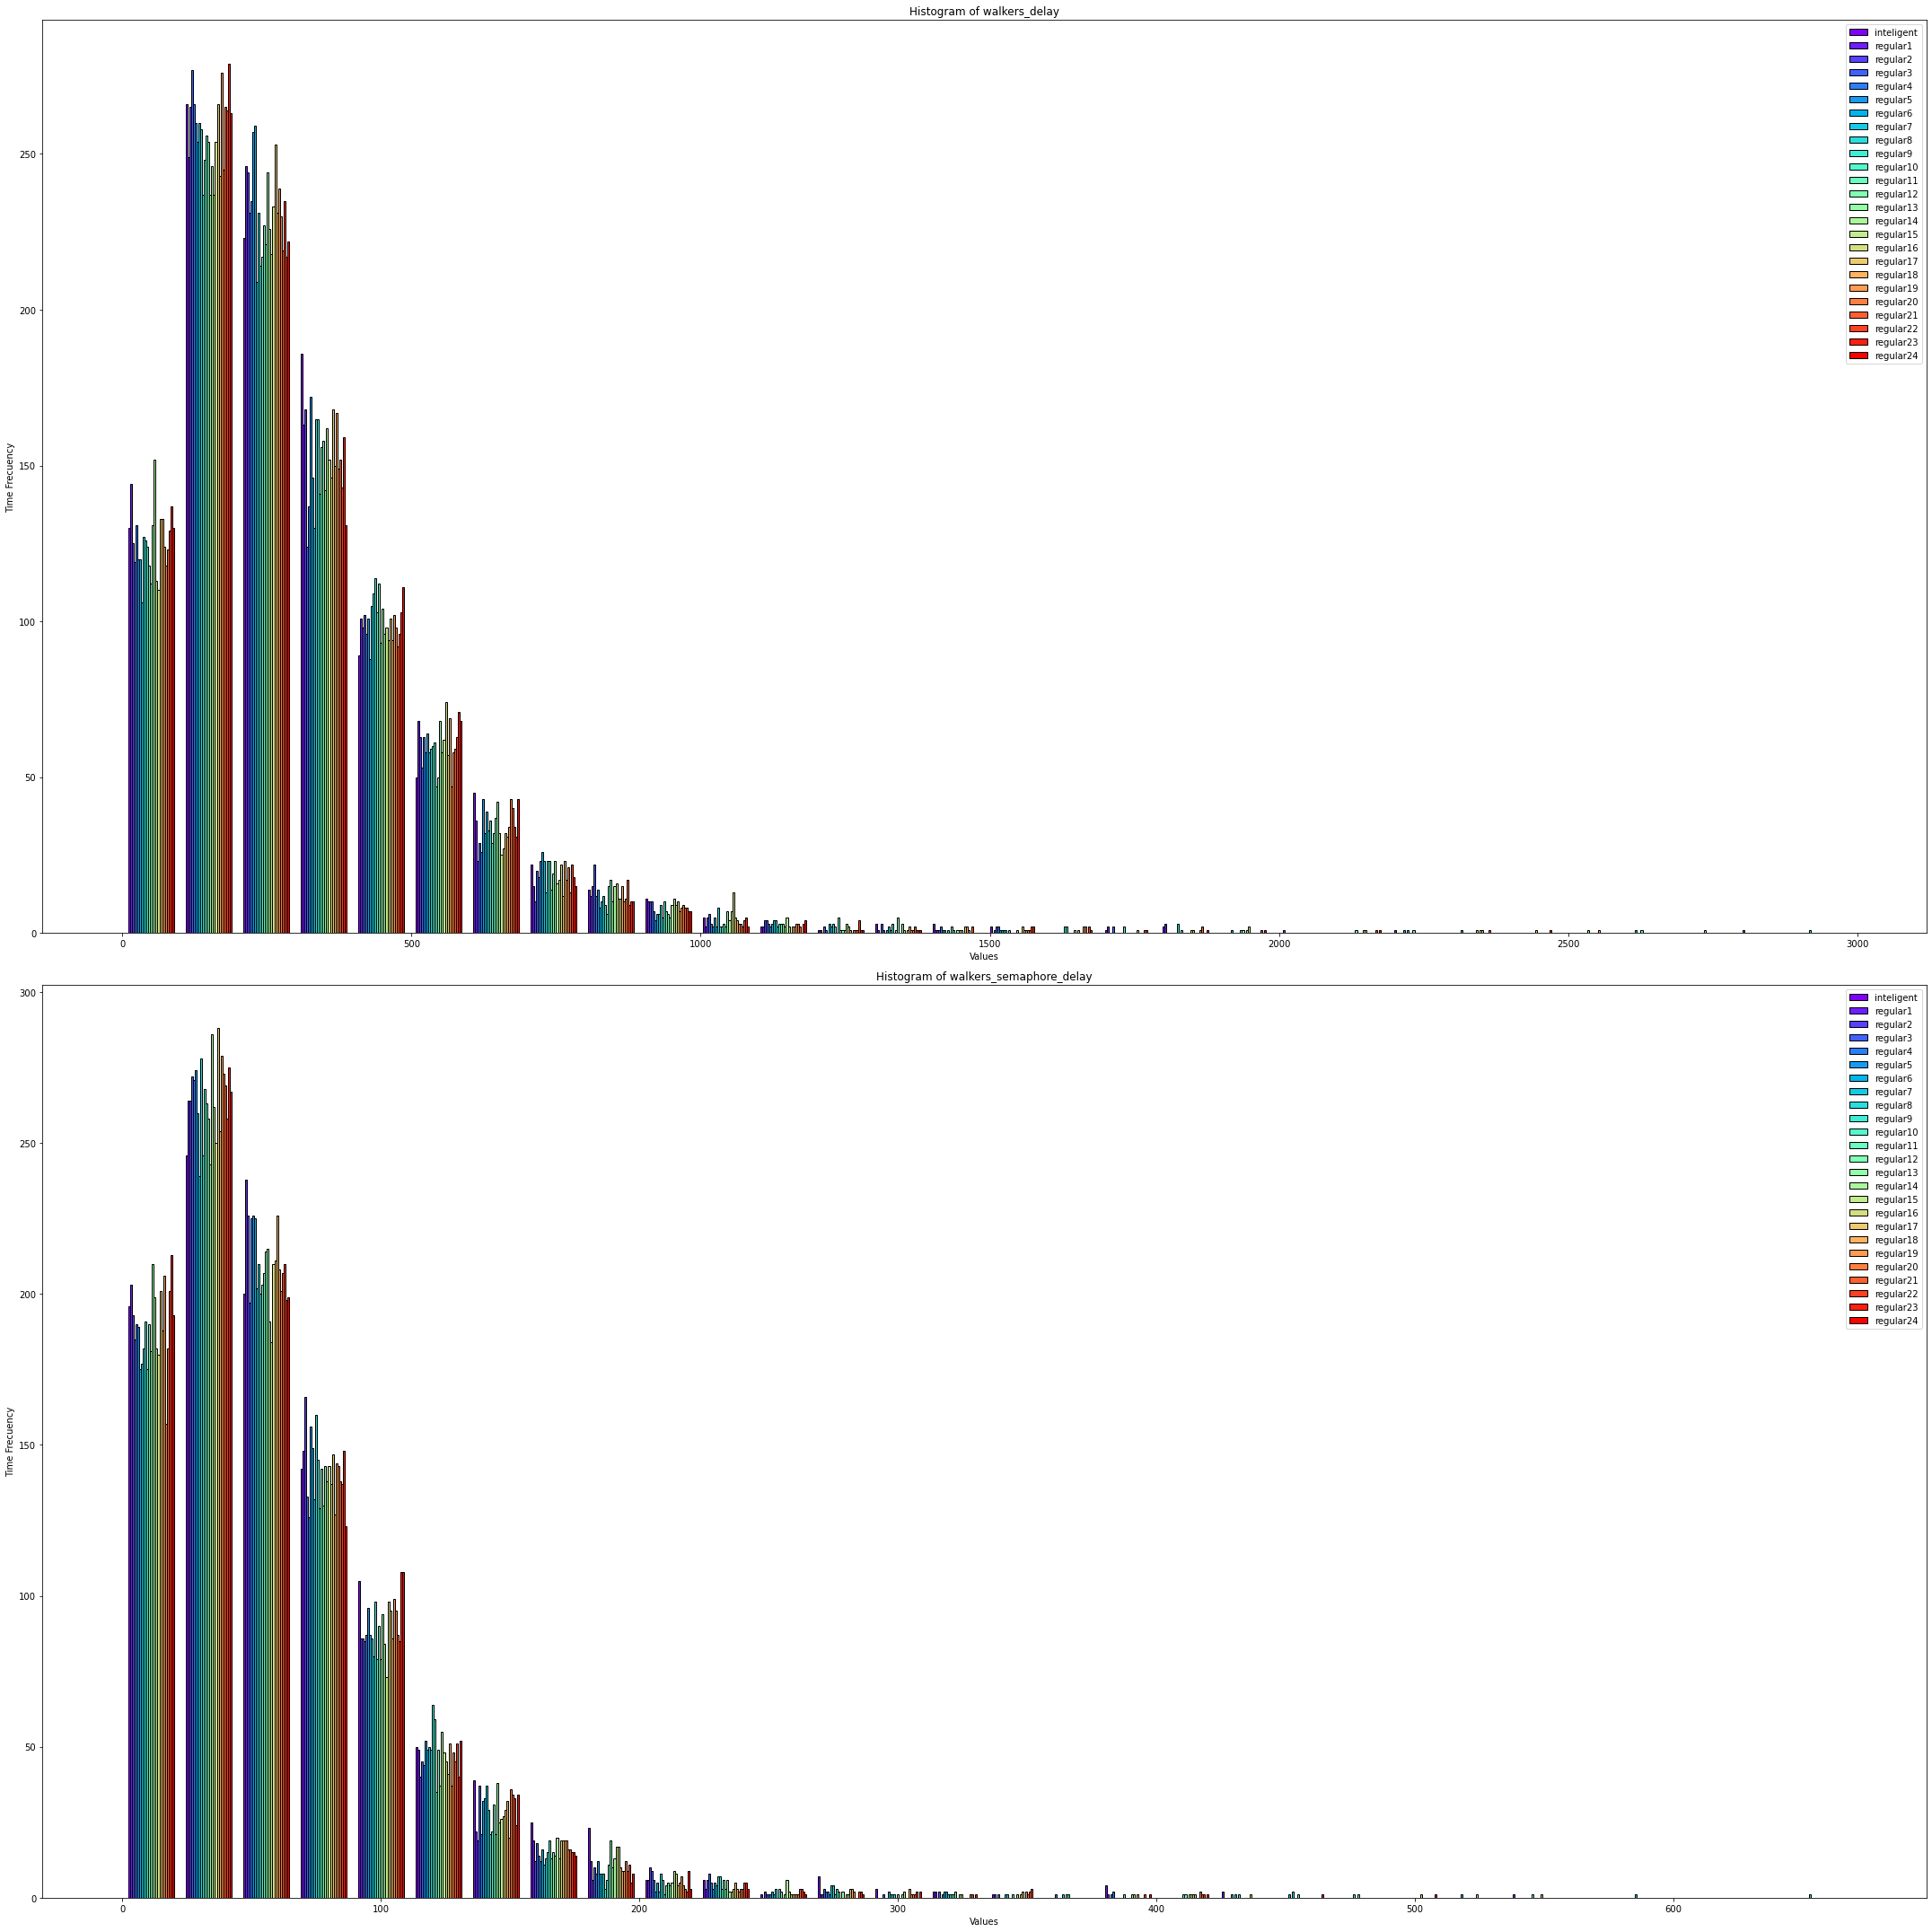

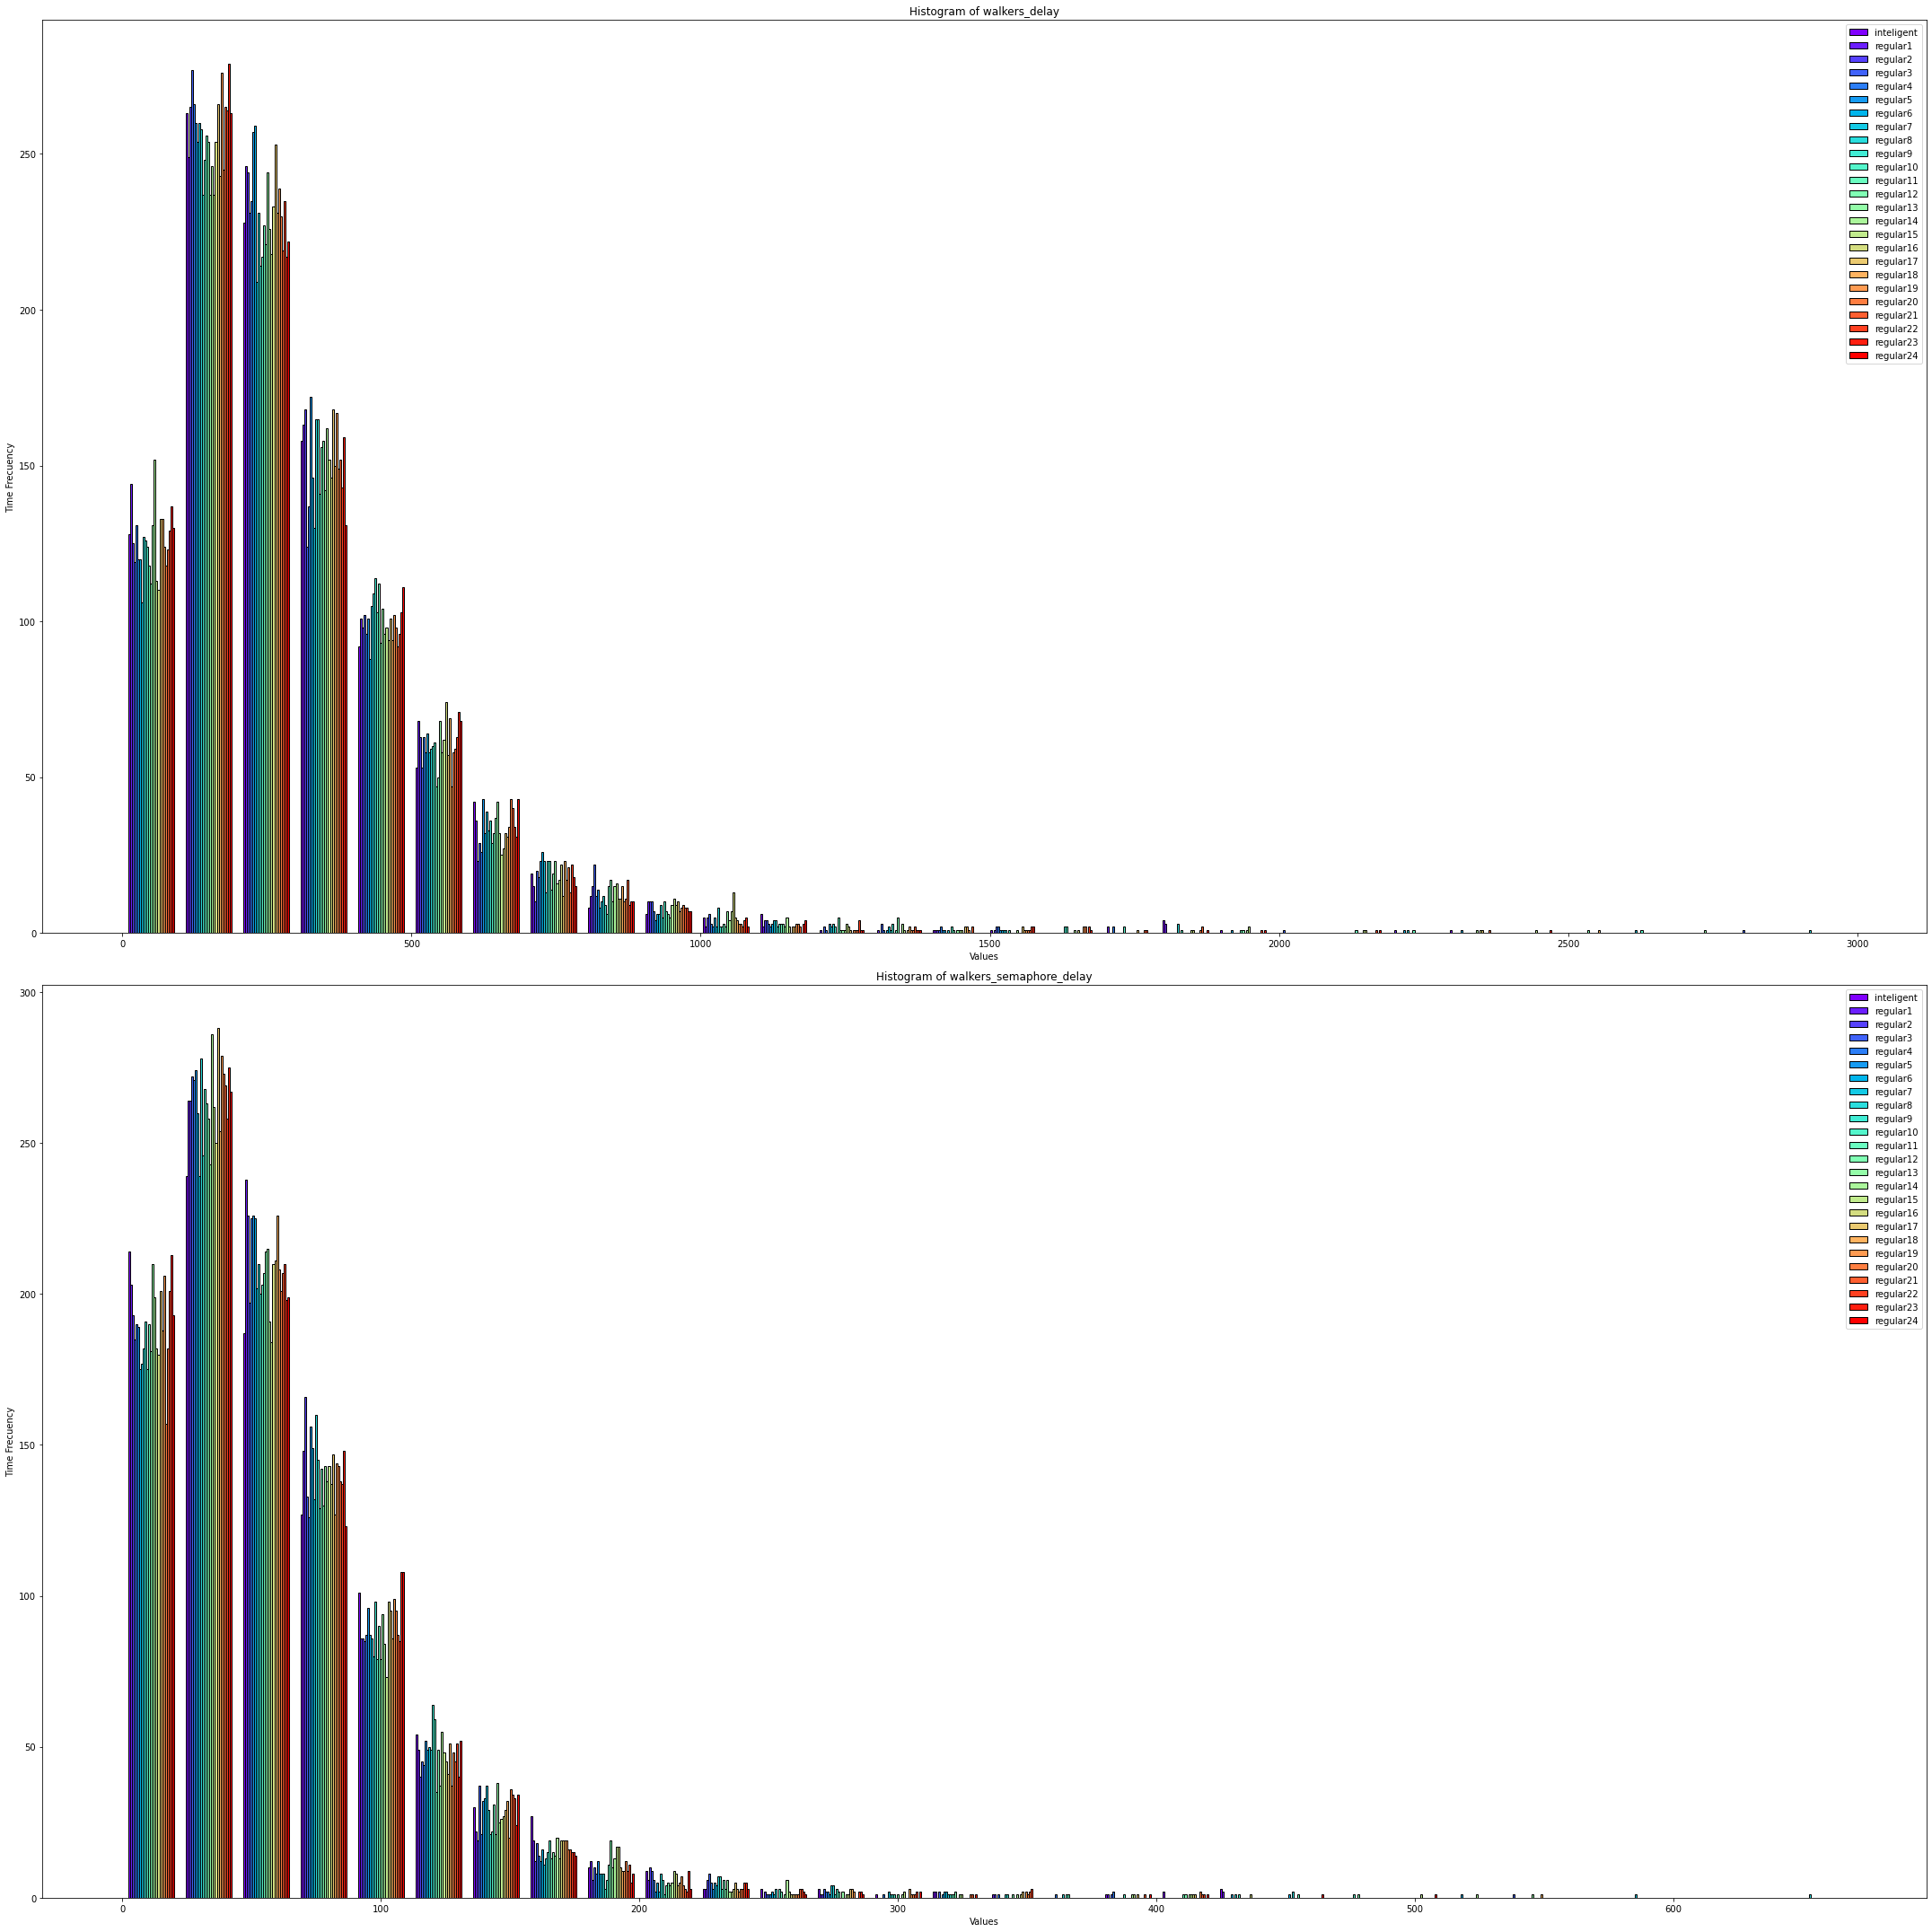

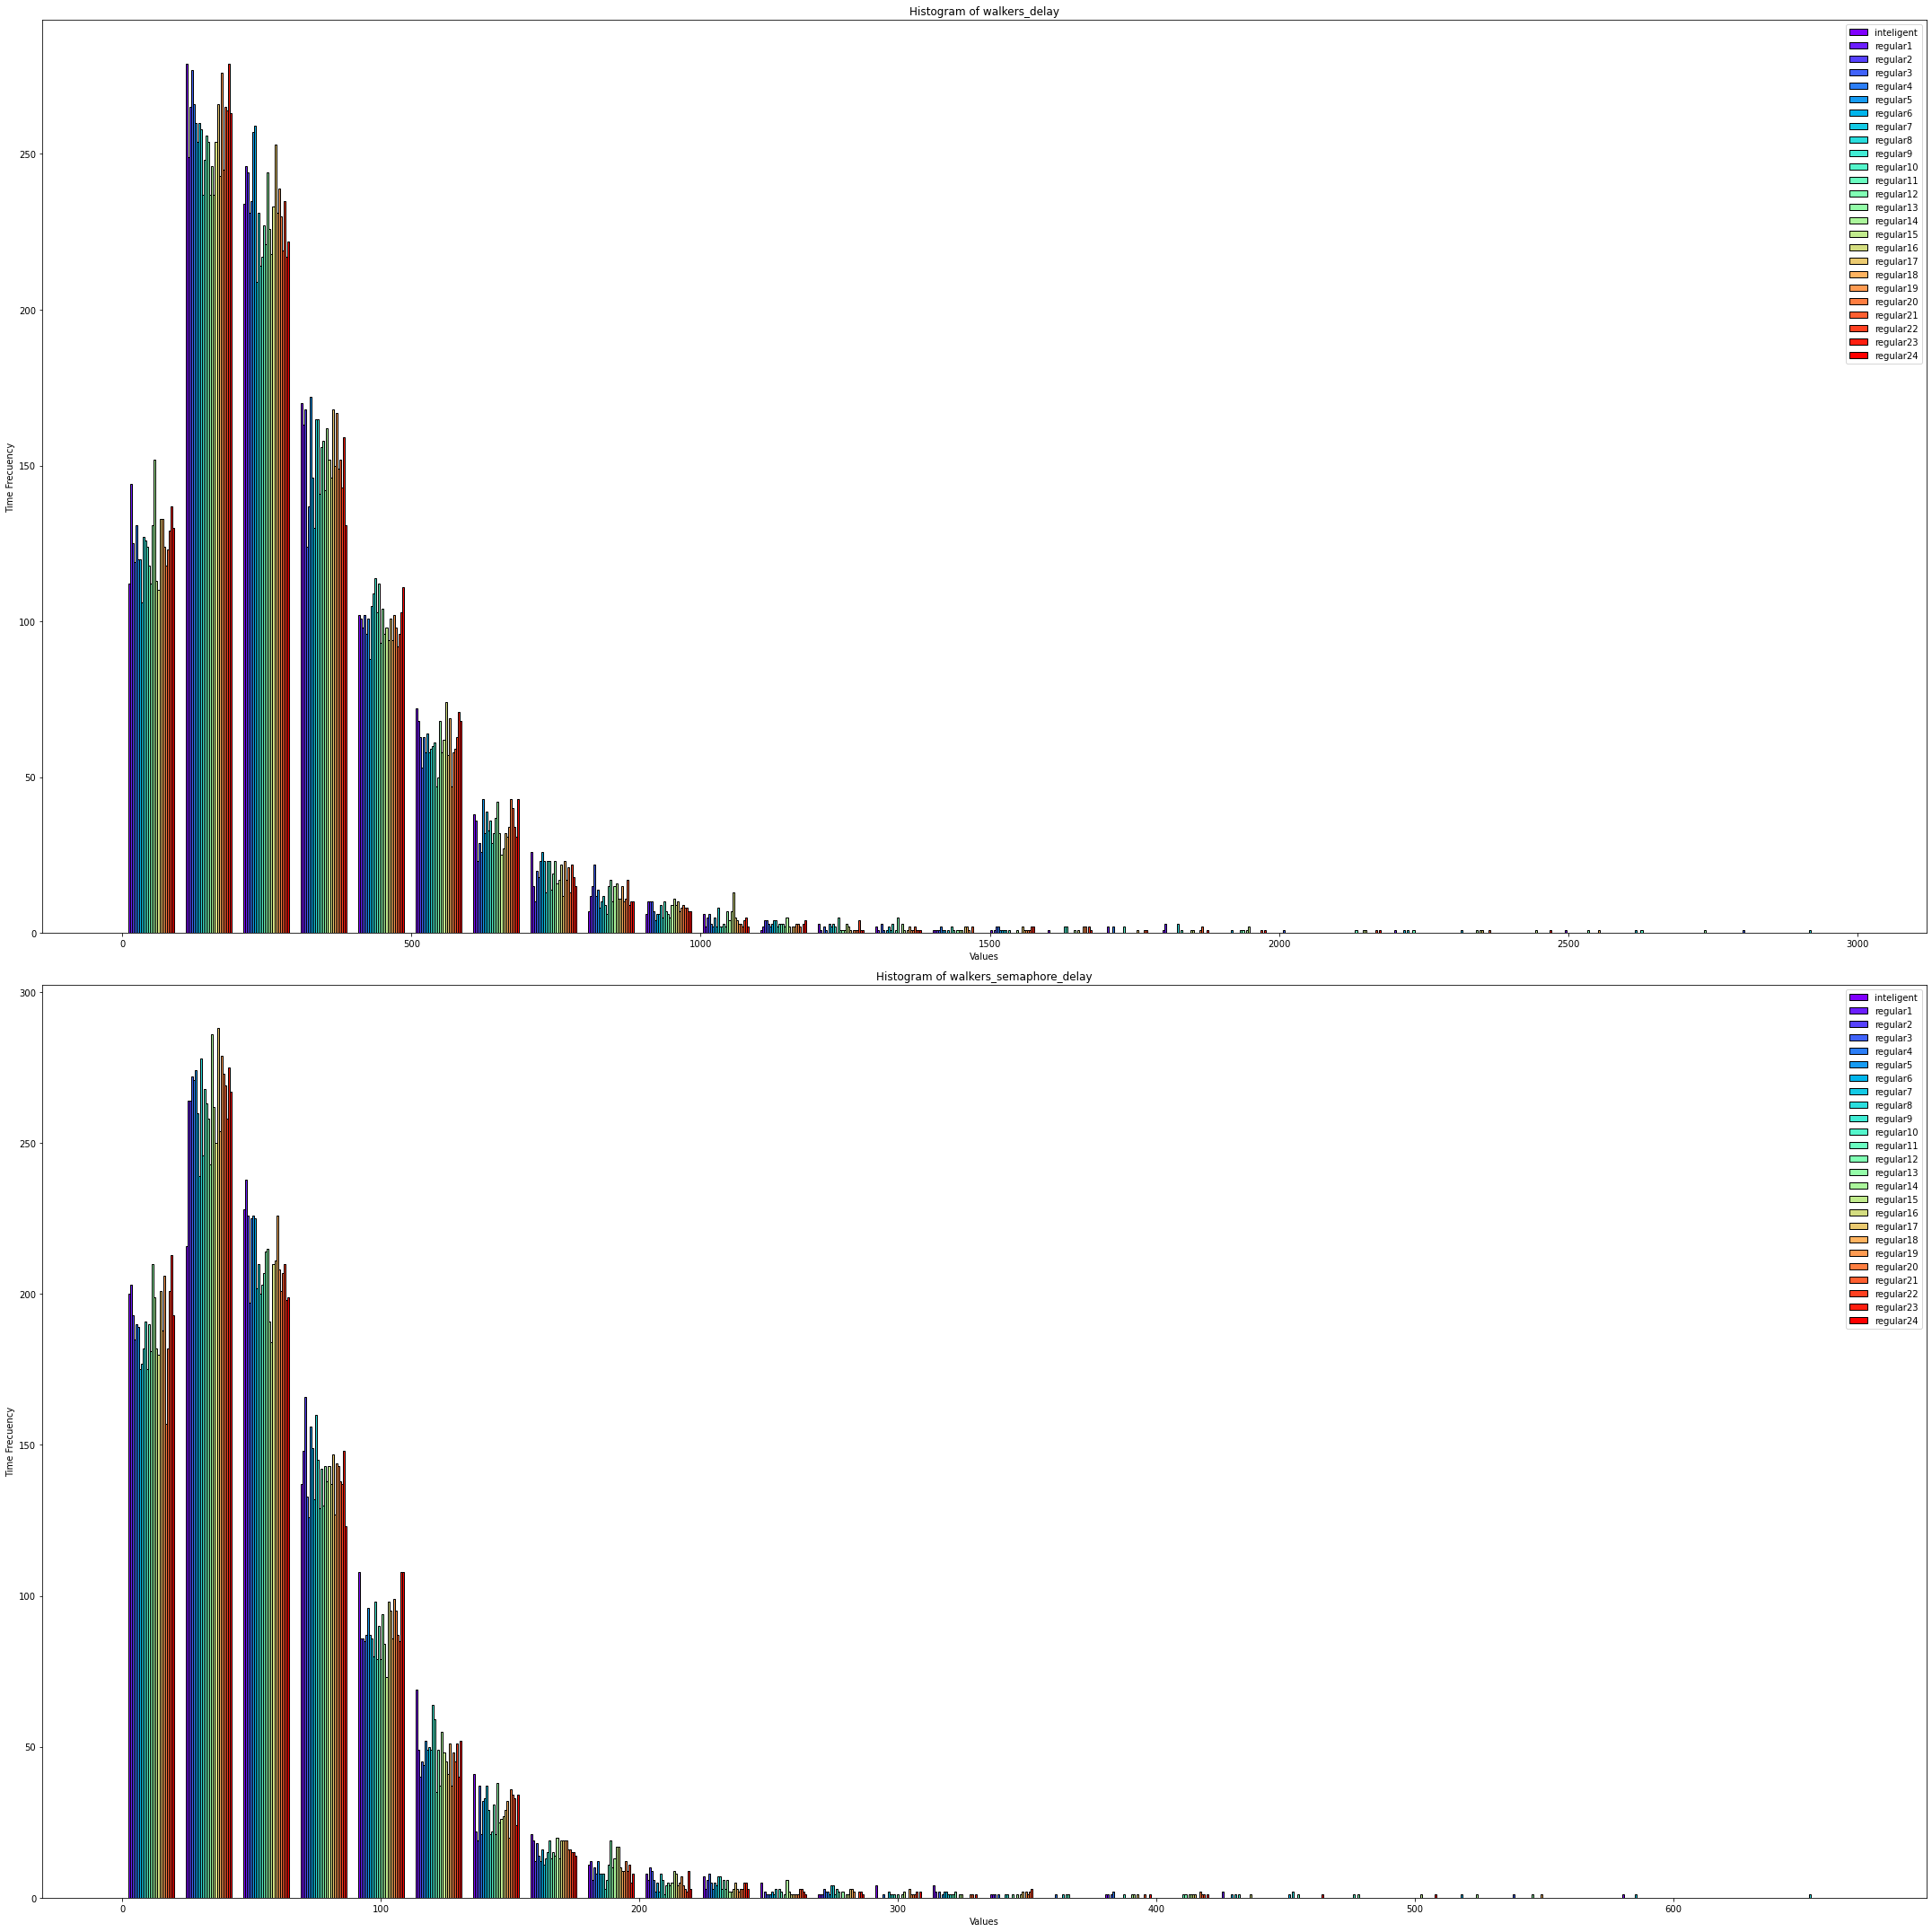

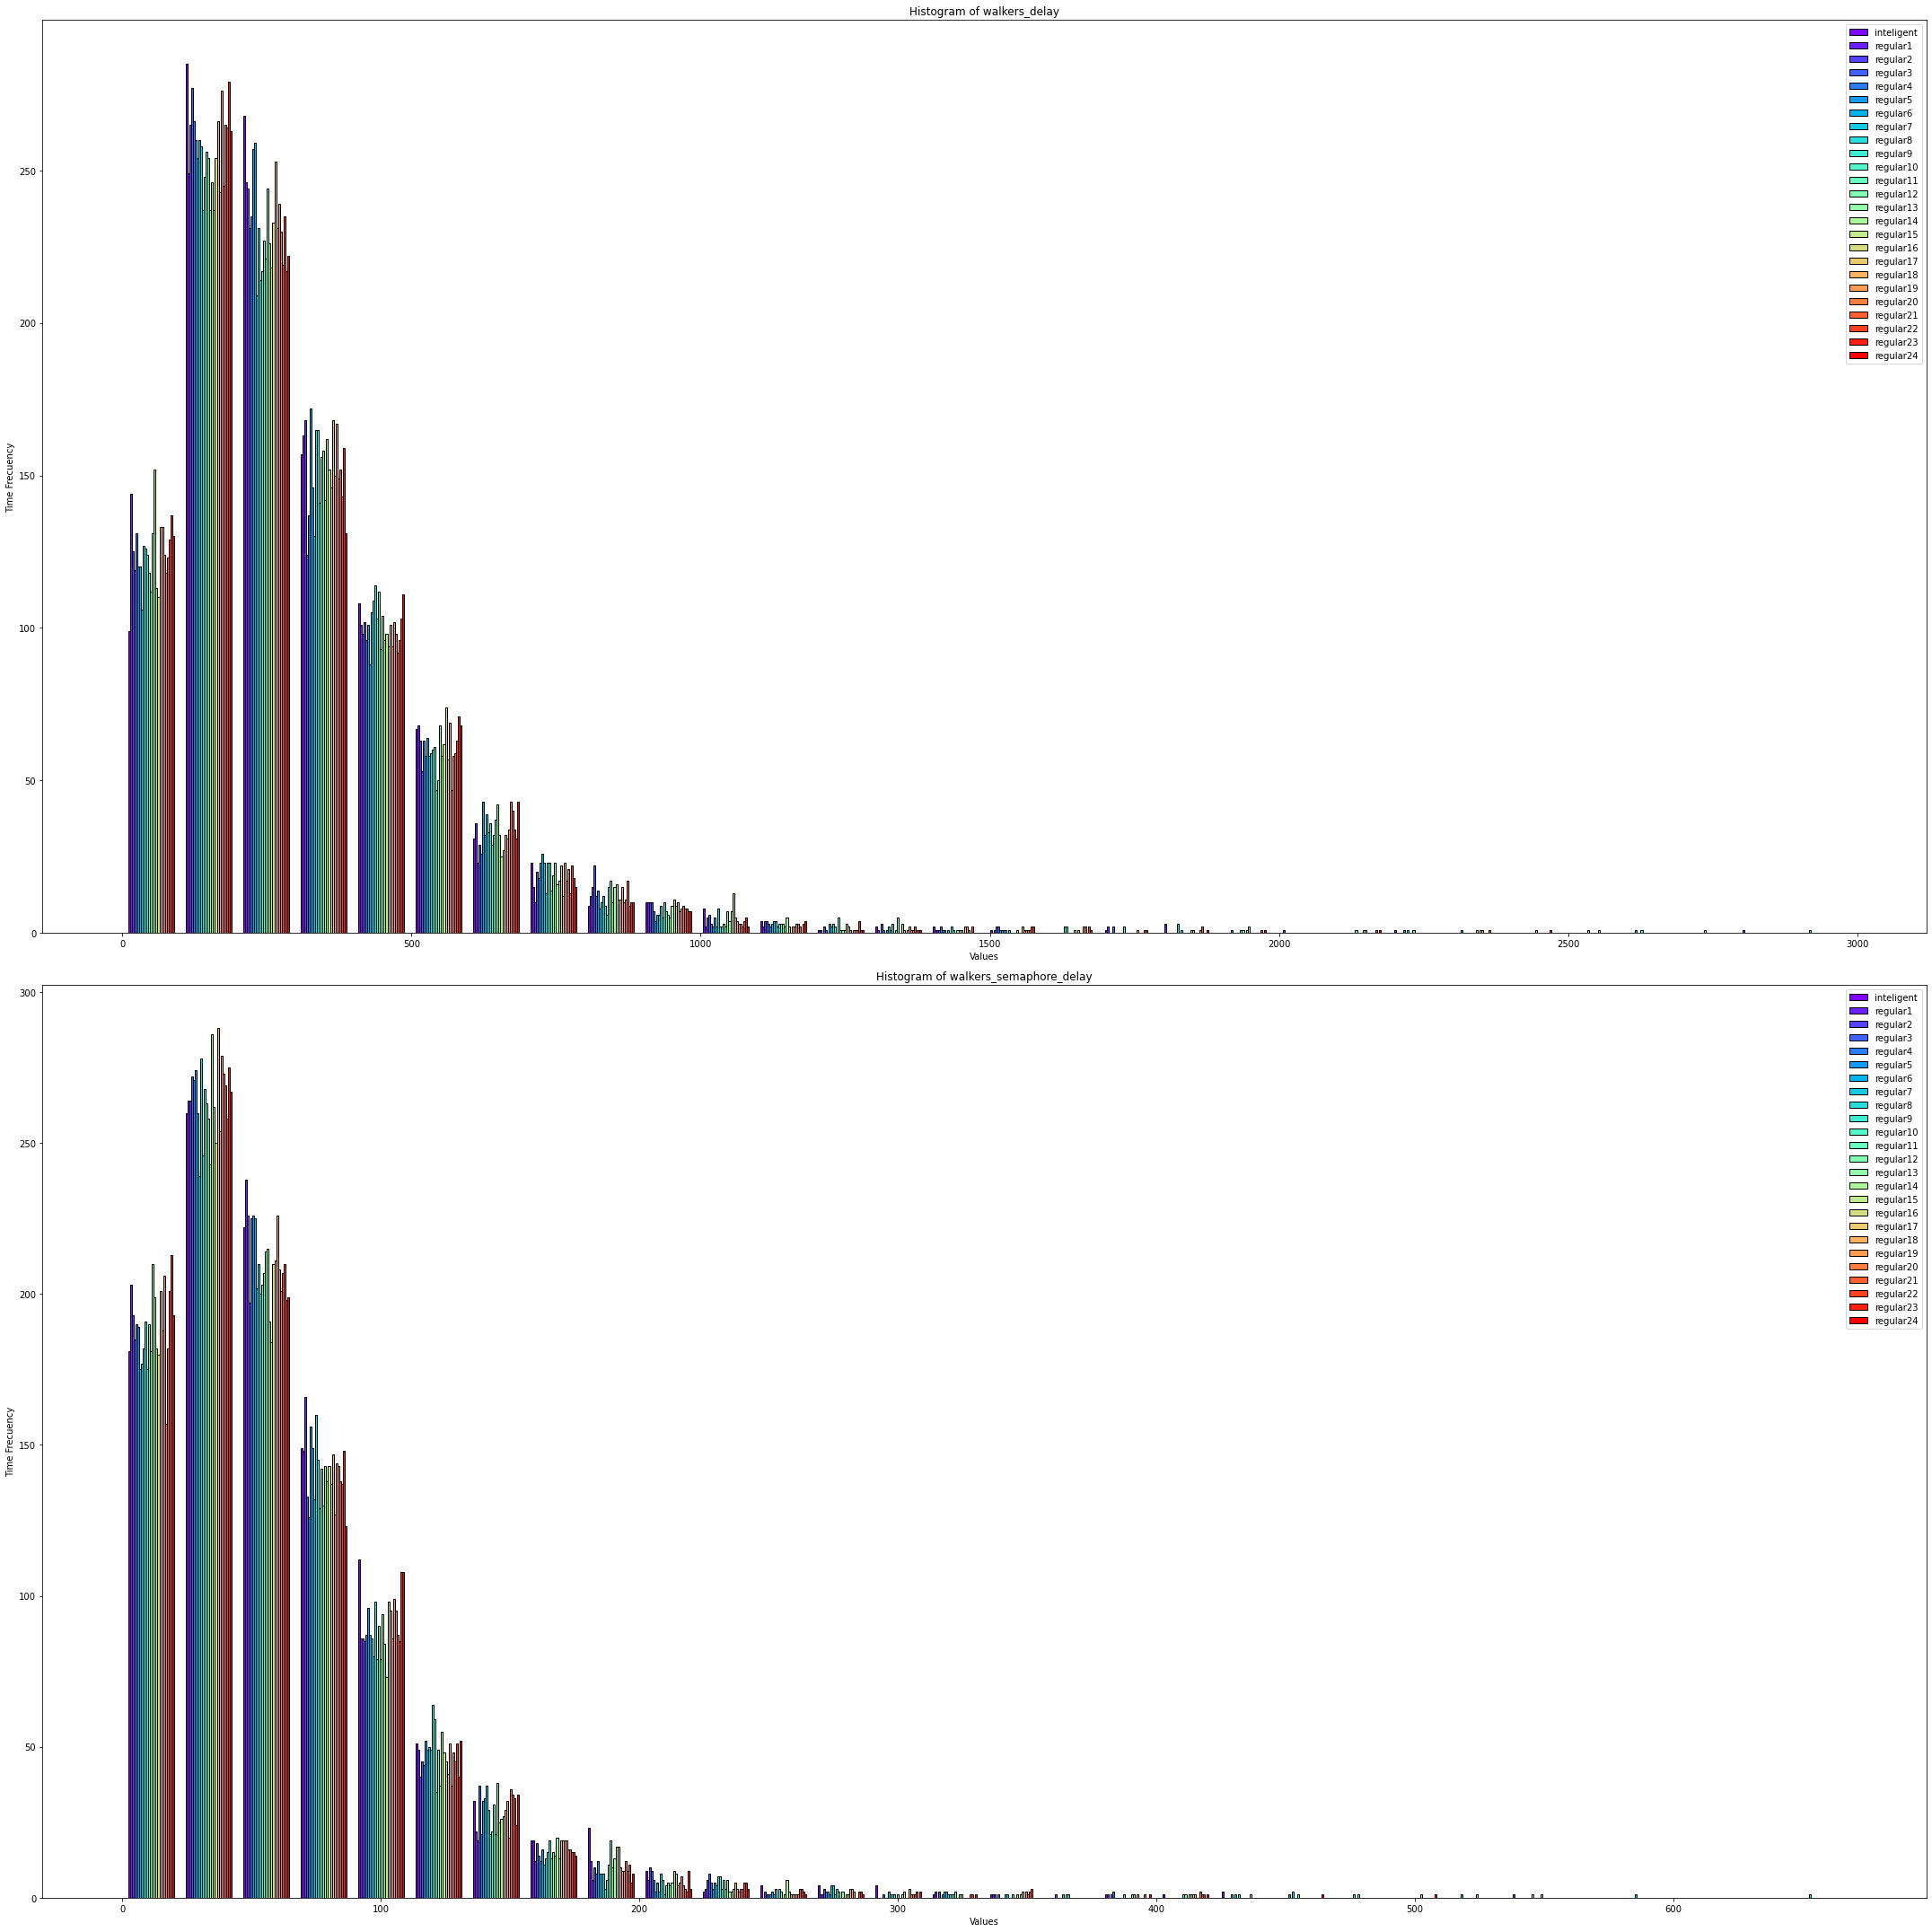

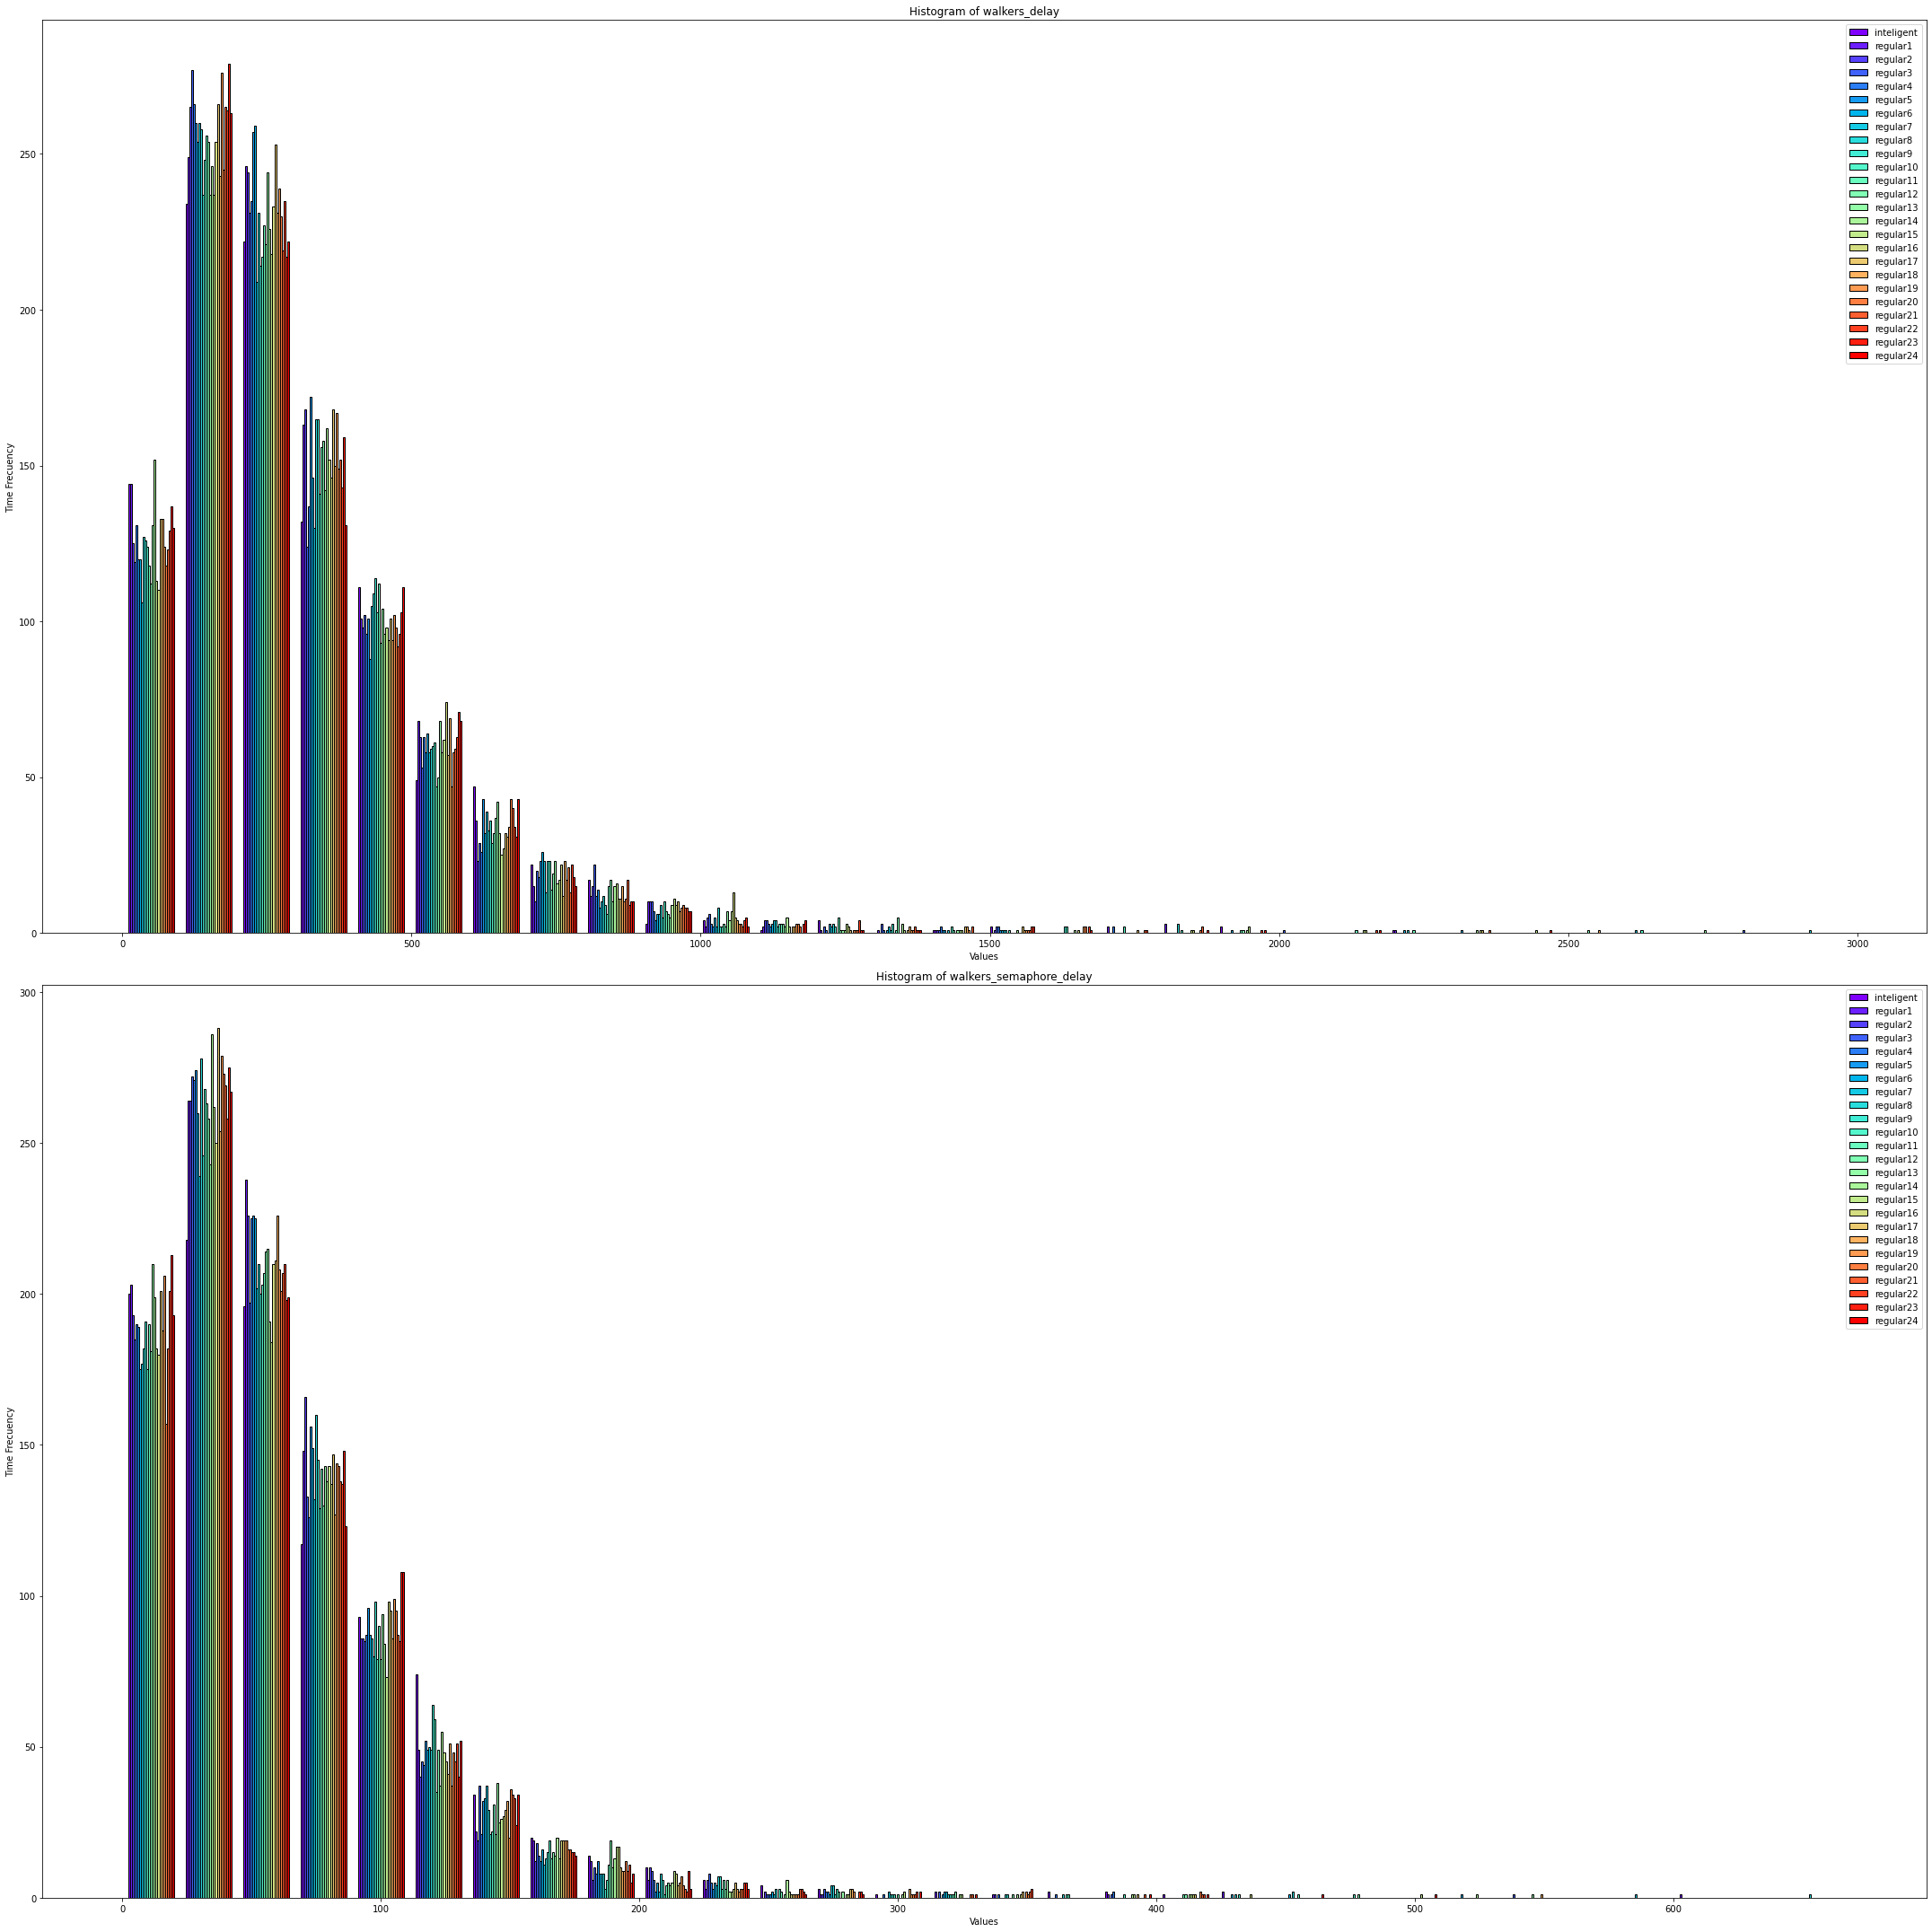

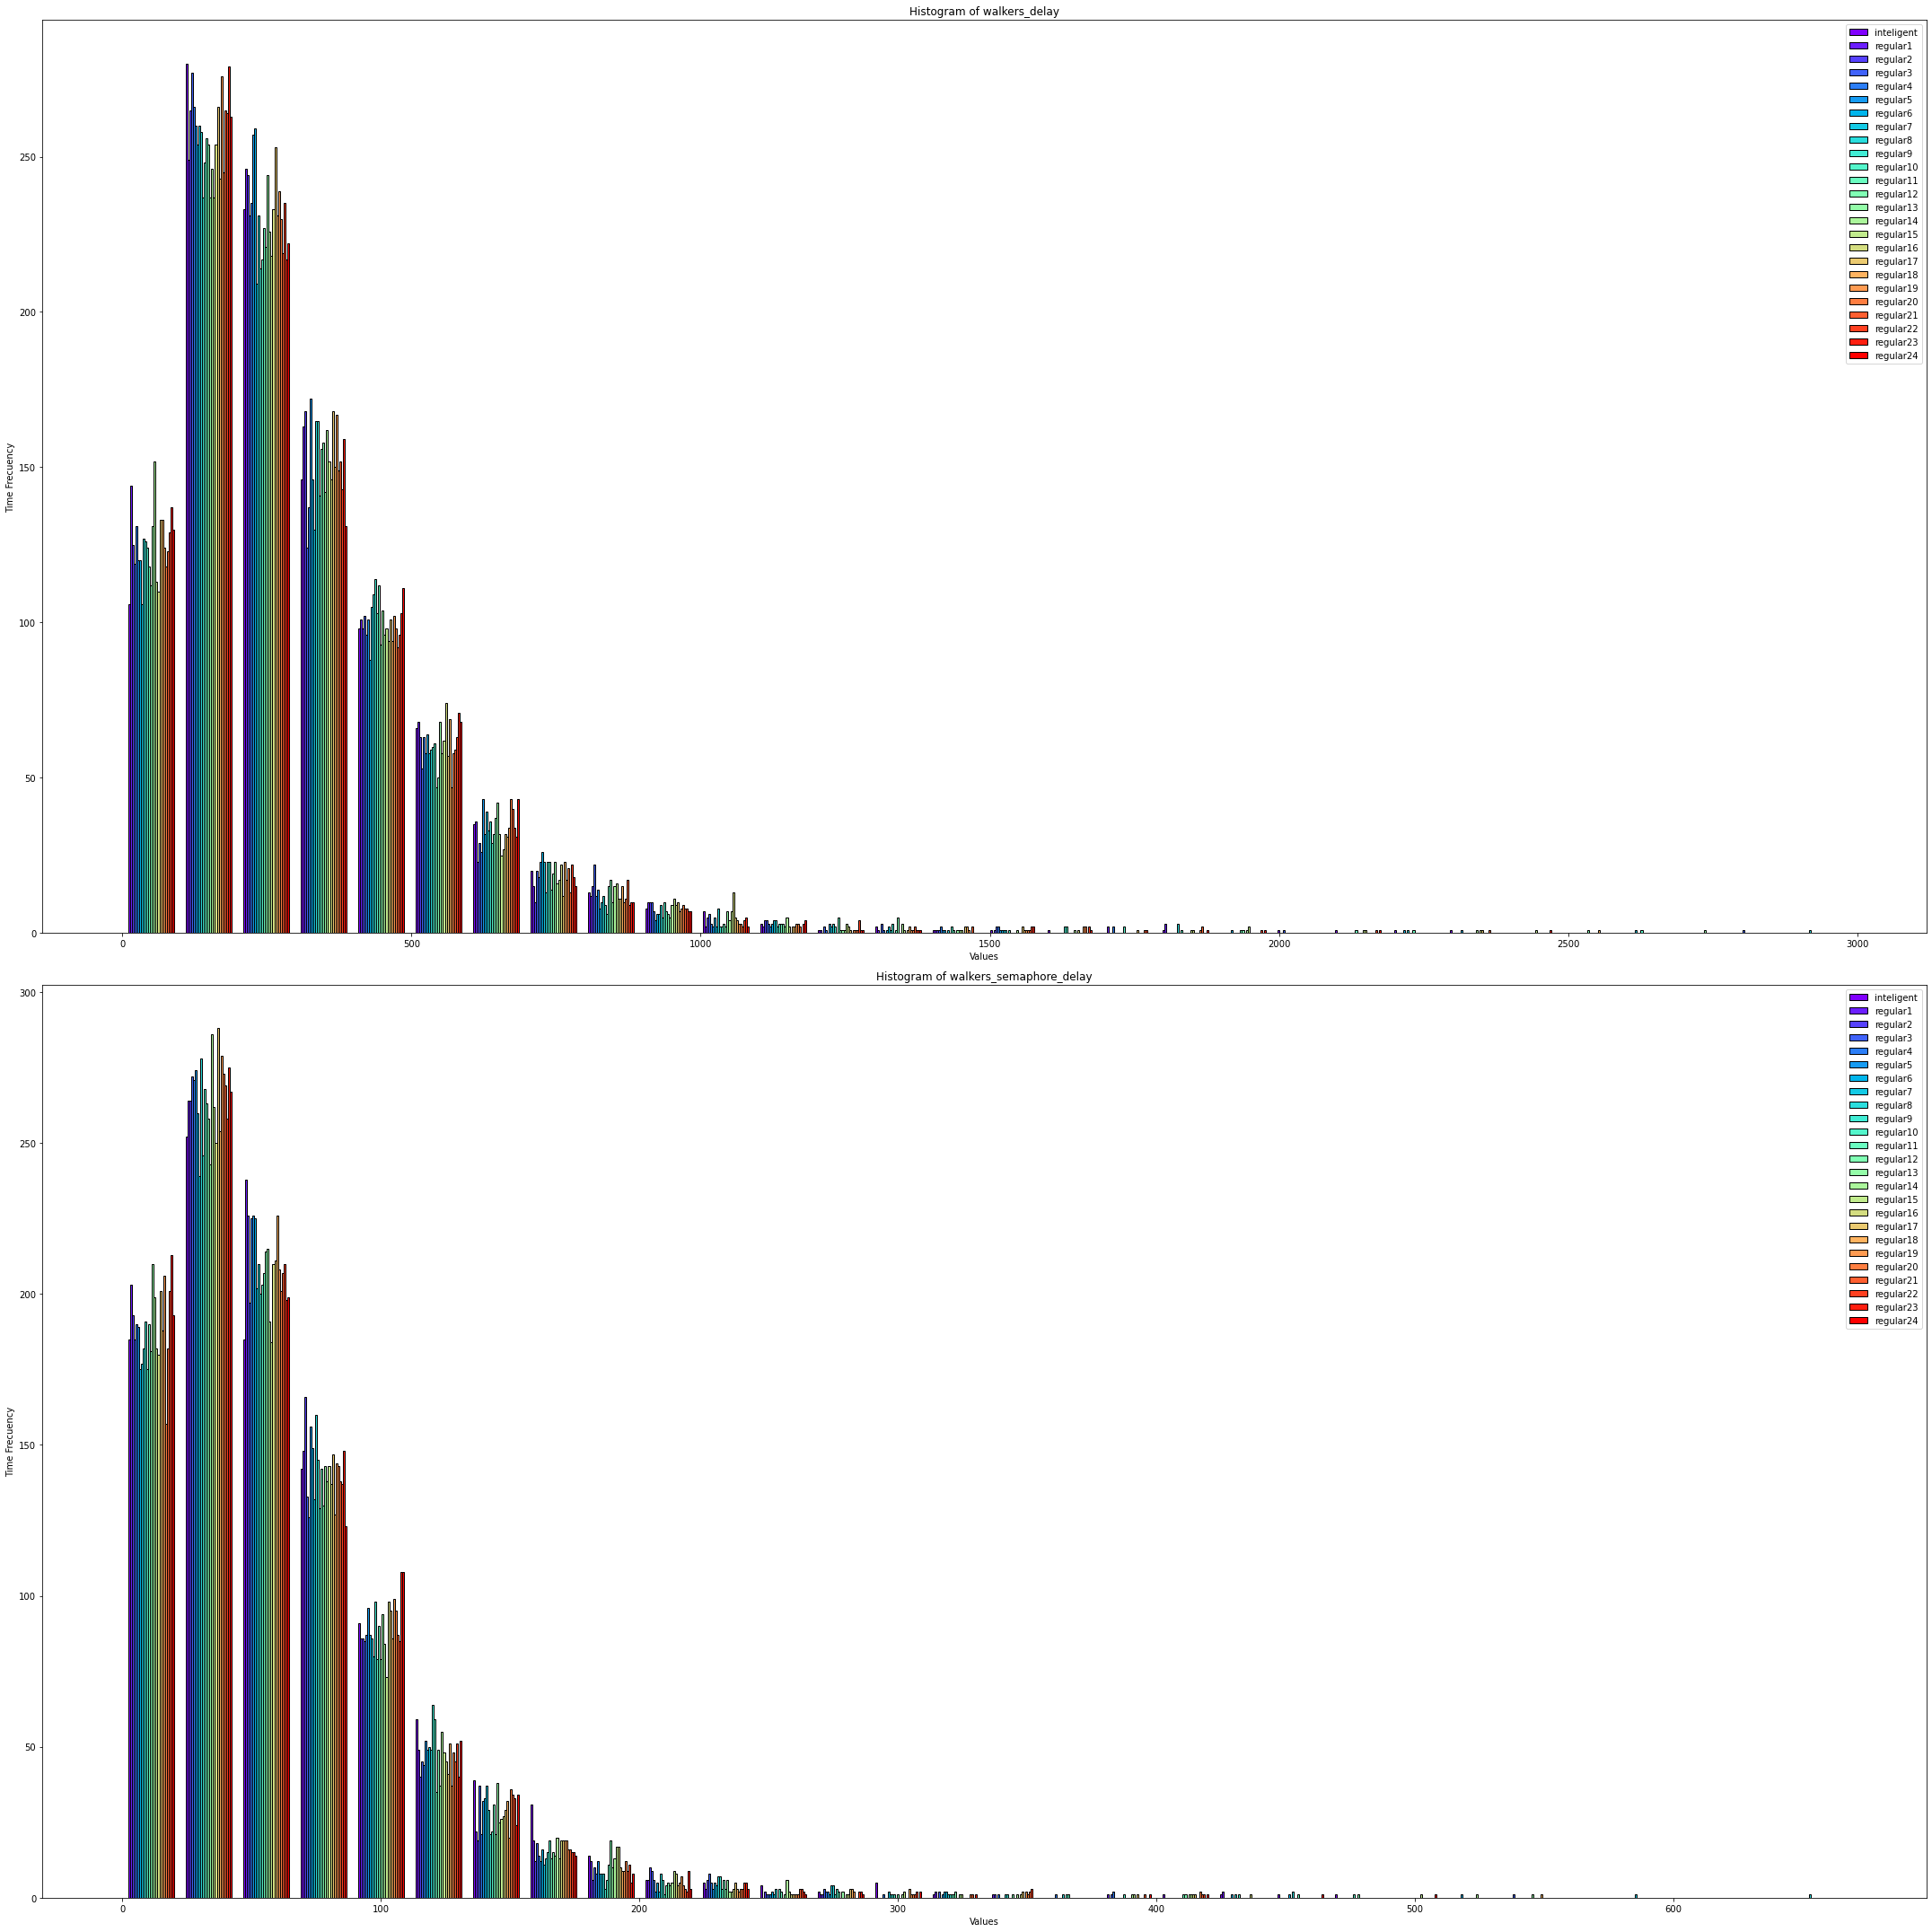

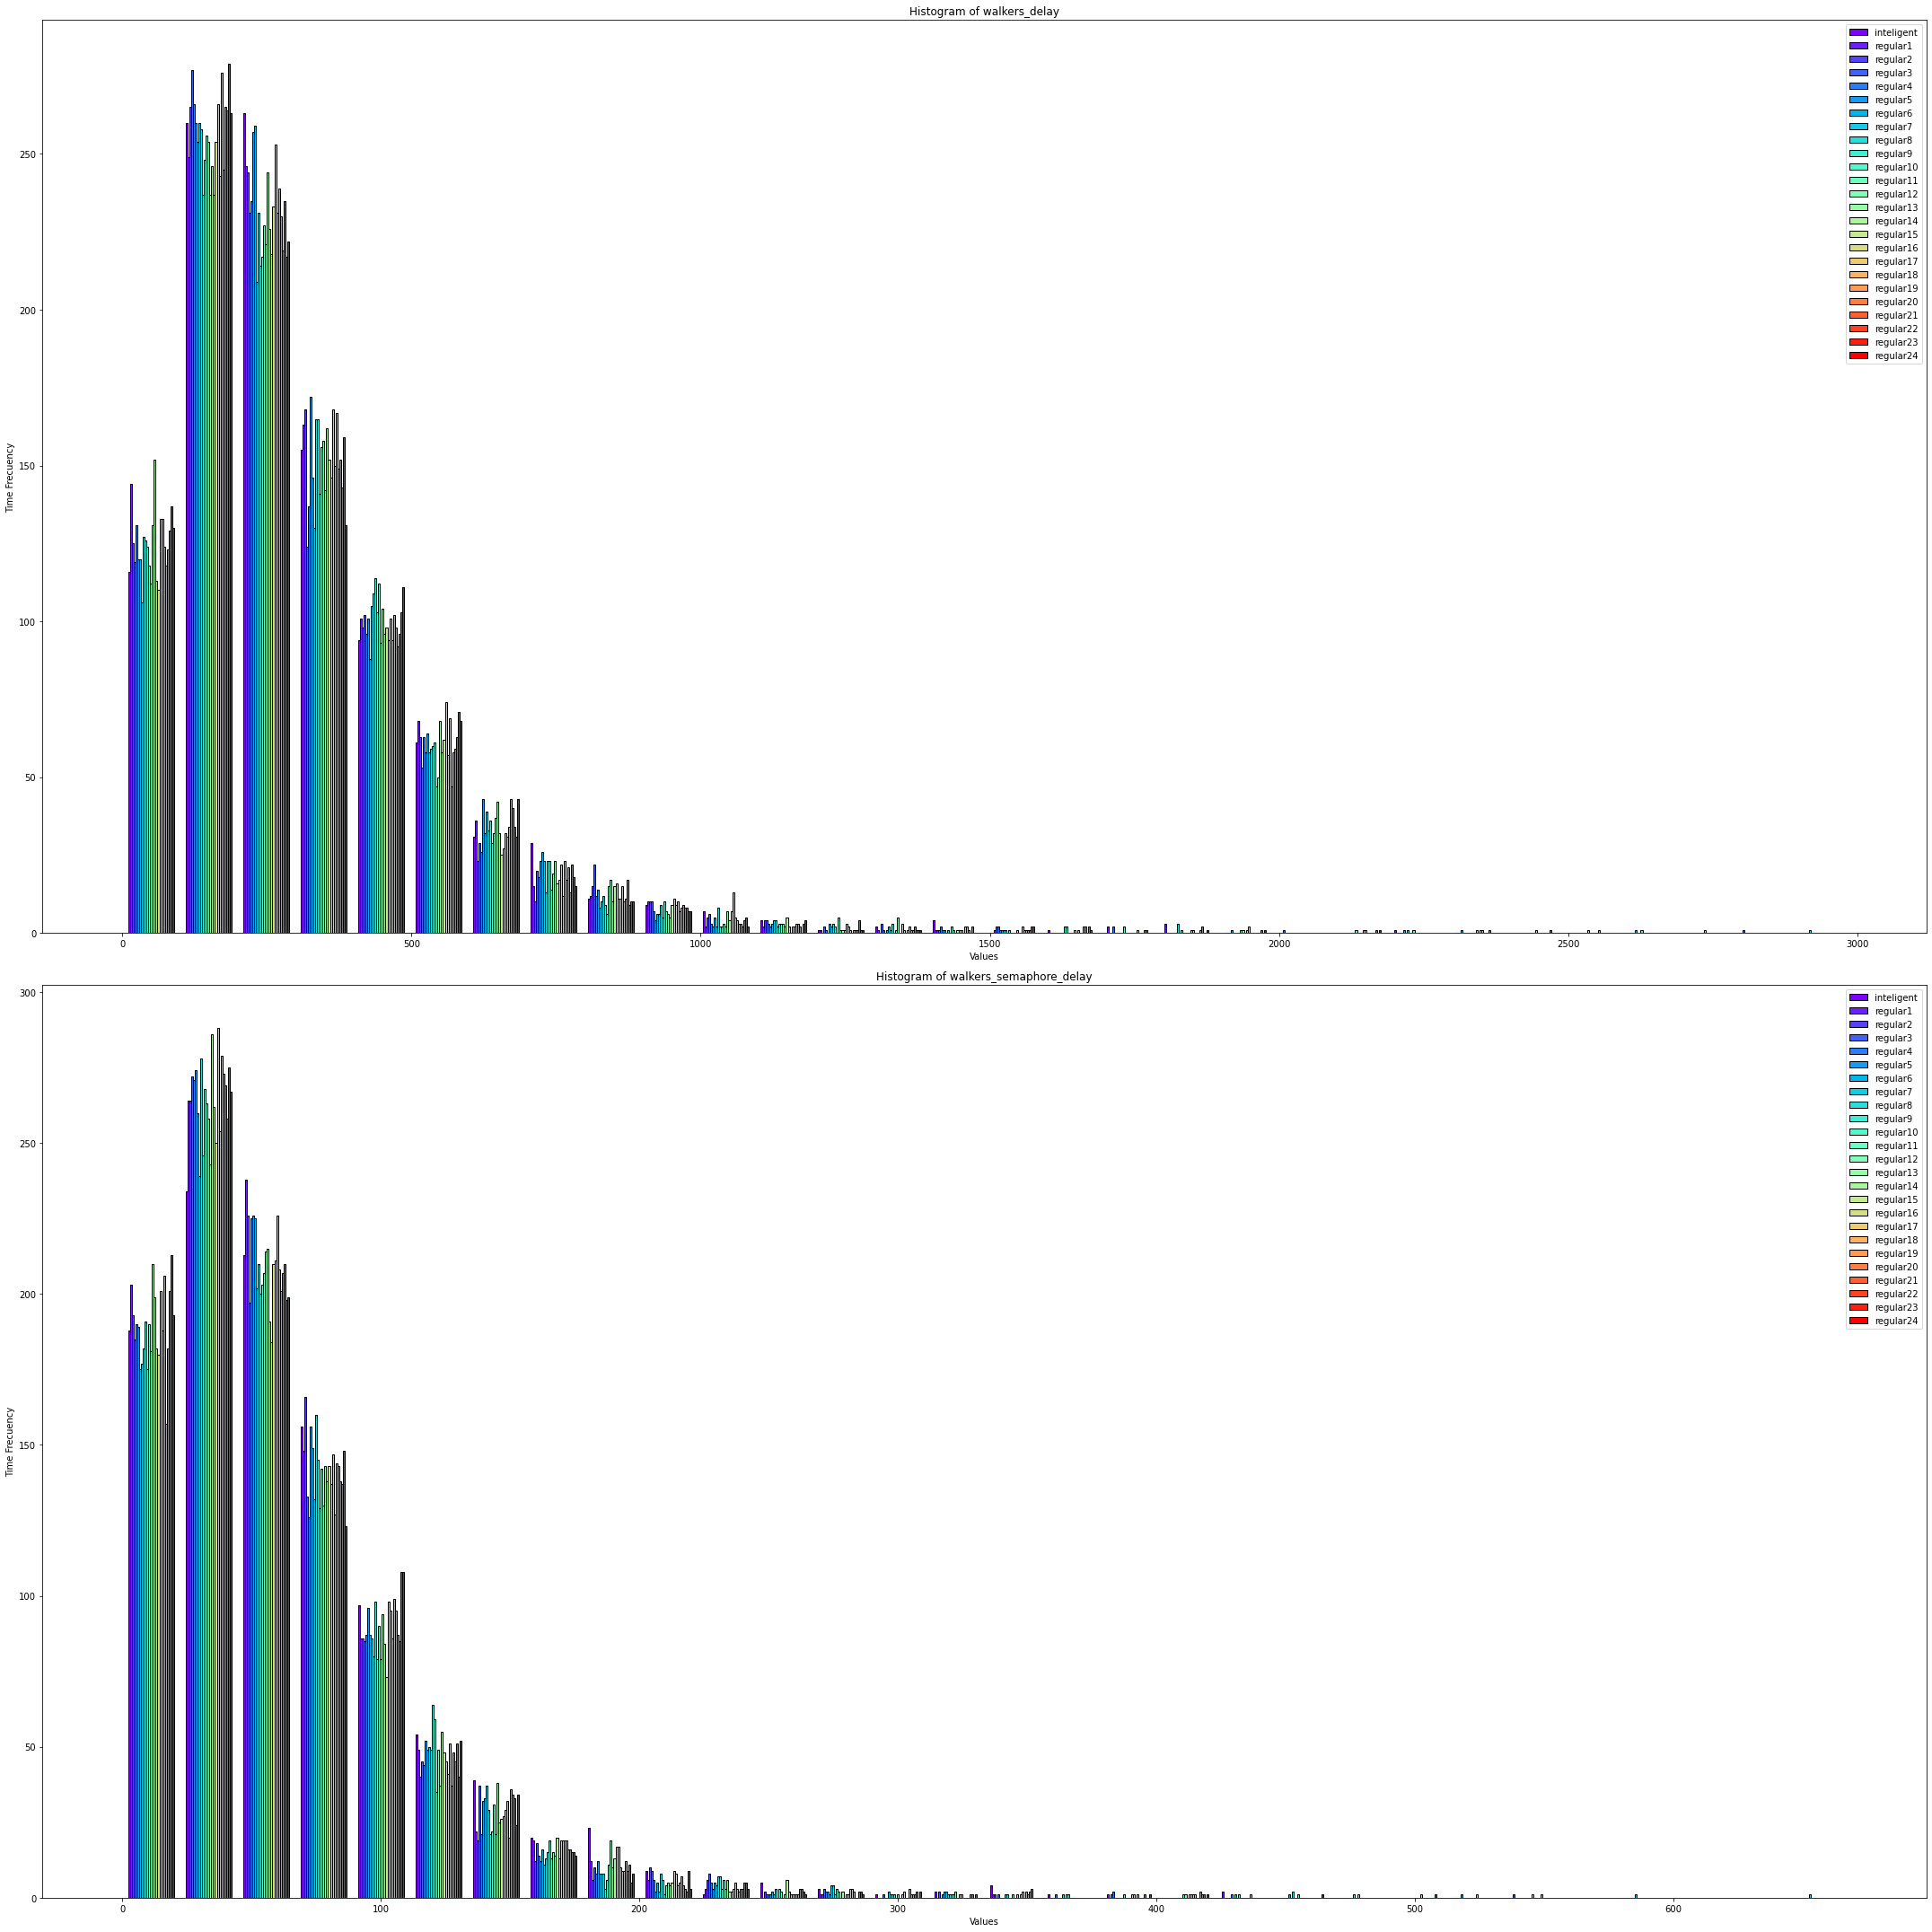

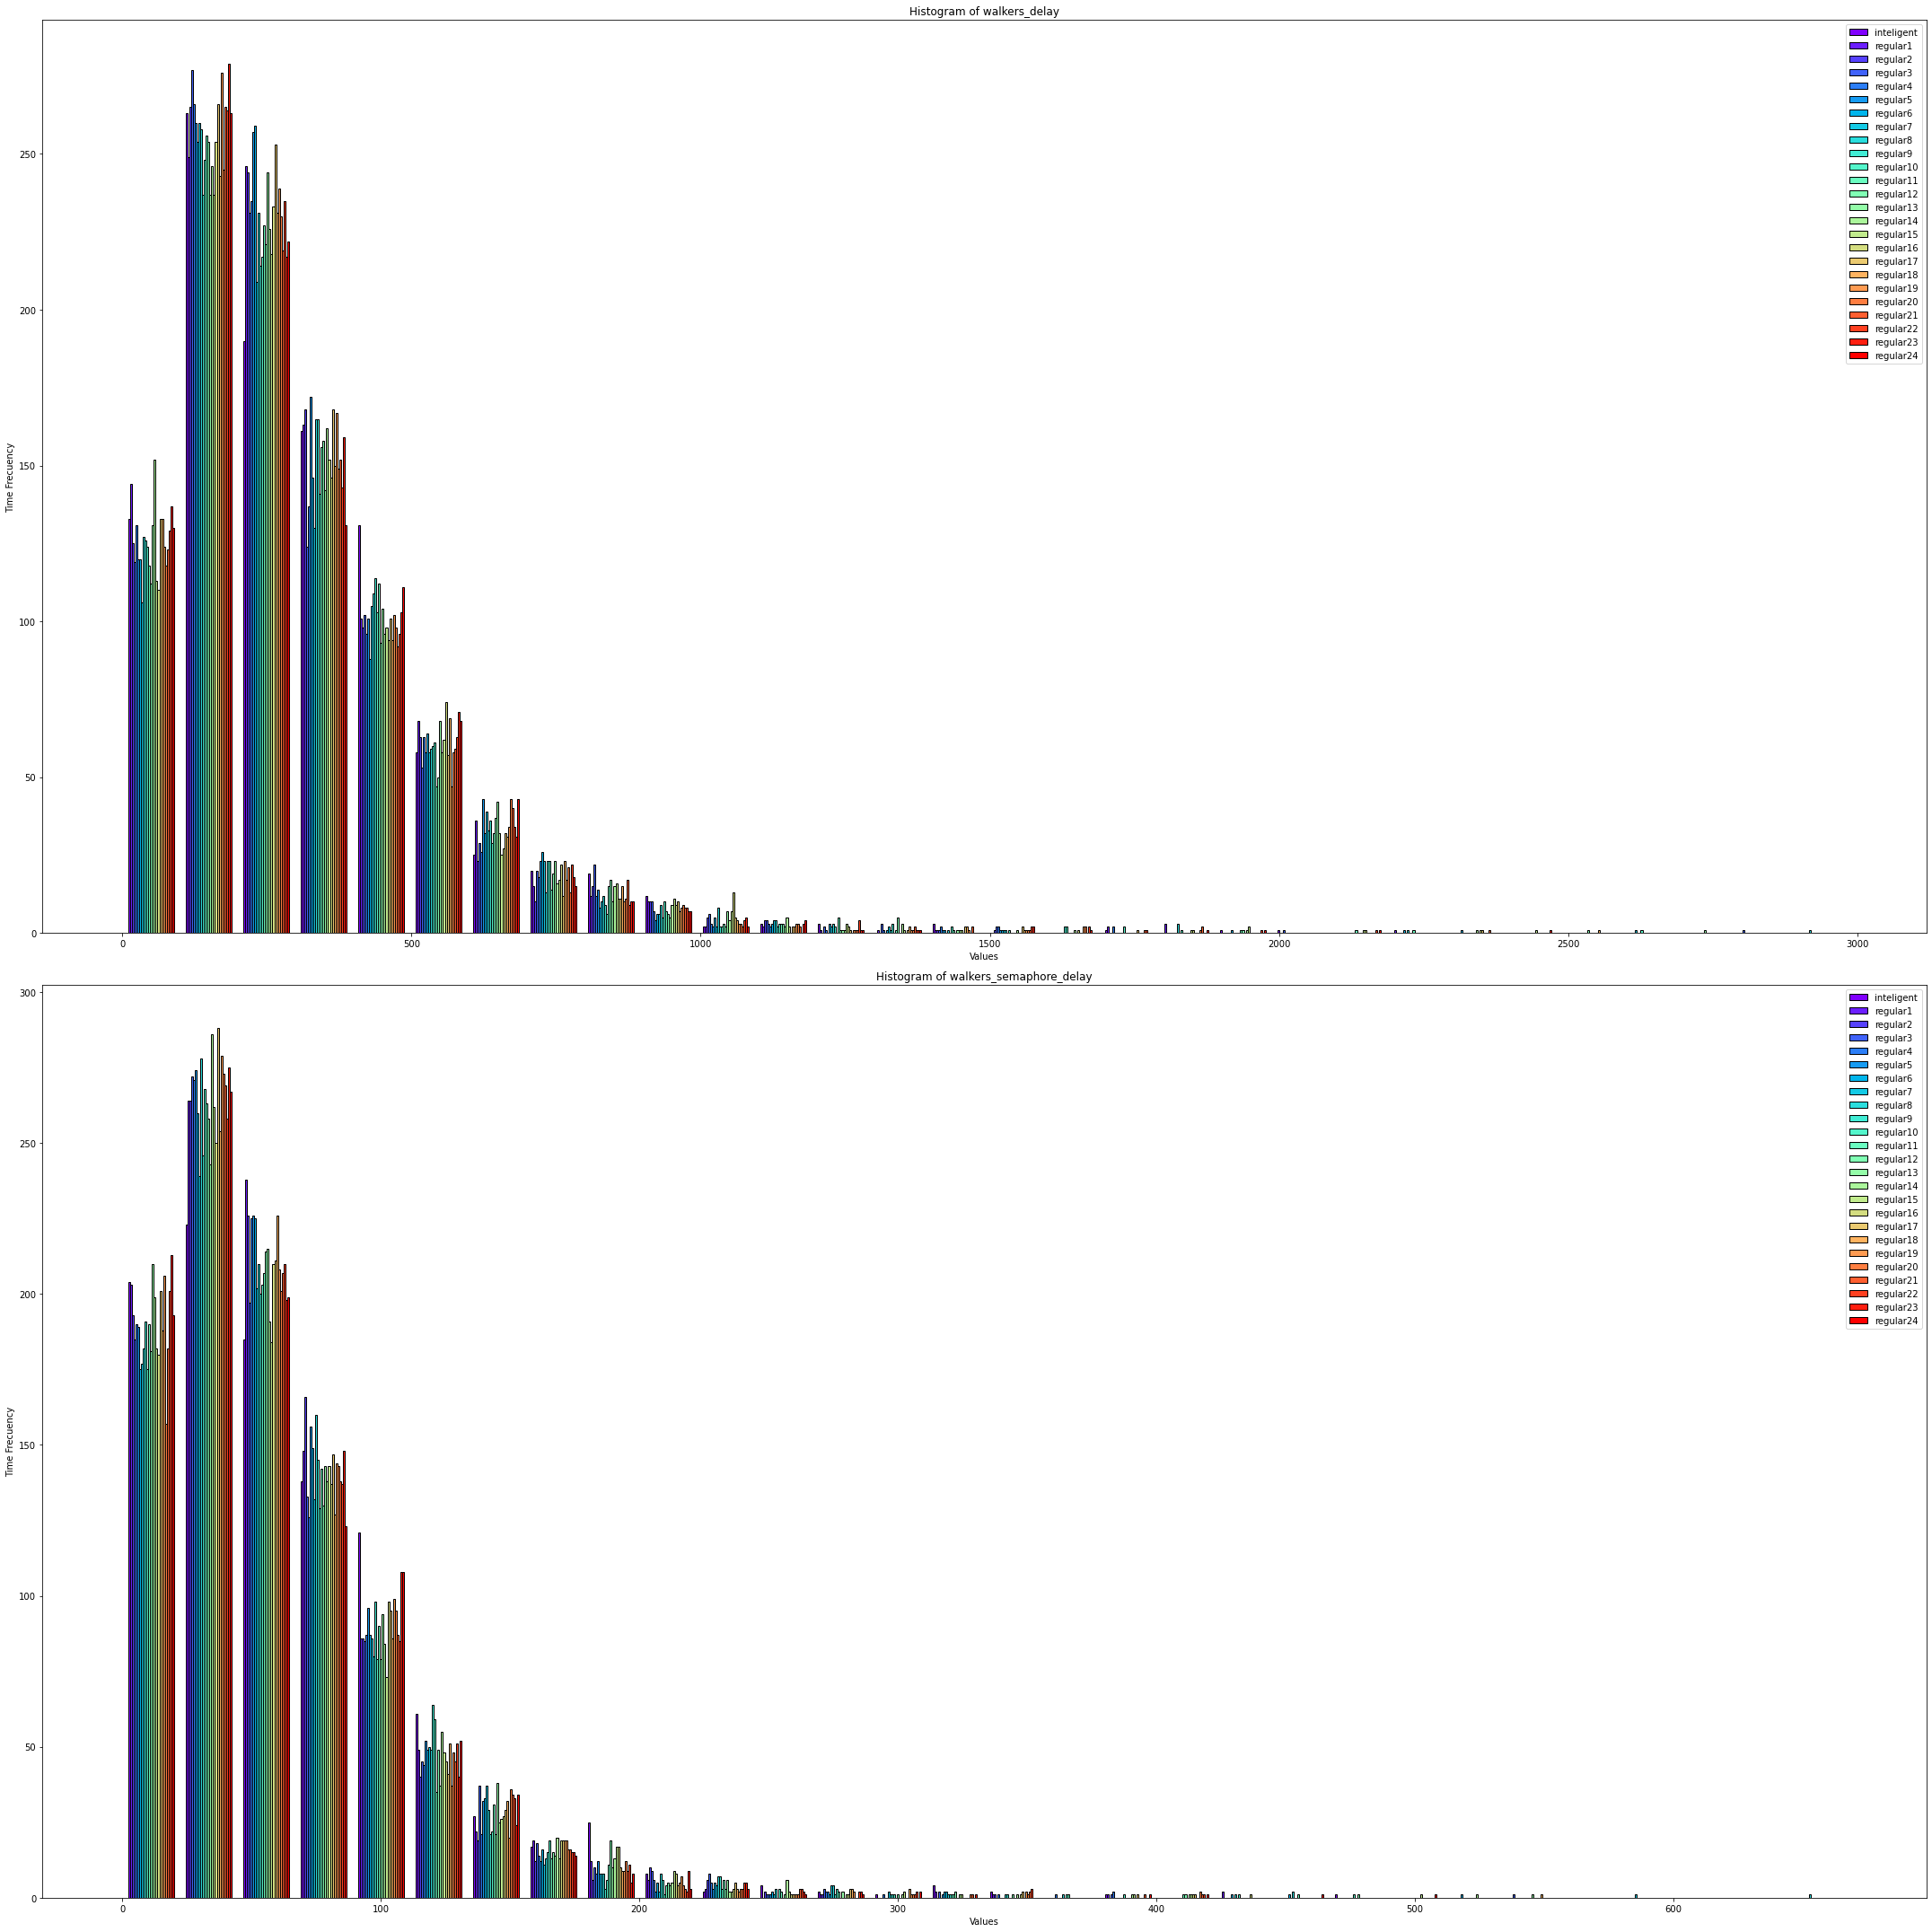

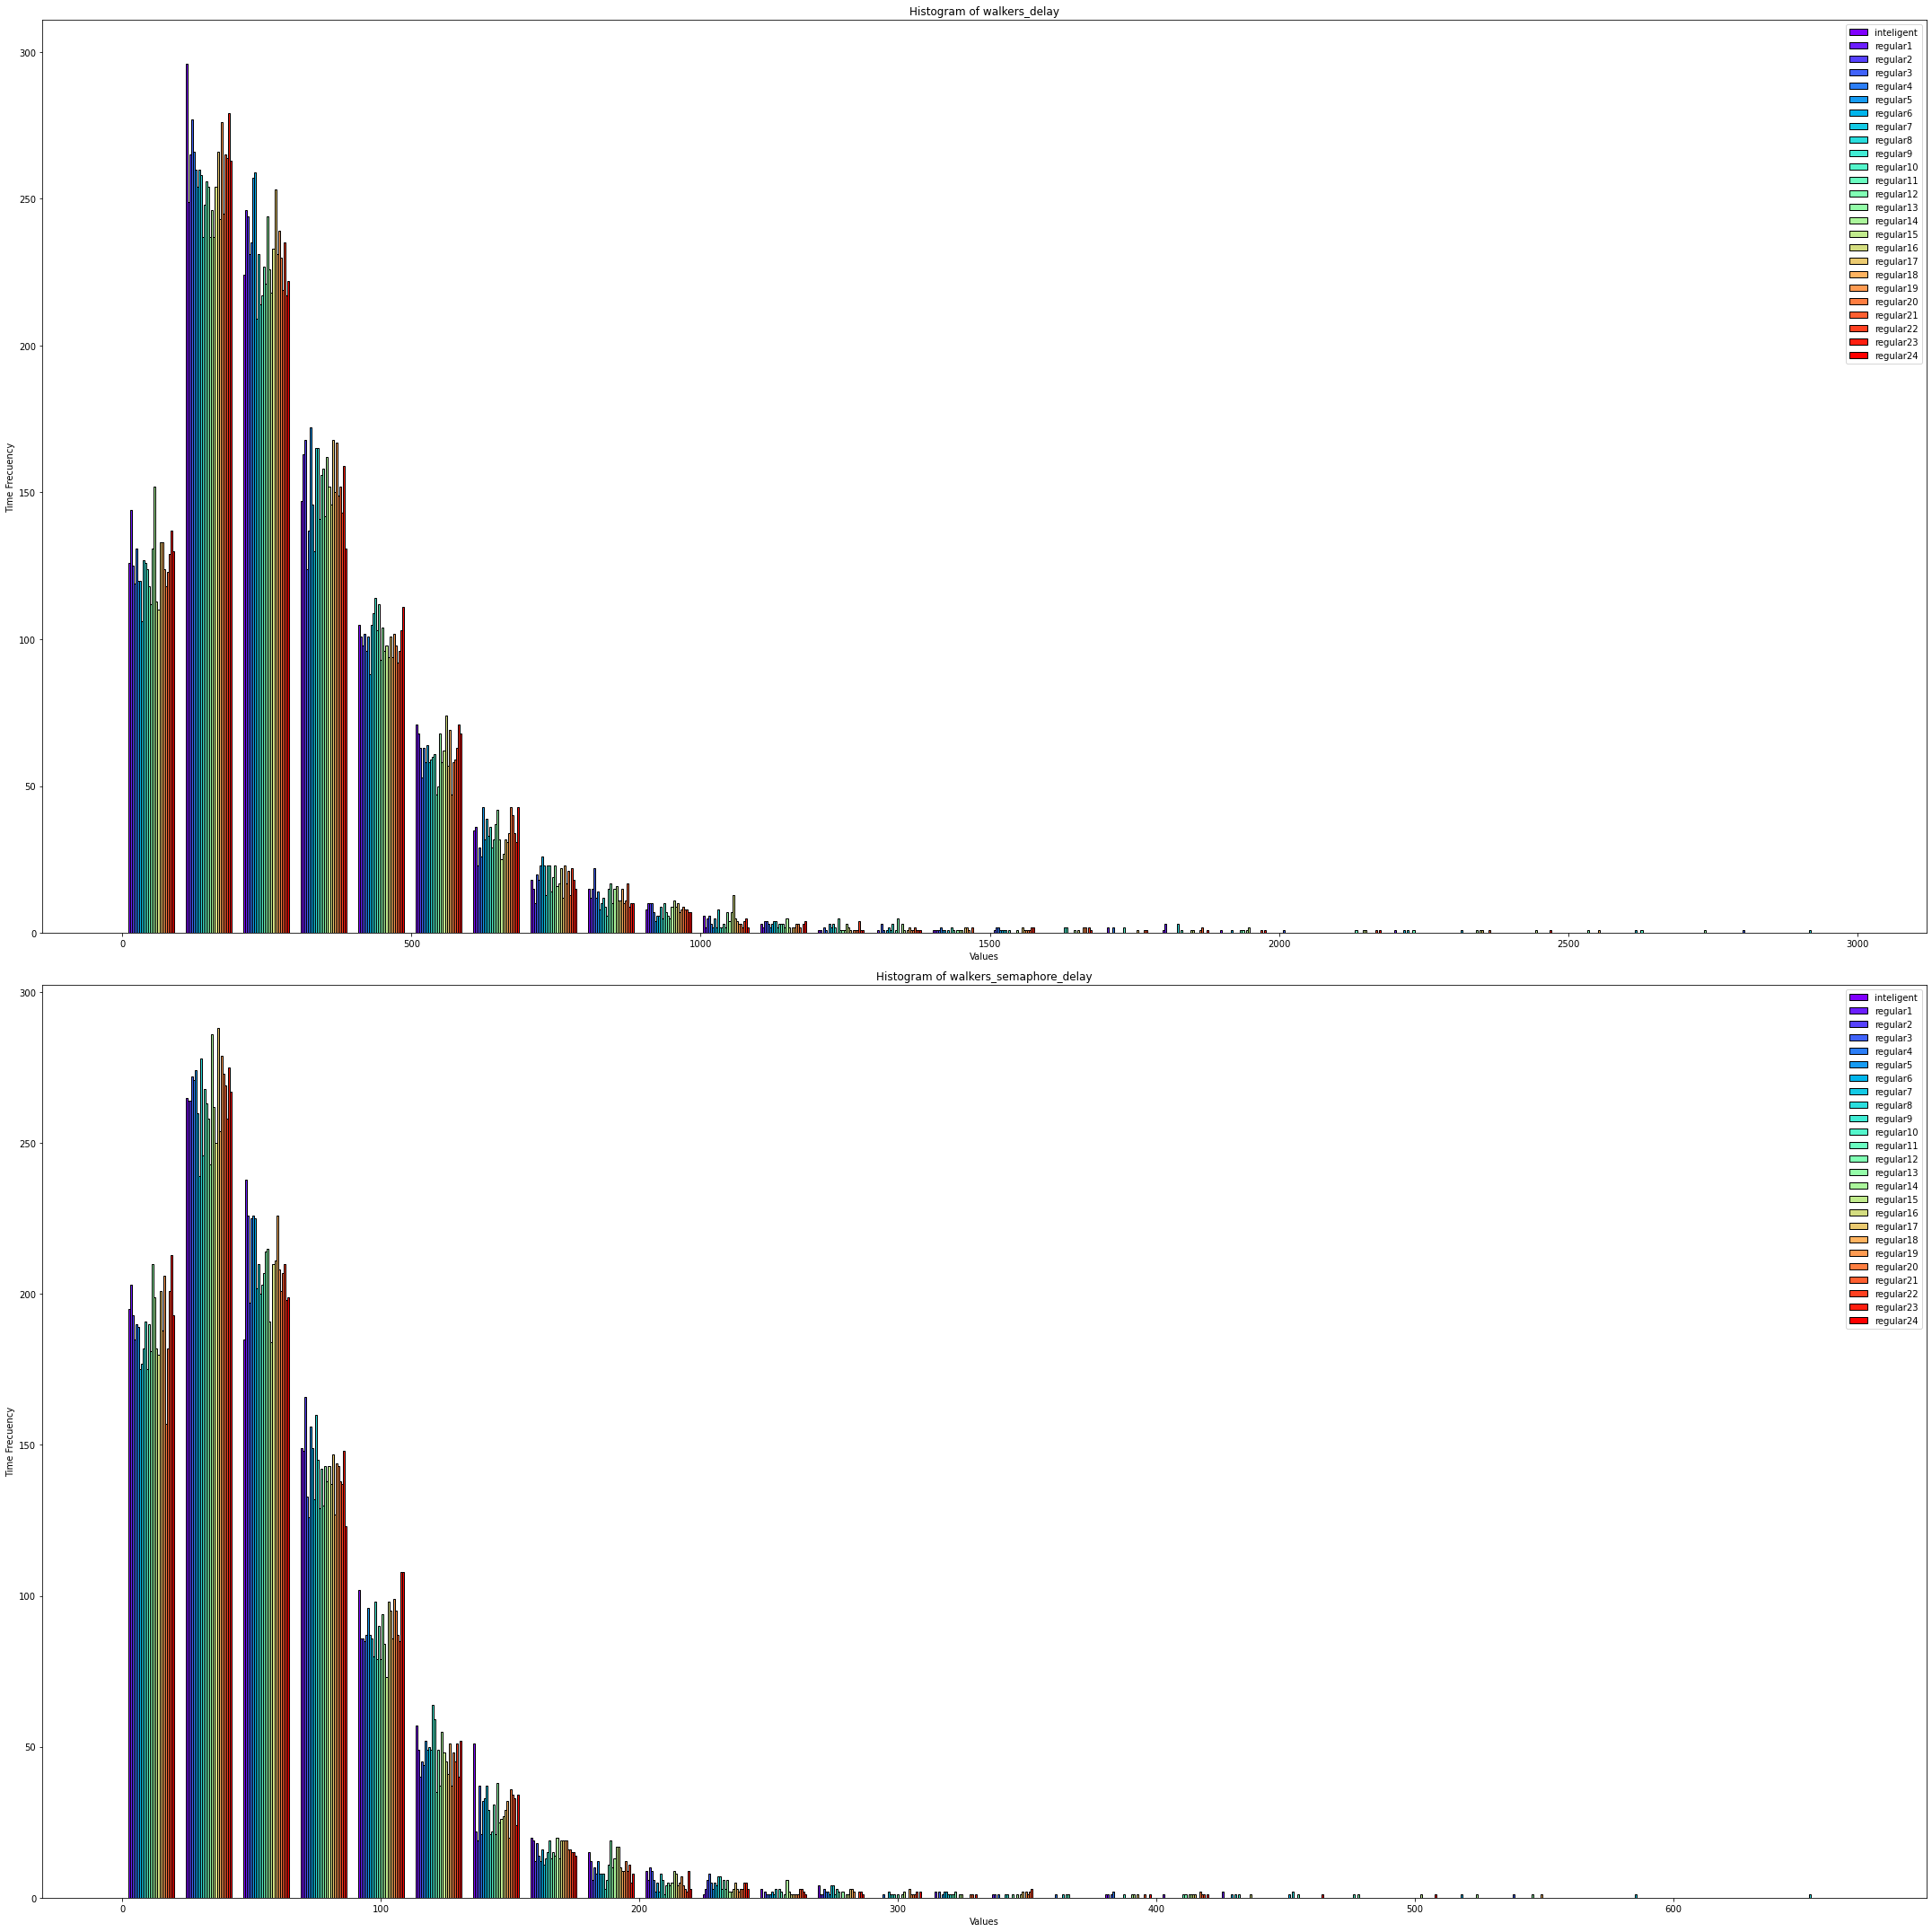

In [8]:
for i in range(len(df_smart)):
    df_cars_smart = df_smart[i][1]
    df_cars_standard = df_standard[i][1]
    columns_to_plot = [col for col in df_cars_smart.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(30, 30))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df_standard) + 1))
    leyends = ["inteligent"]
    for j in range(len(df_standard)):
        leyends.append("regular{}".format(j + 1))
    for index, col in enumerate(columns_to_plot):
        plots = [df_cars_smart[col]]
        for j in df_standard:
            plots.append(j[1][col])
        axes[index].hist(plots, bins=30, color=colors, edgecolor='black')
        axes[index].set_title(f'Histogram of {col}')
        axes[index].legend(leyends)
        axes[index].set_xlabel('Values')
        axes[index].set_ylabel('Time Frecuency')
        plt.savefig("./images/hist_walkers_{}.png".format(i))
    plt.tight_layout()

    plt.show()


plt.show()

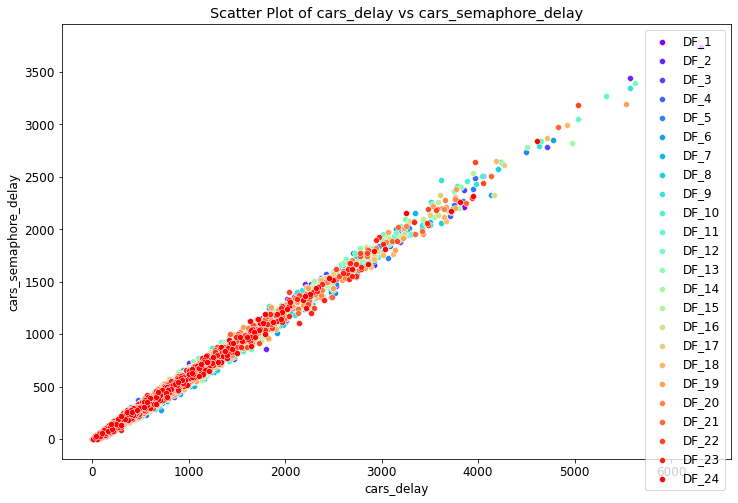

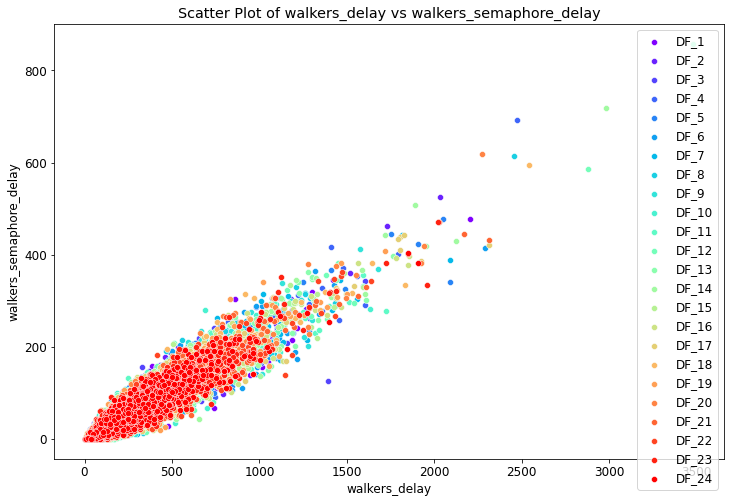

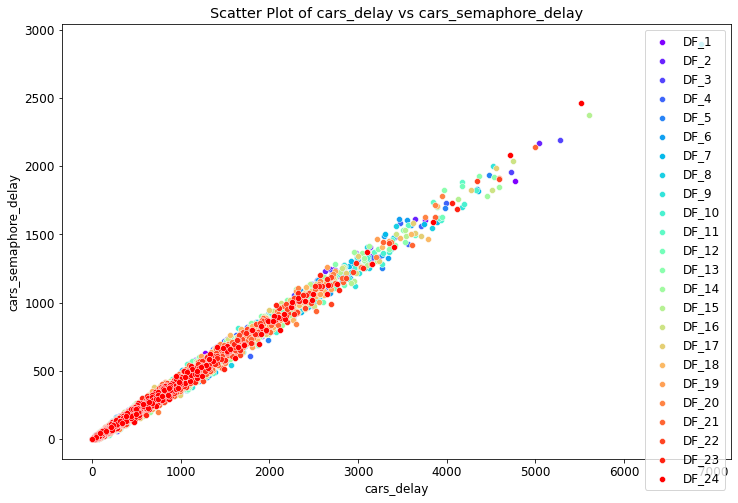

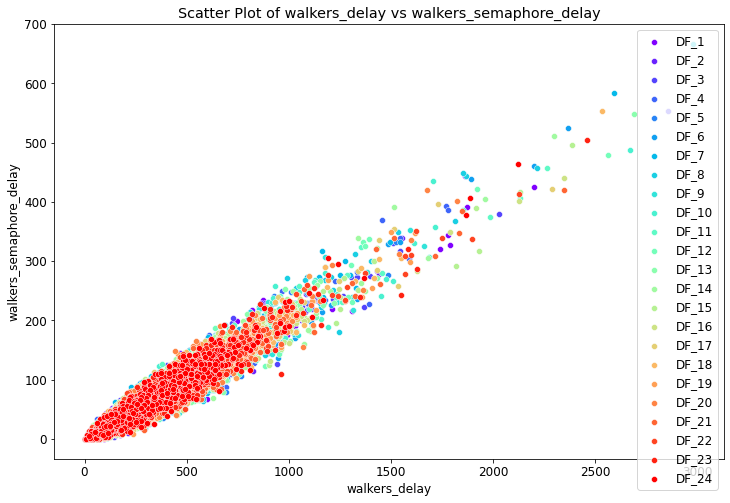

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_scatterplot(df_list, index, name):
    max_series = len(df_list)
    colors = plt.cm.rainbow(np.linspace(0, 1, max_series))

    plt.figure(figsize=(12, 8))
    for i, df in enumerate(df_list):
        if index == 0:
            sns.scatterplot(x='cars_delay', y='cars_semaphore_delay', data=df[index], label=f'DF_{i+1}', color=colors[i])
        if index == 1:
            sns.scatterplot(x='walkers_delay', y='walkers_semaphore_delay', data=df[index], label=f'DF_{i+1}', color=colors[i])

    if index == 0:
        plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
    else: 
        plt.title('Scatter Plot of walkers_delay vs walkers_semaphore_delay')

    if index == 0:
        plt.xlabel('cars_delay')
        plt.ylabel('cars_semaphore_delay')
    else:
        plt.xlabel('walkers_delay')
        plt.ylabel('walkers_semaphore_delay')

    plt.legend()
    plt.savefig("./images/{}.png".format(name))
    plt.show()

draw_scatterplot(df_smart, 0, "scatter1")
draw_scatterplot(df_smart, 1, "scatter2")
draw_scatterplot(df_standard, 0, "scatter3")
draw_scatterplot(df_standard, 1, "scatter4")

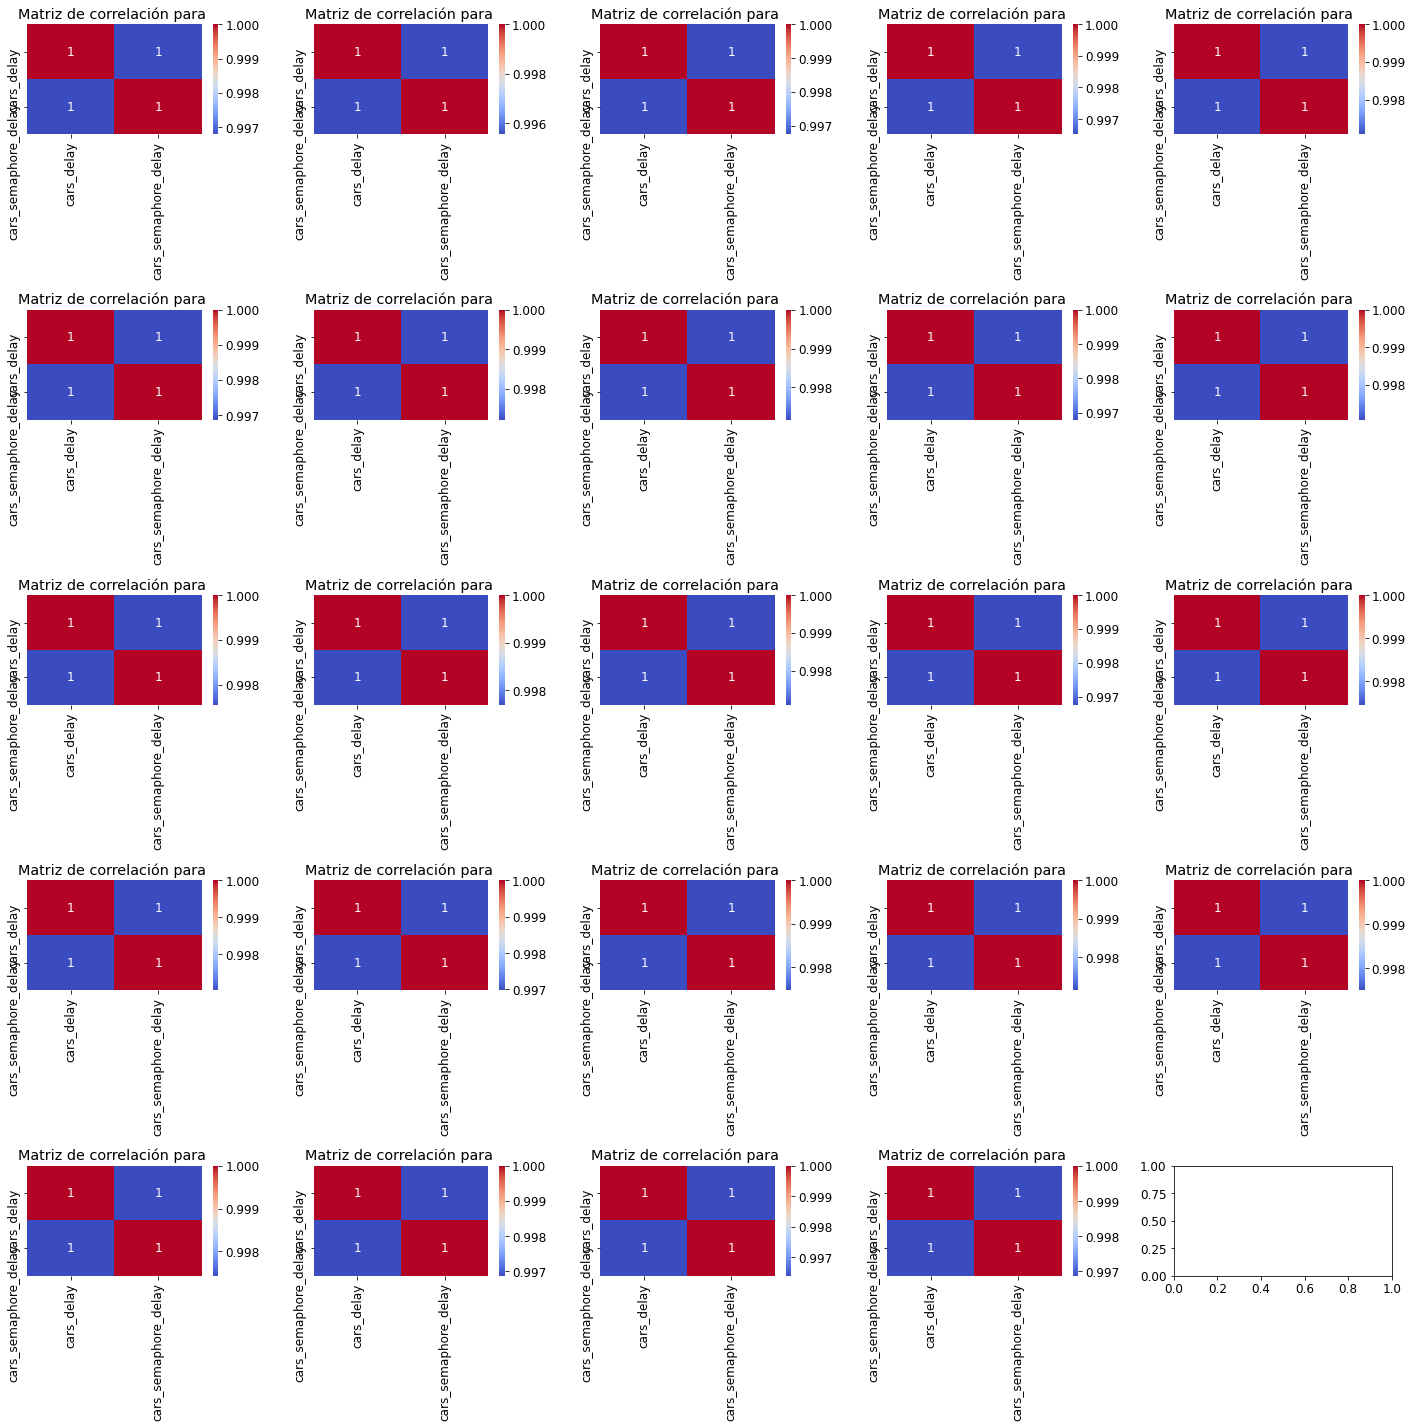

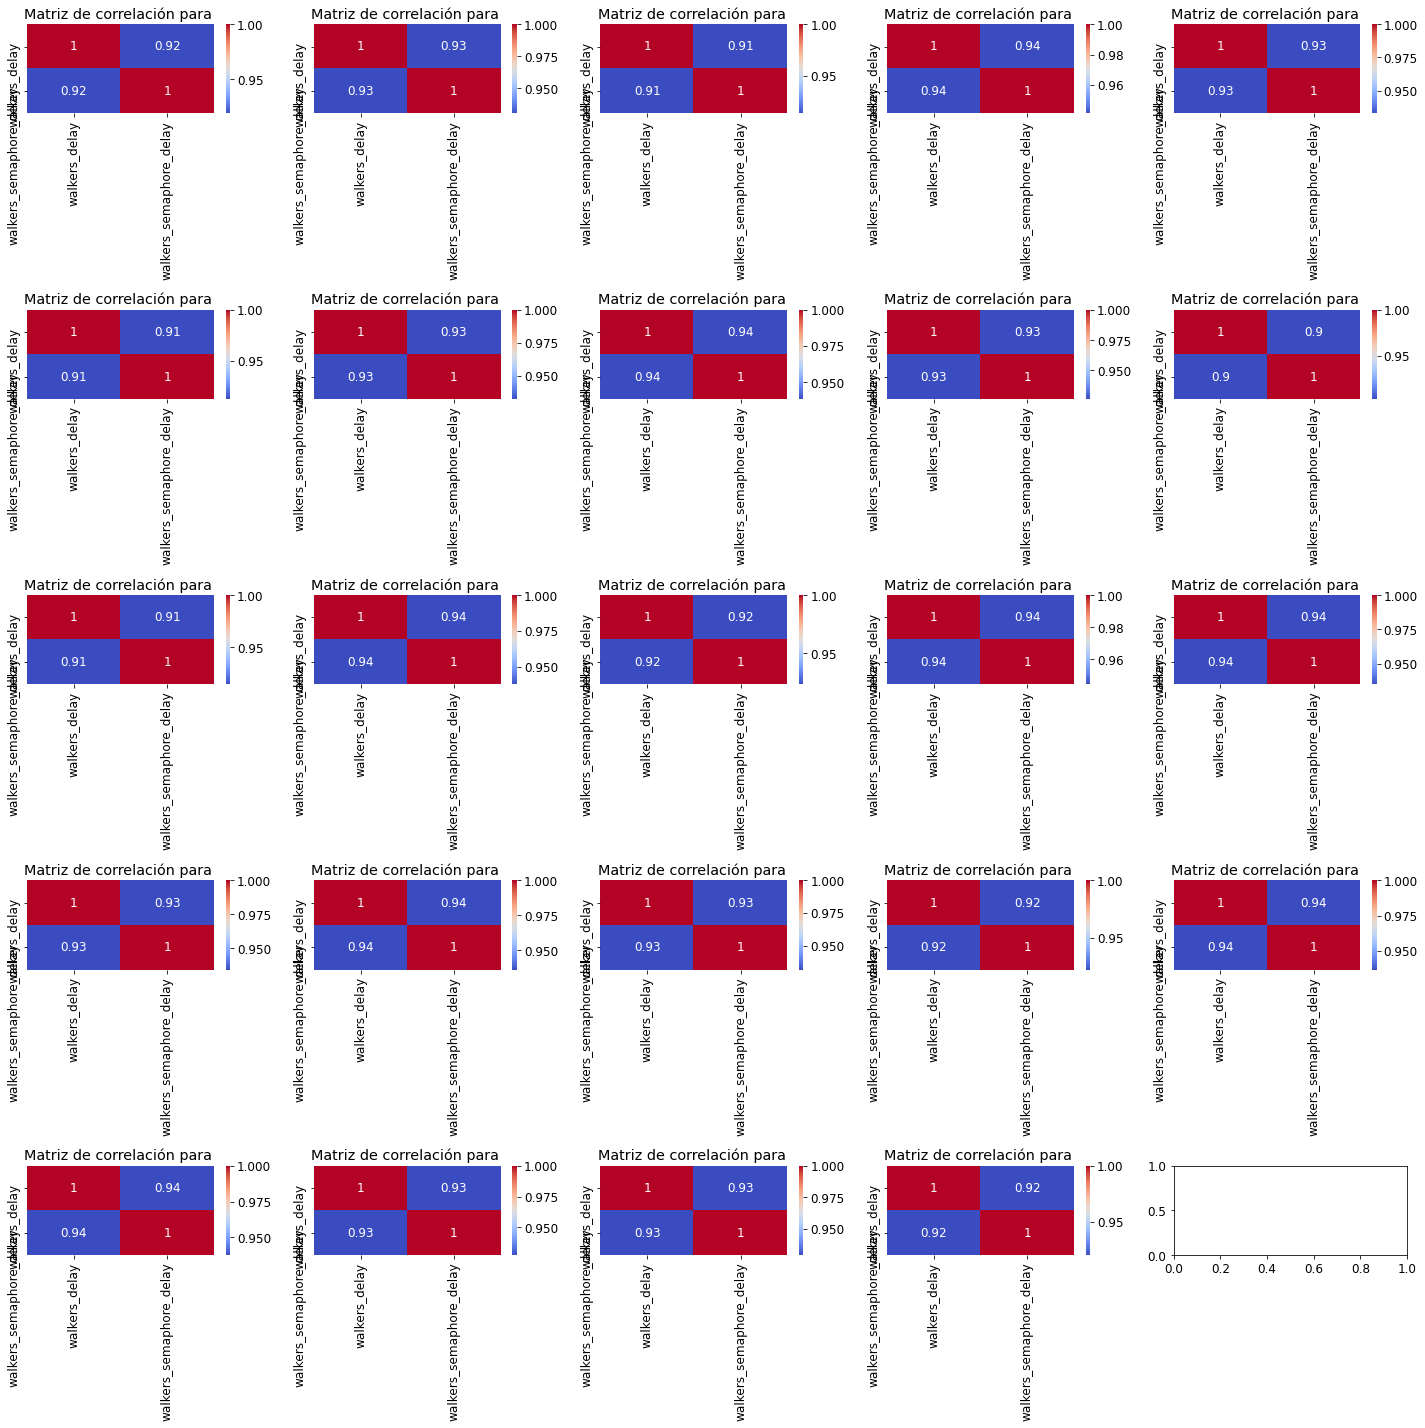

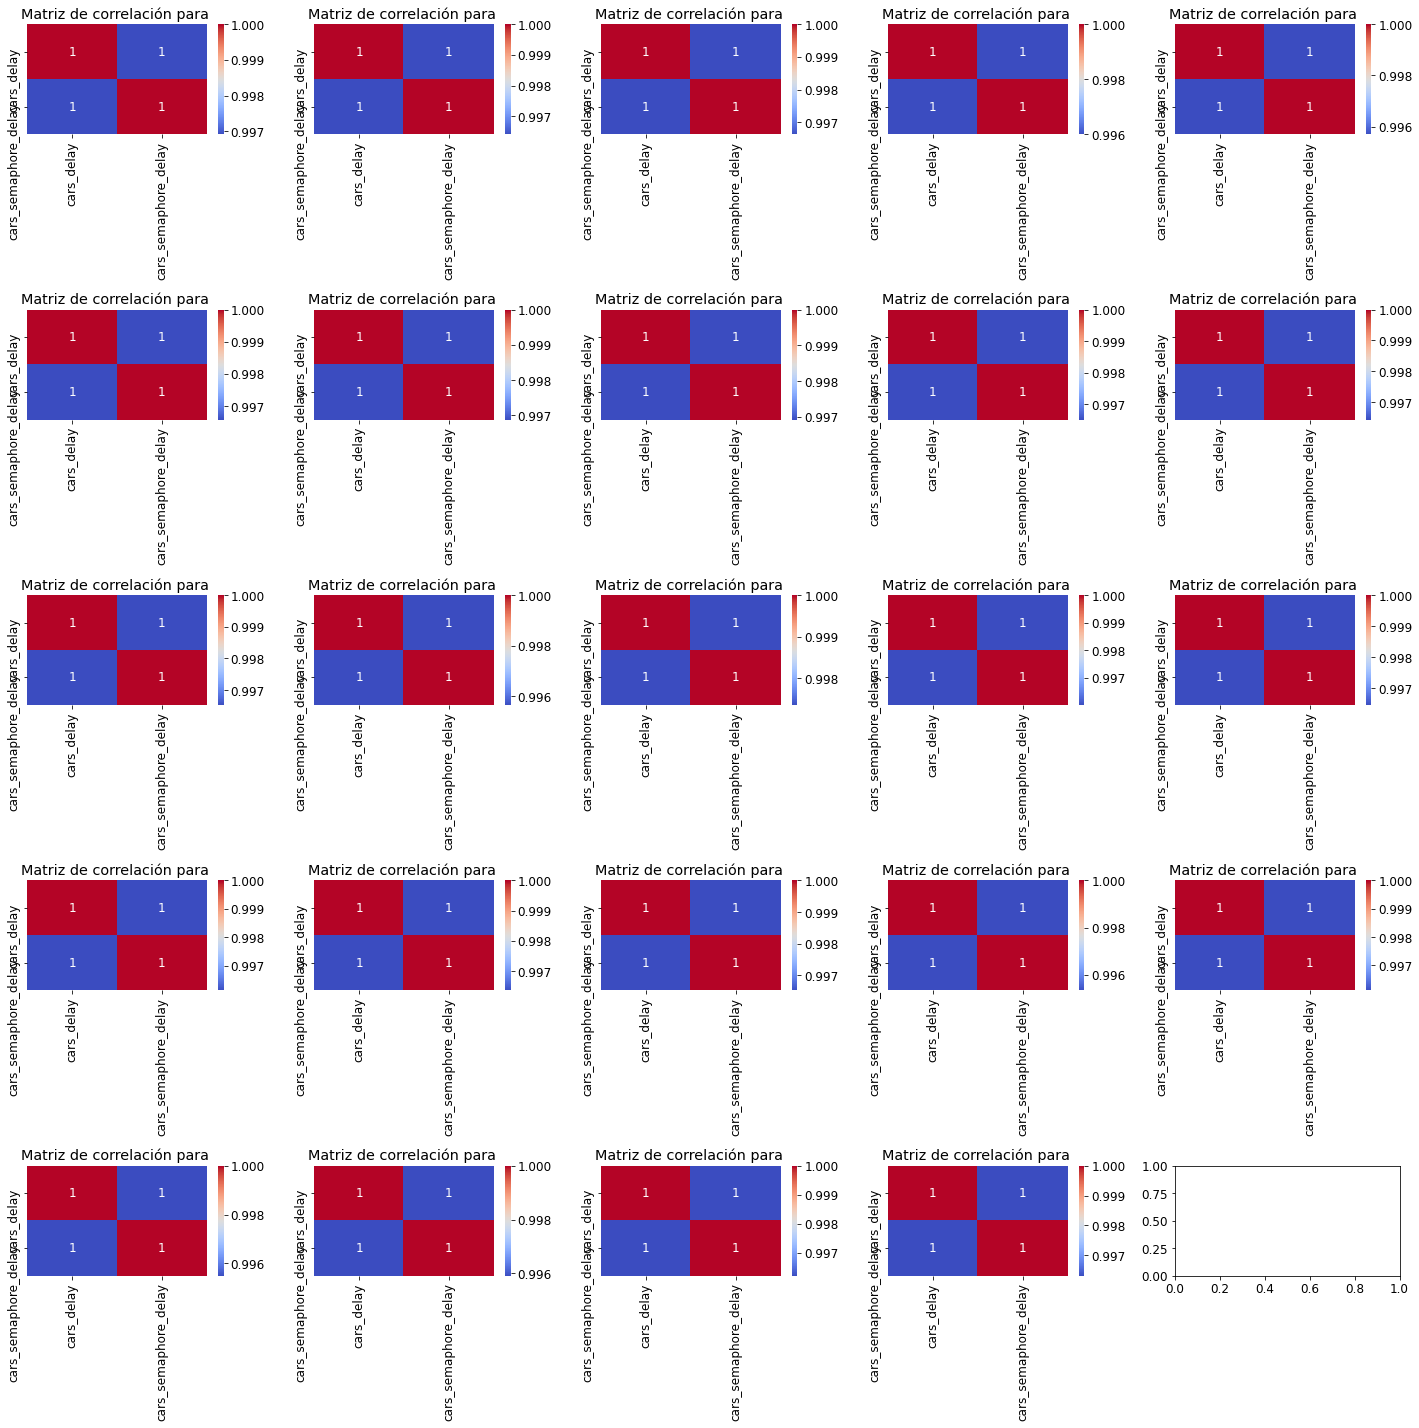

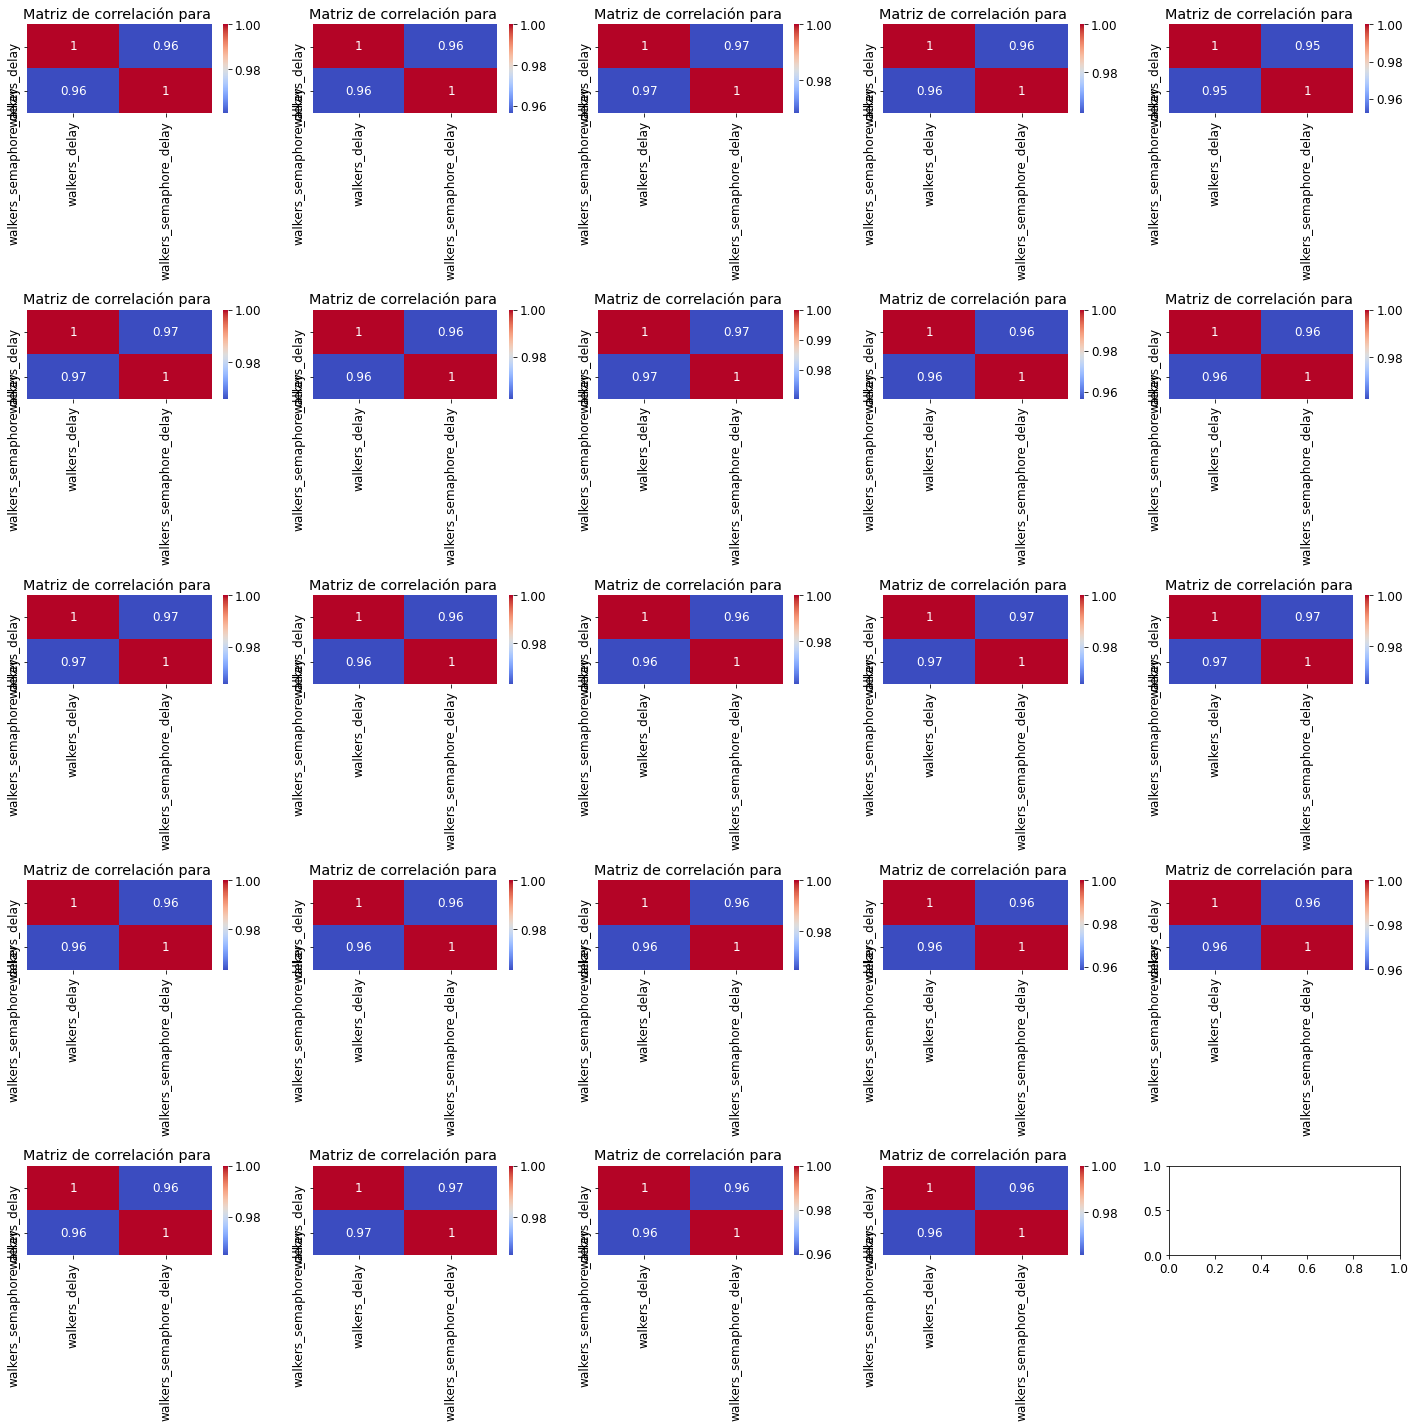

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrices(df_list, index, name):
    num_grids = int(len(df_list)**0.5) + 1
    fig, axs = plt.subplots(num_grids, num_grids, figsize=(num_grids*4, num_grids*4))
    axs = axs.flatten()

    for i, df in enumerate(df_list):
        correlation_matrix = df[index].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axs[i])
        axs[i].set_title(f'Matriz de correlación para ')
    plt.savefig("./images/{}.png".format(name))

    plt.tight_layout()
    plt.show()

# Usa la función con tus DataFrames
plot_correlation_matrices(df_smart, 0, "coor1")
plot_correlation_matrices(df_smart, 1, "coor2")
plot_correlation_matrices(df_standard, 0, "coor3")
plot_correlation_matrices(df_standard, 1, "coor4")

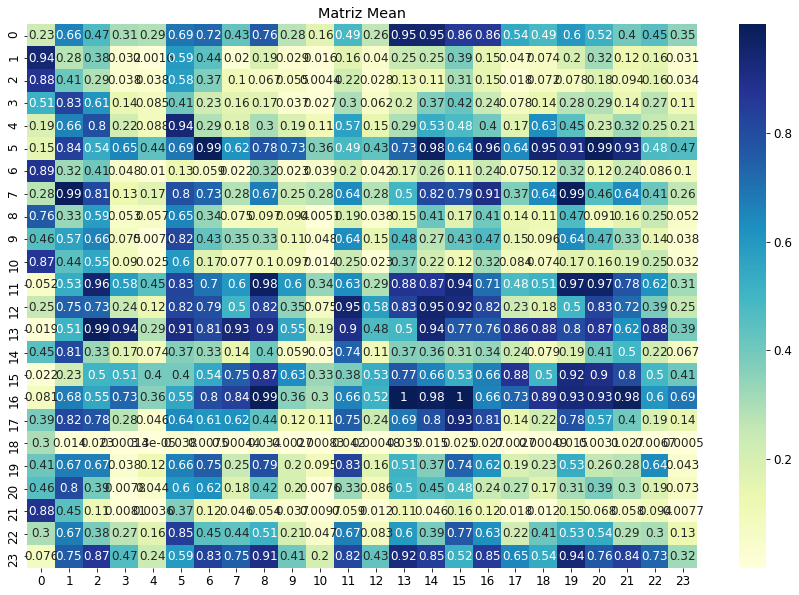

In [63]:
matriz = []

# Primer bucle for para las filas
for i in range(len(df_smart)):
    # Segundo bucle for para las columnas
    fila = []
    for j in range(len(df_standard)):
        min_length = min(len(df_smart[i][0]['cars_delay']), len(df_standard[j][0]['cars_delay']))
        data1 = df_smart[i][0]['cars_delay'][:min_length]
        data2 = df_standard[j][0]['cars_delay'][:min_length]

        t_statistic, p_value = stats.wilcoxon(data1, data2)

        fila.append(p_value)

    # Agregar la fila completa a la matriz
    matriz.append(fila)

df = pd.DataFrame(matriz)

plt.figure(figsize=(15, 10))  # Ajusta estas dimensiones según tus necesidades
plt.rcParams.update({'font.size': 12})
plt.tight_layout(pad=2.0)
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title('Matriz Mean')
plt.savefig("./images/test")
plt.show()

[[501.8559776897251, 594.833997640204], [181.16367164809836, 188.0363491971402]]


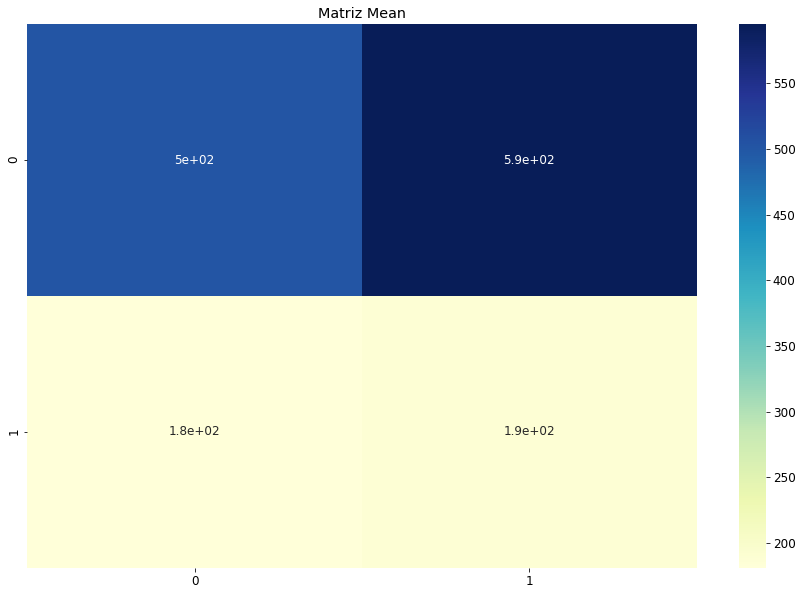

In [64]:
import pandas as pd
import numpy as np

filas_seleccionadas = df_standard 
means_cars_standard = []
means_walkers_standard = []
means_cars_smart = []
means_walkers_smart = []

for i in df_standard:
    mean1 = i[0].mean()
    mean2 = i[1].mean()
    means_cars_standard.append(mean1)
    means_walkers_standard.append(mean2)

for i in df_smart:
    mean1 = i[0].mean()
    mean2 = i[1].mean()
    means_cars_smart.append(mean1)
    means_walkers_smart.append(mean2)

values = [[np.mean(means_cars_standard), np.mean(means_cars_smart)], [np.mean(means_walkers_standard), np.mean(means_walkers_smart)]]


df = pd.DataFrame(values)
print(values)
plt.figure(figsize=(15, 10)) 
plt.rcParams.update({'font.size': 12})
plt.tight_layout(pad=2.0)
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title('Matriz Mean')
plt.savefig("./images/heap")
plt.show()